Predicting Reference Oral Temperature (aveOralF and aveOralM) using Measured Facial Infrarred Thermography Temperatures and Febrile Patient Classification for Fever Screening
===
Matvey Iliyashov

--- 


## Imports

In [3]:
# Imports 
import nbformat
import os
import IPython
from IPython.display import display, Markdown, Latex
from IPython.core.display import HTML
from IPython.display import display_markdown
import sklearn as sk

from io import BytesIO

import ipywidgets as widgets
from ipywidgets import GridspecLayout

import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image
from IPython.core.display import HTML

import numpy as np
import gradio as gr

from ipywidgets import widgets, Layout
import pandas as pd
import numpy as np

import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNetCV

import sklearn as sk
from sklearn.model_selection import train_test_split

import scipy.stats as stats
from sklearn.metrics import mean_squared_error as MSE # use different error types
from ipywidgets.embed import embed_minimal_html

import base64
from scipy import stats
import scipy

import keras
from keras import layers
from keras import metrics

import collections

from sklearn.model_selection import cross_val_score

import keras_tuner
import tensorflow as tf

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.impute import SimpleImputer
from sklearn.model_selection import StratifiedKFold

from sklearn.model_selection import GridSearchCV
from tensorflow.keras import backend as K

In [4]:
# Generate TOC requires file to be saved 
with open('Predicting_Oral_Temperature_Matvey_Iliyashov.ipynb', 'r',  encoding="utf8") as f:
    nb = nbformat.read(f, as_version=4)

    toc = ""
existingCells = []

# generates table of contents 
for cell in nb.cells:
    if(cell.cell_type=="markdown" and cell.source[0] == "#" if len(cell.source) > 0 else False):
        # get cell name 
        heading = cell.source.split("\n")[0]
        if heading.count("#") > 1 and not (heading in existingCells):
            existingCells.append(heading);
            toc += (heading.count("#")-1)*'&emsp;&emsp;'+ "["+heading.strip("#")+"]" +"(#"+heading.strip("#")[1:].replace(" ","-").removesuffix("-")+")"+ "<br/>" # use fprint

## Table of Contents

In [5]:
# Display TOC
display_markdown("---", raw =True)
display_markdown(toc, raw=True)

---

&emsp;&emsp;[ Imports](#Imports)<br/>&emsp;&emsp;[ Table of Contents](#Table-of-Contents)<br/>&emsp;&emsp;[ 1. Introduction](#1.-Introduction)<br/>&emsp;&emsp;&emsp;&emsp;[ 1.1 Problem Formulation](#1.1-Problem-Formulation)<br/>&emsp;&emsp;&emsp;&emsp;[ 1.2 Methodology](#1.2-Methodology)<br/>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;[ 1.2.1 Feature Exploration](#1.2.1-Feature-Exploration)<br/>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;[ 1.2.2 Regression ](#1.2.2-Regression)<br/>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;[ 1.2.3 Classification ](#1.2.3-Classification)<br/>&emsp;&emsp;[ 2. Data Preparation](#2.-Data-Preparation)<br/>&emsp;&emsp;&emsp;&emsp;[ 2.1 Load Dataset](#2.1-Load-Dataset)<br/>&emsp;&emsp;&emsp;&emsp;[ 2.2 Train Test Split](#2.2-Train-Test-Split)<br/>&emsp;&emsp;&emsp;&emsp;[ 2.3 Data Preprocessing](#2.3-Data-Preprocessing)<br/>&emsp;&emsp;[ 3. Exploratory Data Analysis](#3.-Exploratory-Data-Analysis)<br/>&emsp;&emsp;&emsp;&emsp;[ 3.1 Environment Data](#3.1-Environment-Data)<br/>&emsp;&emsp;&emsp;&emsp;[ 3.2 Demographic Data](#3.2-Demographic-Data)<br/>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;[ 3.2.1 Ethnicity](#3.2.1-Ethnicity)<br/>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;[ 3.2.2 Age](#3.2.2-Age)<br/>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;[ 3.2.3 Gender](#3.2.3-Gender)<br/>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;[ 3.2.4 Febrile Patients Count](#3.2.4-Febrile-Patients-Count)<br/>&emsp;&emsp;&emsp;&emsp;[ 3.3 Methodology Data](#3.3-Methodology-Data)<br/>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;[ 3.3.1 Distance Data](#3.3.1-Distance-Data)<br/>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;[ 3.3.2 Black Body Temperature Compensation](#3.3.2-Black-Body-Temperature-Compensation)<br/>&emsp;&emsp;&emsp;&emsp;[ 3.4 Feature Exploration](#3.4-Feature-Exploration)<br/>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;[ 3.4.1 Univariate Feature Exploration](#3.4.1-Univariate-Feature-Exploration)<br/>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;[ A - Correlation Exploration ](#A---Correlation-Exploration)<br/>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;[ B - Summary](#B---Summary)<br/>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;[ 3.4.2 Multivariate Feature Exploration](#3.4.2-Multivariate-Feature-Exploration)<br/>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;[ A - Random Forest ](#A---Random-Forest)<br/>&emsp;&emsp;[ 4. Model Development](#4.-Model-Development)<br/>&emsp;&emsp;&emsp;&emsp;[ 4.1 Predicting aveOralM and aveOralF](#4.1-Predicting-aveOralM-and-aveOralF)<br/>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;[ 4.1.1 Baseline Definition](#4.1.1-Baseline-Definition)<br/>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;[ 4.1.2 Model Selection](#4.1.2-Model-Selection)<br/>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;[ A - Univariate Linear Model](#A---Univariate-Linear-Model)<br/>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;[ B - Multiple Feature Linear Model](#B---Multiple-Feature-Linear-Model)<br/>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;[ C - Single Feature Polynomial Model](#C---Single-Feature-Polynomial-Model)<br/>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;[ D - Multiple Feature Polynomial Model](#D---Multiple-Feature-Polynomial-Model)<br/>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;[ E - Neural Network](#E---Neural-Network)<br/>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;[ E.1 - No Hidden Layer - Neural Network](#E.1---No-Hidden-Layer---Neural-Network)<br/>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;[ E.2 - Neural Network - One Hidden](#E.2---Neural-Network---One-Hidden)<br/>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;[ F - Random Forest](#F---Random-Forest)<br/>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;[ 4.1.3 Model Evaluation](#4.1.3-Model-Evaluation)<br/>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;[ A - Predicting aveOralM](#A---Predicting-aveOralM)<br/>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;[ B - Predicting aveOralF](#B---Predicting-aveOralF)<br/>&emsp;&emsp;&emsp;&emsp;[ 4.2 Predicting Febrile Patients Based on aveOralM and aveOralF](#4.2-Predicting-Febrile-Patients-Based-on-aveOralM-and-aveOralF)<br/>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;[ 4.2.1 Baseline Definition](#4.2.1-Baseline-Definition)<br/>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;[ 4.2.2 Model Selection](#4.2.2-Model-Selection)<br/>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;[ A - K-Nearest Neighbor](#A---K-Nearest-Neighbor)<br/>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;[ A.1 - KNN - Single Feature](#A.1---KNN---Single-Feature)<br/>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;[ A.2 - KNN - Multiple Feature](#A.2---KNN---Multiple-Feature)<br/>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;[ B - Logistic Regression CV](#B---Logistic-Regression-CV)<br/>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;[ B.1 - Logistic Regression - Single Feature](#B.1---Logistic-Regression---Single-Feature)<br/>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;[ B.2 - Logistic Regression - Multiple Feature](#B.2---Logistic-Regression---Multiple-Feature)<br/>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;[ C - Neural Network](#C---Neural-Network)<br/>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;[ C.1 - Neural Network - SK-Learn - One Hidden](#C.1---Neural-Network---SK-Learn---One-Hidden)<br/>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;[ C.2 - Neural Network - Keras - No Hidden](#C.2---Neural-Network---Keras---No-Hidden)<br/>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;[ C.3 - Neural Network - Keras - 1 Hidden](#C.3---Neural-Network---Keras---1-Hidden)<br/>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;[ D - Random Forest](#D---Random-Forest)<br/>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;[ 4.2.3 Model Evaluation](#4.2.3-Model-Evaluation)<br/>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;[ A - Predicting Febrile Patients based on aveOralM](#A---Predicting-Febrile-Patients-based-on-aveOralM)<br/>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;[ B - Predicting Febrile Patients based on aveOralF](#B---Predicting-Febrile-Patients-based-on-aveOralF)<br/>&emsp;&emsp;[ 5. Conclusion](#5.-Conclusion)<br/>&emsp;&emsp;&emsp;&emsp;[ 5.1 Evaluation](#5.1-Evaluation)<br/>&emsp;&emsp;&emsp;&emsp;[ 5.2 Future Work](#5.2-Future-Work)<br/>&emsp;&emsp;[ 6. References](#6.-References)<br/>

---

## 1. Introduction
--- 

Early fever screening can be used as an effective way to approach risk management during global epidemics, as it can provide early detection of contagious patients and prevent further spread of infection. This can be achieved by measuring a persons temperature to determine if their body temperature exceeds 37.5 °C. However,  certain temperature measurement cites can be difficult or pose risk to access, such as the mouth or rectum, requiring a reference temperature to estimate the temperature at the target cite. A Infrared Thermograph (IRT) can be used to measure skin temperature on the face and infer data for oral temperature, as it can provide a more accurate estimate of internal body temperature to classify febrile patient with EBT (Elevated Body Temperature) (Wang et. Al, 2022).

### 1.1 Problem Formulation
---

The following notebook explores the regression task of predicting the oral temperature in fast mode *aveOralF* and the temperature measured in monitor mode *aveOralM* by an Infrared Thermograph, using the dataset, Infrared Thermography Temperature Dataset from UC Irivine Machine Learning Repository (Wang et. Al, 2022). Monitor mode offers more precise readings and was used as the target in the paper by Wang et. Al, 2022, however this notebook will additionally engage in predicting the reading in fast mode as an additional exercise.  

Secondly, further models will be developed in a classification task to predict if the patient is ferbile or not. This will be defined by exceeding the threshold temperature of $>37.5 \text{°C}$ based on the reference oral temperature *aveOralF* and *aveOralM*. 

### 1.2 Methodology
--- 

#### 1.2.1 Feature Exploration

--- 

In order to develop the models for regression and classification the Infrared Thermography Temperature Dataset from UC Irivine Machine Learning Repository (Wang et. Al, 2022) will be used. The 33 unique features will be examined, and split into training and testing portions based on the targets *aveOralF* and *aveOralM* ([see section 2.](#2.-Exploratory-Data-Analysis)). Exploratory data analysis will be performed on the training set to determine the predictability of variables using univariate and multivariate methods for both targets, while making sure to not include testing data to prevent data leakage. 

Univariate feature exploration methods will be used to create simple interpretable models, that should perform better than a common baseline such as predicting the mean for regression and most frequent class for classification. Single feature predictability will be determined using: 
- *Pearson* and *Spearman* correlation coefficients for continuous features
- *Point Biserial Correlation* P-value for binary features
- *ANOVA* P-value for discrete features.

Features will be explored to minimize risk of multicoliniarity which can impact the performance of linear models leading to unstable coefficients. 

Multivariate feature exploration will be used to help determine the interaction of multiple features within the dataset. This will be used to improve on the assumptions used in the univariate methods as using all features simultaneously to determine predicatability can allow for weaker univariate features to provide more impact leading to synergies. This will be achieved through a random forest regressor and classifier and determining the feature importance using a permutation approach.

Depending on the future application of the developed models a single feature or multi-feature approach might be more favourable. If producing simillar features is too expensive, time consuming, or a more interpretable approach matters; a single feature approach may be more appropriate to achieve satisfatory predictive power. Alternatively, a multi-feature approach may lead to more complex and accurate models, allowing for a more accurate estimation of oral temperature regardless of the required feature count.

#### 1.2.2 Regression 
--- 

For the regression task of predicting *aveOralF* and *aveOralM* two baselines will be explored. For the single feature regression models consisting of a single temperature, a baseline of predicting a value equal the feature will be used and a baseline of a constant prediction of the mean of the target variable. For all other models just the mean predicting baseline will be used. 

The following models have been chosen for the regression tasks in order of complexity:

<ol>
    <li>
        Linear Regression
        <ol>
            <li>Single Feature</li>
            <li>Multi Feature</li>
        </ol>
    </li>
    <li>
        Linear Regression (Polynomial Features)
        <ol>
            <li>Single Feature</li>
            <li>Multi Feature</li>
        </ol>
    </li>
    <li>
        Keras Neural Network
        <ol>
            <li>No Hidden</li>
            <li>One Hidden</li>
        </ol>
    </li>
    <li>
        Random Forest
    </li>
</ol>

More interpretable models will be developed first to compare to more complicated models in order to justify the use of more complicated models if they perform significantly better than the more interperatable ones. Additionally models will be optimized by using grid search for fine tuning the hyper parameters using ridge, lasso and elastic net as well as keras tuner for the neural network. 

Models will then be evaluated first on the training set based on the *MSE* and the related $\text{R}^2$ metric. *MSE* has been choosen over *MAE* to penalise outliers more, which is important in the context of measuring temperature and requiring significant accuracy withing the 37.5 - 38 °C range for febrile patient classification. The best 7 models will be then evaluated on the unseen test set inorder to determine the models performance on new data.

#### 1.2.3 Classification 
--- 

For classification the baseline was choosen to predict the most frequent class, as the distribution of the febrile and non-febrile patients is unbalanced. Meaning a most frequent classifier would achieve an accuracy of at least ~89.1% for *aveOralM* and ~94.2% for *aveOralF* suggesting that accuracy is an inapporpriate metric for the loss.

Similarilly to the regression task models where choosen in order of complexity to determine the trade-off between interpretability and complexity of the models:

<ol>
    <li>
        K-Nearest Neighbor
        <ol>
            <li>Single Feature</li>
            <li>Multi Feature</li>
        </ol>
    </li>
    <li>
        LogisticRegressionCV
        <ol>
            <li>Single Feature</li>
            <li>Multi Feature</li>
        </ol>
    </li>
    <li>LogisticRegressionCV</li>
    <li>Scikit Learn Neural Network (Single Layer)</li>
    <li>
        Keras Neural Network
        <ol>
            <li>No Hidden</li>
            <li>One Hidden</li>
        </ol>
     </li>
     <li>
         Random Forest
     </li>
</ol>

To optimize the hyperparamters for the K-Nearest Neighbor, Logistic Regression, Scikit Learn Neural Networks and Random Forest grid search was used, and Keras tuner for the Keras based network. 

Due to having an unbalanced dataset, the neural networks struggled with convergence due to having insufficient examples of febrile patients, therefore an undersampling vs oversampling approach needed to be implemented. As the dataset contains only 89 febrile subjects and 727 non-febrile for *aveOralM* and 47 febrile subjects and 769 non-febrile subjects for *aveOralF*, an oversampling approach was used to maintain larger dataset.

The models are first evaluated on the training set using the AUC-PR metric and F1-Score. This is appropriate for the classification of febrile patients as in an epidemic, high recall is important in avoiding not quarantining infectious patients for example. However, retaining a high precision may also be important if the treatment plan is expensive, or a false positive outcome may result in a condition worse if they haven't recieved the treatment. The best 8 models are then further evaluated on the test set to determine their performance on unseen data.

## 2. Data Preparation

--- 

### 2.1 Load Dataset

--- 

In [6]:
# Load dataset based on instructions from UC Irvine Machine Learning Repository
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
infrared_thermography_temperature = fetch_ucirepo(id=925) 
  
# data (as pandas dataframes) 
ir_features = infrared_thermography_temperature.data.features 
ir_targets_reg = infrared_thermography_temperature.data.targets 

In [7]:
# display measurement site image
display(Image(url="https://figures.semanticscholar.org/8d02352736f83f0d153ec956b610ee1d79a404e2/5-Figure2-1.png"))
display(HTML("<center> Figure 1. Measurement Sites (Zhou et. Al, 2020). </center>"))

--- 

The Infrared Thermography Temperature Dataset from UC Irivine Machine Learning Repository (Wang et. Al, 2022) includes variables relating to:

</br>

**<center>FEATURES</center>**

- **Demographic** : Gender, Age, Ethnicity.
- **Environment**: T_atm (ambient temperature), Humidity.
- **Methodology**: Distance (Distance between infrared thermometer), T_offset1 (Temperature between blackbody temperature).
- **Temperature Measurement Sites**: Forhead, Canthi, Mouth
  with max and mean measurements as well as left ,right, top, bottom positions (See Figure 1. above).


</br>

**<center>TARGETS</center>**

- **Temperature Reference Sites**: aveOralM and aveOralF, oral temperature measured in monitor and fast mode respectively.

</br>

--- 

</br>

The data contains two errors that need to be addressed. First of all, the age ranges overlap requiring a relabelling of the age data ranges as the "21-25","21-30","26-30" labels can be converted to "21-30". Secondly, it contains missing values for the distance which will be imputed as part of data preprocessing, using the median of the column, as opposed to the mean as it is less influenced by outliers:

In [8]:
# show missing data
ir_features[ir_features.isna().any(axis=1)]

Gender    Age Ethnicity  T_atm  Humidity  Distance  T_offset1  Max1R13_1  \
902  Female  18-20     White   23.9      15.3       NaN     0.8100     35.735   
903    Male  18-20     White   23.9      15.3       NaN     0.7775     35.620   

     Max1L13_1  aveAllR13_1  ...  T_FHCC1  T_FHRC1  T_FHLC1  T_FHBC1  T_FHTC1  \
902    35.4150      35.0525  ...  34.5750    34.73   34.675  34.7075    34.77   
903    35.6275      34.3650  ...  33.4375    33.59   33.840  33.1125    33.35   

     T_FH_Max1  T_FHC_Max1   T_Max1    T_OR1  T_OR_Max1  
902    35.3900     35.1925  36.0075  35.8675     35.895  
903    34.8675     34.4825  36.3350  36.0425     36.080  

[2 rows x 33 columns]

In [9]:
# Update Duplicated Age Ranges

print(f"Duplicate Age Ranges: {infrared_thermography_temperature.data.features.Age.unique()}");
duplicated_age_ranges = ["21-25","21-30","26-30"];
ir_features.loc[ir_features["Age"].apply(lambda x: x in duplicated_age_ranges), "Age"] = "21-30"
print(f"Fixed Age Ranges {ir_features.Age.unique()}");

Duplicate Age Ranges: ['41-50' '31-40' '21-30' '18-20' '26-30' '21-25' '>60' '51-60']
Fixed Age Ranges ['41-50' '31-40' '21-30' '18-20' '>60' '51-60']


In [10]:
# Display Features in Dataset
display(Markdown("---"))
display(Markdown("Features found in Dataset:"))
display(ir_features.columns)
display(Markdown("---"))

---

Features found in Dataset:

Index(['Gender', 'Age', 'Ethnicity', 'T_atm', 'Humidity', 'Distance',
       'T_offset1', 'Max1R13_1', 'Max1L13_1', 'aveAllR13_1', 'aveAllL13_1',
       'T_RC1', 'T_RC_Dry1', 'T_RC_Wet1', 'T_RC_Max1', 'T_LC1', 'T_LC_Dry1',
       'T_LC_Wet1', 'T_LC_Max1', 'RCC1', 'LCC1', 'canthiMax1', 'canthi4Max1',
       'T_FHCC1', 'T_FHRC1', 'T_FHLC1', 'T_FHBC1', 'T_FHTC1', 'T_FH_Max1',
       'T_FHC_Max1', 'T_Max1', 'T_OR1', 'T_OR_Max1'],
      dtype='object')

---

In [11]:
# Display First 5 Entries in Features Dataset
display(ir_features.head())

Gender    Age                  Ethnicity  T_atm  Humidity  Distance  \
0    Male  41-50                      White   24.0      28.0       0.8   
1  Female  31-40  Black or African-American   24.0      26.0       0.8   
2  Female  21-30                      White   24.0      26.0       0.8   
3  Female  21-30  Black or African-American   24.0      27.0       0.8   
4    Male  18-20                      White   24.0      27.0       0.8   

   T_offset1  Max1R13_1  Max1L13_1  aveAllR13_1  ...  T_FHCC1  T_FHRC1  \
0     0.7025    35.0300    35.3775      34.4000  ...  33.5775  33.4775   
1     0.7800    34.5500    34.5200      33.9300  ...  34.0325  34.0550   
2     0.8625    35.6525    35.5175      34.2775  ...  34.9000  34.8275   
3     0.9300    35.2225    35.6125      34.3850  ...  34.4400  34.4225   
4     0.8950    35.5450    35.6650      34.9100  ...  35.0900  35.1600   

   T_FHLC1  T_FHBC1  T_FHTC1  T_FH_Max1  T_FHC_Max1   T_Max1    T_OR1  \
0  33.3725  33.4925  33.0025    34.5300     34.0075  35.6925  35.6350   
1  33.6775  33.9700  34.0025    34.6825     34.6600  35.1750  35.0925   
2  34.6475  34.8200  34.6700    35.3450     35.2225  35.9125  35.8600   
3  34.6550  34.3025  34.9175    35.6025     35.3150  35.7200  34.9650   
4  34.3975  34.6700  33.8275    35.4175     35.3725  35.8950  35.5875   

   T_OR_Max1  
0    35.6525  
1    35.1075  
2    35.8850  
3    34.9825  
4    35.6175  

[5 rows x 33 columns]

In [12]:
# show data size
display(Markdown(f''' The data is of shape {ir_features.shape}. Signifying the presence of {ir_features.shape[0]} samples, and {ir_features.shape[1]} features.'''))

 The data is of shape (1020, 33). Signifying the presence of 1020 samples, and 33 features.

--- 
The target predictive variables are aveOralF and aveOralM which are the results of the infrared thermometer measuring in fast mode and monitor mode respectively. Based on the dataset method specification, fast mode is less accurate, than monitor mode, and has not been used for the purpose of the original paper. However in this notebook we will investigated multiple predictive models for both variables. 

In [13]:
# Display Targets in Dataset
display(Markdown("---"))
display(Markdown("Targets found in Dataset:"))
display(ir_targets_reg.columns)
display(Markdown("---"))

---

Targets found in Dataset:

Index(['aveOralF', 'aveOralM'], dtype='object')

---

In [14]:
# Display First 5 Entries in Targets Dataset
display(Markdown("---"))
display(HTML(f"<div style='display:flex; justify-content: center'>{ir_targets_reg.head().to_html()}</div>"))
display(Markdown("---"))

---

---

### 2.2 Train Test Split

--- 

Next the dataset will be split into testing and training sets. As the data set consists of 1020 samples an 80-20 split would be sufficient to ensure a large enough test set, leading to 816 training set and 204 test set. Furthermore to evaluate the model against overfitting cross validation will be used to compute key metrics such as MSE and R2, PR-AUC and F1 for regression and classification respectively. Stratified sampling is performed in order to maintain the same proportion of febrile patients in the training and testing sets as seen in the table below, for both aveOralM and aveOralF, especially since the dataset is not balanced resulting in missrepresentation if performing random sampling.

In [15]:
# perform test train split and calculate febrile patient targets

# add febrile patient targets
ir_targets_all = pd.concat([ir_targets_reg,ir_targets_reg.apply(lambda x : x > 37.5).add_suffix('_fever')], axis = 1);
train_x, test_x, train_y, test_y = train_test_split(ir_features, 
                                                    ir_targets_all, 
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                    stratify= ir_targets_all[['aveOralM_fever', 'aveOralF_fever']]) 

In [16]:
# Distribution of Febrile Patients in Test and Train Set


aveOralM_febrile_prop = pd.DataFrame([
                        [round(train_y["aveOralM_fever"].mean(),3), *train_x.shape],
                        [round(test_y["aveOralM_fever"].mean(),3), *test_x.shape]
                    ], 
                     columns = ["Febrile Proportion", "Samples", "Features"],
                     index = ["Train","Test"]).transpose();


aveOralM_febrile_prop.columns =  pd.MultiIndex.from_product([["aveOralM"], aveOralM_febrile_prop.columns])


aveOralF_febrile_prop =  pd.DataFrame([
                        [round(train_y["aveOralF_fever"].mean(),3), *train_x.shape],
                        [round(test_y["aveOralF_fever"].mean(),3), *test_x.shape]
                     ], 
                     columns = ["Febrile Proportion", "Samples", "Features"],
                     index = ["Train","Test"]).transpose()

aveOralF_febrile_prop.columns = pd.MultiIndex.from_product([["aveOralF"], aveOralF_febrile_prop.columns])

febrile_prop_stats = pd.concat([
        aveOralM_febrile_prop,
        aveOralF_febrile_prop
       
        ], axis = 1)

display(Markdown("---"));
display(Markdown("</br>"));

# display(Markdown(f'''aveOralM - Test-Train Distribution \n
# - Train Set, Febrile Proportion: {round(train_y["aveOralM_fever"].mean(),3)}, Shape: {train_x.shape}
# - Train Set, Febrile Proportion: {round(test_y["aveOralM_fever"].mean(),3)}, Shape: {test_x.shape}
# '''
# ))

# display(Markdown(f'''aveOralF - Test-Train Distribution \n
# - Train Set, Febrile Proportion: {round(train_y["aveOralF_fever"].mean(),3)}, Shape: {train_x.shape}
# - Train Set, Febrile Proportion: {round(test_y["aveOralF_fever"].mean(),3)}, Shape: {test_x.shape}
# '''
# ))

display(HTML(f"<div style = 'display:flex; justify-content:center'>{febrile_prop_stats.to_html()}</div>"))

display(Markdown("</br>"));
display(Markdown("---"));

---

</br>

</br>

---

### 2.3 Data Preprocessing
--- 

Data will be preprocessed to ensure features have equal contribution to the model, as follows:

- *Gender* has been binary encoded as it consists of just the 'Male' and 'Female' categories
- *Ethnicity* has been onehot encoded as binary columns describing the subject belonging to the ethnicity as 1.0 and not as 0.0.
- *Age* has been ordinally encoded then, standard scaled to align a normal distribution.
- *Temperature*, *Distance*, *Humidity*, and *Blackbody Calibration* (T_offset1) have been standard scaled in order to have comperable distributions.
</br>

--- 

In [17]:
# Data Train Set Preprocessing

multivariate_features = train_x; # change to just test set

# Binarize Gender
multivariate_features = pd.concat([multivariate_features.drop("Gender", axis = 1), multivariate_features["Gender"].apply(lambda x : 1 if x == "Male" else 0)], axis = 1) 

# Ordinaly Encode Age

duplicated_age_ranges = ["21-25","21-30","26-30"];
multivariate_features.loc[multivariate_features["Age"].apply(lambda x: x in duplicated_age_ranges), "Age"] = "21-30"
age_encoder = OrdinalEncoder(categories=[list(np.sort(multivariate_features["Age"].unique()))])

multivariate_features["Age"] = age_encoder.fit_transform(multivariate_features["Age"].to_numpy().reshape(-1,1))

# One Hot Encode Ethnicty
ohe = OneHotEncoder(sparse_output = False)

multivariate_features = pd.concat([multivariate_features.drop("Ethnicity", axis = 1), 
                                   pd.DataFrame(ohe.fit_transform(multivariate_features["Ethnicity"].to_numpy().reshape(-1,1)), columns=[name.strip("x0_") for name in ohe.get_feature_names_out()], index=multivariate_features.index)], axis = 1); 

# Fill Missing Data
imp_median_train = SimpleImputer(missing_values=np.nan, strategy='median');
imp_median_train.fit(multivariate_features)
multivariate_features[multivariate_features.columns] = imp_median_train.transform(multivariate_features[multivariate_features.columns])

# update unscaled imputed data 
imputed_train_x = pd.DataFrame(multivariate_features);

# # standard Scale Variables
standardScaler_train = StandardScaler()

colMask = multivariate_features.drop([*list(train_x["Ethnicity"].unique()), "Gender"], axis = 1).columns
multivariate_features[colMask] = standardScaler_train.fit_transform(multivariate_features[colMask])

train_x_processed = multivariate_features;

train_x_processed.head()

Age     T_atm  Humidity  Distance  T_offset1  Max1R13_1  Max1L13_1  \
223 -0.788822 -1.495452 -1.081000  0.036584  -0.901118  -1.602105  -0.913512   
682 -0.788822 -0.316215 -1.310245 -0.054596   0.412217  -0.750253  -0.441320   
325  0.557786  1.673746 -0.118172  0.011053  -0.702750   0.603636   0.981428   
480 -0.788822 -0.095108 -0.362700 -0.054596   0.200168  -0.614132  -0.658899   
461 -0.788822 -0.095108 -0.003549 -0.054596   2.265934  -0.996149  -0.700563   

     aveAllR13_1  aveAllL13_1     T_RC1  ...    T_Max1     T_OR1  T_OR_Max1  \
223    -1.078390    -1.021512 -1.373732  ... -1.180799 -1.102608  -1.067092   
682    -1.106493    -1.318027 -0.575562  ... -0.593143 -0.801543  -0.820016   
325    -0.409766     0.638975  0.590527  ...  0.674149  0.922464   0.946949   
480    -0.424989    -0.547087 -0.716952  ... -1.104148 -1.349751  -1.359090   
461    -0.533889    -0.266386 -0.680464  ... -1.196129 -0.922868  -0.941308   

     Gender  American Indian or Alaskan Native  Asian  \
223     1.0                                0.0    1.0   
682     0.0                                0.0    0.0   
325     1.0                                0.0    0.0   
480     0.0                                0.0    0.0   
461     1.0                                0.0    1.0   

     Black or African-American  Hispanic/Latino  Multiracial  White  
223                        0.0              0.0          0.0    0.0  
682                        0.0              0.0          0.0    1.0  
325                        0.0              0.0          0.0    1.0  
480                        0.0              0.0          0.0    1.0  
461                        0.0              0.0          0.0    0.0  

[5 rows x 38 columns]

In [ ]:
# preprocess test data only with test data 
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

# MinMaxScaler or StandardScaler?  
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.impute import SimpleImputer

multivariate_features = test_x; # change to just test set

# Binarize Gender
multivariate_features = pd.concat([multivariate_features.drop("Gender", axis = 1), multivariate_features["Gender"].apply(lambda x : 1 if x == "Male" else 0)], axis = 1) 

# Ordinaly Encode Age

duplicated_age_ranges = ["21-25","21-30","26-30"];
multivariate_features.loc[multivariate_features["Age"].apply(lambda x: x in duplicated_age_ranges), "Age"] = "21-30"
age_encoder = OrdinalEncoder(categories=[list(np.sort(multivariate_features["Age"].unique()))])

multivariate_features["Age"] = age_encoder.transform(multivariate_features["Age"].to_numpy().reshape(-1,1))

# One Hot Encode Ethnicty
ohe = OneHotEncoder(sparse_output = False)

multivariate_features = pd.concat([multivariate_features.drop("Ethnicity", axis = 1), 
                                   pd.DataFrame(ohe.transform(multivariate_features["Ethnicity"].to_numpy().reshape(-1,1)), columns=[name.strip("x0_") for name in ohe.get_feature_names_out()], index=multivariate_features.index)], axis = 1); 

# Fill Missing Data
multivariate_features[multivariate_features.columns] = imp_median_train.transform(multivariate_features[multivariate_features.columns])


# # standard Scale Variables
colMask = multivariate_features.drop([*list(train_x["Ethnicity"].unique()), "Gender"], axis = 1).columns
multivariate_features[colMask] = standardScaler_train.transform(multivariate_features[colMask])

test_x_processed = multivariate_features;

--- 

Next we setup dataframes for the features to perform exploratory data analysis on. It is important that we only perform EDA on training data only to ensure no data leaks in the subsequent feature exploration and selection.

In [19]:
# Setup DataFrames for measured TemperatureData, patientData, environmentData and methodologyData only using train set

tempMeas = train_x.drop(["Gender", "Age", "Ethnicity", "T_atm", "Humidity", "Distance", "T_offset1"],axis=1)
patientData = train_x[["Gender", "Age", "Ethnicity"]]
environmentData = train_x[["T_atm", "Humidity"]];
methodologyData = imputed_train_x[["Distance", "T_offset1"]];

--- 

## 3. Exploratory Data Analysis
--- 

### 3.1 Environment Data
--- 

The standard ISO/TR 13154 provides the ideal ambient temperature 20-24 °C and 10%-50% humidity for accurate measurement (International Organization for Standardization, 2017). Although this study exceeded these bounds, the results are more analogous to real world clinical conditions making this dataset still usefull for predicting oral temperatures. 


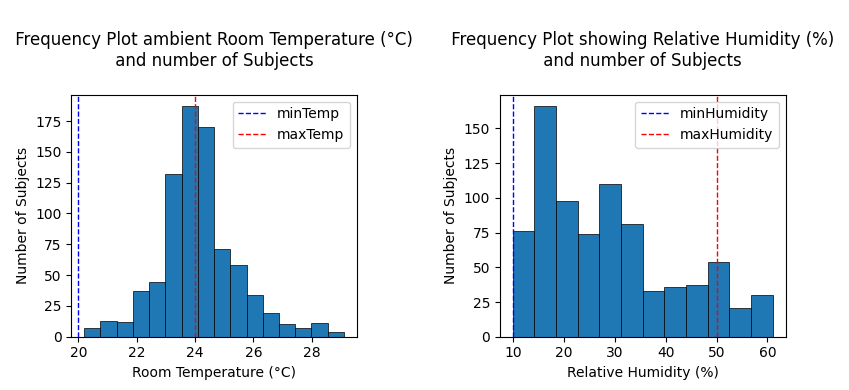

In [20]:
# Environment Data a plots, temperature and relative humidity

# per degree
T_atm_data = environmentData["T_atm"];
humidity_data = environmentData["Humidity"];

fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# temperature plot
axs[0].hist(T_atm_data, bins = 2*int(abs(T_atm_data.min() - T_atm_data.max())), edgecolor='black', linewidth=0.5)

axs[0].set_ylabel("Number of Subjects")
axs[0].set_xlabel("Room Temperature (°C)");
axs[0].set_title("\n Frequency Plot ambient Room Temperature (°C) \n and number of Subjects \n")
axs[0].axvline(x = 20, color = 'b', linestyle='dashed', label="minTemp", linewidth=1)
axs[0].axvline(x = 24, color = 'r', linestyle='dashed', label="maxTemp", linewidth=1)
axs[0].legend()


# humiditiy plot

axs[1].hist(humidity_data, bins = 12, edgecolor='black', linewidth=0.5)

axs[1].set_ylabel("Number of Subjects")
axs[1].set_xlabel("Relative Humidity (%)");
axs[1].set_title("\n Frequency Plot showing Relative Humidity (%) \n and number of Subjects \n")

axs[1].axvline(x = 10, color = 'b', linestyle='dashed', label="minHumidity", linewidth=1)
axs[1].axvline(x = 50, color = 'r', linestyle='dashed', label="maxHumidity", linewidth=1)

axs[1].legend(loc = 'upper right')


fig.tight_layout()
plt.subplots_adjust(wspace=0.5)

testFig = BytesIO();
plt.savefig(testFig, format='PNG', bbox_inches='tight');

plt.close();

humPlotHTML = f"<center style='width:100%'><img src='data:image/png;base64,{base64.b64encode(testFig.getvalue()).decode()}'></center>"
display(HTML(humPlotHTML));

As it can be seen from the plot below there is no apparent correlation between the resulting oral temperature and the environment variable, making them likely not predicitive features for the temperature prediction model. Having a pearson correlation of just 0.093 and 0.068 for room temperature and relative humidity respectively.

--- 



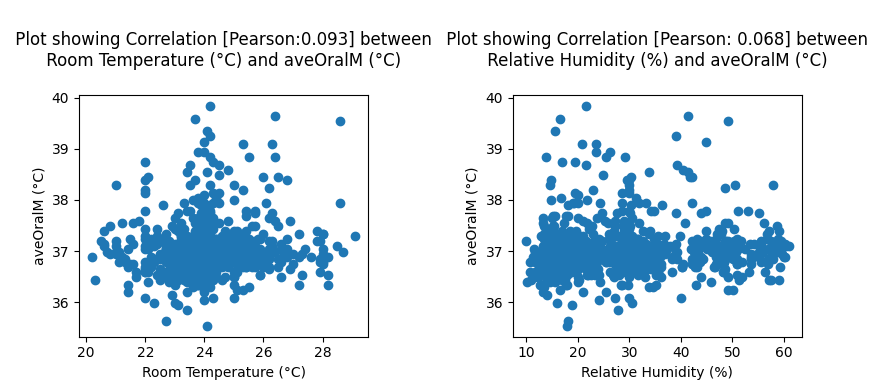


 ---

In [21]:
# correlation plots for room temperature and humidity for aveOralM
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

axs[0].scatter(environmentData["T_atm"], train_y["aveOralM"])
axs[0].set_title(f'''\n Plot showing Correlation [Pearson:{round(environmentData["T_atm"].corr(train_y["aveOralM"]),3)}] between \n Room Temperature (°C) and aveOralM (°C) \n''')
axs[0].set_xlabel("Room Temperature (°C)")
axs[0].set_ylabel("aveOralM (°C)")

axs[1].scatter(environmentData["Humidity"], train_y["aveOralM"])
axs[1].set_title(f'''\n Plot showing Correlation [Pearson: {round(environmentData["Humidity"].corr(train_y["aveOralM"]),3)}] between \n Relative Humidity (%) and aveOralM (°C) \n''')
axs[1].set_xlabel("Relative Humidity (%)")
axs[1].set_ylabel("aveOralM (°C)")

fig.tight_layout()
plt.subplots_adjust(wspace=0.5)

testFig = BytesIO();
plt.savefig(testFig, format='PNG', bbox_inches='tight');

plt.close();

humPlotHTML = f"<center style='width:100%'><img src='data:image/png;base64,{base64.b64encode(testFig.getvalue()).decode()}'></center>"
display(Markdown("--- \n"));
display(HTML(humPlotHTML));
display(Markdown("\n ---"));


A simillar effect can be seen for aveOralF measurement, where the pearson correlation is 0.071 and 0.06 for room temperature and relative humidity respectively signifying a weak correlation.

--- 



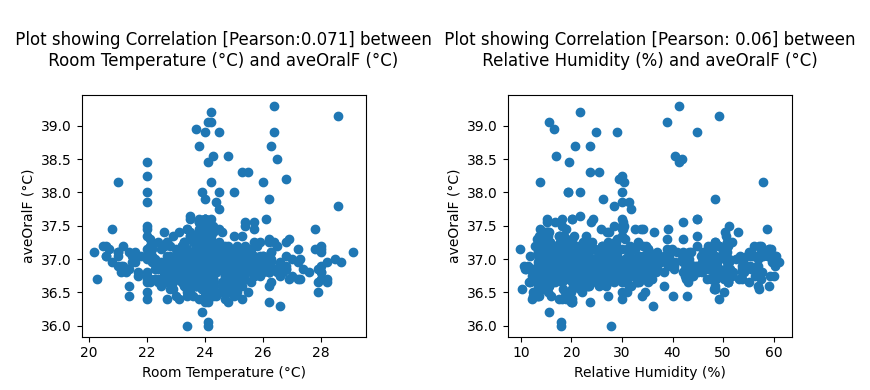


 ---

In [22]:
# correlation plots for room temperature and humidity for aveOralF
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

axs[0].scatter(environmentData["T_atm"], train_y["aveOralF"])
axs[0].set_title(f'''\n Plot showing Correlation [Pearson:{round(environmentData["T_atm"].corr(train_y["aveOralF"]),3)}] between \n Room Temperature (°C) and aveOralF (°C) \n''')
axs[0].set_xlabel("Room Temperature (°C)")
axs[0].set_ylabel("aveOralF (°C)")

axs[1].scatter(environmentData["Humidity"], train_y["aveOralF"])
axs[1].set_title(f'''\n Plot showing Correlation [Pearson: {round(environmentData["Humidity"].corr(train_y["aveOralF"]),3)}] between \n Relative Humidity (%) and aveOralF (°C) \n''')
axs[1].set_xlabel("Relative Humidity (%)")
axs[1].set_ylabel("aveOralF (°C)")

fig.tight_layout()
plt.subplots_adjust(wspace=0.5)

testFig = BytesIO();
plt.savefig(testFig, format='PNG', bbox_inches='tight');

plt.close();

humPlotHTML = f"<center style='width:100%'><img src='data:image/png;base64,{base64.b64encode(testFig.getvalue()).decode()}'></center>"
display(Markdown("--- \n"));
display(HTML(humPlotHTML));
display(Markdown("\n ---"));

### 3.2 Demographic Data
--- 

Demographic data about the patients has been collected in the form of ethnicity data, age data and gender data, as well as the results of febrile patients. These are shown to be not statistically significant as predictive univariate features.

#### 3.2.1 Ethnicity
--- 

The dataset contains information based on the ethnicity of the patients. The population contains predominatley white subjects making up 48.53% of the dataset, which makes the data set not wholey representitive of a wider population.  This inturn will affect the generalization of the model developed, as the subject group is not diverse enough. There is also a lack of febrile patients of American Indian or Alaskan Native ethnicity and minimal Hispanic/Latino and Multiracial patients with EBT to classify for fever, which may impact the performance of the classification model. From the box plot it can be seen that ethnicity has a minor effect on median body temperature as aveOralM median temperatures have a standard deviation of 0.15 and 0.098 for aveOralF median. Although there is some deviaition between means for American Indian or Alaskan Native ethnic groups, this likely results with the small representation of the general population as there are only 3 subjects, non of which are febrile, leading to a lower median. Performing anova on stratified subsets of the training set split based on the ethnicity yield pvalues of 0.488 for aveOralM and 0.436 for aveOralF leading to statistically insignificant results as it is above the 0.05 threshold. As the differences between the mean and median are small there is no significant correlation between the ethnicity of a patient and the oral temperature. Although ANOVA suggest lack of direct difference in means it need to be further investigated on larger population size as the test may be unstable.

In [23]:
# Ethincity Median aveOralTemp Analysis

ethMedian = pd.concat([patientData["Ethnicity"],train_y["aveOralM"], train_y["aveOralF"]], axis=1).groupby("Ethnicity").median().reset_index().rename(columns={"aveOralM":"aveOralM_median", "aveOralF":"aveOralF_median"})

groupedDisplay = "";
for data in [ethMedian, ethMedian.describe().rename(columns={"aveOralM (median)":"aveOralM"})]:
    groupedDisplay += f"<div style ='width:50%; margin: 10px'>{data.to_html()}</div>";

display(HTML(f"<div style = 'display:flex; justify-content:center'><div style='display:flex; flex-direction:row;'> {groupedDisplay} </div></div>"));

---

</br>


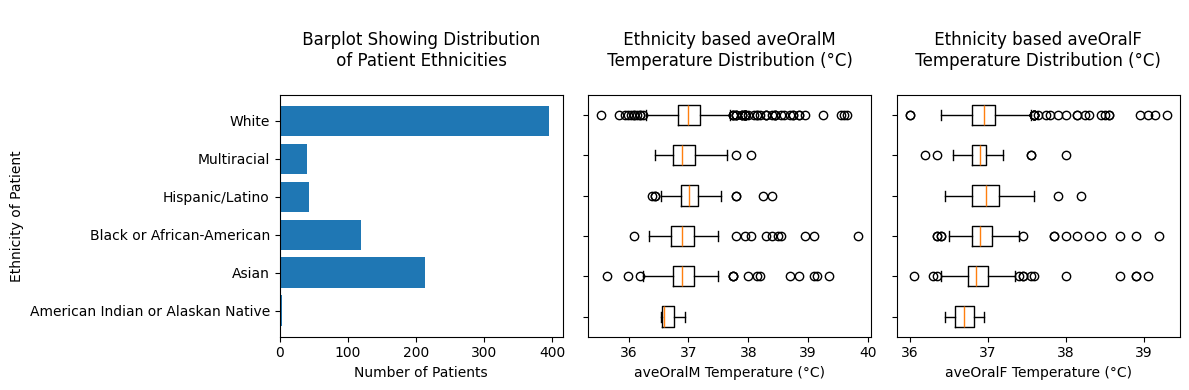

--- 


</br>

</br>

---

In [24]:
# Ethnicity Plots Generation

# ethnicity plot

ethnicityData = patientData["Ethnicity"].value_counts().rename_axis('Ethnicity').reset_index(name='Subjects').sort_values("Ethnicity")
ethnicityData["Subject %"] = round((ethnicityData.Subjects / ethnicityData.Subjects.sum())*100,2)

febrileCount_m = pd.concat([patientData["Ethnicity"],train_y["aveOralM"].apply(lambda x: x > 37.5).rename("aveOralM_febrile")], axis = 1).groupby("Ethnicity").sum().rename({"aveOralM_febrile":"aveOralM_febrile_count"}, axis = 1).reset_index()
febrileCount_f = pd.concat([patientData["Ethnicity"],train_y["aveOralF"].apply(lambda x: x > 37.5).rename("aveOralF_febrile")], axis = 1).groupby("Ethnicity").sum().rename({"aveOralF_febrile":"aveOralF_febrile_count"}, axis = 1).reset_index()

ethnicityOral_m = pd.concat([patientData["Ethnicity"],train_y["aveOralM"]], axis = 1)
ethnicityOral_f = pd.concat([patientData["Ethnicity"],train_y["aveOralF"]], axis = 1)

# perform ANOVA on CV splits due to potential 

s_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)


# aveOralM 3-Fold Anova
ethnicityOral_m["Ethnicity_Label"] = ethnicityOral_m["Ethnicity"].astype("category").cat.codes
anova_ethnicity_m_stats = [];

for fold, (train_idx, val_idx) in enumerate(s_kfold.split(ethnicityOral_m, ethnicityOral_m["Ethnicity_Label"])):
    anova_ethnicity_m_stats.append(stats.f_oneway(*ethnicityOral_m.iloc[val_idx].groupby("Ethnicity")["aveOralM"].apply(list).to_dict().values()))

anova_ethnicity_m = {"statistic":np.mean([stat.statistic for stat in anova_ethnicity_m_stats]), 
                     "pvalue":np.mean([stat.pvalue for stat in anova_ethnicity_m_stats])}

# aveOralF 3-Fold Anova
ethnicityOral_f["Ethnicity_Label"] = ethnicityOral_f["Ethnicity"].astype("category").cat.codes
anova_ethnicity_f_stats = [];

for fold, (train_idx, val_idx) in enumerate(s_kfold.split(ethnicityOral_f, ethnicityOral_f["Ethnicity_Label"])):
    anova_ethnicity_f_stats.append(stats.f_oneway(*ethnicityOral_f.iloc[val_idx].groupby("Ethnicity")["aveOralF"].apply(list).to_dict().values()))
    
anova_ethnicity_f = {"statistic":np.mean([stat.statistic for stat in anova_ethnicity_f_stats]), 
                     "pvalue":np.mean([stat.pvalue for stat in anova_ethnicity_f_stats])}

stat_text = f'''
    aveOralM -
    Statistics : {round(anova_ethnicity_m["statistic"],3)},
    P-Value : {round(anova_ethnicity_m["pvalue"],3)} </br>

    aveOralF - 
    Statistics : {round(anova_ethnicity_f["statistic"],3)},
    P-Value : {round(anova_ethnicity_f["pvalue"],3)}
''' 
data = pd.merge(ethnicityData, febrileCount_m, on="Ethnicity");
data = pd.merge(data, febrileCount_f, on="Ethnicity");
dataDisplayHTML = f"<div style='display:flex; justify-content:center'>{data.to_html()}</div><div style='display:flex; justify-content:center'>{stat_text}</div>"

fig, axs = plt.subplots(1, 3, figsize=(12, 4))

plt.rcParams["figure.figsize"] = (5,5)
axs[0].barh(ethnicityData["Ethnicity"], ethnicityData["Subjects"])
axs[0].set_title("\n Barplot Showing Distribution \n of Patient Ethnicities \n");
axs[0].set_ylabel("Ethnicity of Patient")
axs[0].set_xlabel("Number of Patients")

ethnicityGroups = pd.concat([patientData["Ethnicity"],train_y["aveOralM"]], axis=1).groupby("Ethnicity")["aveOralM"].apply(list).to_dict();
axs[1].boxplot(ethnicityGroups.values(),  vert = False)
axs[1].set_xlabel("aveOralM Temperature (°C)")
axs[1].set_yticklabels([])
axs[1].set_title("\n Ethnicity based aveOralM \n Temperature Distribution (°C) \n")

ethnicityGroups = pd.concat([patientData["Ethnicity"],train_y["aveOralF"]], axis=1).groupby("Ethnicity")["aveOralF"].apply(list).to_dict();
axs[2].boxplot(ethnicityGroups.values(),  vert = False)
axs[2].set_xlabel("aveOralF Temperature (°C)")
axs[2].set_yticklabels([])
axs[2].set_title("\n Ethnicity based aveOralF \n Temperature Distribution (°C) \n")

fig.tight_layout();

testFig = BytesIO();
plt.savefig(testFig, format='PNG', bbox_inches='tight');

plt.close();

display(Markdown("---"));
display(Markdown("</br>"));

ethnicityPlotHTML = f"<center><img src='data:image/png;base64,{base64.b64encode(testFig.getvalue()).decode()}'></center>"
display(HTML(ethnicityPlotHTML))

display(Markdown("--- \n"));
display(Markdown("</br>"));

display(HTML(dataDisplayHTML));

#display(HTML(f'''<div style='display:flex'><div style='width:30%'>{dataDisplayHTML}</div><hr><div style ='width:65%'>{ethnicityPlotHTML}</div></div>'''));
display(Markdown("</br>"));
display(Markdown("---"));

#### 3.2.2 Age
--- 

Similliar to the ethnic representation the dataset lacks age based representation. This is quite significant as 50.74% of the dataset is composed of 18-20 year olds and 94.74% within the 18-30 range. The data set completely lacks data on anyone under the age of 18 and has only 3 patients over the age > 60. This will also impeded the generalization ability of the developed model. There is additionaly lack of data on febrile subjects from the ages > 21 only having a total  of 5, which may affect the classification models ability to predict whether a patient is febrile or not. Although one way ANOVA metric provides some evidence that there is not statistical significance between the age and average oral temperature of the subject given that $\text{p-value} = 0.733$. for aveOralM and $\text{p-value} = 0.75$ for aveOralF which is above the 0.05 significance value, this may not be representative due to the lack of data in higher age ranges. Therefore, these findings need to be further investigated due to the small population size leading to unstable ANOVA results.

---

</br>


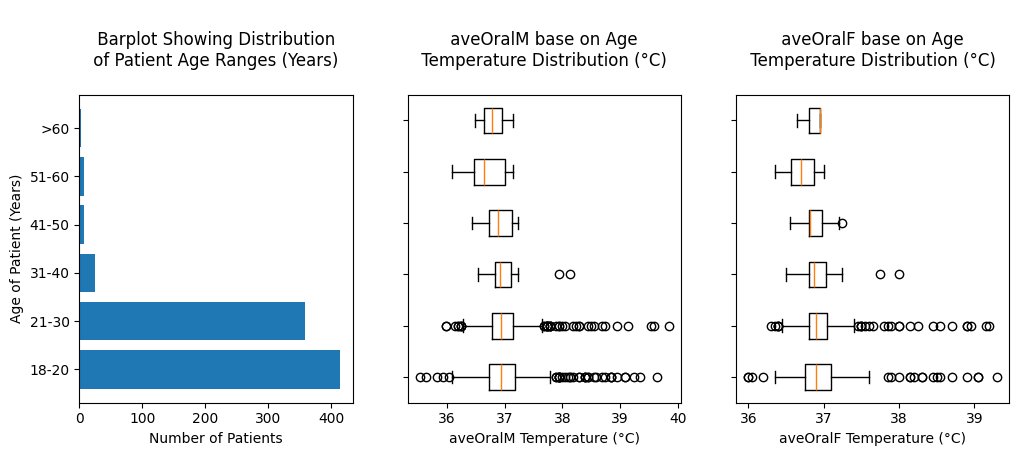

</br>

---

</br>

</br>

---

In [25]:
# Age Plots Generation

ageData = patientData["Age"].value_counts().rename_axis('Age').reset_index(name='Subjects').sort_values("Age")

febrileCount_m = pd.concat([patientData["Age"],train_y["aveOralM"].apply(lambda x: x > 37.5).rename("aveOralM_febrile")], axis = 1).groupby("Age").sum().rename({"aveOralM_febrile":"aveOralM_febrile_count"}, axis = 1).reset_index()
febrileCount_f = pd.concat([patientData["Age"],train_y["aveOralF"].apply(lambda x: x > 37.5).rename("aveOralF_febrile")], axis = 1).groupby("Age").sum().rename({"aveOralF_febrile":"aveOralF_febrile_count"}, axis = 1).reset_index()

ageData["%"] = round((ageData.Subjects / ageData.Subjects.sum())*100,2)

ageOral_m = pd.concat([patientData["Age"],train_y["aveOralM"]], axis = 1);
ageOral_f = pd.concat([patientData["Age"],train_y["aveOralF"]], axis = 1);

s_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# aveOralM 3-Fold Anova
ageOral_m["Age_Label"] = ageOral_m["Age"].astype("category").cat.codes
ageOral_m_stats = [];

for fold, (train_idx, val_idx) in enumerate(s_kfold.split(ageOral_m, ageOral_m["Age_Label"])):
    ageOral_m_stats.append(stats.f_oneway(*ageOral_m.iloc[val_idx].groupby("Age")["aveOralM"].apply(list).to_dict().values()))

anova_age_m = {"statistic":np.mean([stat.statistic for stat in ageOral_m_stats]), 
                     "pvalue":np.mean([stat.pvalue for stat in ageOral_m_stats])}

# aveOralF 3-Fold Anova
ageOral_f["Age_Label"] = ageOral_f["Age"].astype("category").cat.codes
ageOral_f_stats = [];

for fold, (train_idx, val_idx) in enumerate(s_kfold.split(ageOral_f, ageOral_f["Age_Label"])):
    ageOral_f_stats.append(stats.f_oneway(*ageOral_f.iloc[val_idx].groupby("Age")["aveOralF"].apply(list).to_dict().values()))

anova_age_f = {"statistic":np.mean([stat.statistic for stat in ageOral_f_stats]), 
                     "pvalue":np.mean([stat.pvalue for stat in ageOral_f_stats])}


stat_text = f'''
    aveOralM - 
    Statistics : {round(anova_age_m["statistic"],3)},
    P-Value : {round(anova_age_m["pvalue"],3)}, </br>

    aveOralF - 
    Statistics : {round(anova_age_f["statistic"],3)},
    P-Value : {round(anova_age_f["pvalue"],3)}
'''

data = pd.merge(ageData, febrileCount_m, on="Age");
data = pd.merge(data, febrileCount_f, on="Age");

dataDisplayHTML = f"<div style='display:flex; justify-content:center'>{data.to_html()}</div><div style='display:flex; justify-content:center;'>{stat_text}</div>"
    

fig, axs = plt.subplots(1, 3, figsize=(12, 4))

#plt.rcParams["figure.figsize"] = (5,5)
axs[0].barh(ageData["Age"], ageData["Subjects"])
axs[0].set_ylabel("Age of Patient (Years)")
axs[0].set_xlabel("Number of Patients")
axs[0].set_title("\n Barplot Showing Distribution \n of Patient Age Ranges (Years) \n")

ageGroups = pd.concat([patientData["Age"],train_y["aveOralM"]], axis=1).groupby("Age")["aveOralM"].apply(list).to_dict();
axs[1].boxplot(ageGroups.values(), vert = False) #, tick_labels = ageGroups.keys()
axs[1].set_xlabel("aveOralM Temperature (°C)")
axs[1].set_yticklabels([])
axs[1].set_title("\n aveOralM base on Age \n Temperature Distribution (°C) \n")

ageGroups = pd.concat([patientData["Age"],train_y["aveOralF"]], axis=1).groupby("Age")["aveOralF"].apply(list).to_dict();
axs[2].boxplot(ageGroups.values(), vert = False) #, tick_labels = ageGroups.keys()
axs[2].set_xlabel("aveOralF Temperature (°C)")
axs[2].set_yticklabels([])
axs[2].set_title("\n aveOralF base on Age \n Temperature Distribution (°C) \n")

testFig = BytesIO();
plt.savefig(testFig, format='PNG', bbox_inches='tight');

plt.close();

display(Markdown("---"));
display(Markdown("</br>"));
ethnicityPlotHTML = f"<center><img src='data:image/png;base64,{base64.b64encode(testFig.getvalue()).decode()}'></center>"
display(HTML(ethnicityPlotHTML))

display(Markdown("</br>"));
display(Markdown("---"));
display(Markdown("</br>"));

display(HTML(dataDisplayHTML))
#display(HTML(f'''<div style='display:flex'><div style='width:30%; align-content:center'>{dataDisplayHTML}</div><hr><div style ='width:65%'>{ethnicityPlotHTML}</div></div>'''));
display(Markdown("</br>"));
display(Markdown("---"));


#### 3.2.3 Gender
--- 

There is a adequate representation of female and male patients in the study with a sufficient proportion of febrile patients for classification per gender, with 59.56% Female and 40.44% Male patients (see table below). This results in fairly good representation of both sexes. The effect of the gender on the oral temperature is insignificant as signified by the $\text{p-value}=0.3674$ for aveOralM being and $\text{p-value}=0.0595$ for aveOralF, both above the threshold of 0.05. 

---


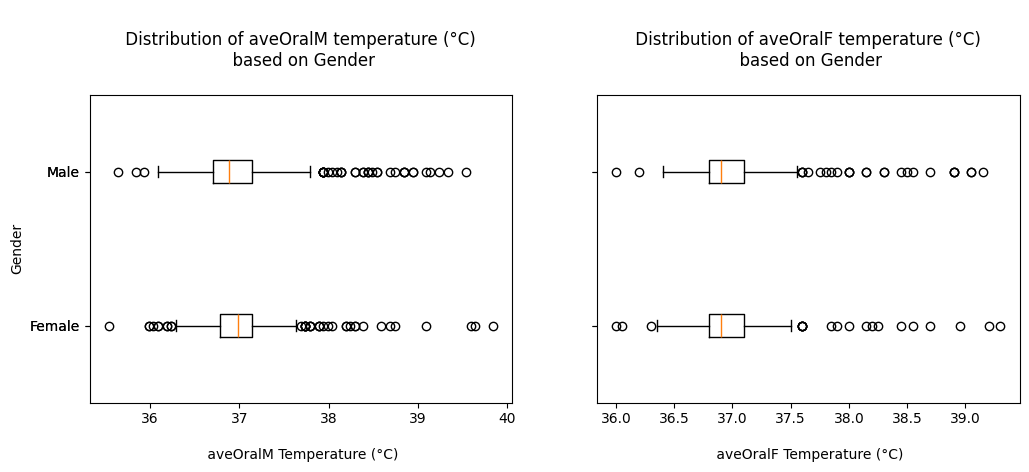

</br>

---

</br>

---

In [26]:
# Gender Plots Generation

plt.rcParams["figure.figsize"] = (5,5)

genderData = patientData["Gender"].value_counts().rename_axis('Gender').reset_index(name='Subjects')

febrileCount = pd.concat([patientData["Gender"],train_y["aveOralM_fever"], train_y["aveOralF_fever"]], axis = 1).groupby("Gender").sum().rename({"aveOralM_fever":"aveOralM_febrile_count", "aveOralF_fever":"aveOralF_febrile_count"}, axis = 1).reset_index()

genderData["%"] = round((genderData.Subjects / genderData.Subjects.sum())*100,2)
genderData = pd.merge(genderData,febrileCount, on = "Gender");

gender_describe_m = pd.concat([patientData["Gender"], train_y["aveOralM"]], axis = 1).groupby("Gender").describe()
gender_describe_f = pd.concat([patientData["Gender"], train_y["aveOralF"]], axis = 1).groupby("Gender").describe()

# point biserial correlation
bsrl_corr_m = pd.DataFrame(patientData["Gender"].apply(lambda x: x == "Male")).corrwith(train_y["aveOralM"], method=stats.pointbiserialr);
bsrl_corr_f = pd.DataFrame(patientData["Gender"].apply(lambda x: x == "Male")).corrwith(train_y["aveOralF"], method=stats.pointbiserialr);
bsrl_text = f'''
<div style='display:flex; justify-content:center'> aveOralM, R-Value: {round(bsrl_corr_m.iloc[0].to_numpy()[0], 4)}, P-Value {round(bsrl_corr_m.iloc[1].to_numpy()[0], 4)}</div>
<div style='display:flex; justify-content:center'> aveOralF, R-Value: {round(bsrl_corr_f.iloc[0].to_numpy()[0], 4)}, P-Value {round(bsrl_corr_f.iloc[1].to_numpy()[0], 4)}</div>
''';

dataDisplayHTML = "";
for data in [gender_describe_f.transpose(), gender_describe_m.transpose()]:
    dataDisplayHTML += f"<div style='margin: 10px; align-content:center'>{data.to_html()}</div>"
# dataDisplayHTML += bsrl_text;
display(Markdown("---"));

fig, axs = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

genderGroups_m = pd.concat([patientData["Gender"],train_y["aveOralM"]], axis=1).groupby("Gender")["aveOralM"].apply(list).to_dict();

axs[0].boxplot(genderGroups_m.values(), tick_labels = genderGroups_m.keys(), vert = False) # , tick_labels = genderGroups.keys()
axs[0].grid(False);
axs[0].set_xlabel("\n aveOralM Temperature (°C)")
axs[0].set_ylabel("Gender")
axs[0].set_title("\n Distribution of aveOralM temperature (°C) \n  based on Gender \n")

genderGroups_f = pd.concat([patientData["Gender"],train_y["aveOralF"]], axis=1).groupby("Gender")["aveOralF"].apply(list).to_dict();

axs[1].boxplot(genderGroups_f.values(), tick_labels = genderGroups_f.keys(), vert = False) # , tick_labels = genderGroups.keys()
axs[1].grid(False);
axs[1].set_xlabel("\n aveOralF Temperature (°C)")
axs[1].set_title("\n Distribution of aveOralF temperature (°C) \n  based on Gender \n")


testFig = BytesIO();
plt.savefig(testFig, format='PNG', bbox_inches='tight');

plt.close();

genderPlotHTML = f"<center><img src='data:image/png;base64,{base64.b64encode(testFig.getvalue()).decode()}'></center>"

display(HTML(genderPlotHTML))

display(Markdown("</br>"));
display(Markdown("---"));
display(Markdown("</br>"));

display(HTML(f'''<div style='display:flex; flex-direction: row; justify-content:center'>{dataDisplayHTML}</div>'''))
display(HTML(f'''<div style='display:flex; flex-direction: row; justify-content:center'>{genderData.to_html()}</div>'''))
display(HTML(bsrl_text))

display(Markdown("---"));

#### 3.2.4 Febrile Patients Count
--- 

Only 10.91% of the patients had elevated body temperature (> 37.5 °C) for aveOralM and 5.76% for aveOralF, which means there will be limited data for positive classification of febrile patients, which may impact the performance of correct febrile patient classfication. This may require an oversampling approach to be taken in order to aid the convergence of more complicated models such as neural networks.

--- 
 </br>

---


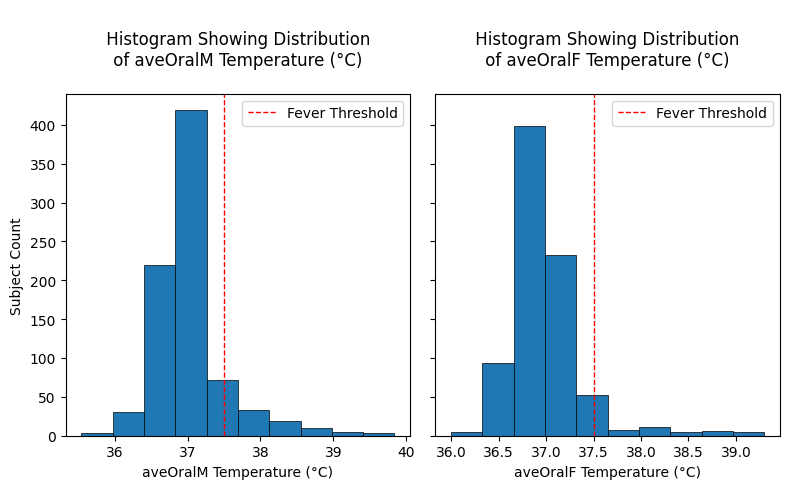

---

In [27]:
# Febrile Patient Graph Generation
febrileData_m = (train_y["aveOralM"] > 37.5).value_counts().rename_axis('IsFebrile').reset_index(name='Subjects')
febrileData_f = (train_y["aveOralF"] > 37.5).value_counts().rename_axis('IsFebrile').reset_index(name='Subjects')

febrileData_m["%"] = round((febrileData_m.Subjects / febrileData_m.Subjects.sum())*100,2)
febrileData_f["%"] = round((febrileData_f.Subjects / febrileData_f.Subjects.sum())*100,2)

febrileData_m = febrileData_m.drop("IsFebrile", axis = 1)
febrileData_f = febrileData_f.drop("IsFebrile", axis = 1)

febrileData_m = febrileData_m.set_axis(["False","True"])
febrileData_f = febrileData_f.set_axis(["False","True"])

febrileData_m.columns = pd.MultiIndex.from_product([["aveOralM"], febrileData_m.columns])
febrileData_f.columns = pd.MultiIndex.from_product([["aveOralF"], febrileData_f.columns])

febrileData_m.index = pd.MultiIndex.from_product([["IsFebrile"], febrileData_m.index])
febrileData_f.index = pd.MultiIndex.from_product([["IsFebrile"], febrileData_f.index])

febrileData = pd.concat([febrileData_m, febrileData_f], axis = 1)


display(Markdown("--- \n </br>"));
display(HTML(f"<div style='display:flex; justify-content:center'>{febrileData.to_html()}</div>"))
display(Markdown("---"));

plt.rcParams["figure.figsize"] = (5,5);

fig, axs = plt.subplots(1, 2, figsize=(8, 5), sharey =  True)

axs[0].hist(train_y["aveOralM"], edgecolor='black', linewidth=0.5);
axs[0].set_xlabel("aveOralM Temperature (°C)");
axs[0].set_ylabel("Subject Count");

axs[0].axvline(x = 37.5, color = 'r', linestyle='dashed', label="Fever Threshold", linewidth=1);
axs[0].set_title("\n Histogram Showing Distribution \n of aveOralM Temperature (°C) \n");
axs[0].legend();

axs[1].hist(train_y["aveOralF"], edgecolor='black', linewidth=0.5);
axs[1].set_xlabel("aveOralF Temperature (°C)");

axs[1].axvline(x = 37.5, color = 'r', linestyle='dashed', label="Fever Threshold", linewidth=1);
axs[1].set_title("\n Histogram Showing Distribution \n of aveOralF Temperature (°C) \n");
axs[1].legend();

fig.tight_layout();

testFig = BytesIO();
plt.savefig(testFig, format='PNG', bbox_inches='tight');
plt.close();


display(HTML(f"<center><img src='data:image/png;base64,{base64.b64encode(testFig.getvalue()).decode()}'></center>"))
display(Markdown("---"));

### 3.3 Methodology Data
--- 

#### 3.3.1 Distance Data
--- 

As the distance from the thermometer was controlled during the experiment to be within an appropriate tolerance, it should have no effect on the oral temperature. However investigating the results is important to gain a deeper understanding of the dataset. As it can be seen from the graphs on the left the distance from the thermometer has no effect on the oral temperature, this is further backed up by the low pearson correlation coefficient indicating no linear relationship, -0.085 for aveOralM and -0.08 for aveOralF respectively.

In [28]:
# check for outliers

z_scores = np.abs(stats.zscore(methodologyData["Distance"]))
distance_outliers = methodologyData["Distance"][z_scores > 3]
print(f"Distance, Outliers: {list(distance_outliers)}")

Distance, Outliers: [79.0]


The data likely contains a  measurement mistake, as distances where measured within the 0.4-1.0 range, making 79.0 a major outlier. As such it will be removed from the data.

In [29]:
# Run Once to Drop Outlier Column 

# Drop outliers from features
train_x_processed = train_x_processed.drop(index = distance_outliers.index);
imputed_train_x = imputed_train_x.drop(index = distance_outliers.index);
train_x = train_x.drop(index = distance_outliers.index);

# Drop outliers from targets
train_y = train_y.drop(index = distance_outliers.index);

tempMeas = train_x.drop(["Gender", "Age", "Ethnicity", "T_atm", "Humidity", "Distance", "T_offset1"],axis=1)
patientData = train_x[["Gender", "Age", "Ethnicity"]]
environmentData = train_x[["T_atm", "Humidity"]];
methodologyData = imputed_train_x[["Distance", "T_offset1"]];

--- 

---

<br/>


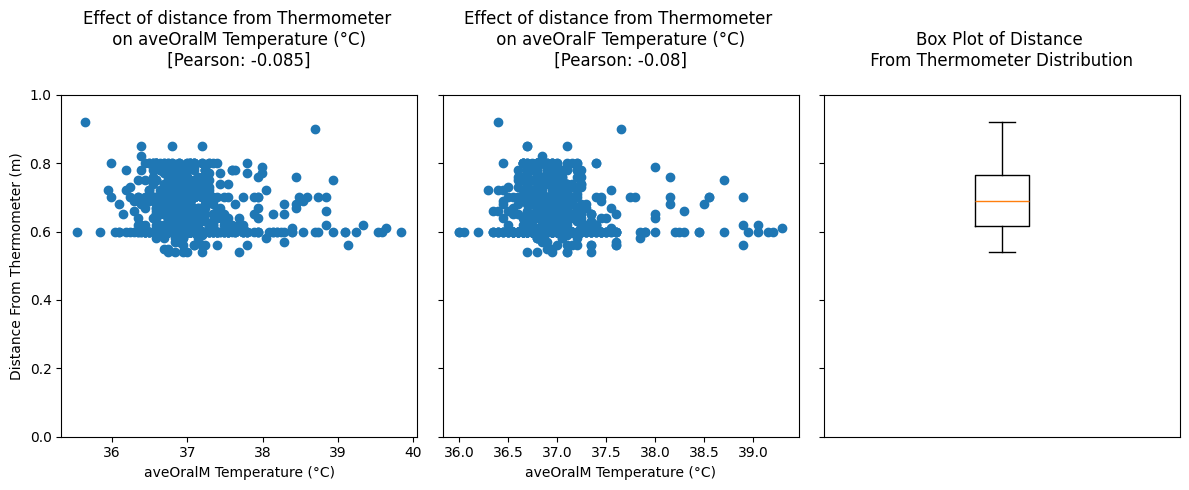

<br/>

--- 
 <br/>

<br/>

--- 
 <br/>

In [30]:
# Distance Graph Generation 

distanceData = methodologyData["Distance"].value_counts().rename_axis('Distance').reset_index(name='Count')

fig, axs = plt.subplots(1, 3, figsize=(12, 5), sharey = True)

axs[0].scatter(train_y["aveOralM"], methodologyData["Distance"])
axs[0].set_xlabel("aveOralM Temperature (°C)")
axs[0].set_ylabel("Distance From Thermometer (m)")
axs[0].set_ylim(0,1)
axs[0].set_title(f'''Effect of distance from Thermometer \n on aveOralM Temperature (°C) \n [Pearson: {round(methodologyData["Distance"].corr(train_y["aveOralM"]),3)}] \n''');


axs[1].scatter(train_y["aveOralF"], methodologyData["Distance"])
axs[1].set_xlabel("aveOralM Temperature (°C)")
axs[1].set_ylim(0,1)

axs[1].set_title(f'''Effect of distance from Thermometer \n on aveOralF Temperature (°C) \n [Pearson: {round(methodologyData["Distance"].corr(train_y["aveOralF"]),3)}] \n''');

axs[2].boxplot(distanceData["Distance"], showfliers=False)
axs[2].set_xticks([]);
axs[2].set_title("Box Plot of Distance \n From Thermometer Distribution \n")


fig.subplots_adjust(top=0.78)
fig.tight_layout();

testFig = BytesIO();
plt.savefig(testFig, format='PNG', bbox_inches='tight');
plt.close();

display(Markdown("---"))
display(Markdown("<br/>"));
display(HTML(f"<center><img src='data:image/png;base64,{base64.b64encode(testFig.getvalue()).decode()}'></center>"))


display(Markdown("<br/>"));
#display_center(out);
display(Markdown("--- \n <br/>"));

distData = distanceData.iloc[:, ::-1].transpose();
plt.rcParams["figure.figsize"] = (5,5)
display(HTML(f"<div>{distData.to_html()}</div>"));

display(Markdown("<br/>"));
display(Markdown("--- \n <br/>"));

#### 3.3.2 Black Body Temperature Compensation
--- 

Similarily the calibration temperature should have no effect on the average oral temperature, however analysis still needs to be done to determine that this is an uncorrelated feature. This is used to calibrate the infrared thermometer and improve system stability (Zhou et. al, 2020). As seen from the graphs below the correlation for aveOralM is 0.154 and for 0.133 for aveOralF showing a weak correlation.

<br/>

--- 
 <br/>


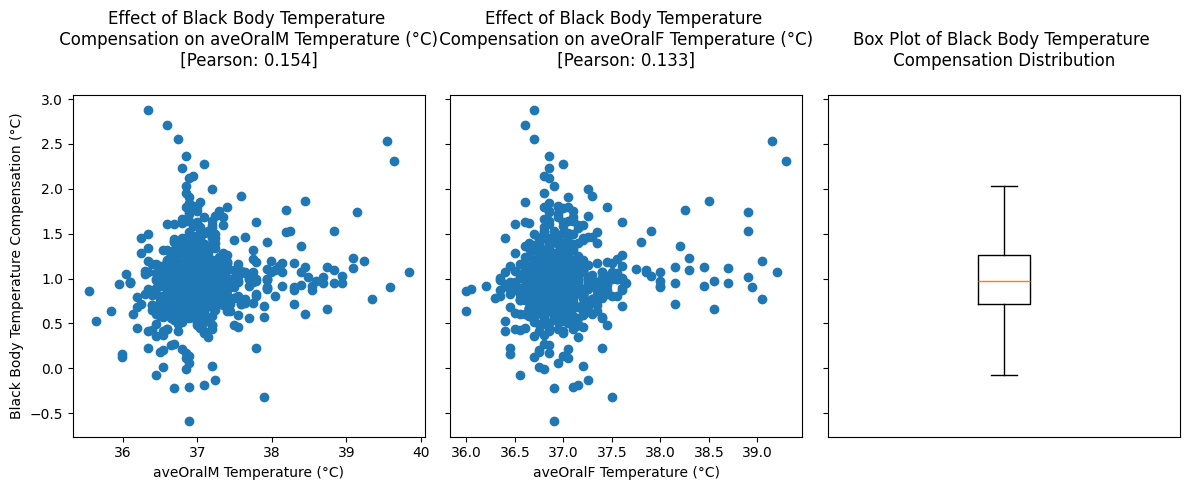

<br/>

--- 
 <br/>

<br/>

--- 
 <br/>

In [31]:
# Distance Graph Generation 

blackBodyTempData = methodologyData["T_offset1"].value_counts().rename_axis('T_offset1').reset_index(name='Count')

fig, axs = plt.subplots(1, 3, figsize=(12, 5), sharey = True)

axs[0].scatter(train_y["aveOralM"], methodologyData["T_offset1"])
axs[0].set_xlabel("aveOralM Temperature (°C)")
axs[0].set_ylabel("Black Body Temperature Compensation (°C)")
axs[0].set_title(f'''Effect of Black Body Temperature \n Compensation on aveOralM Temperature (°C) \n [Pearson: {round(methodologyData["T_offset1"].corr(train_y["aveOralM"]),3)}] \n''');

axs[1].scatter(train_y["aveOralF"], methodologyData["T_offset1"])
axs[1].set_xlabel("aveOralF Temperature (°C)")
axs[1].set_title(f'''Effect of Black Body Temperature \n Compensation on aveOralF Temperature (°C) \n [Pearson: {round(methodologyData["T_offset1"].corr(train_y["aveOralF"]),3)}] \n''');

axs[2].boxplot(blackBodyTempData["T_offset1"], showfliers=False)
axs[2].set_xticks([]);
axs[2].set_title("Box Plot of Black Body Temperature \n Compensation Distribution \n")

fig.subplots_adjust(top=0.78)

fig.tight_layout();

testFig = BytesIO();
plt.savefig(testFig, format='PNG', bbox_inches='tight');
plt.close();

# Display 

display(Markdown("<br/>"))
display(Markdown("--- \n <br/>"));

display(HTML(f"<center><img src='data:image/png;base64,{base64.b64encode(testFig.getvalue()).decode()}'></center>"))

display(Markdown("<br/>"));

display(Markdown("--- \n <br/>"));
displayData = blackBodyTempData.head(10).iloc[:, ::-1].transpose()

display(HTML(f"<div style='display:flex; justify-content:center'>{displayData.to_html()}</div>"));
plt.rcParams["figure.figsize"] = (5,5)

display(Markdown("<br/>"))
display(Markdown("--- \n <br/>"));



### 3.4 Feature Exploration
--- 

The previous features such as the demographic, environment and methodology may not be the most predictive features. This means that the other temperatures measured by the infrared thermometer can be used to predict the oral temperatures in monitor and fast mode. These need to be investigated to determine their suitability as predictive features in the model. This will be done by examining the correlation of the different measurement areas to the reference area, namely the aveOralF and aveOralM.


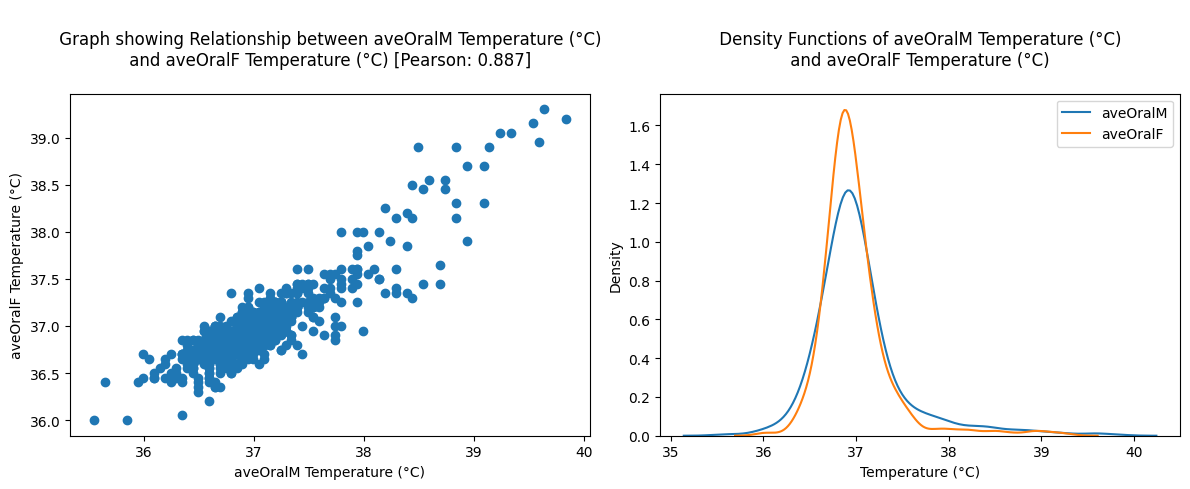

In [32]:
# Plot Graph aveOralM_Temps vs aveOralF_Temps
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].scatter(train_y["aveOralM"], train_y["aveOralF"]);
axs[0].set_xlabel("aveOralM Temperature (°C)");
axs[0].set_ylabel("aveOralF Temperature (°C)");
fm_corr = train_y["aveOralM"].corr(train_y["aveOralF"]);
axs[0].set_title(f"\n Graph showing Relationship between aveOralM Temperature (°C) \n and aveOralF Temperature (°C) [Pearson: {round(fm_corr,3)}] \n");


sns.kdeplot(train_y["aveOralM"], ax=axs[1], label="aveOralM")
sns.kdeplot(train_y["aveOralF"], ax=axs[1], label="aveOralF")
axs[1].set_xlabel("Temperature (°C)");
fm_corr = train_y["aveOralM"].corr(train_y["aveOralF"]);
axs[1].legend();
axs[1].set_title(f"\n Density Functions of aveOralM Temperature (°C) \n and aveOralF Temperature (°C) \n");

plt.rcParams["figure.figsize"] = (5,5)

fig.tight_layout();

testFig = BytesIO();
plt.savefig(testFig, format='PNG', bbox_inches='tight');
plt.close();
display(HTML(f"<center><img src='data:image/png;base64,{base64.b64encode(testFig.getvalue()).decode()}'></center>"))

The graph above shows the relationship between aveOralM and aveOralF. As the aveOralM is the same measurement area but in the more accurate monitor mode the correlation between aveOralF is strong and linear at 0.887. As these features are correlated possibly simillar features will be able to predict both temperatures. The graph on the left shows that aveOralF is more concentrated around the 36-38 °C zone while the aveOralM's right tail around > 37.5 °C has greater density signifying more febrile diagnosed patients based on aveOralM in comparison to aveOralF.

#### 3.4.1 Univariate Feature Exploration
--- 

##### A - Correlation Exploration 
--- 

In [33]:
# display measurement site image
display(Image(url="https://figures.semanticscholar.org/8d02352736f83f0d153ec956b610ee1d79a404e2/5-Figure2-1.png"))
display(HTML("<center> Figure 1. Measurement Sites (Zhou et. al, 2020). </center>"))

--- 
</br>
In order to explore the inter-correlation between temperature groups, a heatmap for the pearson and spearman correlation was developed. As pearson measures a linear correlation, spearman is able to show a potential non linear but monotonically increasing relationship. From the pearson and spearman heatmaps below 3 distinct high correlation zones can be seen.

- **Top Left Corner** - shows the correlation between the canthi region, see figure 1 above. 
- **Middle Right** - contains forehead temperatures towards the middle of the heatmap.
- **Bottom Right** - contains the max temperature, as well as oral and target temperatures.

This is to be expected as similar measurement sites are highly correlated, an issue that needs to be addressed in the linear models to ensure stability.

</br>

--- 


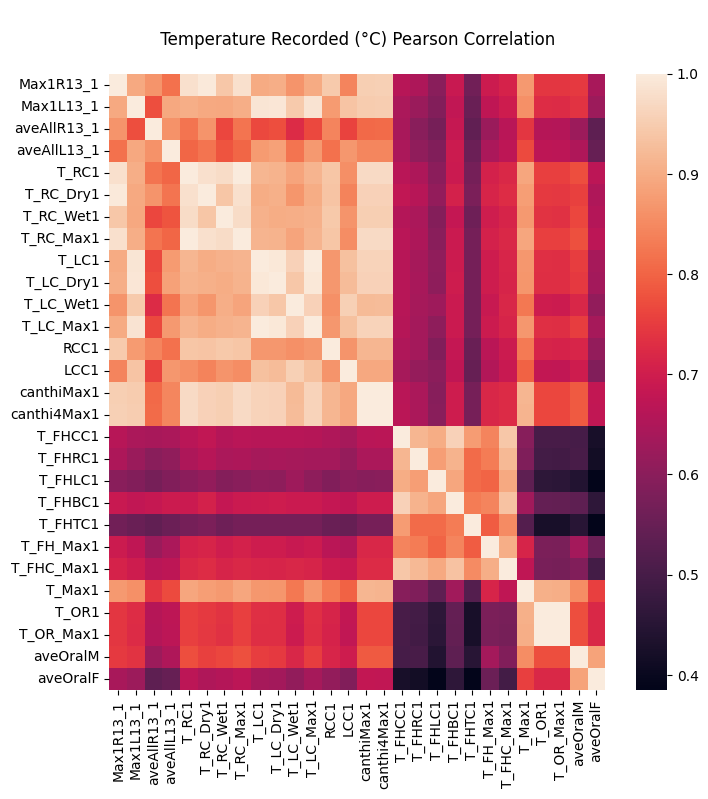


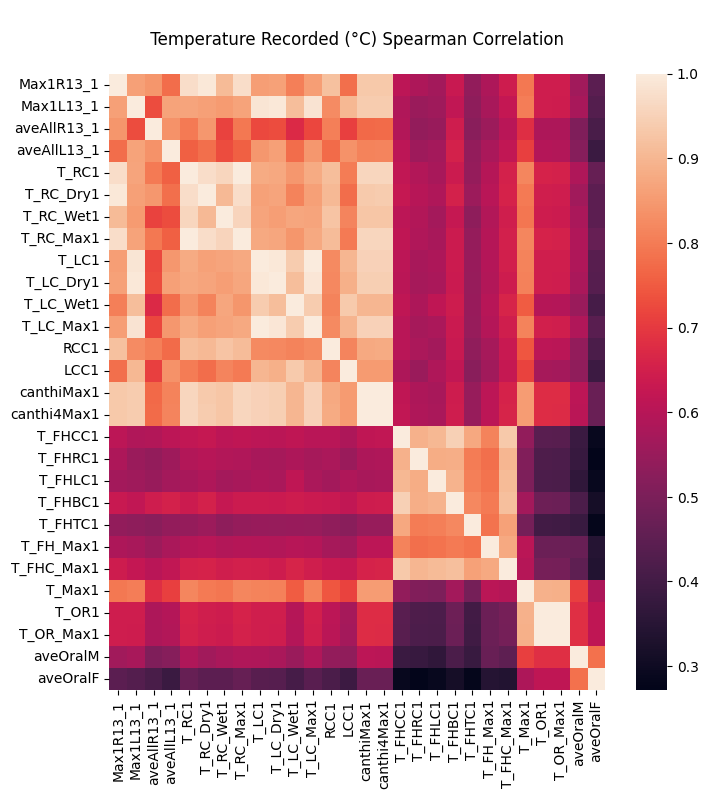

In [34]:
# Heatmaps for Pearson and Spearman Correlation

all_temps = pd.concat([tempMeas,train_y[["aveOralM","aveOralF"]]],axis=1);

plt.subplots(figsize=(8,8))
plt.title("\n Temperature Recorded (°C) Pearson Correlation \n ");
sns.heatmap(all_temps.corr())

testFig = BytesIO();
plt.savefig(testFig, format='PNG', bbox_inches='tight');
plt.close();
display(HTML(f"<center><img src='data:image/png;base64,{base64.b64encode(testFig.getvalue()).decode()}'></center>"))

plt.subplots(figsize=(8,8))
plt.title("\n Temperature Recorded (°C) Spearman Correlation \n");
sns.heatmap(all_temps.corr(method="spearman"))

testFig = BytesIO();
plt.savefig(testFig, format='PNG', bbox_inches='tight');
plt.close();
display(HTML(f"<center><img src='data:image/png;base64,{base64.b64encode(testFig.getvalue()).decode()}'></center>"))

Further to investigate this the collinearity, hierarchical clustering was performed on the spearman rank of the temperature measurements. This resulted in a simillar distribution as with the heatmap above, signifying a degree of collinearity between the temperature features in each region: canthi, forehead, mouth.


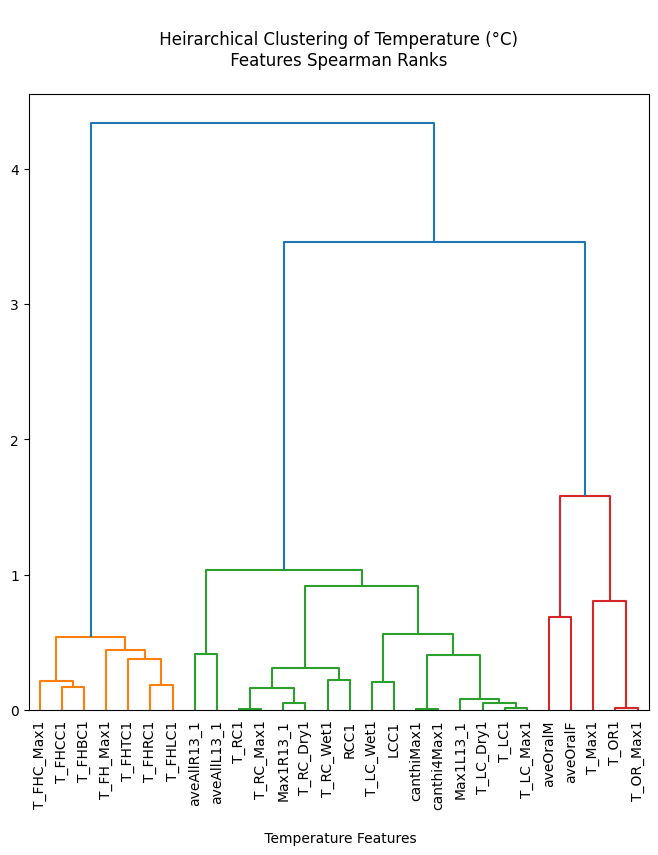

In [35]:
# Perform Hierarchical Clustering using Spearman Rank to Detect Colliniearity
# https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance_multicollinear.html

correlation = stats.spearmanr(all_temps)
corr_linkage = scipy.cluster.hierarchy.ward(correlation[0])
plt.subplots(figsize=(8,8))
plt.title("\n Heirarchical Clustering of Temperature (°C) \n Features Spearman Ranks \n")
plt.xlabel("\n Temperature Features");
dendro = scipy.cluster.hierarchy.dendrogram(corr_linkage, labels=all_temps.columns,
                              leaf_rotation=90)
testFig = BytesIO();
plt.savefig(testFig, format='PNG', bbox_inches='tight');
plt.close();
display(HTML(f"<center><img src='data:image/png;base64,{base64.b64encode(testFig.getvalue()).decode()}'></center>"))

##### B - Summary
--- 

From the previous analysis of the heatmap the top correlated features per region with aveOralM and aveOralF are the maximum temperature: T_Max1, the maximum canthi canthiMax1 region and the oral region T_OR_Max1 for aveOralM and T_OR1 for aveOralF.

In [36]:
# Top 10 Features Based on Spearman and Pearson Correlation --- MAYBE SHOW MORE THAN TOP 10 ---

corrPearson_m = tempMeas.corrwith(train_y["aveOralM"]).reset_index(name = "Pearson").sort_values("Pearson", ascending=False);
corrSpearman_m = tempMeas.corrwith(train_y["aveOralM"], method = "spearman").reset_index(name = "Spearman");

corrPearson_f = tempMeas.corrwith(train_y["aveOralF"]).reset_index(name = "Pearson").sort_values("Pearson", ascending=False);
corrSpearman_f = tempMeas.corrwith(train_y["aveOralF"], method = "spearman").reset_index(name = "Spearman");

corrMat_m = pd.merge(corrPearson_m, corrSpearman_m, on="index");
corrMat_f = pd.merge(corrPearson_f, corrSpearman_f, on="index");

corrMat_m.columns = pd.MultiIndex.from_product([["aveOralM"], corrMat_m.columns])
corrMat_f.columns = pd.MultiIndex.from_product([["aveOralF"], corrMat_f.columns])

top10CorrMat_m = corrMat_m.head(10).style.background_gradient(cmap='coolwarm', vmin = 0, vmax = 1);
top10CorrMat_f = corrMat_f.head(10).style.background_gradient(cmap='coolwarm', vmin = 0, vmax = 1);


display(Markdown("--- \n"));
display(HTML(f'''
    <div style = 'display:flex; flex-direction:row; justify-content: center;'> 
    <div style='display:flex; justify-content: center; margin: 30px'>{top10CorrMat_m.to_html()}</div>
    <div style='display:flex; justify-content: center; margin: 30px'>{top10CorrMat_f.to_html()}</div>
    </div>
'''))
display(Markdown("\n ---"));

topFeatures_m = np.append(corrMat_m.head(2)["aveOralM"]["index"].to_numpy(), "T_OR_Max1")
topFeatures_f = np.append(corrMat_f.head(2)["aveOralF"]["index"].to_numpy(), "canthiMax1")

--- 



 ---

These features will be used to investigate single feature models due to their strong correlation with the target variables aveOralM and aveOralF. The following groups of variables where selected from the table above:

In [37]:
# top correlated feature selection for single feature models
display(Markdown(f'''
- **aveOralM**: {topFeatures_m}
- **aveOralF**: {topFeatures_f}

'''));


- **aveOralM**: ['T_Max1' 'canthiMax1' 'T_OR_Max1']
- **aveOralF**: ['T_Max1' 'T_OR1' 'canthiMax1']



Distinct regions where choosen such as to fall into different parts of the heirarchical clustering to ensure to capture different information in the models. Additionally T_OR_Max1 was choosen due to its higher spearman rank for aveOralM indicating a chance of a non-linear relationship as it measures montonically increasing functions unlike pearsons linear measure. Additionally canthiMax1 was choosen for aveOralF due to its different region to T_OR1 and T_Max1.

--- 

Below shows scatter plots of the different facial regions and their spearman and pearson ranks for aveOralM. T_Max1 shows a potentially linear relationship with quite small variation. T_OR1 and T_OR_Max1 show some non strictly linear patterns which would require the investigation of polynomial features. CanthiMax1 has a simillar structure to T_Max1 also signifying a likely linear relationship.

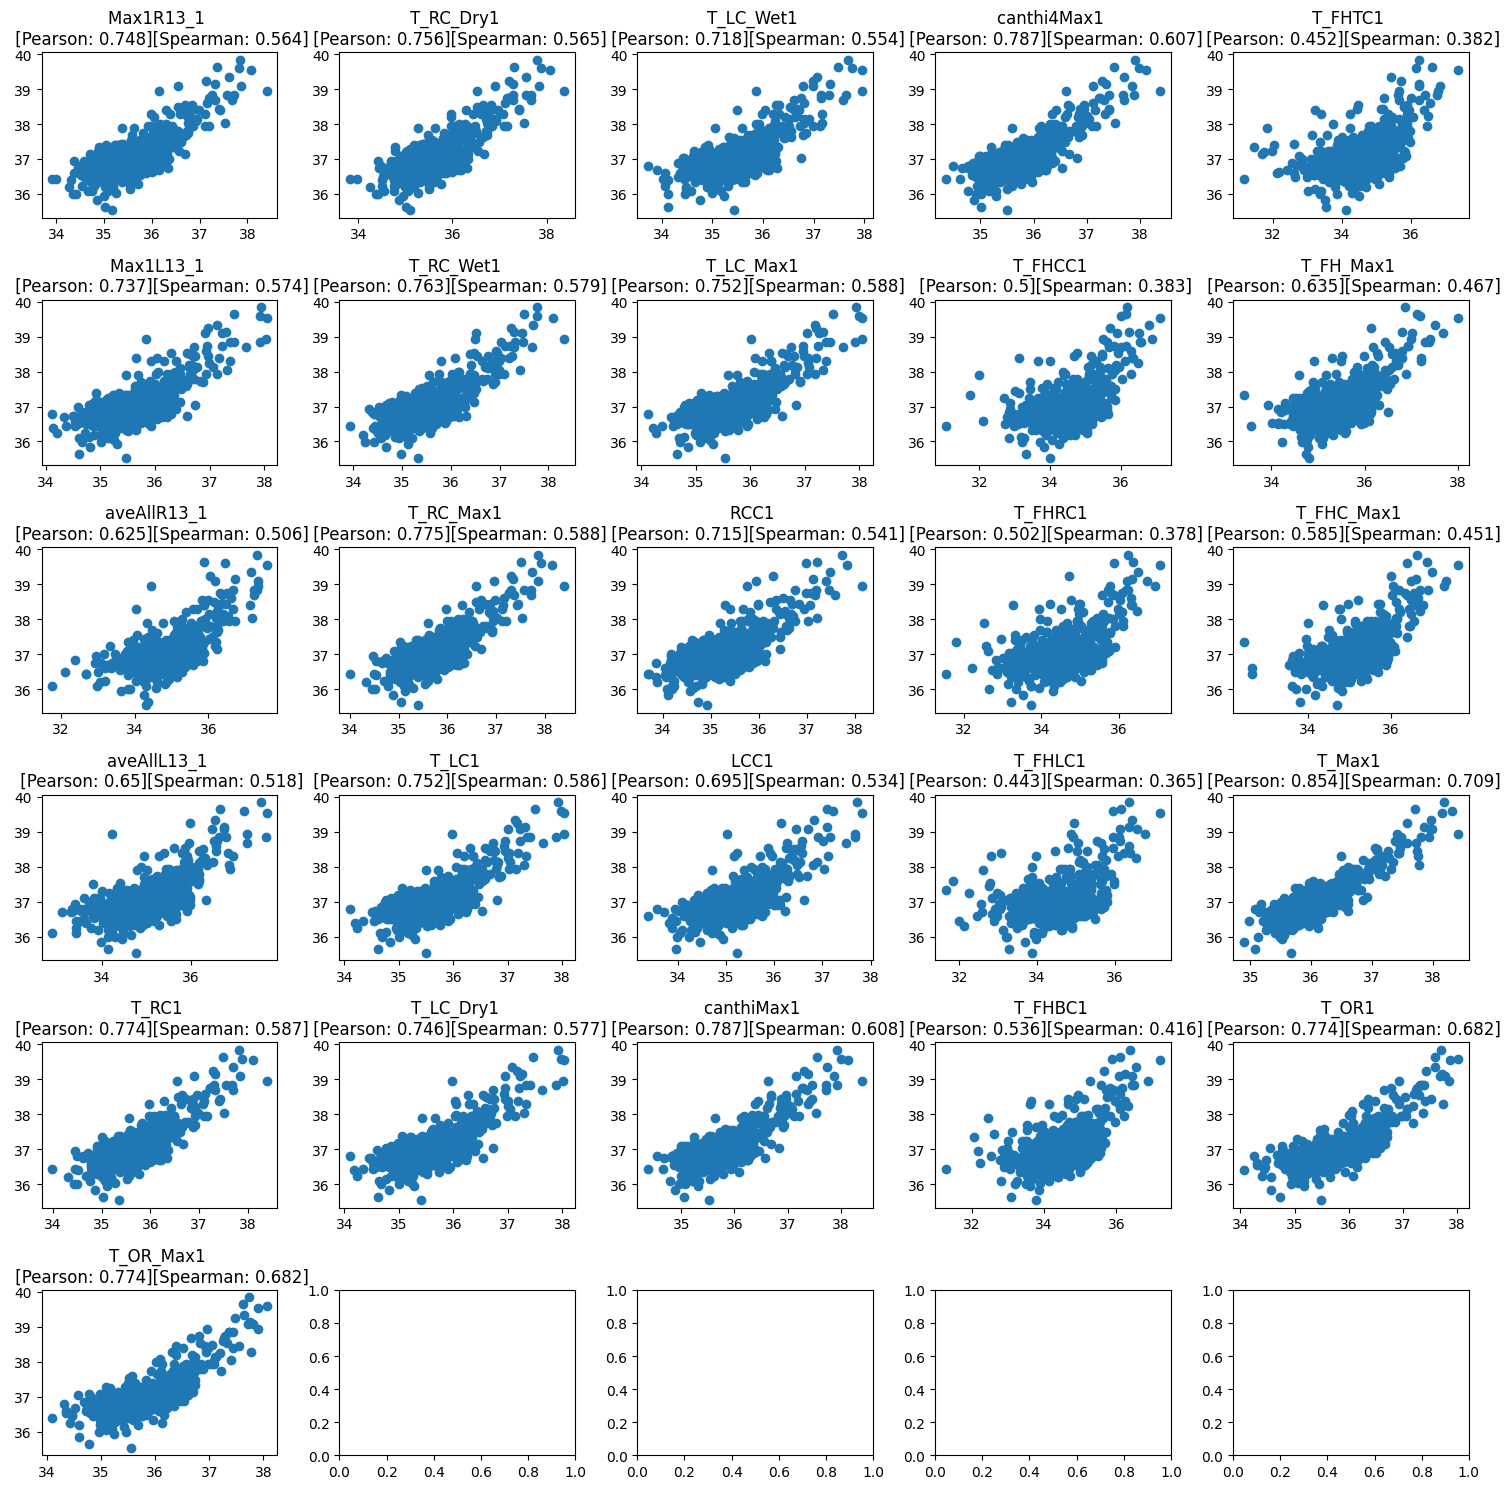

In [204]:
# Plots of Regions, Reference Temperatures and Predictions for aveOralM

fig, axs = plt.subplots(6, 5)
plt.rcParams["figure.figsize"] = (15,15)

for x in range(5):
    for y in range(5):
        axs[x][y].set_title(f'''{tempMeas.columns[5*y+x]} \n [Pearson: {round(tempMeas.iloc[:,5*y+x].corr(train_y["aveOralM"]),3)}][Spearman: {round(tempMeas.iloc[:,5*y+x].corr(train_y["aveOralM"], "spearman"),3)}]''');
        axs[x][y].scatter(tempMeas[tempMeas.columns[5*y+x]], train_y["aveOralM"]);
        
    
axs[5][0].set_title(f'''{tempMeas.columns[25]} \n [Pearson: {round(tempMeas.iloc[:,5*y+x].corr(train_y["aveOralM"]),3)}][Spearman: {round(tempMeas.iloc[:,25].corr(train_y["aveOralM"], "spearman"),3)}]''');
axs[5][0].scatter(tempMeas[tempMeas.columns[25]], train_y["aveOralM"]);
fig.tight_layout()
plt.show();

--- 

Below shows scatter plots of the different facial regions and their spearman and pearson ranks for aveOralF. Similarily to the above T_Max1 and CanthiMax1 shows a potentially linear relationship while T_OR1 and T_OR_Max1 a potentially non linear one.

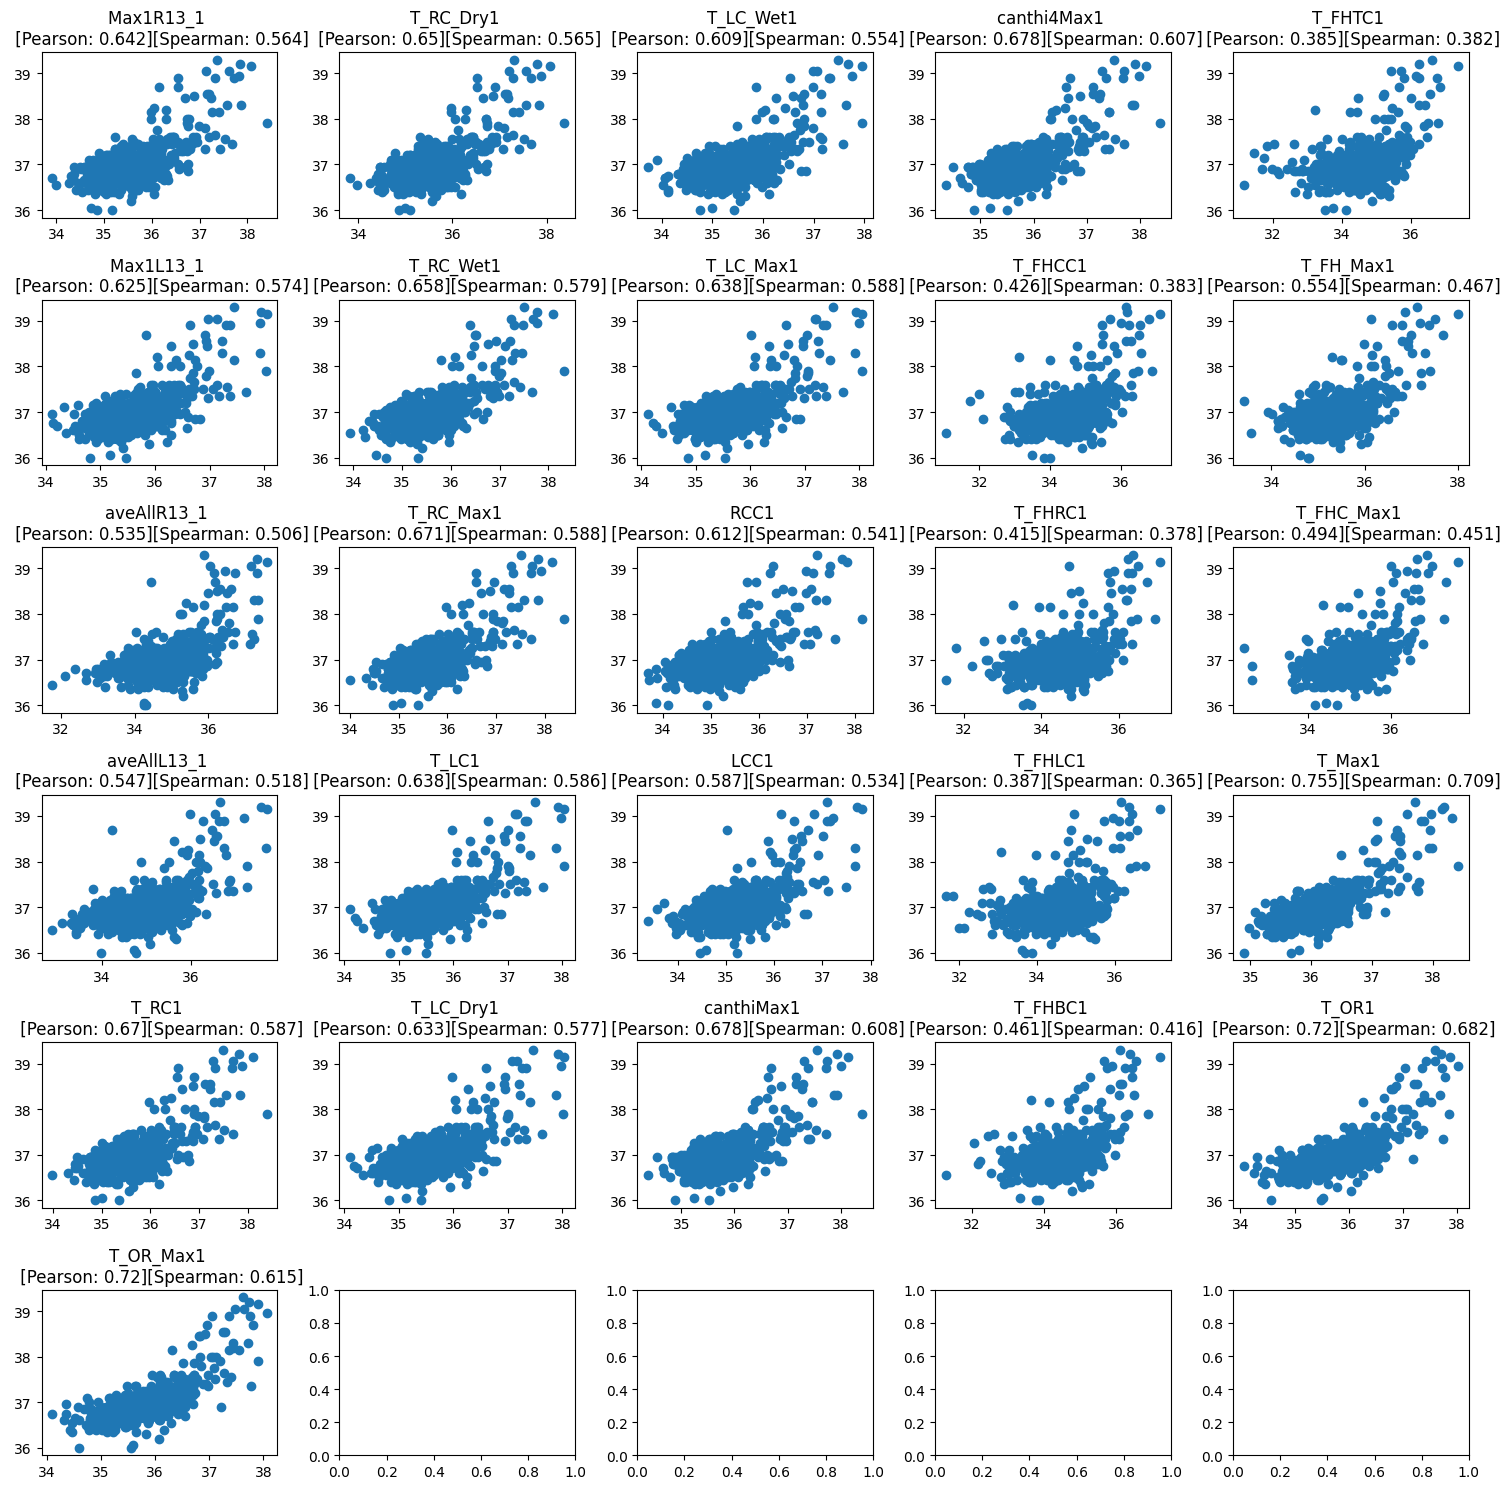

In [39]:
# Plots of Regions, Reference Temperatures and Predictions for aveOralF

# Plot in groups of measurement zones 
# add summary statistics about each

fig, axs = plt.subplots(6, 5)
plt.rcParams["figure.figsize"] = (15,15)

for x in range(5):
    for y in range(5):
        axs[x][y].set_title(f'''{tempMeas.columns[5*y+x]} \n [Pearson: {round(tempMeas.iloc[:,5*y+x].corr(train_y["aveOralF"]),3)}][Spearman: {round(tempMeas.iloc[:,5*y+x].corr(train_y["aveOralM"], "spearman"),3)}]''');
        axs[x][y].scatter(tempMeas[tempMeas.columns[5*y+x]], train_y["aveOralF"]);
        
    
axs[5][0].set_title(f'''{tempMeas.columns[25]} \n [Pearson: {round(tempMeas.iloc[:,5*y+x].corr(train_y["aveOralF"]),3)}][Spearman: {round(tempMeas.iloc[:,25].corr(train_y["aveOralF"], "spearman"),3)}]''');
axs[5][0].scatter(tempMeas[tempMeas.columns[25]], train_y["aveOralF"]);
fig.tight_layout()
plt.show();

#### 3.4.2 Multivariate Feature Exploration
--- 

In light of the previous analysis, multivariate feature exploration is important in determining the interaction of variable with eachother, additionally providing insights into predictive features and multicollinearity, as well as being important factor for the success of linear models.

##### A - Random Forest 
--- 

Train the random forrest regressors and classifiers to perform feature selection.

In [40]:
# Train Random Forrest Regressors

from sklearn.ensemble import RandomForestRegressor


forrest_params_reg = {
    "random_state":42,
    "n_estimators":500,
    "max_features": "log2",
    "min_samples_split": 5,
    "min_samples_leaf": 5,
    "max_depth":10,
    "n_jobs":-1
}

forest_reg_m = RandomForestRegressor(**forrest_params_reg)
forest_reg_m.fit(train_x_processed, train_y["aveOralM"]);

forest_reg_f = RandomForestRegressor(**forrest_params_reg)
forest_reg_f.fit(train_x_processed, train_y["aveOralF"]);

In [41]:
# Train Random Forrest Classifiers

from sklearn.ensemble import RandomForestClassifier

forrest_params_clf = {
    "random_state":42,
    "n_estimators":500,
    "max_features": "log2",
    "min_samples_split": 5,
    "min_samples_leaf": 5,
    "max_depth":10,
    "n_jobs":-1
}

forest_clf_m = RandomForestClassifier(**forrest_params_clf)
forest_clf_m.fit(train_x_processed, train_y["aveOralM_fever"]);

forest_clf_f = RandomForestClassifier(**forrest_params_clf)
forest_clf_f.fit(train_x_processed, train_y["aveOralF_fever"]);

Calculate premutation importance to check the effect of the feature on the random forrest model for both classification and regression tasks:

In [42]:
# calculate Importance for regression features

# https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

from sklearn.inspection import permutation_importance

importance_reg_m = permutation_importance(
    forest_reg_m, train_x_processed, train_y["aveOralM"], n_repeats=10, random_state=42, n_jobs=-1
)

importance_reg_f = permutation_importance(
    forest_reg_f, train_x_processed, train_y["aveOralF"], n_repeats=10, random_state=42, n_jobs=-1
)

In [43]:
# calculate Importance for classification features

importance_clf_m = permutation_importance(
    forest_clf_m, train_x_processed, train_y["aveOralM_fever"], n_repeats=10, random_state=42, n_jobs=-1
)

importance_clf_f = permutation_importance(
    forest_clf_f, train_x_processed, train_y["aveOralF_fever"], n_repeats=10, random_state=42, n_jobs=-1
)

--- 

In [44]:
top5Features = {};

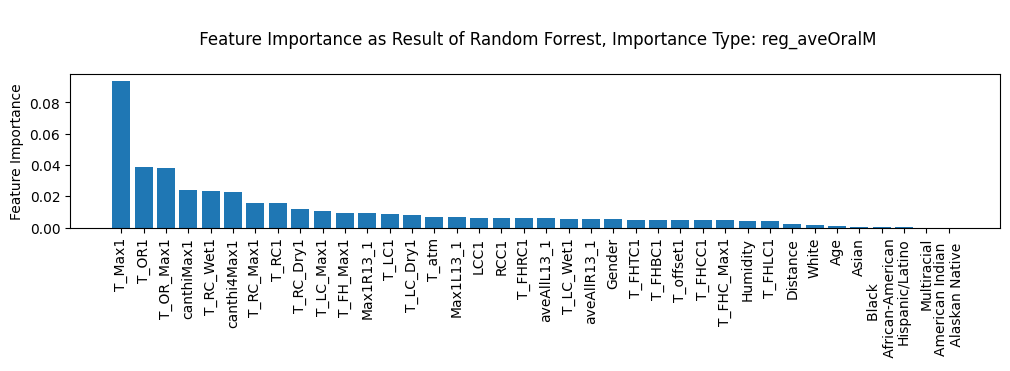

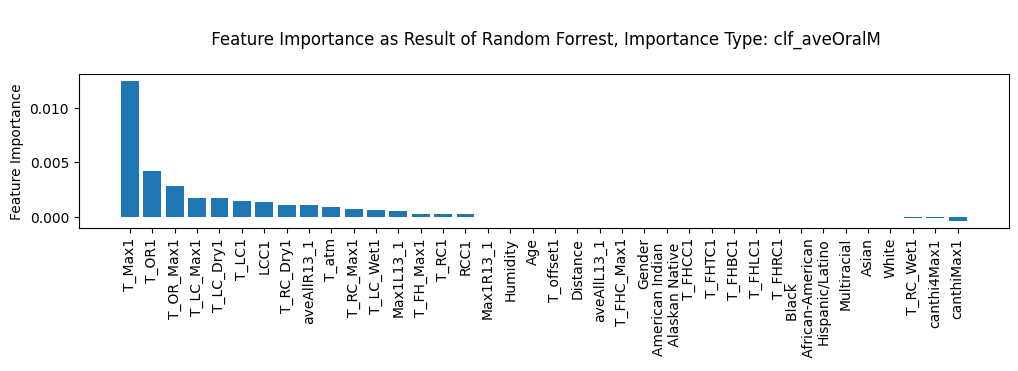

In [45]:
# display top Features found by random forest classifier

for result,importanceType in zip([importance_reg_m, importance_clf_m], ["reg_aveOralM","clf_aveOralM"]):

    forest_importances = pd.Series(result.importances_mean, index=multivariate_features.columns)
    forest_importances = forest_importances.sort_values(ascending=False)
    df_importances = pd.DataFrame(forest_importances, columns = ["Importance"])
    
    df_importances.index = pd.MultiIndex.from_product([['Feature'], df_importances.index])
    
    #display(pd.DataFrame(df_importances, columns = ["Importance"]).style.background_gradient(cmap='coolwarm', vmax= 0.029))


    f_labels = ["".join([f+"\n" for f in feature_label.split("or")][:-1]+[feature_label.split("or")[-1]]) 
                if ("or" in feature_label) 
                else feature_label 
                for feature_label in df_importances.index.get_level_values(1)]
    
    plt.figure(figsize=(12, 2))
    plt.bar(f_labels, df_importances["Importance"])

    plt.ylabel("Feature Importance");

    plt.title(f"\n Feature Importance as Result of Random Forrest, Importance Type: {importanceType}\n")
    plt.xticks(rotation=90)

    fig.tight_layout();
    plt.show();  



    top5Features[importanceType] =  [tpl[1] for tpl in df_importances.head().index]

  

--- 

For aveOralM T_Max1 was the most important feature for both regression and classification. For regression it is significantly more important than other features, suggesting it is able to capture a lot of the information found in the other features for the regression task. For the classification task T_Max1 is also most important but by smaller margin with T_OR1 having a difference of ~0.008. The top 5 features will be used in linear models to test if this manual feature selection can provide a predictive performance boost in comparison to a multi feature model without l1,l2 and elasticnet regularization. Additionally, the feature importance provides more evidence as seen in section 3.1 to the fact that T_Max1 is the most predictive feature in the dataset.

--- 

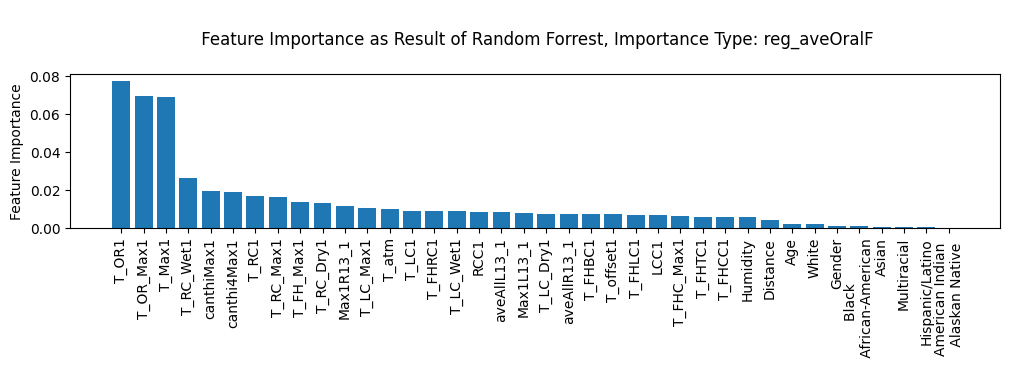

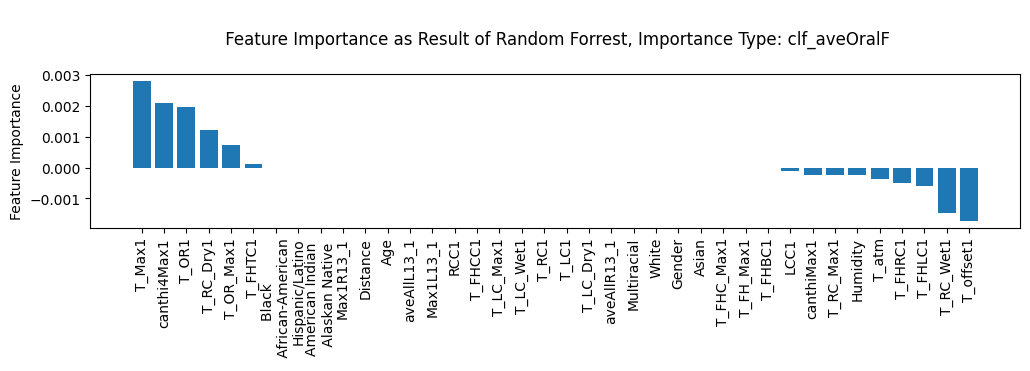

In [46]:
# display top Features found by random forest classifier

for result,importanceType in zip([importance_reg_f, importance_clf_f], ["reg_aveOralF", "clf_aveOralF"]):

    forest_importances = pd.Series(result.importances_mean, index=multivariate_features.columns)
    forest_importances = forest_importances.sort_values(ascending=False)
    df_importances = pd.DataFrame(forest_importances, columns = ["Importance"])
    
    df_importances.index = pd.MultiIndex.from_product([['Feature'], df_importances.index])
    
    #display(pd.DataFrame(df_importances, columns = ["Importance"]).style.background_gradient(cmap='coolwarm', vmax= 0.029))


    f_labels = ["".join([f+"\n" for f in feature_label.split("or")][:-1]+[feature_label.split("or")[-1]]) 
                if ("or" in feature_label) 
                else feature_label 
                for feature_label in df_importances.index.get_level_values(1)]
    
    plt.figure(figsize=(12, 2))
    plt.bar(f_labels, df_importances["Importance"])

    plt.ylabel("Feature Importance");

    plt.title(f"\n Feature Importance as Result of Random Forrest, Importance Type: {importanceType}\n")
    plt.xticks(rotation=90)

    fig.tight_layout();
    plt.show();  



    top5Features[importanceType] =  [tpl[1] for tpl in df_importances.head().index]

  

--- 

For aveOralF on the otherhand although T_Max1 remains strongly the best feature for regression, it has significantly smaller importance of ~0.07 incomparison to aveOralM's ~0.15 suggesting a potential difference in approach required for the models for aveOralF. T_OR1 and T_OR_Max1 are also important features as with the aveOralM results, but relatively more important. For classification T_Max1 is also the most important feature, with canthi4Max1 and T_OR1 being in the top important features. The canthiMax1 measurement has negative importance this could potentially be due to the fact that the canthi region and the T_Max1 measurement are collinear and both affect the aveOralF resulting in redundancy in the feature importance calculation. Other measurements such as the inclusion humidity and T_atm, T_offset1 may negatively impact the model performing worse than without them.

--- 

In conclusion multivariate feature exploration allowed to find features with potentially high predictive power, such as canthi4max1, T_Max1, T_OR_Max1, T_OR1 for both classification and regression of aveOralM and aveOralF. The top 5 most important features will be used as part of models such as polynomial regression to see the effect of recombining predicitive features.

## 4. Model Development
--- 

One important point to consider is that the data of the temperatures is biased. Looking at the kernel density function estimates shows that there is a large proportion of data within the $36-38\text{°C}$ range for the target variables aveOralF and aveOralM with less above $>37.5\text{°C}$. This is important to consider as the larger concentration of data might skew the fit of the model, whereas our model needs to be accurate at classifying specifically the $>37.5\text{°C}$ zone. Something that needs to be considered in the model evaluation.


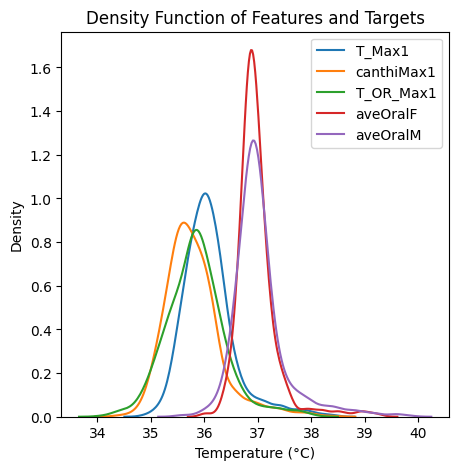

In [47]:
# Plotting Kernel Density Functions of Choosen Features and Targets

# https://jakevdp.github.io/PythonDataScienceHandbook/05.13-kernel-density-estimation.html
temp_values = pd.concat([train_x[topFeatures_m], train_y.iloc[:,0:-2]], axis = 1) 

plt.rcParams["figure.figsize"] = (5,5)

for column in temp_values.columns:
    sns.kdeplot(temp_values[column])

plt.title("Density Function of Features and Targets")
plt.xlabel("Temperature (°C)");
plt.legend(temp_values.columns)

testFig = BytesIO();
plt.savefig(testFig, format='PNG', bbox_inches='tight');
plt.close();
display(HTML(f"<center><img src='data:image/png;base64,{base64.b64encode(testFig.getvalue()).decode()}'></center>"))

### 4.1 Predicting aveOralM and aveOralF
--- 

#### 4.1.1 Baseline Definition
--- 

As a simple benchmark to test the performance of the predicatability of our model, a baseline that always predicts the mean of the target feature can be used. Another baseline for single feature prediction would be to directly predict the input temperature as the output temperature. These two models would have the following performance:

</br>

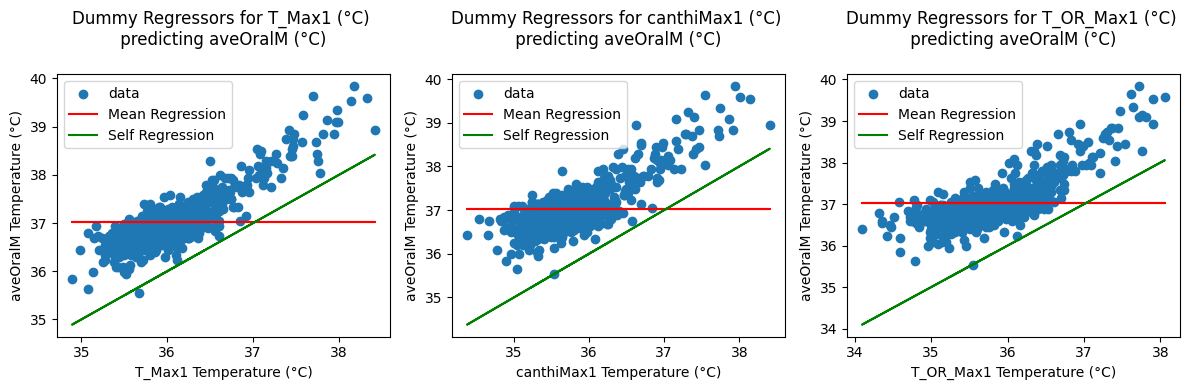

</br>

---

</br>

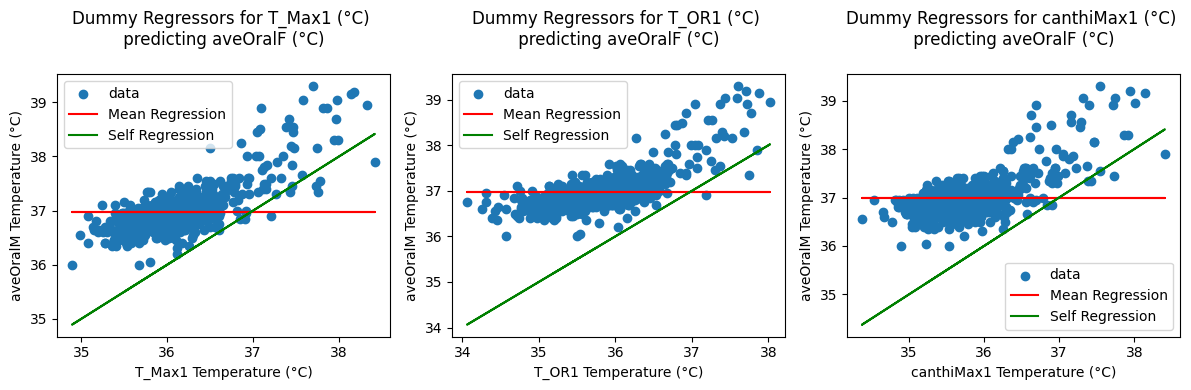

</br>

---

In [48]:
# Create and Plot Dummy Regressor
from sklearn.dummy import DummyRegressor

fig, axs = plt.subplots(1, 3, figsize=(12, 4))
statsDataFrame = pd.DataFrame();

for i,feature in enumerate(topFeatures_m):

    regDummy = DummyRegressor();
    linDummy = LinearRegression();
    
    regDummy.fit(train_x[feature].to_numpy().reshape(-1,1), train_y["aveOralM"]);
    linDummy.fit(train_x[feature].to_numpy().reshape(-1,1), train_x[feature]);
    
    lin_mse_mean = MSE(regDummy.predict(train_x[feature].to_numpy().reshape(-1,1)), train_y["aveOralM"])
    lin_r2_mean = np.sqrt(lin_mse_mean)

    lin_mse_reg = MSE(linDummy.predict(train_x[feature].to_numpy().reshape(-1,1)), train_y["aveOralM"])
    lin_r2_reg= sk.metrics.r2_score(linDummy.predict(train_x[feature].to_numpy().reshape(-1,1)), train_y["aveOralM"])

    # plot dummy regressor models
    
    axs[i].scatter(train_x[feature].to_numpy(), train_y["aveOralM"].to_numpy());
    axs[i].plot(train_x[feature].to_numpy(), regDummy.predict(train_x[feature].to_numpy().reshape(-1,1)), c="red");
    axs[i].plot(train_x[feature].to_numpy(), linDummy.predict(train_x[feature].to_numpy().reshape(-1,1)), c="green");
    axs[i].set_xlabel(f'{feature} Temperature (°C)');
    axs[i].set_ylabel("aveOralM Temperature (°C)");
    axs[i].set_title(f'Dummy Regressors for {feature} (°C) \n predicting aveOralM (°C) \n');
    axs[i].legend(["data", "Mean Regression", "Self Regression"]);
    
    # evaluate on training data
    mean_stats = pd.DataFrame([lin_mse_mean,lin_r2_mean]).transpose().set_axis(["MSE", "R2"], axis = 1)
    lin_stats = pd.DataFrame([lin_mse_reg,lin_r2_reg]).transpose().set_axis(["MSE", "R2"], axis = 1)
    
    # create summary statistics dataframe
    
    stats_data = pd.concat([mean_stats,lin_stats]).set_axis(["Mean Regression","Self Regression"],axis=0);
    stats_data.columns = pd.MultiIndex.from_product([[feature], stats_data.columns]);
    statsDataFrame = pd.concat([statsDataFrame, stats_data], axis = 1);
    
  

display(Markdown("</br>"))      
fig.tight_layout()
plt.show()

display(HTML(f"<div style='display:flex; justify-content:center'>{statsDataFrame.to_html()}</div>"))

statsDataFrame = pd.DataFrame();

fig, axs = plt.subplots(1, 3, figsize=(12, 4))

display(Markdown("</br>"))
display(Markdown("---"))
display(Markdown("</br>"))

for i,feature in enumerate(topFeatures_f):

    regDummy = DummyRegressor();
    linDummy = LinearRegression();
    
    regDummy.fit(train_x[feature].to_numpy().reshape(-1,1), train_y["aveOralF"]);
    linDummy.fit(train_x[feature].to_numpy().reshape(-1,1), train_x[feature]);
    
    lin_mse_mean = MSE(regDummy.predict(train_x[feature].to_numpy().reshape(-1,1)), train_y["aveOralF"])
    lin_r2_mean = np.sqrt(lin_mse_mean)

    lin_mse_reg = MSE(linDummy.predict(train_x[feature].to_numpy().reshape(-1,1)), train_y["aveOralF"])
    lin_r2_reg= sk.metrics.r2_score(linDummy.predict(train_x[feature].to_numpy().reshape(-1,1)), train_y["aveOralF"])

    # plot dummy regressor models
    
    axs[i].scatter(train_x[feature].to_numpy(), train_y["aveOralF"].to_numpy());
    axs[i].plot(train_x[feature].to_numpy(), regDummy.predict(train_x[feature].to_numpy().reshape(-1,1)), c="red");
    axs[i].plot(train_x[feature].to_numpy(), linDummy.predict(train_x[feature].to_numpy().reshape(-1,1)), c="green");
    axs[i].set_xlabel(f'{feature} Temperature (°C)');
    axs[i].set_ylabel("aveOralM Temperature (°C)");
    axs[i].set_title(f'Dummy Regressors for {feature} (°C) \n predicting aveOralF (°C) \n');
    axs[i].legend(["data", "Mean Regression", "Self Regression"]);
    
    # evaluate on training data
    mean_stats = pd.DataFrame([lin_mse_mean,lin_r2_mean]).transpose().set_axis(["MSE", "R2"], axis = 1)
    lin_stats = pd.DataFrame([lin_mse_reg,lin_r2_reg]).transpose().set_axis(["MSE", "R2"], axis = 1)
    
    # create summary statistics dataframe
    
    stats_data = pd.concat([mean_stats,lin_stats]).set_axis(["Mean Regression","Self Regression"],axis=0);
    stats_data.columns = pd.MultiIndex.from_product([[feature], stats_data.columns]);
    statsDataFrame = pd.concat([statsDataFrame, stats_data], axis = 1);
    
  
       
fig.tight_layout()
plt.show()

display(Markdown("</br>"))
display(HTML(f"<div style='display:flex; justify-content:center'>{statsDataFrame.to_html()}</div>"))

display(Markdown("---"))

The mean baseline performed much better than the self predicting regression for both aveOralM and aveOralF, as self regression gave rise to negative R2 values, signifying that predicting the temperature directly from a measured zone is inappropriate. However, from the graph it is possible to see that the models can perform better if a bias was added to the self regression, giving the model a linear fit, something that will be explored in the next section as part of simple linear models. As expected both models have poor R2 scores and relatively high MSE which needs to beaten by the developed models to show predictive power.

#### 4.1.2 Model Selection
--- 

Models will be selected to be evaluated on the test set based on their performance on the train set as well as their interpretability and complexity trade-off.  All the model metrics will computed with 5-fold cross validation in order to minimize the effect of overfitting by assessing the performance on the validation set. 

In [49]:
# Dictionary Holding Best Regression Models
best_models_reg_m =  collections.defaultdict(lambda : collections.defaultdict(dict));
best_models_reg_f =  collections.defaultdict(lambda : collections.defaultdict(dict));

##### A - Univariate Linear Model

---

In order of complexity, the simplest model for the prediction of the temperature would be to used the top features found during univariate exploration with the highest pearson and spearman correlation in order to investigate their predictive power. The following variables T_Max1, canthiMax1, and T_OR_Max1 where choosen for aveOralM and T_Max1, T_OR1 and canthiMax1 for aveOralF based on their measurement of different regions and distinct cluster groups as seen in section 3.4.1. 

--- 
 <br/>


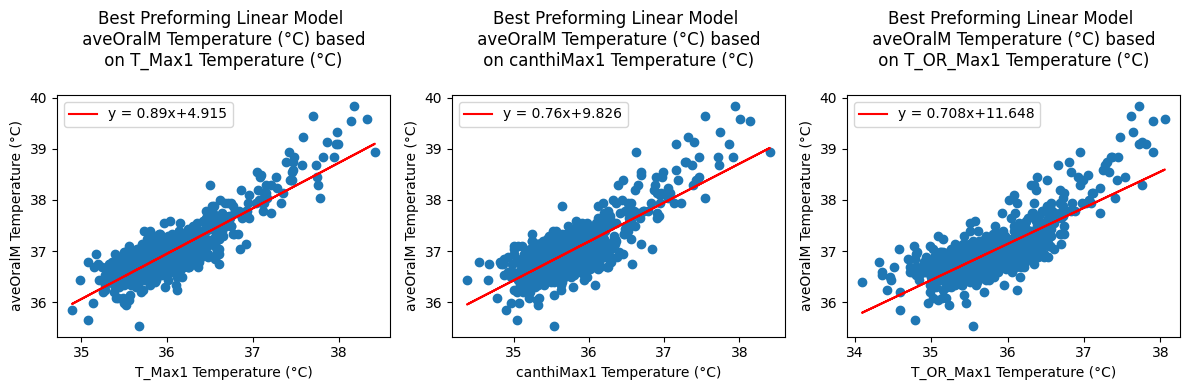

<br/>

--- 
 <br/>


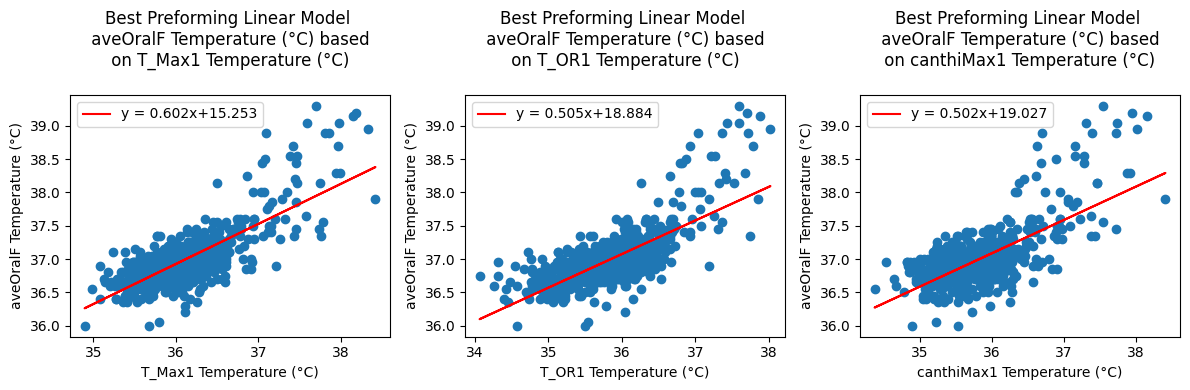

<br/>

--- 
 <br/>

In [50]:
# simple linreg models with 5-Fold Validation

statTables = [];
linearModels_m = {}
latexDisplay = "";

fig, axs = plt.subplots(1, 3, figsize=(12, 4))

for i,feature in enumerate(topFeatures_m):
  
    feature_train = train_x[feature].to_numpy().reshape(-1,1);
       
    axs[i].scatter(train_x[feature], train_y["aveOralM"]);
    
    modelTypes = [LinearRegression()]

    statsList = [];
    
    for model in modelTypes:

        reg = sk.base.clone(model)

        reg_mse = -cross_val_score(reg, 
                          train_x[feature].to_numpy().reshape(-1,1), 
                          train_y["aveOralM"], 
                          cv = 5, 
                          scoring='neg_mean_squared_error',
                          n_jobs = -1
                          ).mean()

        reg_r2 = cross_val_score(reg, 
                      train_x[feature].to_numpy().reshape(-1,1), 
                      train_y["aveOralM"], 
                      cv = 5, 
                      scoring='r2',
                      n_jobs = -1
                      ).mean()
        
     
        reg.fit(feature_train, train_y["aveOralM"].to_numpy());
   
        aveOralM_pred_train = reg.predict(feature_train);
            
        model_stats = pd.DataFrame([reg_mse,reg_r2, round(reg.coef_[0],3), round(reg.intercept_,3)]).transpose().set_axis(["MSE","R2","Coeff", "Intercept"],axis=1).set_axis([type(model).__name__],axis=0)
        statsList.append(model_stats)

        statTable = pd.concat(statsList)
        statTable.columns = pd.MultiIndex.from_product([[feature], statTable.columns])
        statTable.index = pd.MultiIndex.from_product([['Model Type'], statTable.index])

        linearModels_m[type(model).__name__+feature] = reg;
        
    statTables.append(statTable);


    
    # plot the best model
    
    axs[i].plot(feature_train, aveOralM_pred_train, c="red", label = f'''y = {round(reg.coef_[0],3)}x+{round(reg.intercept_,3)}''');
    axs[i].set_title(f"Best Preforming Linear Model \n aveOralM Temperature (°C) based \n on {feature} Temperature (°C) \n")
    axs[i].set_xlabel(f'{feature} Temperature (°C)');
    axs[i].set_ylabel("aveOralM Temperature (°C)");
    axs[i].legend();

display(Markdown("--- \n <br/>"));
fig.tight_layout()

testFig = BytesIO();
plt.savefig(testFig, format='PNG', bbox_inches='tight');
plt.close();
display(HTML(f"<center><img src='data:image/png;base64,{base64.b64encode(testFig.getvalue()).decode()}'></center>"))

#display(Latex(latexDisplay))
    #plt.legend(["Data"]+[type(model).__name__ for model in modelTypes]);
    #plt.show();
#display(Markdown("--- \n <br/>"));

tableHTML = pd.concat(statTables, axis = 1);
display(HTML(f"<div style='display:flex; justify-content: center'>{tableHTML.to_html()}</div>"))
display(Markdown("<br/>"));

# --------------------------------------------------------------------------------------------------
                                                # aveOralF
# --------------------------------------------------------------------------------------------------

# simple linreg models with 5-Fold Validation

statTables = [];
linearModels_f = {}
latexDisplay = "";

fig, axs = plt.subplots(1, 3, figsize=(12, 4))

for i,feature in enumerate(topFeatures_f):


    
    feature_train = train_x[feature].to_numpy().reshape(-1,1);
       
    axs[i].scatter(train_x[feature], train_y["aveOralF"]);
    
    modelTypes = [LinearRegression()]

    statsList = [];
    
    for model in modelTypes:

        reg = sk.base.clone(model)

        reg_mse = -cross_val_score(reg, 
                          train_x[feature].to_numpy().reshape(-1,1), 
                          train_y["aveOralF"], 
                          cv = 5, 
                          scoring='neg_mean_squared_error',
                          n_jobs = -1
                          ).mean()

        reg_r2 = cross_val_score(reg, 
                      train_x[feature].to_numpy().reshape(-1,1), 
                      train_y["aveOralF"], 
                      cv = 5, 
                      scoring='r2',
                      n_jobs = -1
                      ).mean()
        
     
        reg.fit(feature_train, train_y["aveOralF"].to_numpy());
   
        aveOralM_pred_train = reg.predict(feature_train);
            
        model_stats = pd.DataFrame([reg_mse,reg_r2, round(reg.coef_[0],3), round(reg.intercept_,3)]).transpose().set_axis(["MSE","R2","Coeff", "Intercept"],axis=1).set_axis([type(model).__name__],axis=0)
        statsList.append(model_stats)

        statTable = pd.concat(statsList)
        statTable.columns = pd.MultiIndex.from_product([[feature], statTable.columns])
        statTable.index = pd.MultiIndex.from_product([['Model Type'], statTable.index])

        linearModels_f[type(model).__name__+feature] = reg;
        
    statTables.append(statTable);


    
    # plot the best model
    
    axs[i].plot(feature_train, aveOralM_pred_train, c="red", label = f'''y = {round(reg.coef_[0],3)}x+{round(reg.intercept_,3)}''');
    axs[i].set_title(f"Best Preforming Linear Model \n aveOralF Temperature (°C) based \n on {feature} Temperature (°C) \n")
    axs[i].set_xlabel(f'{feature} Temperature (°C)');
    axs[i].set_ylabel("aveOralF Temperature (°C)");
    axs[i].legend();

display(Markdown("--- \n <br/>"));
fig.tight_layout()

testFig = BytesIO();
plt.savefig(testFig, format='PNG', bbox_inches='tight');
plt.close();
display(HTML(f"<center><img src='data:image/png;base64,{base64.b64encode(testFig.getvalue()).decode()}'></center>"))

#display(Latex(latexDisplay))
    #plt.legend(["Data"]+[type(model).__name__ for model in modelTypes]);
    #plt.show();
#display(Markdown("--- \n <br/>"));

tableHTML = pd.concat(statTables, axis = 1);
display(HTML(f"<div style='display:flex; justify-content: center'>{tableHTML.to_html()}</div>"))
display(Markdown("<br/>"));

display(Markdown("--- \n <br/>"));



As it can be seen in the table above the best performing model was T_Max1 with an MSE of 0.071 while the worst was T_OR_Max1 with MSE 0.106, for aveOralM this was to be expected as T_Max1 showed highest predictability during the univariate and multivariate feature exploration. Similarily for aveOralF the T_Max1 was the most predictive with a MSE of 0.066 and canthiMax1 was the worst with an MSE of 0.083. Therefore the T_Max1 models where selected to be further evaluated on the test set.

In [51]:
# add best models for testing

best_models_reg_m["Single"]["T_Max1"]["Linear_Regression_T_Max1"] = linearModels_m["LinearRegressionT_Max1"]
best_models_reg_f["Single"]["T_Max1"]["Linear_Regression_T_Max1"] = linearModels_f["LinearRegressionT_Max1"]

##### B - Multiple Feature Linear Model

--- 

Next a multivariate linear model is created using the features found in the dataset such as the temperatures, ethnicity data, gender and age as found in both the multivariate feature selection as well as all the features. First a model is created using the top features found during multivariate feature exploration in order to create a model with most predictive features and minimize multi colliniearity, leading to more stable coefficients for both aveOralM and aveOralF. The models are also regularized using Lasso, Ridge and ElasticNet with a grid search wrapper in order to find the best parameters for the l1_ratio and regularization strength.


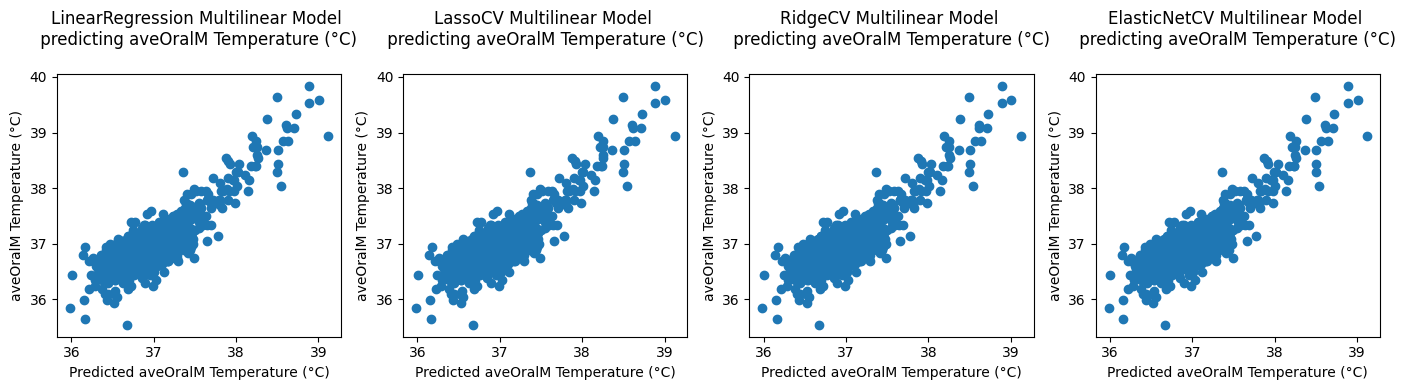

--- 
 <br/>

<br/>

--- 
 <br/>


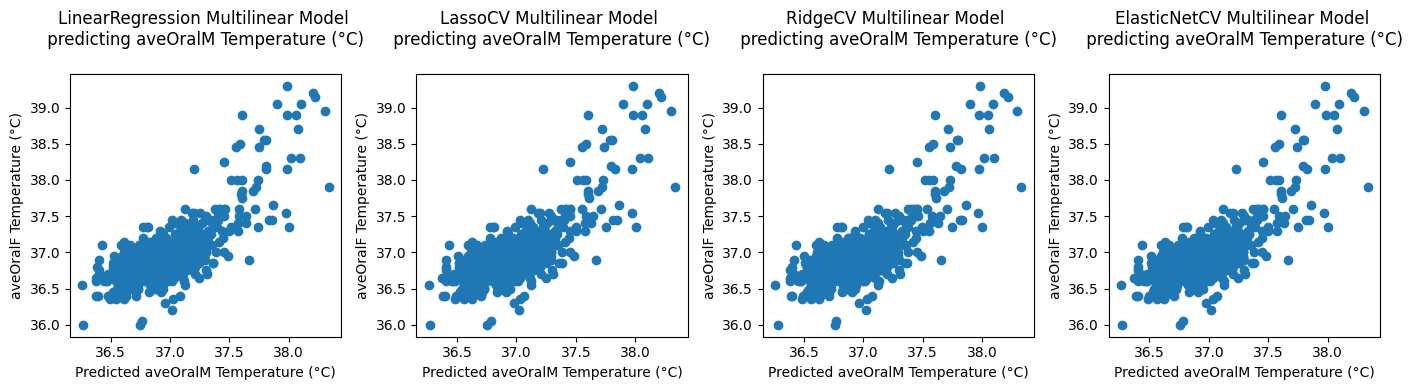

--- 
 <br/>

<br/>

--- 
 <br/>

In [52]:
# multi-linreg with Regularization and best hyperparameter search, 5-Fold Cross Validation, random forest feature selection

mainOutList = [];
statTables = [];
linearModelsMulti_top_m = {}
statsList = [];

fig, axs = plt.subplots(1, 4, figsize=(14, 4))

modelTypes = [LinearRegression(), LassoCV(), RidgeCV(), ElasticNetCV()]

regularization_params_top5_m = pd.DataFrame();

for i,model in enumerate(modelTypes):

    reg = model

    reg_mse = -cross_val_score(reg, 
                  train_x_processed[top5Features["reg_aveOralM"]], # [top5Features["reg_aveOralM"]] 
                  train_y["aveOralM"], 
                  cv = 5, 
                  scoring='neg_mean_squared_error',
                  n_jobs = -1
                  ).mean()

    reg_r2 = cross_val_score(reg, 
                  train_x_processed[top5Features["reg_aveOralM"]], 
                  train_y["aveOralM"], 
                  cv = 5, 
                  scoring='r2',
                  n_jobs = -1
                  ).mean()


    
    reg.fit(train_x_processed[top5Features["reg_aveOralM"]], train_y["aveOralM"].to_numpy()); #[top5Features["reg_aveOralM"]]


    if type(model).__name__ != "LinearRegression":
        params_top5_m = pd.DataFrame({
                        "Alpha": [reg.alpha_],
                         "L1_Ratio": [reg.l1_ratio_ if type(model).__name__ == "ElasticNetCV" else "-"]
                     }, index = [type(model).__name__])
    
        
        regularization_params_top5_m = pd.concat([regularization_params_top5_m, params_top5_m])
                                        
        
    aveOralM_pred_train = reg.predict(train_x_processed[top5Features["reg_aveOralM"]]); #[top5Features["reg_aveOralM"]]

    model_stats = pd.DataFrame();
    #reg_mse = MSE(aveOralM_pred_train, train_y["aveOralM"])
    #reg_rmse = np.sqrt(reg_mse)
    #reg_r2 = sk.metrics.r2_score(train_y["aveOralM"], aveOralM_pred_train)

    model_stats = pd.DataFrame([reg_mse,reg_r2]).transpose().set_axis(["MSE","R2"],axis=1)
    model_weights = pd.DataFrame(reg.coef_, index = top5Features["reg_aveOralM"], columns = ["Weight"]).sort_values(by="Weight", ascending = False).transpose().reset_index(drop = True)
    # top5Features["reg_aveOralM"]
    model_stats = pd.concat([model_stats, model_weights], axis = 1);
    
    model_stats = model_stats.set_axis([type(model).__name__],axis=0)
    statsList.append(model_stats)

    statTable = pd.concat(statsList)
    statTable.index = pd.MultiIndex.from_product([['Model Type'], statTable.index])

    linearModelsMulti_top_m[type(model).__name__] = reg;
    
    axs[i].scatter(aveOralM_pred_train, train_y["aveOralM"]);
    axs[i].set_title(f"{type(model).__name__} Multilinear Model \n predicting aveOralM Temperature (°C) \n")
    axs[i].set_xlabel(f'Predicted aveOralM Temperature (°C)');
    axs[i].set_ylabel("aveOralM Temperature (°C)");
    
fig.tight_layout();

testFig = BytesIO();
plt.savefig(testFig, format='PNG', bbox_inches='tight');
plt.close();
display(HTML(f"<center><img src='data:image/png;base64,{base64.b64encode(testFig.getvalue()).decode()}'></center>"))

display(Markdown("--- \n <br/>"));
statTables.append(statTable);
displayTable = pd.concat(statTables, axis = 1);
display(HTML(f'''
            <div style = 'display:flex; flex-direction:row'>
                <div style = 'margin: 20px'>{displayTable.to_html()}</div>
                <div style = 'margin: 20px'>{regularization_params_top5_m.to_html()}</div>
            </div>
            ''')) 
display(Markdown("<br/>"));


display(Markdown("--- \n <br/>"));
# --------------------------------------------------------------------------------------------------
                                                # aveOralF
# --------------------------------------------------------------------------------------------------


# multi-linreg with Regularization and best hyperparameter search, 5-Fold Cross Validation, random forrest feature selection

mainOutList = [];
statTables = [];
linearModelsMulti_top_f = {}
statsList = [];

fig, axs = plt.subplots(1, 4, figsize=(14, 4))

modelTypes = [LinearRegression(), LassoCV(), RidgeCV(), ElasticNetCV()]
regularization_params_top5_f = pd.DataFrame();

for i,model in enumerate(modelTypes):

    reg = model

    reg_mse = -cross_val_score(reg, 
                  train_x_processed[top5Features["reg_aveOralF"]], # [top5Features["reg_aveOralM"]] 
                  train_y["aveOralF"], 
                  cv = 5, 
                  scoring='neg_mean_squared_error',
                  n_jobs = -1
                  ).mean()

    reg_r2 = cross_val_score(reg, 
                  train_x_processed[top5Features["reg_aveOralF"]], 
                  train_y["aveOralF"], 
                  cv = 5, 
                  scoring='r2',
                  n_jobs = -1
                  ).mean()


    
    reg.fit(train_x_processed[top5Features["reg_aveOralF"]], train_y["aveOralF"].to_numpy()); #[top5Features["reg_aveOralM"]]

    if type(model).__name__ != "LinearRegression":
        params_top5_f = pd.DataFrame({
                        "Alpha": [reg.alpha_],
                         "L1_Ratio": [reg.l1_ratio_ if type(model).__name__ == "ElasticNetCV" else "-"]
                     }, index = [type(model).__name__])
    
        
        regularization_params_top5_f = pd.concat([regularization_params_top5_f, params_top5_f])
        

    
    aveOralM_pred_train = reg.predict(train_x_processed[top5Features["reg_aveOralF"]]); #[top5Features["reg_aveOralM"]]

    model_stats = pd.DataFrame();
    #reg_mse = MSE(aveOralM_pred_train, train_y["aveOralM"])
    #reg_rmse = np.sqrt(reg_mse)
    #reg_r2 = sk.metrics.r2_score(train_y["aveOralM"], aveOralM_pred_train)

    model_stats = pd.DataFrame([reg_mse,reg_r2]).transpose().set_axis(["MSE","R2"],axis=1)
    model_weights = pd.DataFrame(reg.coef_, index = top5Features["reg_aveOralF"], columns = ["Weight"]).sort_values(by="Weight", ascending = False).transpose().reset_index(drop = True)
    # top5Features["reg_aveOralM"]
    model_stats = pd.concat([model_stats, model_weights], axis = 1);
    
    model_stats = model_stats.set_axis([type(model).__name__],axis=0)
    statsList.append(model_stats)

    statTable = pd.concat(statsList)
    statTable.index = pd.MultiIndex.from_product([['Model Type'], statTable.index])

    linearModelsMulti_top_f[type(model).__name__] = reg;
    
    axs[i].scatter(aveOralM_pred_train, train_y["aveOralF"]);
    axs[i].set_title(f"{type(model).__name__} Multilinear Model \n predicting aveOralM Temperature (°C) \n")
    axs[i].set_xlabel(f'Predicted aveOralM Temperature (°C)');
    axs[i].set_ylabel("aveOralF Temperature (°C)");
    
fig.tight_layout();

testFig = BytesIO();
plt.savefig(testFig, format='PNG', bbox_inches='tight');
plt.close();
display(HTML(f"<center><img src='data:image/png;base64,{base64.b64encode(testFig.getvalue()).decode()}'></center>"))

display(Markdown("--- \n <br/>"));
statTables.append(statTable);
displayTable = pd.concat(statTables, axis = 1);
display(HTML(f'''
            <div style = 'display:flex; flex-direction:row'>
                <div style = 'margin: 20px'>{displayTable.to_html()}</div>
                <div style = 'margin: 20px'>{regularization_params_top5_f.to_html()}</div>
            </div>
            ''')) 
display(Markdown("<br/>"));

display(Markdown("--- \n <br/>"));

From the table above for aveOralM it can be seen that the linear regression and ridge found simillar coefficients for the linear models. However there is a degree of multicollinearity present in the variables from the feature exploration with T_OR1 and T_OR_Max1 as they are related measurements in the mouth area, as well as T_RC_Wet1 and canthiMax1 in the canthi area. This resulted in coefficients that are unstable, which is to a degree mitigated by the Lasso and ElasticNet models where the T_OR_Max1 coefficient is reduced to 0, leading to a more stable model.

For aveOralF the coefficients for T_Max1 where similar across models but since T_OR_Max1 and T_OR1 as well as T_RC_Wet1 and canthiMax1 were in the same area it caused some instability in the coefficients of the ridge and linear regression models. 

However since there are only 5 features, the models $\text{R}^2$ output was relatively stable with and without regularization for both aveOralF and aveOralM.

---

Next all the features where investigated as part of a linear model using different types of regularization techniques including Lasso, Ridge and ElasticNet to ensure weight sparsity and shrinking coefficients to zero to perform feature selection.


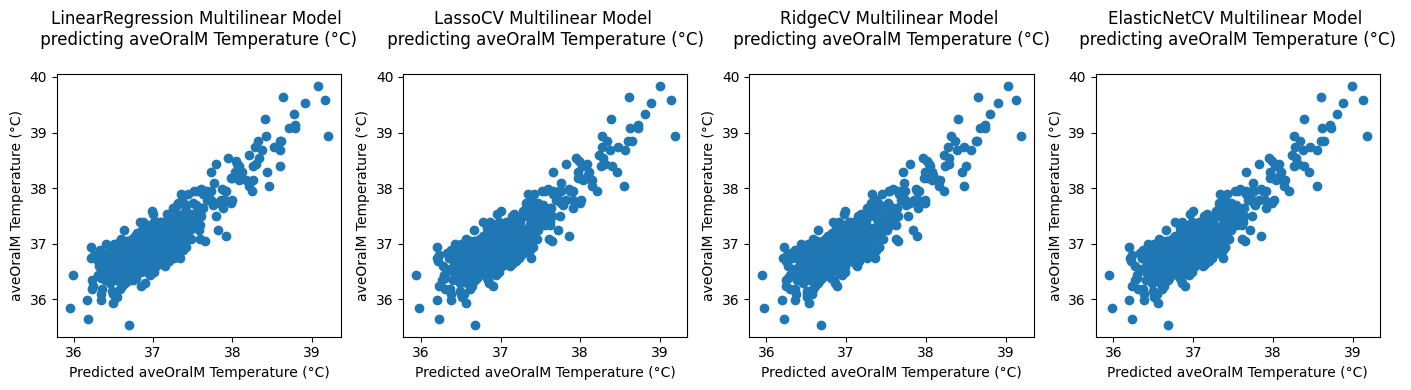

--- 
 <br/>

<br/>

--- 
 <br/>


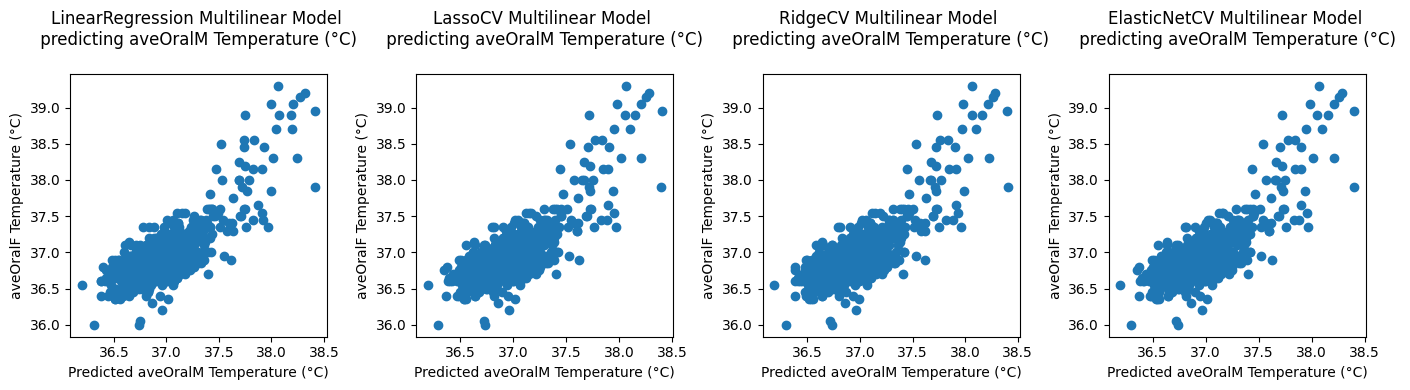

--- 
 <br/>

<br/>

In [53]:
# multivariate linreg models with regularization with best hyperparameter search and 5-Fold Cross Validation for all features 

mainOutList = [];
statTables = [];
linearModelsMulti_all_m = {}
statsList = [];

fig, axs = plt.subplots(1, 4, figsize=(14, 4))

modelTypes = [LinearRegression(n_jobs=-1), LassoCV(tol = 0.01, n_jobs=-1, random_state=42), RidgeCV(), ElasticNetCV(tol = 0.01, n_jobs=-1, random_state=42)]
regularization_params_all_m = pd.DataFrame();

for i,model in enumerate(modelTypes):

    reg = model

    reg_mse = -cross_val_score(reg, 
                  train_x_processed, # [top5Features["reg_aveOralM"]] 
                  train_y["aveOralM"], 
                  cv = 5, 
                  scoring='neg_mean_squared_error',
                  n_jobs = -1
                  ).mean()

    reg_r2 = cross_val_score(reg, 
                  train_x_processed, # [top5Features["reg_aveOralM"]] 
                  train_y["aveOralM"], 
                  cv = 5, 
                  scoring='r2',
                  n_jobs = -1
                  ).mean()


    
    reg.fit(train_x_processed, train_y["aveOralM"].to_numpy()); #[top5Features["reg_aveOralM"]]

    if type(model).__name__ != "LinearRegression":
        params_all_m = pd.DataFrame({
                        "Alpha": [reg.alpha_],
                         "L1_Ratio": [reg.l1_ratio_ if type(model).__name__ == "ElasticNetCV" else "-"]
                     }, index = [type(model).__name__])
    
        
        regularization_params_all_m = pd.concat([regularization_params_all_m, params_all_m])
                                        
    
    aveOralM_pred_train = reg.predict(train_x_processed); #[top5Features["reg_aveOralM"]]

    model_stats = pd.DataFrame();
    
    #reg_mse = MSE(aveOralM_pred_train, train_y["aveOralM"])
    #reg_rmse = np.sqrt(reg_mse)
    #reg_r2 = sk.metrics.r2_score(train_y["aveOralM"], aveOralM_pred_train)

    model_stats = pd.DataFrame([reg_mse,reg_r2]).transpose().set_axis(["MSE","R2"],axis=1)
    model_weights = pd.DataFrame(reg.coef_, index = train_x_processed.columns, columns = ["Weight"]).sort_values(by="Weight", ascending = False).transpose().reset_index(drop = True)
    # top5Features["reg_aveOralM"]
    model_stats = pd.concat([model_stats, model_weights], axis = 1);
    
    model_stats = model_stats.set_axis([type(model).__name__],axis=0)
    statsList.append(model_stats)

    statTable = pd.concat(statsList)
    statTable.index = pd.MultiIndex.from_product([['Model Type'], statTable.index])

    linearModelsMulti_all_m[type(model).__name__] = reg;
    
    axs[i].scatter(aveOralM_pred_train, train_y["aveOralM"]);
    axs[i].set_title(f"{type(model).__name__} Multilinear Model \n predicting aveOralM Temperature (°C) \n")
    axs[i].set_xlabel(f'Predicted aveOralM Temperature (°C)');
    axs[i].set_ylabel("aveOralM Temperature (°C)");
    
fig.tight_layout();

testFig = BytesIO();
plt.savefig(testFig, format='PNG', bbox_inches='tight');
plt.close();
display(HTML(f"<center><img src='data:image/png;base64,{base64.b64encode(testFig.getvalue()).decode()}'></center>"))

display(Markdown("--- \n <br/>"));
statTables.append(statTable);
displayTable = pd.concat(statTables, axis = 1);
display(HTML(f"<div style = 'justify-content:center'>{displayTable.to_html()}</div>")) 
display(HTML(f"<div style = 'display:flex; justify-content:center'>{regularization_params_all_m.to_html()}</div>")) 
display(Markdown("<br/>"));

display(Markdown("--- \n <br/>"));

# --------------------------------------------------------------------------------------------------
                                                # aveOralF
# --------------------------------------------------------------------------------------------------

# multivariate linreg models with regularization with best hyperparameter search and 5-Fold Cross Validation for all features 

mainOutList = [];
statTables = [];
linearModelsMulti_all_f = {}
statsList = [];

fig, axs = plt.subplots(1, 4, figsize=(14, 4))

modelTypes = [LinearRegression(n_jobs=-1), LassoCV(tol = 0.01, n_jobs=-1, random_state=42), RidgeCV(), ElasticNetCV(tol = 0.01, n_jobs=-1, random_state=42)]
regularization_params_all_f = pd.DataFrame();

for i,model in enumerate(modelTypes):

    reg = model

    reg_mse = -cross_val_score(reg, 
                  train_x_processed, # [top5Features["reg_aveOralM"]] 
                  train_y["aveOralF"], 
                  cv = 5, 
                  scoring='neg_mean_squared_error',
                  n_jobs = -1
                  ).mean()

    reg_r2 = cross_val_score(reg, 
                  train_x_processed, # [top5Features["reg_aveOralM"]] 
                  train_y["aveOralF"], 
                  cv = 5, 
                  scoring='r2',
                  n_jobs = -1
                  ).mean()


    
    reg.fit(train_x_processed, train_y["aveOralF"].to_numpy()); #[top5Features["reg_aveOralM"]]

    if type(model).__name__ != "LinearRegression":
        params_all_f = pd.DataFrame({
                        "Alpha": [reg.alpha_],
                         "L1_Ratio": [reg.l1_ratio_ if type(model).__name__ == "ElasticNetCV" else "-"]
                     }, index = [type(model).__name__])
    
        
        regularization_params_all_f = pd.concat([regularization_params_all_f, params_all_f])
                                        
    
    
    aveOralM_pred_train = reg.predict(train_x_processed); #[top5Features["reg_aveOralM"]]

    model_stats = pd.DataFrame();
    
    #reg_mse = MSE(aveOralM_pred_train, train_y["aveOralM"])
    #reg_rmse = np.sqrt(reg_mse)
    #reg_r2 = sk.metrics.r2_score(train_y["aveOralM"], aveOralM_pred_train)

    model_stats = pd.DataFrame([reg_mse,reg_r2]).transpose().set_axis(["MSE","R2"],axis=1)
    model_weights = pd.DataFrame(reg.coef_, index = train_x_processed.columns, columns = ["Weight"]).sort_values(by="Weight", ascending = False).transpose().reset_index(drop = True)
    # top5Features["reg_aveOralM"]
    model_stats = pd.concat([model_stats, model_weights], axis = 1);
    
    model_stats = model_stats.set_axis([type(model).__name__],axis=0)
    statsList.append(model_stats)

    statTable = pd.concat(statsList)
    statTable.index = pd.MultiIndex.from_product([['Model Type'], statTable.index])

    linearModelsMulti_all_f[type(model).__name__] = reg;
    
    axs[i].scatter(aveOralM_pred_train, train_y["aveOralF"]);
    axs[i].set_title(f"{type(model).__name__} Multilinear Model \n predicting aveOralM Temperature (°C) \n")
    axs[i].set_xlabel(f'Predicted aveOralM Temperature (°C)');
    axs[i].set_ylabel("aveOralF Temperature (°C)");
    
fig.tight_layout();

testFig = BytesIO();
plt.savefig(testFig, format='PNG', bbox_inches='tight');
plt.close();
display(HTML(f"<center><img src='data:image/png;base64,{base64.b64encode(testFig.getvalue()).decode()}'></center>"))

display(Markdown("--- \n <br/>"));
statTables.append(statTable);
displayTable = pd.concat(statTables, axis = 1);
display(HTML(f"<div style = 'justify-content:center'>{displayTable.to_html()}</div>"))
display(HTML(f"<div style = 'display:flex; justify-content:center'>{regularization_params_all_f.to_html()}</div>")) 
display(Markdown("<br/>"));

--- 

Using all the variables leads to a more complicated model, and likely more unstable coefficients. This an be seen in the diversity in the coefficients especially for temperatures by the linear regression model for both aveOralM and aveOralF. Comparitivily the Lasso, Ridge and ElasticNet perform better with the added features but in turn may be overfitting on the training data, which will become more evident if it has occured on the testing set.

From the multi feature models the best performing model was the ElasticNetCV Model for aveOralM and LassoCV model for aveOralF which will be evaluated on the test set.

In [54]:
# add best model for testing 

best_models_reg_m["Multi"]["All"]["Linear_Regression_ElasticNetCV_all"] = linearModelsMulti_all_m["ElasticNetCV"]
best_models_reg_f["Multi"]["All"]["Linear_Regression_LassoCV_all"] = linearModelsMulti_all_f["LassoCV"]

--- 

##### C - Single Feature Polynomial Model

--- 

As certain features such as T_OR_Max1 and T_OR1 had high spearman ranks in comparison to their pearson correlation, it might signify a non-linear relationship between the variable and the target. Therefore polynomial, models will be investigated. 

Lasso, Ridge and ElasticNet were used with the polynomial features in order to ensure weight sparsity via Lasso and ElasticNet. Parameters where found using the cross validation wrapper for each regularization methodology.

In [55]:
# Develop Polynomial Model (Add Regularization) with 5-Fold Cross Validation

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# do with degrees 1-5

modelTypes = [LinearRegression(), LassoCV(tol = 0.1, max_iter=10000), RidgeCV(), ElasticNetCV(tol=0.1, max_iter=10000, l1_ratio=[0.1, 0.5, 0.9])]  
poly_reg_models_types_m = {};
poly_reg_models_types_stats_m = {}

for model in modelTypes:
    poly_reg_feature_models = {};
    poly_reg_models_stats = collections.defaultdict(lambda : collections.defaultdict(dict)) ;
    for feature in topFeatures_m:
        poly_reg_models = {};
        for degree in np.arange(1,6): 
           
            poly_features = sk.base.clone(PolynomialFeatures(degree=degree, include_bias=False))
            std_scaler = StandardScaler()
            lin_reg = sk.base.clone(model);
            polynomial_regression = sk.base.clone(Pipeline([
                    ("poly_features", poly_features),
                    ("std_scaler", std_scaler),
                    ("lin_reg", lin_reg),
                ]))
    
            reg_mse = -cross_val_score(polynomial_regression, 
                              train_x[feature].to_numpy().reshape(-1,1), 
                              train_y["aveOralM"], 
                              cv = 5, 
                              scoring='neg_mean_squared_error',
                              n_jobs = -1
                              ).mean();
    
            reg_r2 = cross_val_score(polynomial_regression, 
                          train_x[feature].to_numpy().reshape(-1,1), 
                          train_y["aveOralM"], 
                          cv = 5, 
                          scoring='r2',
                          n_jobs = -1
                          ).mean()
    
            poly_reg_models_stats[feature][degree]["MSE"] = reg_mse;
            poly_reg_models_stats[feature][degree]["R2"] = reg_r2;

            poly_reg_models[degree] = polynomial_regression.fit(train_x[feature].to_numpy().reshape(-1,1), train_y["aveOralM"])
            
        poly_reg_feature_models[feature] = poly_reg_models;
    poly_reg_models_types_m[type(model).__name__] = poly_reg_feature_models
    poly_reg_models_types_stats_m[type(model).__name__] = poly_reg_models_stats;

# --------------------------------------------------------------------------------------------------
                                                # aveOralF
# --------------------------------------------------------------------------------------------------


# do with degrees 1-5

modelTypes = [LinearRegression(), LassoCV(tol = 0.1, max_iter=10000), RidgeCV(), ElasticNetCV(tol=0.1, max_iter=10000)] #, LassoCV(tol=0.1, max_iter=500), 
poly_reg_models_types_f = {};
poly_reg_models_types_stats_f = {}

for model in modelTypes:
    poly_reg_feature_models = {};
    poly_reg_models_stats = collections.defaultdict(lambda : collections.defaultdict(dict)) ;
    for feature in topFeatures_f:
        poly_reg_models = {};
        for degree in np.arange(1,6): 
           
            poly_features = sk.base.clone(PolynomialFeatures(degree=degree, include_bias=False))
            std_scaler = StandardScaler()
            lin_reg = sk.base.clone(model);
            polynomial_regression = sk.base.clone(Pipeline([
                    ("poly_features", poly_features),
                    ("std_scaler", std_scaler),
                    ("lin_reg", lin_reg),
                ]))
    
    
            kfold = sk.model_selection.KFold(n_splits=5);
    

            reg_mse = -cross_val_score(polynomial_regression, 
                              train_x[feature].to_numpy().reshape(-1,1), 
                              train_y["aveOralF"], 
                              cv = 5, 
                              scoring='neg_mean_squared_error',
                              n_jobs = -1
                              ).mean()
    
            reg_r2 = cross_val_score(polynomial_regression, 
                          train_x[feature].to_numpy().reshape(-1,1), 
                          train_y["aveOralF"], 
                          cv = 5, 
                          scoring='r2',
                          n_jobs = -1
                          ).mean()
    
            poly_reg_models_stats[feature][degree]["MSE"] = reg_mse;
            poly_reg_models_stats[feature][degree]["R2"] = reg_r2;

            poly_reg_models[degree] = polynomial_regression.fit(train_x[feature].to_numpy().reshape(-1,1), train_y["aveOralF"])
            
        poly_reg_feature_models[feature] = poly_reg_models;
    poly_reg_models_types_f[type(model).__name__] = poly_reg_feature_models
    poly_reg_models_types_stats_f[type(model).__name__] = poly_reg_models_stats;
   

--- 
 <br>


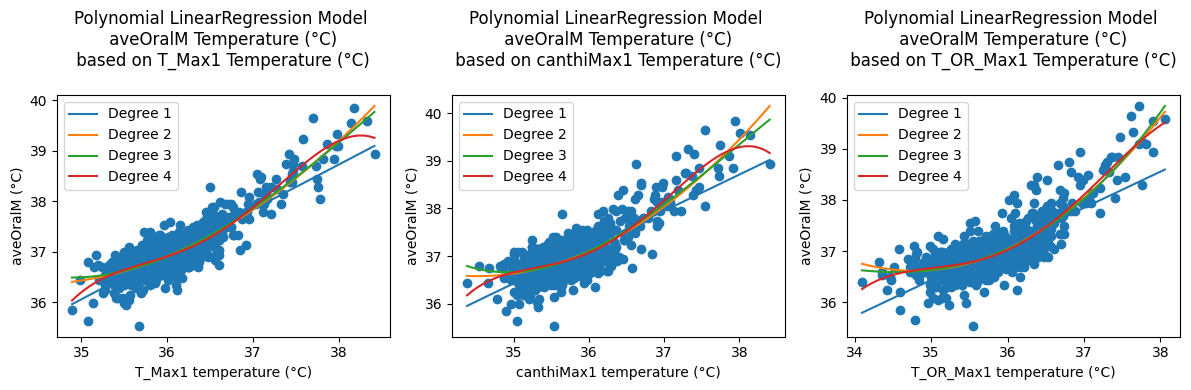

--- 
 <br>

---

--- 
 <br>


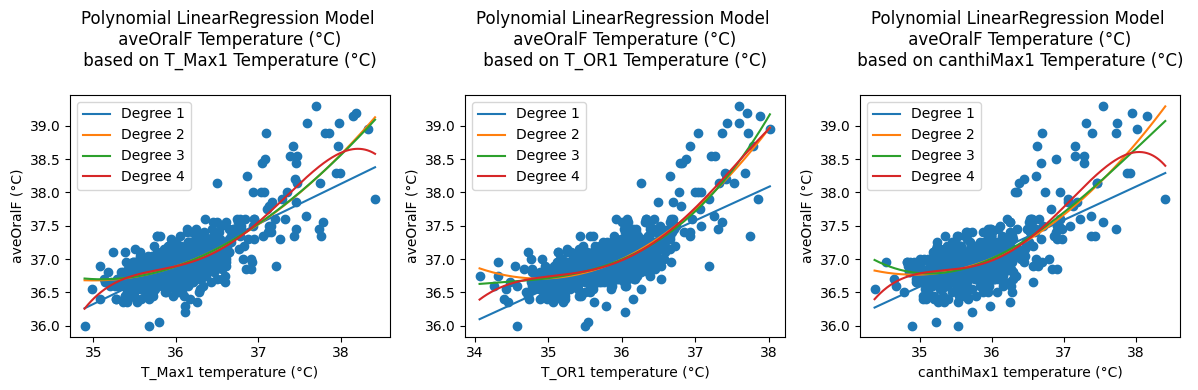

--- 
 <br>

---

In [56]:
# Plot Polynomial Model Training Results LinearRegression

#modelTypes = [LinearRegression(), LassoCV(tol = 0.1, max_iter=5000), RidgeCV(), ElasticNetCV(tol=0.1, max_iter=5000)];

#for model in modelTypes:

model = LinearRegression();

poly_reg_feature_models = poly_reg_models_types_m[type(model).__name__];
poly_reg_models_stats = poly_reg_models_types_stats_m[type(model).__name__];
statTable= pd.DataFrame()
statsList = [];
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

for i,feature in enumerate(topFeatures_m):

    axs[i].scatter(train_x[feature], train_y["aveOralM"])
    modelStats = {};

    featureDataFrame = pd.DataFrame();
    
    for degree in np.arange(1,6): 

       lobf_x = np.arange(train_x[feature].min(), train_x[feature].max(), 0.01).reshape(-1,1)

       if degree < 5:
           axs[i].plot(lobf_x, poly_reg_feature_models[feature][degree].predict(lobf_x), label = f"Degree {degree}");
           axs[i].legend()

       aveOralM_pred_train = poly_reg_feature_models[feature][degree].predict(train_x[feature].to_numpy().reshape(-1,1))


       modelStats["MSE"] = poly_reg_models_stats[feature][degree]["MSE"]; #MSE(aveOralM_pred_train, train_y["aveOralM"])
       #modelStats["RMSE"] = np.sqrt(modelStats["MSE"])
       modelStats["R2"] = poly_reg_models_stats[feature][degree]["R2"];
        
        #sk.metrics.r2_score(train_y["aveOralM"], aveOralM_pred_train);

       #print(f"Feature {feature}, Degree {degree}, MSE {reg_mse}, RMSE {reg_rmse}")
       featureDataFrame = pd.concat([featureDataFrame,pd.DataFrame([modelStats]).set_axis([degree],axis=0)])
    
    featureDataFrame.columns = pd.MultiIndex.from_product([[feature], featureDataFrame.columns])
    featureDataFrame.index = pd.MultiIndex.from_product([['Polynomial Degree'], featureDataFrame.index])

    statsList.append(featureDataFrame)
    
    axs[i].set_title(f"Polynomial {type(model).__name__} Model \n aveOralM Temperature (°C) \n based on {feature} Temperature (°C) \n")
    axs[i].set_ylabel("aveOralM (°C)")
    axs[i].set_xlabel(f"{feature} temperature (°C)")

statTable = pd.concat(statsList, axis = 1)

#statTable.columns = pd.MultiIndex.from_product([[feature], ["MSE","RMSE","Coeff", "Intercept"]])

fig.tight_layout(); 
display(Markdown("--- \n <br>"))

testFig = BytesIO();
plt.savefig(testFig, format='PNG', bbox_inches='tight');
plt.close();
display(HTML(f"<center><img src='data:image/png;base64,{base64.b64encode(testFig.getvalue()).decode()}'></center>"))

display(Markdown("--- \n <br>"))
display(HTML(f"<div style='display:flex; justify-content:center'>{statTable.to_html()}</div>"));
display(Markdown("---"))

# --------------------------------------------------------------------------------------------------
                                                # aveOralF
# --------------------------------------------------------------------------------------------------


# Plot Polynomial Model Training Results LinearRegression

#modelTypes = [LinearRegression(), LassoCV(tol = 0.1, max_iter=5000), RidgeCV(), ElasticNetCV(tol=0.1, max_iter=5000)];

#for model in modelTypes:

model = LinearRegression();

poly_reg_feature_models = poly_reg_models_types_f[type(model).__name__];
poly_reg_models_stats = poly_reg_models_types_stats_f[type(model).__name__];
statTable= pd.DataFrame()
statsList = [];
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

for i,feature in enumerate(topFeatures_f):

    axs[i].scatter(train_x[feature], train_y["aveOralF"])
    modelStats = {};

    featureDataFrame = pd.DataFrame();
    
    for degree in np.arange(1,6): 

       lobf_x = np.arange(train_x[feature].min(), train_x[feature].max(), 0.01).reshape(-1,1)

       if degree < 5:
           axs[i].plot(lobf_x, poly_reg_feature_models[feature][degree].predict(lobf_x), label = f"Degree {degree}");
           axs[i].legend()

       aveOralM_pred_train = poly_reg_feature_models[feature][degree].predict(train_x[feature].to_numpy().reshape(-1,1))


       modelStats["MSE"] = poly_reg_models_stats[feature][degree]["MSE"]; #MSE(aveOralM_pred_train, train_y["aveOralM"])
       #modelStats["RMSE"] = np.sqrt(modelStats["MSE"])
       modelStats["R2"] = poly_reg_models_stats[feature][degree]["R2"];
        
        #sk.metrics.r2_score(train_y["aveOralM"], aveOralM_pred_train);

       #print(f"Feature {feature}, Degree {degree}, MSE {reg_mse}, RMSE {reg_rmse}")
       featureDataFrame = pd.concat([featureDataFrame,pd.DataFrame([modelStats]).set_axis([degree],axis=0)])
    
    featureDataFrame.columns = pd.MultiIndex.from_product([[feature], featureDataFrame.columns])
    featureDataFrame.index = pd.MultiIndex.from_product([['Polynomial Degree'], featureDataFrame.index])

    statsList.append(featureDataFrame)
    
    axs[i].set_title(f"Polynomial {type(model).__name__} Model \n aveOralF Temperature (°C) \n based on {feature} Temperature (°C) \n")
    axs[i].set_ylabel("aveOralF (°C)")
    axs[i].set_xlabel(f"{feature} temperature (°C)")

statTable = pd.concat(statsList, axis = 1)

#statTable.columns = pd.MultiIndex.from_product([[feature], ["MSE","RMSE","Coeff", "Intercept"]])

fig.tight_layout(); 
display(Markdown("--- \n <br>"))

testFig = BytesIO();
plt.savefig(testFig, format='PNG', bbox_inches='tight');
plt.close();
display(HTML(f"<center><img src='data:image/png;base64,{base64.b64encode(testFig.getvalue()).decode()}'></center>"))

display(Markdown("--- \n <br>"))
display(HTML(f"<div style='display:flex; justify-content:center'>{statTable.to_html()}</div>"));
display(Markdown("---"))

For aveOralM polynomial models perform consistently better than their linear counterparts across T_Max1, canthiMax1 and T_OR_Max1 as seen between the MSE values for degree 1 and degree 2. The models also perform better than the multivariate linear models as T_Max1, $\text{R}^2$ measures ~0.746 vs ~0.734 for the ElasticNet Model. T_OR_Max1 has the greatest difference in MSE ~0.028 signifying a likely better representation through polynomial terms. Models tend to decrease in MSE with polynomial degree, however are likely overfitting the training data as seen in the graphs above for example for canthiMax1 the curve for degree 4 extrapolates to suggest that as temperature in the canthi area increases above 38 degrees, aveOralM will decrease.

For aveOralF the result is similar as polynomial models perform consistently better than their linear counterparts, as seen in the table above. Overfitting is likely occuring at higher degree polynomials as seen in the graphs above as the model suggest decreasing aveOralF temperatures above 38 degrees. The best multilinear model for aveOralF has an $\text{R}^2$ value of ~0.573 while the degree 2, T_Max1 Model ~0.603. 

--- 
 <br>


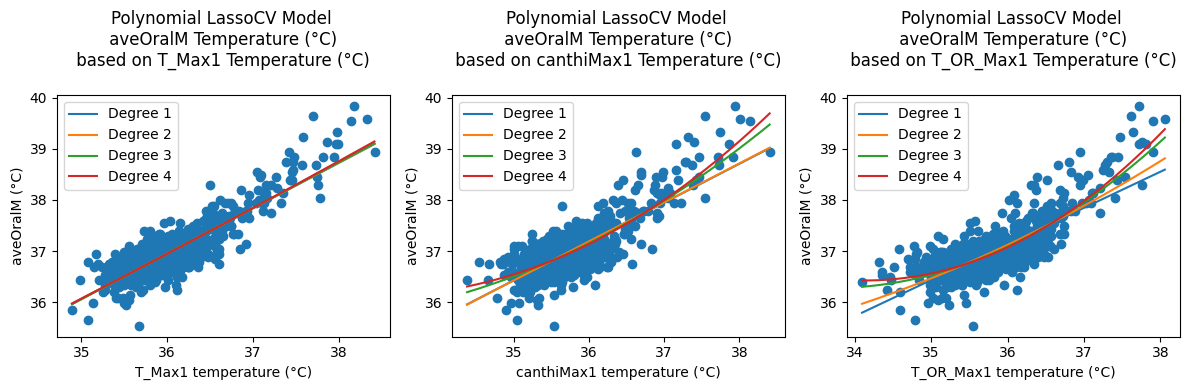

--- 
 <br>

---

--- 
 <br>


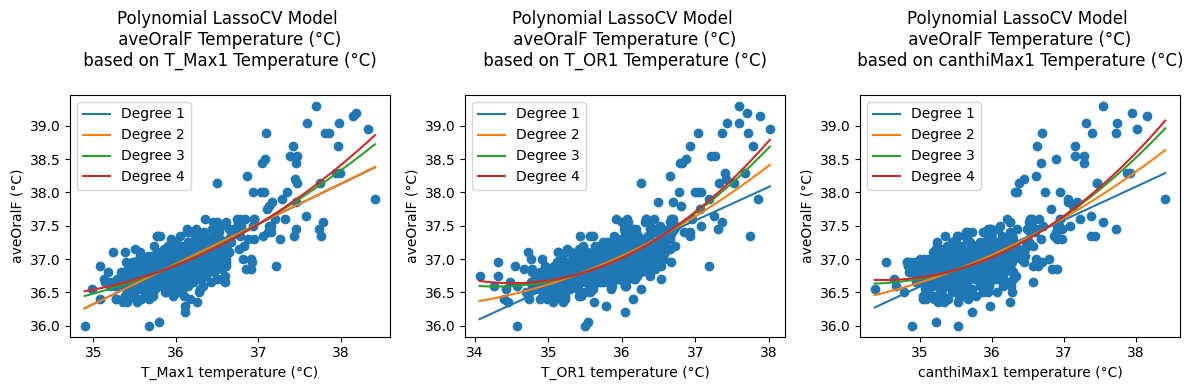

--- 
 <br>

---

In [57]:
# Plot Polynomial Model Training Results LassoCV

#modelTypes = [LinearRegression(), LassoCV(tol = 0.1, max_iter=5000), RidgeCV(), ElasticNetCV(tol=0.1, max_iter=5000)];

#for model in modelTypes:

model = LassoCV();

poly_reg_feature_models = poly_reg_models_types_m[type(model).__name__];
poly_reg_models_stats = poly_reg_models_types_stats_m[type(model).__name__];
statTable= pd.DataFrame()
statsList = [];
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

for i,feature in enumerate(topFeatures_m):

    axs[i].scatter(train_x[feature], train_y["aveOralM"])
    modelStats = {};

    featureDataFrame = pd.DataFrame();
    
    for degree in np.arange(1,6): 

       lobf_x = np.arange(train_x[feature].min(), train_x[feature].max(), 0.01).reshape(-1,1)

       if degree < 5:
           axs[i].plot(lobf_x, poly_reg_feature_models[feature][degree].predict(lobf_x), label = f"Degree {degree}");
           axs[i].legend()

       aveOralM_pred_train = poly_reg_feature_models[feature][degree].predict(train_x[feature].to_numpy().reshape(-1,1))


       modelStats["MSE"] = poly_reg_models_stats[feature][degree]["MSE"]; #MSE(aveOralM_pred_train, train_y["aveOralM"])
       #modelStats["RMSE"] = np.sqrt(modelStats["MSE"])
       modelStats["R2"] = poly_reg_models_stats[feature][degree]["R2"];
       modelStats["Alpha"] = poly_reg_feature_models[feature][degree][2].alpha_;
        
        #sk.metrics.r2_score(train_y["aveOralM"], aveOralM_pred_train);

       #print(f"Feature {feature}, Degree {degree}, MSE {reg_mse}, RMSE {reg_rmse}")
       featureDataFrame = pd.concat([featureDataFrame,pd.DataFrame([modelStats]).set_axis([degree],axis=0)])
    
    featureDataFrame.columns = pd.MultiIndex.from_product([[feature], featureDataFrame.columns])
    featureDataFrame.index = pd.MultiIndex.from_product([['Polynomial Degree'], featureDataFrame.index])

    statsList.append(featureDataFrame)
    
    axs[i].set_title(f"Polynomial {type(model).__name__} Model \n aveOralM Temperature (°C) \n based on {feature} Temperature (°C) \n")
    axs[i].set_ylabel("aveOralM (°C)")
    axs[i].set_xlabel(f"{feature} temperature (°C)")

  


statTable = pd.concat(statsList, axis = 1)

#statTable.columns = pd.MultiIndex.from_product([[feature], ["MSE","RMSE","Coeff", "Intercept"]])

fig.tight_layout(); 
display(Markdown("--- \n <br>"))

testFig = BytesIO();
plt.savefig(testFig, format='PNG', bbox_inches='tight');
plt.close();
display(HTML(f"<center><img src='data:image/png;base64,{base64.b64encode(testFig.getvalue()).decode()}'></center>"))

display(Markdown("--- \n <br>"))
display(HTML(f"<div style='display:flex; justify-content:center'>{statTable.to_html()}</div>"));
display(Markdown("---"))


# --------------------------------------------------------------------------------------------------
                                                # aveOralF
# --------------------------------------------------------------------------------------------------


poly_reg_feature_models = poly_reg_models_types_f[type(model).__name__];
poly_reg_models_stats = poly_reg_models_types_stats_f[type(model).__name__];
statTable= pd.DataFrame()
statsList = [];
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

for i,feature in enumerate(topFeatures_f):

    axs[i].scatter(train_x[feature], train_y["aveOralF"])
    modelStats = {};

    featureDataFrame = pd.DataFrame();
    
    for degree in np.arange(1,6): 

       lobf_x = np.arange(train_x[feature].min(), train_x[feature].max(), 0.01).reshape(-1,1)

       if degree < 5:
           axs[i].plot(lobf_x, poly_reg_feature_models[feature][degree].predict(lobf_x), label = f"Degree {degree}");
           axs[i].legend()

       aveOralM_pred_train = poly_reg_feature_models[feature][degree].predict(train_x[feature].to_numpy().reshape(-1,1))


       modelStats["MSE"] = poly_reg_models_stats[feature][degree]["MSE"]; #MSE(aveOralM_pred_train, train_y["aveOralM"])
       #modelStats["RMSE"] = np.sqrt(modelStats["MSE"])
       modelStats["R2"] = poly_reg_models_stats[feature][degree]["R2"];
       modelStats["Alpha"] = poly_reg_feature_models[feature][degree][2].alpha_;
        
        #sk.metrics.r2_score(train_y["aveOralM"], aveOralM_pred_train);

       #print(f"Feature {feature}, Degree {degree}, MSE {reg_mse}, RMSE {reg_rmse}")
       featureDataFrame = pd.concat([featureDataFrame,pd.DataFrame([modelStats]).set_axis([degree],axis=0)])
    
    featureDataFrame.columns = pd.MultiIndex.from_product([[feature], featureDataFrame.columns])
    featureDataFrame.index = pd.MultiIndex.from_product([['Polynomial Degree'], featureDataFrame.index])

    statsList.append(featureDataFrame)
    
    axs[i].set_title(f"Polynomial {type(model).__name__} Model \n aveOralF Temperature (°C) \n based on {feature} Temperature (°C) \n")
    axs[i].set_ylabel("aveOralF (°C)")
    axs[i].set_xlabel(f"{feature} temperature (°C)")

  


statTable = pd.concat(statsList, axis = 1)

#statTable.columns = pd.MultiIndex.from_product([[feature], ["MSE","RMSE","Coeff", "Intercept"]])

fig.tight_layout(); 
display(Markdown("--- \n <br>"))

testFig = BytesIO();
plt.savefig(testFig, format='PNG', bbox_inches='tight');
plt.close();
display(HTML(f"<center><img src='data:image/png;base64,{base64.b64encode(testFig.getvalue()).decode()}'></center>"))

display(Markdown("--- \n <br>"))
display(HTML(f"<div style='display:flex; justify-content:center'>{statTable.to_html()}</div>"));
display(Markdown("---"))

Lasso for aveOralM provided significant regularization on higher order polynomials for T_Max1, from the graph it can be seen that practically all degrees converge to a straight line. For CanthiMax1 and T_OR_Max1 seem to be following paths of a degree 2 polynomial with increasing $\text{R}^2$ values potentially signifying a non linear relationship.

For aveOralF the T_Max1 temperature is also non linear degree 2 and the variation between the models is small for each feature, all showing a fit of a degree 2 polynomial.

For both aveOralM and aveOralF the models perform worse than their unregularized counterparts. For example the best model aveOralM model, T_Max1, degree 5 has an $\text{R}^2$ ~0.72 as opposed to the linear, T_Max1 degree 2 ~0.75. For aveOralF a similar result is seen as the best degree 5 T_Max1, models has $\text{R}^2$ ~0.058 as opposed to the linear, T_Max1 degree 2 ~0.603.

---

--- 
 <br>


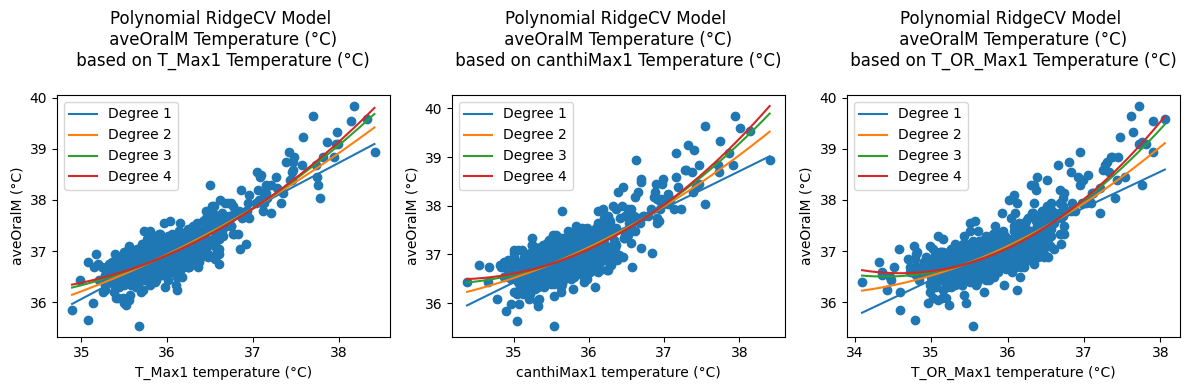

--- 
 <br>

---

--- 
 <br>


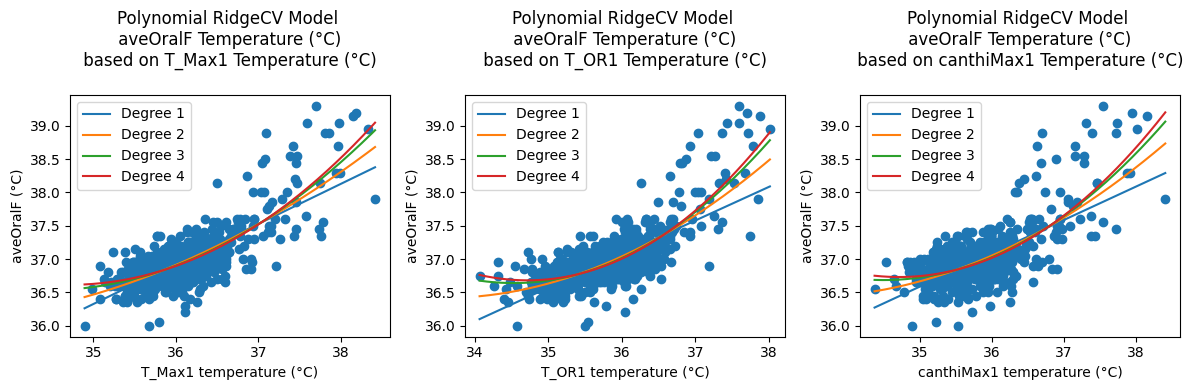

--- 
 <br>

---

In [58]:
# Plot Polynomial Model Training Results RidgeCV

#modelTypes = [LinearRegression(), LassoCV(tol = 0.1, max_iter=5000), RidgeCV(), ElasticNetCV(tol=0.1, max_iter=5000)];

#for model in modelTypes:

model = RidgeCV();

poly_reg_feature_models = poly_reg_models_types_m[type(model).__name__];
poly_reg_models_stats = poly_reg_models_types_stats_m[type(model).__name__];
statTable= pd.DataFrame()
statsList = [];
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

for i,feature in enumerate(topFeatures_m):

    axs[i].scatter(train_x[feature], train_y["aveOralM"])
    modelStats = {};

    featureDataFrame = pd.DataFrame();
    
    for degree in np.arange(1,6): 

       lobf_x = np.arange(train_x[feature].min(), train_x[feature].max(), 0.01).reshape(-1,1)

       if degree < 5:
           axs[i].plot(lobf_x, poly_reg_feature_models[feature][degree].predict(lobf_x), label = f"Degree {degree}");
           axs[i].legend()

       aveOralM_pred_train = poly_reg_feature_models[feature][degree].predict(train_x[feature].to_numpy().reshape(-1,1))


       modelStats["MSE"] = poly_reg_models_stats[feature][degree]["MSE"]; #MSE(aveOralM_pred_train, train_y["aveOralM"])
       #modelStats["RMSE"] = np.sqrt(modelStats["MSE"])
       modelStats["R2"] = poly_reg_models_stats[feature][degree]["R2"];
       modelStats["Alpha"] = poly_reg_feature_models[feature][degree][2].alpha_;
        
        #sk.metrics.r2_score(train_y["aveOralM"], aveOralM_pred_train);

       #print(f"Feature {feature}, Degree {degree}, MSE {reg_mse}, RMSE {reg_rmse}")
       featureDataFrame = pd.concat([featureDataFrame,pd.DataFrame([modelStats]).set_axis([degree],axis=0)])
    
    featureDataFrame.columns = pd.MultiIndex.from_product([[feature], featureDataFrame.columns])
    featureDataFrame.index = pd.MultiIndex.from_product([['Polynomial Degree'], featureDataFrame.index])

    statsList.append(featureDataFrame)
    
    axs[i].set_title(f"Polynomial {type(model).__name__} Model \n aveOralM Temperature (°C) \n based on {feature} Temperature (°C) \n")
    axs[i].set_ylabel("aveOralM (°C)")
    axs[i].set_xlabel(f"{feature} temperature (°C)")

  


statTable = pd.concat(statsList, axis = 1)

#statTable.columns = pd.MultiIndex.from_product([[feature], ["MSE","RMSE","Coeff", "Intercept"]])

fig.tight_layout(); 
display(Markdown("--- \n <br>"))

testFig = BytesIO();
plt.savefig(testFig, format='PNG', bbox_inches='tight');
plt.close();
display(HTML(f"<center><img src='data:image/png;base64,{base64.b64encode(testFig.getvalue()).decode()}'></center>"))

display(Markdown("--- \n <br>"))
display(HTML(f"<div style='display:flex; justify-content:center'>{statTable.to_html()}</div>"));
display(Markdown("---"))

# --------------------------------------------------------------------------------------------------
                                                # aveOralF
# --------------------------------------------------------------------------------------------------

poly_reg_feature_models = poly_reg_models_types_f[type(model).__name__];
poly_reg_models_stats = poly_reg_models_types_stats_f[type(model).__name__];
statTable= pd.DataFrame()
statsList = [];
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

for i,feature in enumerate(topFeatures_f):

    axs[i].scatter(train_x[feature], train_y["aveOralF"])
    modelStats = {};

    featureDataFrame = pd.DataFrame();
    
    for degree in np.arange(1,6): 

       lobf_x = np.arange(train_x[feature].min(), train_x[feature].max(), 0.01).reshape(-1,1)

       if degree < 5:
           axs[i].plot(lobf_x, poly_reg_feature_models[feature][degree].predict(lobf_x), label = f"Degree {degree}");
           axs[i].legend()

       aveOralM_pred_train = poly_reg_feature_models[feature][degree].predict(train_x[feature].to_numpy().reshape(-1,1))


       modelStats["MSE"] = poly_reg_models_stats[feature][degree]["MSE"]; #MSE(aveOralM_pred_train, train_y["aveOralM"])
       #modelStats["RMSE"] = np.sqrt(modelStats["MSE"])
       modelStats["R2"] = poly_reg_models_stats[feature][degree]["R2"];
       modelStats["Alpha"] = poly_reg_feature_models[feature][degree][2].alpha_;
        
        #sk.metrics.r2_score(train_y["aveOralM"], aveOralM_pred_train);

       #print(f"Feature {feature}, Degree {degree}, MSE {reg_mse}, RMSE {reg_rmse}")
       featureDataFrame = pd.concat([featureDataFrame,pd.DataFrame([modelStats]).set_axis([degree],axis=0)])
    
    featureDataFrame.columns = pd.MultiIndex.from_product([[feature], featureDataFrame.columns])
    featureDataFrame.index = pd.MultiIndex.from_product([['Polynomial Degree'], featureDataFrame.index])

    statsList.append(featureDataFrame)
    
    axs[i].set_title(f"Polynomial {type(model).__name__} Model \n aveOralF Temperature (°C) \n based on {feature} Temperature (°C) \n")
    axs[i].set_ylabel("aveOralF (°C)")
    axs[i].set_xlabel(f"{feature} temperature (°C)")

  


statTable = pd.concat(statsList, axis = 1)

#statTable.columns = pd.MultiIndex.from_product([[feature], ["MSE","RMSE","Coeff", "Intercept"]])

fig.tight_layout(); 
display(Markdown("--- \n <br>"))

testFig = BytesIO();
plt.savefig(testFig, format='PNG', bbox_inches='tight');
plt.close();
display(HTML(f"<center><img src='data:image/png;base64,{base64.b64encode(testFig.getvalue()).decode()}'></center>"))

display(Markdown("--- \n <br>"))
display(HTML(f"<div style='display:flex; justify-content:center'>{statTable.to_html()}</div>"));
display(Markdown("---"))

From the graphs above it can be seen that for aveOralM and aveOralF the models converge to a degree 2 polynomial, signifying a potential underlying non-linear relationship.

For aveOralM the models perform comparitively to their unregularized counterparts achieving $\text{R}^2$ ~0.74 for T_Max1 (Degree 3) while T_Max1 (Degree 2) for the unregularized models achieves ~0.75. However with Ridge regularization, the relationship and coeffecients are more stable leading to less variation between the models as opposed to their unregularized counterpart. This may provide more stable performance on the test set.

The result is similar for aveOralF as for aveOralM, where the best T_Max1 polynomial model of (degree 3) achieves an $\text{R}^2$ ~0.597 while its T_Max1 (Degree 2) counterpart achieves $\text{R}^2$ ~0.603. The models as with aveOralM seem to be more stable and have less variance.


--- 

--- 
 <br>


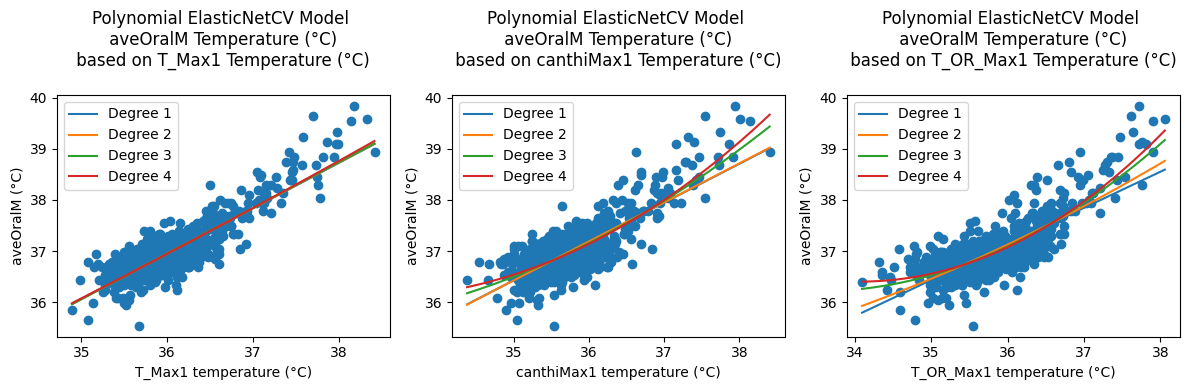

--- 
 <br>

---

--- 
 <br>


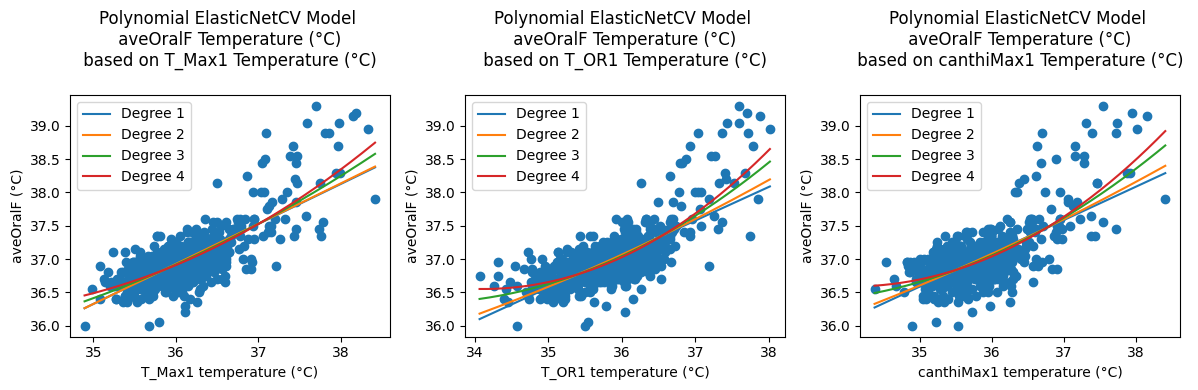

--- 
 <br>

---

In [59]:
# Plot Polynomial Model Training Results ElasticNet

#modelTypes = [LinearRegression(), LassoCV(tol = 0.1, max_iter=5000), RidgeCV(), ElasticNetCV(tol=0.1, max_iter=5000)];

#for model in modelTypes:

model = ElasticNetCV();

poly_reg_feature_models = poly_reg_models_types_m[type(model).__name__];
poly_reg_models_stats = poly_reg_models_types_stats_m[type(model).__name__];
statTable= pd.DataFrame()
statsList = [];
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

for i,feature in enumerate(topFeatures_m):

    axs[i].scatter(train_x[feature], train_y["aveOralM"])
    modelStats = {};

    featureDataFrame = pd.DataFrame();
    
    for degree in np.arange(1,6): 

       lobf_x = np.arange(train_x[feature].min(), train_x[feature].max(), 0.01).reshape(-1,1)

       if degree < 5:
           axs[i].plot(lobf_x, poly_reg_feature_models[feature][degree].predict(lobf_x), label = f"Degree {degree}");
           axs[i].legend()

       aveOralM_pred_train = poly_reg_feature_models[feature][degree].predict(train_x[feature].to_numpy().reshape(-1,1))


       modelStats["MSE"] = poly_reg_models_stats[feature][degree]["MSE"]; #MSE(aveOralM_pred_train, train_y["aveOralM"])
       #modelStats["RMSE"] = np.sqrt(modelStats["MSE"])
       modelStats["R2"] = poly_reg_models_stats[feature][degree]["R2"];
       modelStats["Alpha"] = poly_reg_feature_models[feature][degree][2].alpha_;
       modelStats["L1_Ratio"] = poly_reg_feature_models[feature][degree][2].l1_ratio_;
        
        #sk.metrics.r2_score(train_y["aveOralM"], aveOralM_pred_train);

       #print(f"Feature {feature}, Degree {degree}, MSE {reg_mse}, RMSE {reg_rmse}")
       featureDataFrame = pd.concat([featureDataFrame,pd.DataFrame([modelStats]).set_axis([degree],axis=0)])
    
    featureDataFrame.columns = pd.MultiIndex.from_product([[feature], featureDataFrame.columns])
    featureDataFrame.index = pd.MultiIndex.from_product([['Polynomial Degree'], featureDataFrame.index])

    statsList.append(featureDataFrame)
    
    axs[i].set_title(f"Polynomial {type(model).__name__} Model \n aveOralM Temperature (°C) \n based on {feature} Temperature (°C) \n")
    axs[i].set_ylabel("aveOralM (°C)")
    axs[i].set_xlabel(f"{feature} temperature (°C)")

  


statTable = pd.concat(statsList, axis = 1)

#statTable.columns = pd.MultiIndex.from_product([[feature], ["MSE","RMSE","Coeff", "Intercept"]])

fig.tight_layout(); 
display(Markdown("--- \n <br>"))

testFig = BytesIO();
plt.savefig(testFig, format='PNG', bbox_inches='tight');
plt.close();
display(HTML(f"<center><img src='data:image/png;base64,{base64.b64encode(testFig.getvalue()).decode()}'></center>"))

display(Markdown("--- \n <br>"))
display(HTML(f"<div style='display:flex; justify-content:center'>{statTable.to_html()}</div>"));
display(Markdown("---"))

# --------------------------------------------------------------------------------------------------
                                                # aveOralF
#--------------------------------------------------------------------------------------------------

poly_reg_feature_models = poly_reg_models_types_f[type(model).__name__];
poly_reg_models_stats = poly_reg_models_types_stats_f[type(model).__name__];
statTable= pd.DataFrame()
statsList = [];
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

for i,feature in enumerate(topFeatures_f):

    axs[i].scatter(train_x[feature], train_y["aveOralF"])
    modelStats = {};

    featureDataFrame = pd.DataFrame();
    
    for degree in np.arange(1,6): 

       lobf_x = np.arange(train_x[feature].min(), train_x[feature].max(), 0.01).reshape(-1,1)

       if degree < 5:
           axs[i].plot(lobf_x, poly_reg_feature_models[feature][degree].predict(lobf_x), label = f"Degree {degree}");
           axs[i].legend()

       aveOralM_pred_train = poly_reg_feature_models[feature][degree].predict(train_x[feature].to_numpy().reshape(-1,1))


       modelStats["MSE"] = poly_reg_models_stats[feature][degree]["MSE"]; #MSE(aveOralM_pred_train, train_y["aveOralM"])
       #modelStats["RMSE"] = np.sqrt(modelStats["MSE"])
       modelStats["R2"] = poly_reg_models_stats[feature][degree]["R2"];
       modelStats["Alpha"] = poly_reg_feature_models[feature][degree][2].alpha_;
       modelStats["L1_Ratio"] = poly_reg_feature_models[feature][degree][2].l1_ratio_;
        
        #sk.metrics.r2_score(train_y["aveOralM"], aveOralM_pred_train);

       #print(f"Feature {feature}, Degree {degree}, MSE {reg_mse}, RMSE {reg_rmse}")
       featureDataFrame = pd.concat([featureDataFrame,pd.DataFrame([modelStats]).set_axis([degree],axis=0)])
    
    featureDataFrame.columns = pd.MultiIndex.from_product([[feature], featureDataFrame.columns])
    featureDataFrame.index = pd.MultiIndex.from_product([['Polynomial Degree'], featureDataFrame.index])

    statsList.append(featureDataFrame)
    
    axs[i].set_title(f"Polynomial {type(model).__name__} Model \n aveOralF Temperature (°C) \n based on {feature} Temperature (°C) \n")
    axs[i].set_ylabel("aveOralF (°C)")
    axs[i].set_xlabel(f"{feature} temperature (°C)")

  


statTable = pd.concat(statsList, axis = 1)

#statTable.columns = pd.MultiIndex.from_product([[feature], ["MSE","RMSE","Coeff", "Intercept"]])

fig.tight_layout(); 
display(Markdown("--- \n <br>"))

testFig = BytesIO();
plt.savefig(testFig, format='PNG', bbox_inches='tight');
plt.close();
display(HTML(f"<center><img src='data:image/png;base64,{base64.b64encode(testFig.getvalue()).decode()}'></center>"))

display(Markdown("--- \n <br>"))
display(HTML(f"<div style='display:flex; justify-content:center'>{statTable.to_html()}</div>"));
display(Markdown("---"))

For aveOralM and aveOralF ElasticNet performs similarily to LassoCV, however with less variation between the models especially for aveOralF.

--- 

--- 



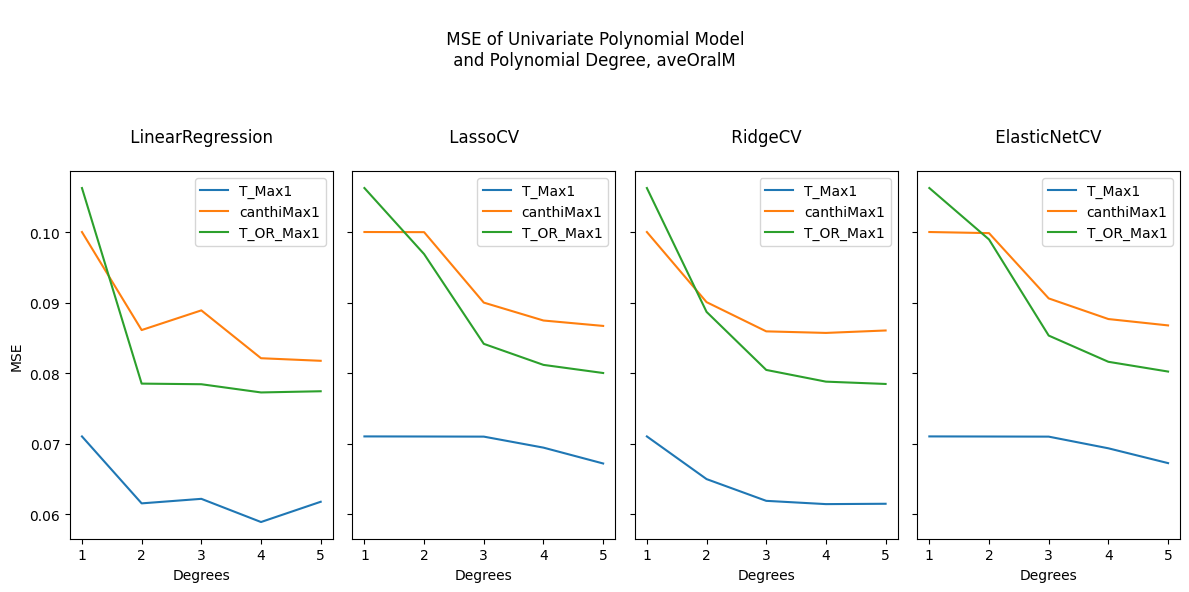

--- 



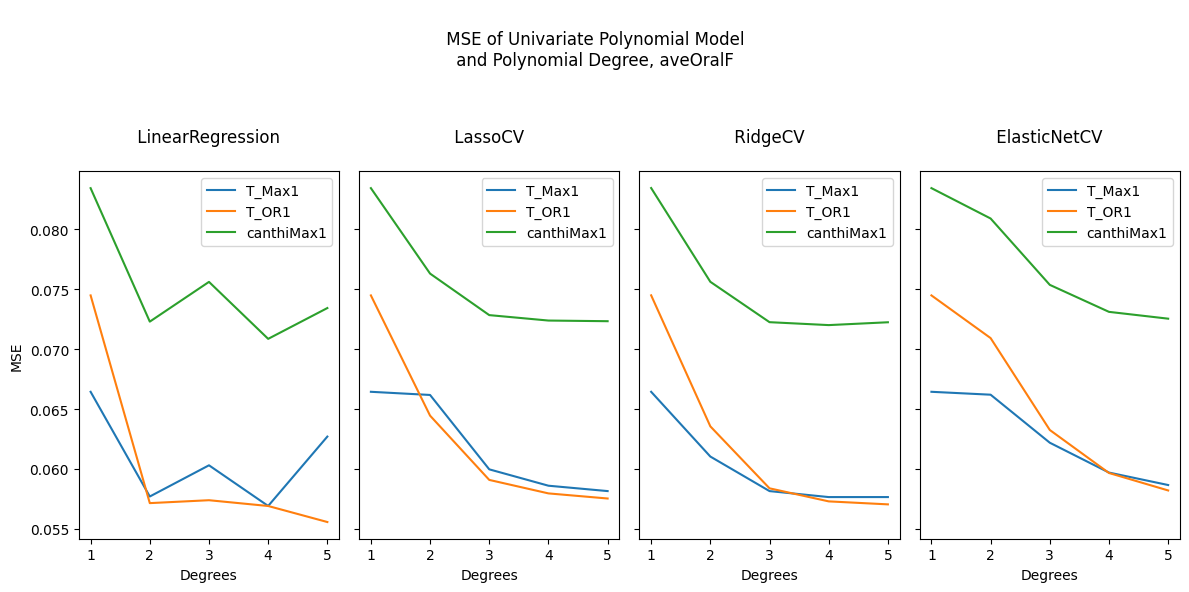

---

In [60]:
# plot variation of polynomial degree with MSE loss 

modelTypes = [LinearRegression(), LassoCV(tol = 0.1, max_iter=5000), RidgeCV(), ElasticNetCV(tol=0.1, max_iter=5000)];

fig, axs = plt.subplots(1, 4, figsize=(12, 6), sharey=True)

axs[0].set_ylabel("MSE");

for i,model in enumerate(modelTypes):
    for feature in topFeatures_m:
        # MSE PLOT
        axs[i].plot(poly_reg_models_types_stats_m["LinearRegression"]["T_Max1"].keys(), 
                 [modelStat["MSE"] for modelStat in poly_reg_models_types_stats_m[type(model).__name__][feature].values()], label = f"{feature}")
    axs[i].set_title(f"\n {type(model).__name__} \n");
    axs[i].set_xlabel("Degrees");
    axs[i].legend();

plt.suptitle("\n MSE of Univariate Polynomial Model \n and Polynomial Degree, aveOralM \n");
fig.tight_layout();
testFig = BytesIO();
plt.savefig(testFig, format='PNG', bbox_inches='tight');
plt.close();
display(Markdown("--- \n"))
display(HTML(f"<center><img src='data:image/png;base64,{base64.b64encode(testFig.getvalue()).decode()}'></center>"))
#display(Markdown("---"))

# --------------------------------------------------------------------------------------------------
                                                # aveOralF
#--------------------------------------------------------------------------------------------------

fig, axs = plt.subplots(1, 4, figsize=(12, 6), sharey=True)

axs[0].set_xlabel("Degrees");
axs[0].set_ylabel("MSE");

for i,model in enumerate(modelTypes):
    for feature in topFeatures_f:
        # MSE PLOT
        axs[i].plot(poly_reg_models_types_stats_f["LinearRegression"]["T_Max1"].keys(), 
                 [modelStat["MSE"] for modelStat in poly_reg_models_types_stats_f[type(model).__name__][feature].values()], label = f"{feature}")
    axs[i].set_title(f"\n {type(model).__name__} \n");
    axs[i].set_xlabel("Degrees");
    axs[i].legend();

plt.suptitle("\n MSE of Univariate Polynomial Model \n and Polynomial Degree, aveOralF \n");
fig.tight_layout();
testFig = BytesIO();
plt.savefig(testFig, format='PNG', bbox_inches='tight');
plt.close();
display(Markdown("--- \n"))
display(HTML(f"<center><img src='data:image/png;base64,{base64.b64encode(testFig.getvalue()).decode()}'></center>"))
display(Markdown("---"))

For aveOralM and aveOralF the best performing model with Regularization is the T_Max1 RidgeCV model of degree 3. This choosen over the LinearRegression model as from the plot it was possible to interpret that the model was potentially overfitting at higher degree polynomials. Therefore RidgeCV provides a balance or regularization by shrinking coefficients close to zero while keeping most terms as opposet to LassoCV or ElasticNetCV.

In [61]:
# add best model for testing 
best_models_reg_m["Single"]["T_Max1"]["Single_Polynomial_RidgeCV_T_Max1_Degree_3"] = poly_reg_models_types_m["RidgeCV"]["T_Max1"][3];
best_models_reg_f["Single"]["T_Max1"]["Single_Polynomial_RidgeCV_T_Max1_Degree_3"] = poly_reg_models_types_m["RidgeCV"]["T_Max1"][3];

--- 

##### D - Multiple Feature Polynomial Model

--- 

The final linear combination model is multiple feature polynomial regression. For this the top 5 features found from the multivariate feature exploration will be used to create new features of varying degrees to explore the interconnection between the top 5 choosen features.

In [62]:
# Develop Multivariate Polynomial Model with 5-Fold Validation - aveOralM

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import collections

# do with degrees 2, 3, 4
poly_reg_feature_models = {};

modelTypes = [LinearRegression(n_jobs=-1), LassoCV(tol = 0.01, n_jobs=-1, random_state=42), RidgeCV(), ElasticNetCV(tol = 0.01, n_jobs=-1, random_state=42)]

poly_reg_models_types_multi_m = {};

# https://stackoverflow.com/questions/651794/whats-the-best-way-to-initialize-a-dict-of-dicts-in-python
metricsPoly_m = collections.defaultdict(lambda : collections.defaultdict(dict)) 
for modelType in modelTypes:

    
    poly_reg_models = {};
    for degree in np.arange(1,6): 

        curModel = sk.base.clone(modelType)
        poly_features = PolynomialFeatures(degree=degree, include_bias=False)
        std_scaler = StandardScaler()
        lin_reg = LinearRegression()
        polynomial_regression = Pipeline([
                ("poly_features", poly_features),
                ("std_scaler", std_scaler),
                (type(curModel).__name__, curModel),
            ])
        metricsPoly_m[type(modelType).__name__][degree]["mse"] = -cross_val_score(polynomial_regression, 
                              train_x_processed[top5Features["reg_aveOralM"]], 
                              train_y["aveOralM"], 
                              cv = 5, 
                              scoring='neg_mean_squared_error',
                              n_jobs = -1
                              ).mean() # [top5Features["reg_aveOralM"]]

        metricsPoly_m[type(modelType).__name__][degree]["r2"] = cross_val_score(polynomial_regression, 
                      train_x_processed[top5Features["reg_aveOralM"]], 
                      train_y["aveOralM"], 
                      cv = 5, 
                      scoring='r2',
                      n_jobs = -1
                      ).mean() # [top5Features["reg_aveOralM"]]
        
        polynomial_regression.fit(train_x_processed[top5Features["reg_aveOralM"]], train_y["aveOralM"]) # [top5Features["reg_aveOralM"]]
        poly_reg_models[degree] = polynomial_regression;

    poly_reg_models_types_multi_m[type(modelType).__name__] = poly_reg_models;

In [63]:
# Develop Multivariate Polynomial Model with 5-Fold Validation - aveOralF
# --------------------------------------------------------------------------------------------------
                                                # aveOralF
#--------------------------------------------------------------------------------------------------

modelTypes = [LinearRegression(n_jobs=-1), 
              LassoCV(tol = 0.1, n_jobs=-1, random_state=42, max_iter = 300, alphas = np.logspace(-3, 1, 4)), 
              RidgeCV(), 
              ElasticNetCV(tol = 0.1, n_jobs=-1, random_state=42, max_iter = 300, alphas = np.logspace(-3, 1, 4))
             ]

poly_reg_models_types_multi_f = {};

# https://stackoverflow.com/questions/651794/whats-the-best-way-to-initialize-a-dict-of-dicts-in-python
metricsPoly_f = collections.defaultdict(lambda : collections.defaultdict(dict)) 
for modelType in modelTypes:

    
    poly_reg_models = {};
    for degree in np.arange(1,6): 

        curModel = sk.base.clone(modelType)
        poly_features = PolynomialFeatures(degree=degree, include_bias=False)
        std_scaler = StandardScaler()
        lin_reg = LinearRegression()
        polynomial_regression = Pipeline([
                ("poly_features", poly_features),
                ("std_scaler", std_scaler),
                (type(curModel).__name__, curModel),
            ])
        metricsPoly_f[type(modelType).__name__][degree]["mse"] = -cross_val_score(polynomial_regression, 
                              train_x_processed[top5Features["reg_aveOralF"]], 
                              train_y["aveOralF"], 
                              cv = 5, 
                              scoring='neg_mean_squared_error',
                              n_jobs = -1
                              ).mean()

        metricsPoly_f[type(modelType).__name__][degree]["r2"] = cross_val_score(polynomial_regression, 
                      train_x_processed[top5Features["reg_aveOralF"]], 
                      train_y["aveOralF"], 
                      cv = 5, 
                      scoring='r2',
                      n_jobs = -1
                      ).mean() 
        
        polynomial_regression.fit(train_x_processed[top5Features["reg_aveOralF"]], train_y["aveOralF"]) 
        poly_reg_models[degree] = polynomial_regression;

    poly_reg_models_types_multi_f[type(modelType).__name__] = poly_reg_models;

--- 
 <br>


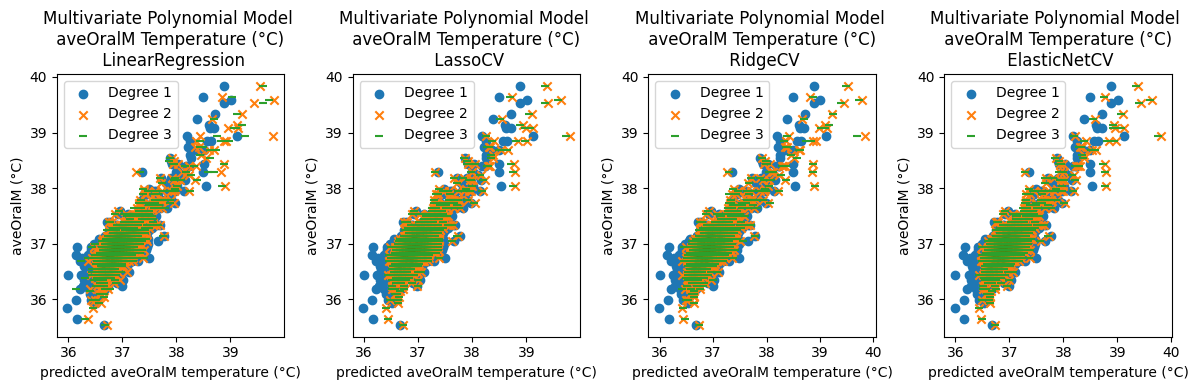

--- 
 <br>

---

--- 
 <br>


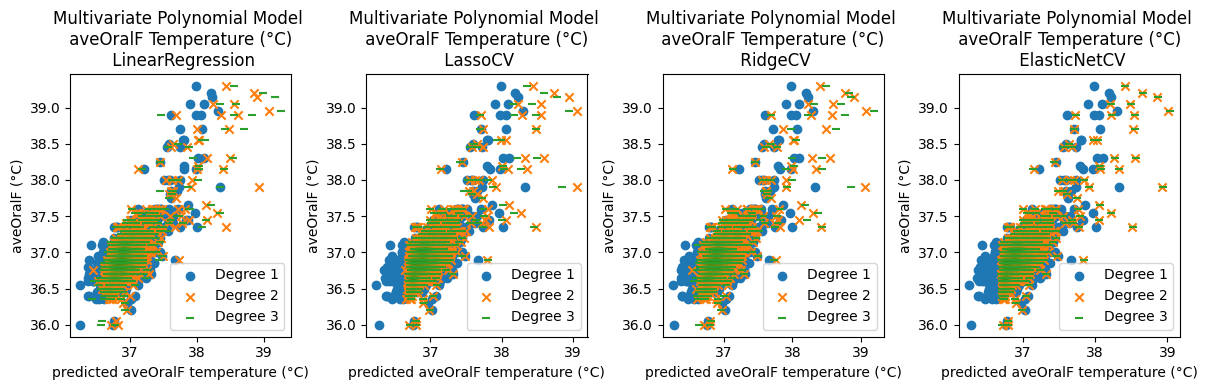

--- 
 <br>

---

In [64]:
# Plot Polynomial Model Training Results  

fig, axs = plt.subplots(1, 4, figsize=(12, 4))
statsList_multi_m = [];
modelTypes = [LinearRegression(), LassoCV(tol = 0.01), RidgeCV(), ElasticNetCV(tol = 0.01)]

for i,modelType in enumerate([type(model).__name__ for model in modelTypes]):

   
    modelStats = {};

    featureDataFrame = pd.DataFrame();

    markers = ["o","x","_"]
    
    for j,degree in enumerate(np.arange(1,6)): 

       if(degree < 4):
           aveOralM_pred_train = poly_reg_models_types_multi_m[modelType][degree].predict(train_x_processed[top5Features["reg_aveOralM"]])# [top5Features["reg_aveOralM"]]
           axs[i].scatter(aveOralM_pred_train, train_y["aveOralM"], label = f"Degree {degree}", marker=markers[j]);  
           axs[i].legend()


       modelStats["MSE"] = metricsPoly_m[modelType][degree]["mse"];
       modelStats["R2"] = metricsPoly_m[modelType][degree]["r2"];

       if modelType != "LinearRegression":

           modelStats["Alpha"] = poly_reg_models_types_multi_f[modelType][degree][2].alpha_;
           
           if modelType == "ElasticNetCV":
               modelStats["L1_Ratio"] = poly_reg_models_types_multi_f[modelType][degree][2].l1_ratio_;
           


       #print(f"Feature {feature}, Degree {degree}, MSE {reg_mse}, RMSE {reg_rmse}")
       featureDataFrame = pd.concat([featureDataFrame,pd.DataFrame([modelStats]).set_axis([degree],axis=0)])
    
    featureDataFrame.columns = pd.MultiIndex.from_product([[modelType], featureDataFrame.columns])
    featureDataFrame.index = pd.MultiIndex.from_product([['Polynomial Degree'], featureDataFrame.index])

    statsList_multi_m.append(featureDataFrame)
    
    axs[i].set_title(f"Multivariate Polynomial Model \n aveOralM Temperature (°C) \n {modelType}")
    axs[i].set_ylabel("aveOralM (°C)")
    axs[i].set_xlabel(f"predicted aveOralM temperature (°C)")


statTable_m_multi_poly = pd.concat(statsList_multi_m, axis = 1)

fig.tight_layout(); 
display(Markdown("--- \n <br>"))

testFig = BytesIO();
plt.savefig(testFig, format='PNG', bbox_inches='tight');
plt.close();
display(HTML(f"<center><img src='data:image/png;base64,{base64.b64encode(testFig.getvalue()).decode()}'></center>"))

display(Markdown("--- \n <br>"))
display(HTML(f"<div style='display:flex; justify-content:center'>{statTable_m_multi_poly.to_html()}</div>"));
display(Markdown("---"))

# --------------------------------------------------------------------------------------------------
                                                # aveOralF
#--------------------------------------------------------------------------------------------------


fig, axs = plt.subplots(1, 4, figsize=(12, 4))
statsList_multi_f = [];
modelTypes = [LinearRegression(), LassoCV(tol = 0.1), RidgeCV(), ElasticNetCV(tol = 0.1)]

for i,modelType in enumerate([type(model).__name__ for model in modelTypes]):

   
    modelStats = {};

    featureDataFrame = pd.DataFrame();

    markers = ["o","x","_"]
    
    for j,degree in enumerate(np.arange(1,6)): 

       if(degree < 4):
           aveOralM_pred_train = poly_reg_models_types_multi_f[modelType][degree].predict(train_x_processed[top5Features["reg_aveOralF"]])
           axs[i].scatter(aveOralM_pred_train, train_y["aveOralF"], label = f"Degree {degree}", marker=markers[j]);  
           axs[i].legend()


       modelStats["MSE"] = metricsPoly_f[modelType][degree]["mse"];
       modelStats["R2"] = metricsPoly_f[modelType][degree]["r2"];

       if modelType != "LinearRegression":

           modelStats["Alpha"] = poly_reg_models_types_multi_f[modelType][degree][2].alpha_;
           
           if modelType == "ElasticNetCV":
               modelStats["L1_Ratio"] = poly_reg_models_types_multi_f[modelType][degree][2].l1_ratio_;
           
       #print(f"Feature {feature}, Degree {degree}, MSE {reg_mse}, RMSE {reg_rmse}")
       featureDataFrame = pd.concat([featureDataFrame,pd.DataFrame([modelStats]).set_axis([degree],axis=0)])
    
    featureDataFrame.columns = pd.MultiIndex.from_product([[modelType], featureDataFrame.columns])
    featureDataFrame.index = pd.MultiIndex.from_product([['Polynomial Degree'], featureDataFrame.index])

    statsList_multi_f.append(featureDataFrame)
    
    axs[i].set_title(f"Multivariate Polynomial Model \n aveOralF Temperature (°C) \n {modelType}")
    axs[i].set_ylabel("aveOralF (°C)")
    axs[i].set_xlabel(f"predicted aveOralF temperature (°C)")


statTable_f_multi_poly = pd.concat(statsList_multi_f, axis = 1)

fig.tight_layout(); 
display(Markdown("--- \n <br>"))

testFig = BytesIO();
plt.savefig(testFig, format='PNG', bbox_inches='tight');
plt.close();
display(HTML(f"<center><img src='data:image/png;base64,{base64.b64encode(testFig.getvalue()).decode()}'></center>"))

display(Markdown("--- \n <br>"))
display(HTML(f"<div style='display:flex; justify-content:center'>{statTable_f_multi_poly.to_html()}</div>"));
display(Markdown("---"))

--- 



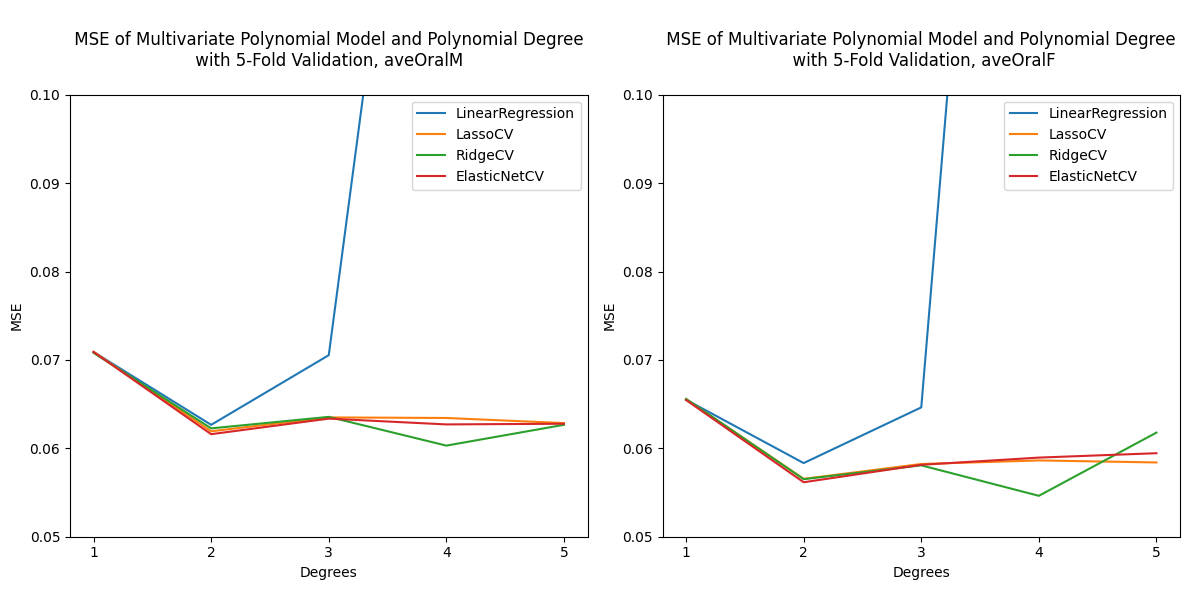

---

In [65]:
# Plot variation of polynomial degree with MSE loss 
from matplotlib.ticker import MaxNLocator
modelTypes = [LinearRegression(n_jobs=-1), 
              LassoCV(), 
              RidgeCV(), 
              ElasticNetCV()
             ]

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

for modelType in [type(model).__name__ for model in modelTypes]:
    # MSE PLOT
    axs[0].plot(statTable_m_multi_poly.index.get_level_values(1), statTable_m_multi_poly[modelType]["MSE"], label = modelType)
    axs[0].set_title("\n MSE of Multivariate Polynomial Model and Polynomial Degree \n with 5-Fold Validation, aveOralM \n");
    
axs[0].legend();
axs[0].set_xlabel("Degrees");
axs[0].set_ylim([0.05,0.1])
axs[0].set_ylabel("MSE");
axs[0].xaxis.set_major_locator(MaxNLocator(integer=True));

# --------------------------------------------------------------------------------------------------
                                                # aveOralF
#--------------------------------------------------------------------------------------------------


for modelType in [type(model).__name__ for model in modelTypes]:
    # MSE PLOT
    axs[1].plot(statTable_m_multi_poly.index.get_level_values(1), statTable_f_multi_poly[modelType]["MSE"], label = modelType)
    axs[1].set_title("\n MSE of Multivariate Polynomial Model and Polynomial Degree \n  with 5-Fold Validation, aveOralF \n");
    
axs[1].legend();
axs[1].set_xlabel("Degrees");
axs[1].set_ylim([0.05,0.1])
axs[1].set_ylabel("MSE");
axs[1].xaxis.set_major_locator(MaxNLocator(integer=True));
fig.tight_layout();

testFig = BytesIO();

plt.savefig(testFig, format='PNG', bbox_inches='tight');
plt.close();
display(Markdown("--- \n"))
display(HTML(f"<center><img src='data:image/png;base64,{base64.b64encode(testFig.getvalue()).decode()}'></center>"))
display(Markdown("---"))

From the graph it can be seen that best low degree polynomial model (Degrees 1-3) is of degree 2 with ElasticNetCV offering the best MSE performance. Overall the regularized models perform better with increasing degrees as oppossed to the pure linear model. The ridge model also begins to increase in MSE after degree 4, while Lasso and ElasticNet perform comparitively the same. This is likely due to the fact that the weight sparsity helps prevent the model from overfitting.

In [66]:
# choose best model
best_models_reg_m["MultiPoly"]["Top5Features"]["Polynomial_Regression_ElasticNetCV_Degree_2"] = poly_reg_models_types_multi_m["ElasticNetCV"][2]
best_models_reg_f["MultiPoly"]["Top5Features"]["Polynomial_Regression_ElasticNetCV_Degree_2"] = poly_reg_models_types_multi_f["ElasticNetCV"][2]

To further investigate the ElasticNet model with degree 2 the coefficients of the terms in the model are displayed below for aveOralM and aveOralF:

In [67]:
# Elastic Net Coefficients

elastic_net_coeff_m = pd.DataFrame([poly_reg_models_types_multi_m["ElasticNetCV"][2][0].get_feature_names_out(), poly_reg_models_types_multi_m["ElasticNetCV"][2][2].coef_], index=["features", "coeff"]).transpose()
elastic_net_coeff_m.columns = pd.MultiIndex.from_product([["aveOralM"], elastic_net_coeff_m.columns])

elastic_net_coeff_f = pd.DataFrame([poly_reg_models_types_multi_f["ElasticNetCV"][2][0].get_feature_names_out(), poly_reg_models_types_multi_f["ElasticNetCV"][2][2].coef_], index=["features", "coeff"]).transpose()
elastic_net_coeff_f.columns = pd.MultiIndex.from_product([["aveOralF"], elastic_net_coeff_f.columns])

display(HTML(f'''<div style='display:flex; flex-direction: row; justify-content: center'>
                    <div style='display:flex; justify-content: center; margin: 20px'>
                        {elastic_net_coeff_m.sort_values(("aveOralM","coeff"), ascending=False).to_html()}
                    </div>
                    <div style='display:flex; justify-content: center; margin: 20px'>
                        {elastic_net_coeff_f.sort_values(("aveOralF","coeff"), ascending=False).to_html()}
                    </div>
                    '''))

l1_elastic_m = poly_reg_models_types_multi_m["ElasticNetCV"][2][2].l1_ratio_;
alpha_elastic_m = poly_reg_models_types_multi_m["ElasticNetCV"][2][2].alpha_;
display(Markdown(f"<center><b>aveOralM</b>, alpha: {round(alpha_elastic_m,3)}, l1 ratio: {l1_elastic_m}</center>"))

l1_elastic_f = poly_reg_models_types_multi_f["ElasticNetCV"][2][2].l1_ratio_;
alpha_elastic_f = poly_reg_models_types_multi_f["ElasticNetCV"][2][2].alpha_;
display(Markdown(f"<center><b>aveOralF</b>, alpha: {round(alpha_elastic_f,3)}, l1 ratio: {l1_elastic_f}</center>"))

<center><b>aveOralM</b>, alpha: 0.023, l1 ratio: 0.5</center>

<center><b>aveOralF</b>, alpha: 0.022, l1 ratio: 0.5</center>

--- 

The resulting feature selection from the L1 regularization as part of ElasticNet prioritizes features in a similar fashion as found in the random forest feature importance, as these features where choosen from the feature importance scores. For aveOralM T_Max1 has the largest coefficient having the largest impact on the model while for aveOralF its T_OR1 a result found during the feature exploration in section 3.4.2.

--- 

##### E - Neural Network

--- 

First the architecture of the neural network will be explored. As with previous models a simple architecture will be examined first consiting of no hidden layers. As exploratory data analysis showed variables having significantly strong linear relationships with the target variable, a simpler model may perform better than a more complicated one, if the relationship is inherently linear. As the relationship in previous models suggested the potential benefit of polynomial terms a model will be developed with one hidden layer to attempt to learn non linear relationships and concatenated with the input layer to ensure to capture some of the linear relationships in the data, in a more complicated model.

In [68]:
# build Hyper Model for Keras Tuner - Simple Linear Regression - No Hidden Layers

class SimpleRegHyperModel(keras_tuner.HyperModel):
    def __init__(self, train_x):
        
        self.train_x = train_x
        
    def build(self, hp):
        
        inputs = keras.Input(shape=(38,), name = "temperature_inputs")
        adapt_data = self.train_x;

        normalizer = keras.layers.Normalization(axis=-1)
        normalizer.adapt(adapt_data)
    
        x = normalizer(inputs)

        #x = inputs
        
        # x = keras.layers.Dense(hp.Choice('units1', [16,32,64,128,256]), #[8,10,12,14]), 
        #                        activation=hp.Choice('activation_function', ["linear"]), #, "elu","selu"]), #"relu","elu","selu", 
                               # kernel_initializer=hp.Choice('weight_init', ['he_uniform','he_normal']), #,'he_normal','he_uniform'])
                               # kernel_regularizer=keras.regularizers.L1L2(l1=hp.Choice('l1_kernel', [0.0001,0.001,0.01,0.1]), l2=hp.Choice('l2_kernel', [0.00001,0.001,0.01, 0.1])), # 0.0001,0.001,0.01,
                               # bias_regularizer=keras.regularizers.L1L2(l1=hp.Choice('l1_bias', [0.0001,0.001,0.01,0.1]), l2=hp.Choice('l2_bias', [0.00001,0.001,0.01, 0.1])), # 0.00001, 0.001,0.01, 
        #                        #activity_regularizer=keras.regularizers.L1L2(l1=hp.Choice('l1_activity', [0.001,0.01, 0.1]), l2=hp.Choice('l2_activity', [0.001,0.01, 0.1])),
        #                       )(x)
        
        #x = keras.layers.Dropout(0.1)(x);

        # x = keras.layers.Dense(hp.Choice('units2', [16,32,64,128,256]), #[8,10,12,14]), 
        #                    activation=hp.Choice('activation_function2', ["linear","relu","elu","selu"]), #, "elu","selu"]), #"relu","elu","selu", 
        #                    kernel_initializer=hp.Choice('weight_init2', ['he_uniform','he_normal']), #,'he_normal','he_uniform'])
        #                    kernel_regularizer=keras.regularizers.L1L2(l1=hp.Choice('l1_kernel2', [0.0001,0.001,0.01, 0.1]), l2=hp.Choice('l2_kernel2', [0.00001,0.001,0.01, 0.1])),
        #                    bias_regularizer=keras.regularizers.L1L2(l1=hp.Choice('l1_bias2', [0.00001, 0.001,0.01, 0.1]), l2=hp.Choice('l2_bias2', [0.00001,0.001,0.01, 0.1])),
        #                    #activity_regularizer=keras.regularizers.L1L2(l1=hp.Choice('l1_activity', [0.001,0.01, 0.1]), l2=hp.Choice('l2_activity', [0.001,0.01, 0.1])),
        #                   )(x)
                
        outputs = keras.layers.Dense(1, 
                                     activation="linear", 
                                     name="temperature_prediction",
                                     kernel_initializer=hp.Choice('weight_init3', ['he_uniform','he_normal']), #,'he_normal','he_uniform'])
                                     # ,0.1
                                     kernel_regularizer=keras.regularizers.L1L2(l1=hp.Choice('l1_kernel3', [0.0001,0.001,0.01]), l2=hp.Choice('l2_kernel3', [0.00001,0.001,0.01])), # 0.0001,0.001,0.01,
                                     bias_regularizer=keras.regularizers.L1L2(l1=hp.Choice('l1_bias3', [0.0001,0.001,0.01]), l2=hp.Choice('l2_bias3', [0.00001,0.001,0.01])), # 0.00001, 0.001,0.01,  
                                     # ,0.1
                                    
                                     )(x)
        
        model = keras.Model(inputs=inputs, 
                            outputs=outputs, 
                           )
        
        model.compile(optimizer= keras.optimizers.Adam(learning_rate = 0.01), #learning_rate=hp.Choice("learning_rate",[0.01,0.001])),#hp.Choice('optimizer', ["adam","rmsprop","sgd"]), #keras.optimizers.Adam(learning_rate=hp.Choice('adam_learning', [0.1,0.01,,0.001]))
                      loss='mse', 
                      metrics = [keras.metrics.RootMeanSquaredError(), "mse", keras.metrics.R2Score()]);
        
        return model;
    

In [69]:
# build Hyper Model for Keras Tuner - 1 Hidden and Residual Connection

class ResidualRegHyperModel(keras_tuner.HyperModel):
    def __init__(self, train_x):
        
        self.train_x = train_x
        
    def build(self, hp):
        
        inputs = keras.Input(shape=(38,), name = "temperature_inputs")
        adapt_data = self.train_x;

        normalizer = keras.layers.Normalization(axis=-1)
        normalizer.adapt(adapt_data)
    
        inputs_norm = normalizer(inputs)

        x = keras.layers.Dense(hp.Choice('units1', [16,32,64,128]), #[8,10,12,14]), # 16,
                               activation=hp.Choice('activation_function', ["elu","selu", "tanh"]), #, "elu","selu"]), #"relu","elu","selu", 
                               kernel_initializer=hp.Choice('weight_init', ['he_uniform','he_normal']), #,'he_normal','he_uniform'])
                               kernel_regularizer=keras.regularizers.L1L2(l1=hp.Choice('l1_kernel', [0.0001,0.001,0.01,0.1]), l2=hp.Choice('l2_kernel', [0.00001,0.001,0.01, 0.1])), # 0.0001,0.001,0.01,
                               bias_regularizer=keras.regularizers.L1L2(l1=hp.Choice('l1_bias', [0.0001,0.001,0.01,0.1]), l2=hp.Choice('l2_bias', [0.00001,0.001,0.01, 0.1])), # 0.00001, 0.001,0.01, 
                               #activity_regularizer=keras.regularizers.L1L2(l1=hp.Choice('l1_activity', [0.001,0.01, 0.1]), l2=hp.Choice('l2_activity', [0.001,0.01, 0.1])),
                              )(inputs_norm)
        
        #x = keras.layers.Dropout(0.05)(x);

        # x = keras.layers.Dense(hp.Choice('units2', [32,64,128]), #[8,10,12,14]), 
        #                    activation=hp.Choice('activation_function2', ["linear","relu","elu","selu"]), #, "elu","selu"]), #"relu","elu","selu", 
        #                    kernel_initializer=hp.Choice('weight_init2', ['he_uniform','he_normal']), #,'he_normal','he_uniform'])
        #                    kernel_regularizer=keras.regularizers.L1L2(l1=hp.Choice('l1_kernel2', [0.0001,0.001,0.01, 0.1]), l2=hp.Choice('l2_kernel2', [0.00001,0.001,0.01, 0.1])),
        #                    bias_regularizer=keras.regularizers.L1L2(l1=hp.Choice('l1_bias2', [0.00001, 0.001,0.01, 0.1]), l2=hp.Choice('l2_bias2', [0.00001,0.001,0.01, 0.1])),
        #                    #activity_regularizer=keras.regularizers.L1L2(l1=hp.Choice('l1_activity', [0.001,0.01, 0.1]), l2=hp.Choice('l2_activity', [0.001,0.01, 0.1])),
        #                   )(x)

        # x = keras.layers.Dense(hp.Choice('units4', [16,32]), #[8,10,12,14]), 
        #                activation=hp.Choice('activation_function4', ["linear","relu","elu","selu"]), #, "elu","selu"]), #"relu","elu","selu", 
        #                kernel_initializer=hp.Choice('weight_init4', ['he_uniform','he_normal']), #,'he_normal','he_uniform'])
        #                kernel_regularizer=keras.regularizers.L1L2(l1=hp.Choice('l1_kernel4', [0.0001,0.001,0.01, 0.1]), l2=hp.Choice('l2_kernel4', [0.00001,0.001,0.01, 0.1])),
        #                bias_regularizer=keras.regularizers.L1L2(l1=hp.Choice('l1_bias4', [0.00001, 0.001,0.01, 0.1]), l2=hp.Choice('l2_bias4', [0.00001,0.001,0.01, 0.1])),
        #                #activity_regularizer=keras.regularizers.L1L2(l1=hp.Choice('l1_activity', [0.001,0.01, 0.1]), l2=hp.Choice('l2_activity', [0.001,0.01, 0.1])),
        #               )(x)


        x = keras.layers.Concatenate(axis=-1)([x, inputs_norm]);
        
        outputs = keras.layers.Dense(1, 
                                     activation="linear", 
                                     name="temperature_prediction",
                                     #kernel_initializer=hp.Choice('weight_init3', ['he_uniform','he_normal']), #,'he_normal','he_uniform'])
                                     # ,0.1
                                     kernel_regularizer=keras.regularizers.L1L2(l1=hp.Choice('l1_kernel3', [0.0001,0.001,0.01]), l2=hp.Choice('l2_kernel3', [0.00001,0.001,0.01])), # 0.0001,0.001,0.01,
                                     bias_regularizer=keras.regularizers.L1L2(l1=hp.Choice('l1_bias3', [0.0001,0.001,0.01]), l2=hp.Choice('l2_bias3', [0.00001,0.001,0.01])), # 0.00001, 0.001,0.01,  
                                     # ,0.1
                                    
                                    )(x)
        
        model = keras.Model(inputs=inputs, 
                            outputs=outputs, 
                           )
        
        model.compile(optimizer= keras.optimizers.Adam(learning_rate = 0.01), #learning_rate=hp.Choice("learning_rate",[0.01,0.001])),#hp.Choice('optimizer', ["adam","rmsprop","sgd"]), #keras.optimizers.Adam(learning_rate=hp.Choice('adam_learning', [0.1,0.01,,0.001]))
                      loss='mse', 
                      metrics = [keras.metrics.RootMeanSquaredError(), "mse", keras.metrics.R2Score()]);
        
        return model;
    

###### E.1 - No Hidden Layer - Neural Network

--- 

In [70]:
# Split Test Data into Training and Validation
train_x_reg, val_x_reg, train_y_reg, val_y_reg = train_test_split(train_x_processed, train_y, test_size=0.2, random_state = 42);

Next we will search for the best hyper parameters including the l1, l2 regularization on the weights and bias. This will be done for both aveOralM and aveOralF.

**<center> aveOralM</center>**

In [71]:
# Tune Model Hyperparameters using Keras Tuner - aveOralM

reg_tuner_simple_m = keras_tuner.RandomSearch(
    SimpleRegHyperModel(train_x_reg.to_numpy()),
    objective= keras_tuner.Objective('mse', direction='min'),
    max_trials=20,
    overwrite=True)

reg_tuner_simple_m.search(train_x_reg, 
             train_y_reg["aveOralM"], 
             epochs=70, 
             validation_data=(val_x_reg, val_y_reg["aveOralM"]), 
)

Trial 20 Complete [00h 00m 10s]
mse: 564.8788452148438

Best mse So Far: 563.6683959960938
Total elapsed time: 00h 03m 12s


In [72]:
# best hyperparameters - aveOralM simple model
reg_tuner_simple_m.get_best_hyperparameters()[0].values

{'weight_init3': 'he_normal',
 'l1_kernel3': 0.01,
 'l2_kernel3': 0.001,
 'l1_bias3': 0.001,
 'l2_bias3': 1e-05}

In [73]:
# summary of best aveOralM simple model
best_nn_reg_simple_m = reg_tuner_simple_m.get_best_models()[0]
best_nn_reg_simple_m.summary();

/home/matve/ml-coursework/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ temperature_inputs (InputLayer) │ (None, 38)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ normalization (Normalization)   │ (None, 38)             │            77 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ temperature_prediction (Dense)  │ (None, 1)              │            39 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 116 (468.00 B)

 Trainable params: 39 (156.00 B)

 Non-trainable params: 77 (312.00 B)

----


**<center> aveOralF</center>**

The same procedure will be done to find the best hyper parameters for the model predicting aveOralF:

In [74]:
# Tune Model Hyperparameters using Keras Tuner - aveOralF

reg_tuner_simple_f = keras_tuner.RandomSearch(
    SimpleRegHyperModel(train_x_reg.to_numpy()),
    objective= keras_tuner.Objective('mse', direction='min'),
    max_trials=20,
    overwrite=True)

reg_tuner_simple_f.search(train_x_reg, 
             train_y_reg["aveOralF"], 
             epochs=70, 
             validation_data=(val_x_reg, val_y_reg["aveOralF"]), 
)

Trial 20 Complete [00h 00m 10s]
mse: 563.093505859375

Best mse So Far: 561.501708984375
Total elapsed time: 00h 03m 11s


In [75]:
# best hyperparameters - aveOralM simple model
reg_tuner_simple_f.get_best_hyperparameters()[0].values

{'weight_init3': 'he_uniform',
 'l1_kernel3': 0.01,
 'l2_kernel3': 1e-05,
 'l1_bias3': 0.0001,
 'l2_bias3': 1e-05}

In [76]:
# summary of best aveOralF simple model
best_nn_reg_simple_f = reg_tuner_simple_m.get_best_models()[0]
best_nn_reg_simple_f.summary();

/home/matve/ml-coursework/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ temperature_inputs (InputLayer) │ (None, 38)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ normalization (Normalization)   │ (None, 38)             │            77 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ temperature_prediction (Dense)  │ (None, 1)              │            39 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 116 (468.00 B)

 Trainable params: 39 (156.00 B)

 Non-trainable params: 77 (312.00 B)

Next the best models will be trained on a large on number of epochs till convergence and the results evaluated.

---

**<center> aveOralM</center>**

In [77]:
# Train the aveOralM model 300 Epochs
best_nn_reg_simple_m = reg_tuner_simple_m.get_best_models()[0]
best_nn_reg_simple_m.optimizer.learning_rate.assign(0.1)
keras.utils.set_random_seed(812)
history = best_nn_reg_simple_m.fit(train_x_reg,train_y_reg["aveOralM"], 
                    epochs = 300, 
                    verbose = 0, 
                    batch_size = 256, 
                    validation_data = (val_x_reg, val_y_reg["aveOralM"]),
                    
                    #callbacks= [keras.callbacks.EarlyStopping(monitor="mse", mode="min", patience=30)] #monitor=prMetric.name
               );

aveOralM_simple_history = history;

</br>


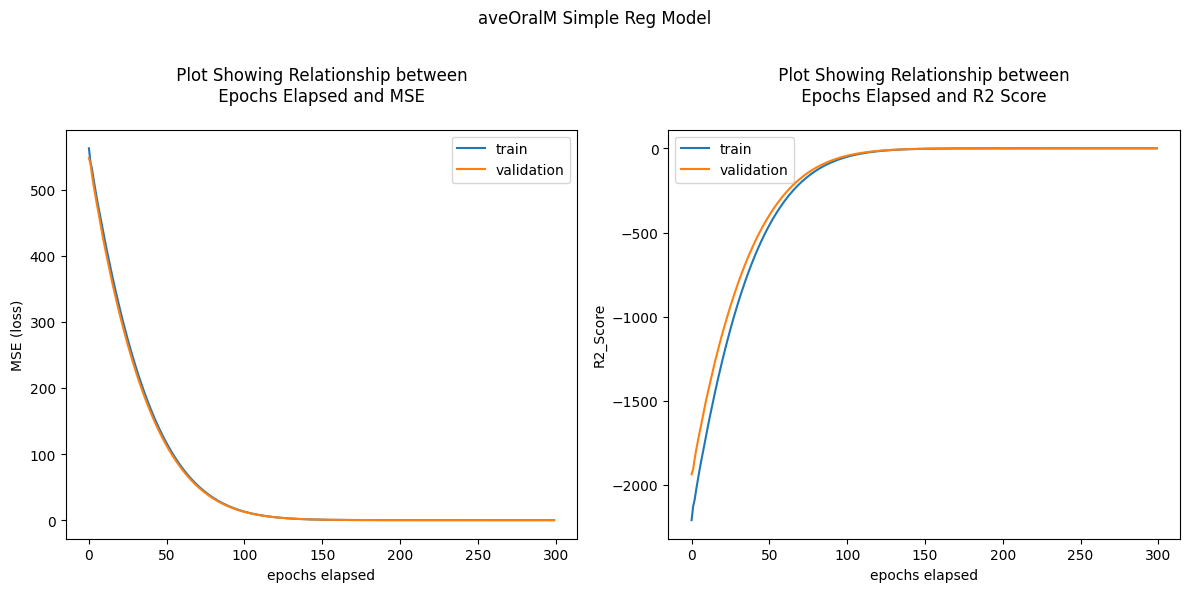

In [78]:
# display history training data - aveOralM Simple Reg Model

#print(history.history.keys())

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# summarize history for mse
axs[0].plot(aveOralM_simple_history.history['mse'])
axs[0].plot(aveOralM_simple_history.history['val_mse'])
axs[0].set_title('\n Plot Showing Relationship between \n Epochs Elapsed and MSE \n')
axs[0].set_ylabel('MSE (loss)')
axs[0].set_xlabel('epochs elapsed')
axs[0].legend(['train', 'validation'])

# summarize history for r2score
axs[1].plot(aveOralM_simple_history.history["r2_score"])
axs[1].plot(aveOralM_simple_history.history["val_r2_score"])
axs[1].set_title('\n Plot Showing Relationship between \n Epochs Elapsed and R2 Score \n')
axs[1].set_ylabel('R2_Score')
axs[1].set_xlabel('epochs elapsed')
axs[1].legend(['train', 'validation'])

plt.suptitle("aveOralM Simple Reg Model");

testFig = BytesIO();

fig.tight_layout();
plt.savefig(testFig, format='PNG', bbox_inches='tight');
plt.close();

display(Markdown("</br>"));
display(HTML(f"<center><img src='data:image/png;base64,{base64.b64encode(testFig.getvalue()).decode()}'></center>"))

r2_scores = {"Train": aveOralM_simple_history.history["r2_score"][-1],"Validation": aveOralM_simple_history.history["val_r2_score"][-1]}
mse = {"Train": aveOralM_simple_history.history["mse"][-1],"Validation": aveOralM_simple_history.history["val_mse"][-1]}

nn_reg_stats = pd.DataFrame([mse, r2_scores], index = ["MSE", "R2"]).transpose();

display(HTML(f"<div style='display:flex; justify-content:center'>{nn_reg_stats.to_html()}</div>"));

The final model performs among the best on par with the ElasticNet polynomial model achieving an R2 of ~0.76 on the Training and data and ~0.78 on the validation data. This model will be further evaluated as part of the testing model set.  

In [79]:
# add neural network model for testing
best_models_reg_m["Multi"]["All"]["Neural_Network_No_Hidden"] = best_nn_reg_simple_m

--- 

**<center> aveOralF</center>**

The model for aveOralF is also trained further till convergence:

In [80]:
# Train the aveOralF model for 300 Epochs
best_nn_reg_simple_f = reg_tuner_simple_f.get_best_models()[0]
best_nn_reg_simple_f.optimizer.learning_rate.assign(0.2)
keras.utils.set_random_seed(48)
history = best_nn_reg_simple_f.fit(train_x_reg,train_y_reg["aveOralF"], 
                    epochs = 300, 
                    verbose = 0, 
                    batch_size = 256, 
                    validation_data = (val_x_reg, val_y_reg["aveOralF"]),
                    
                    #callbacks= [keras.callbacks.EarlyStopping(monitor="mse", mode="min", patience=30)] #monitor=prMetric.name
               );

aveOralF_simple_history = history;

/home/matve/ml-coursework/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


</br>


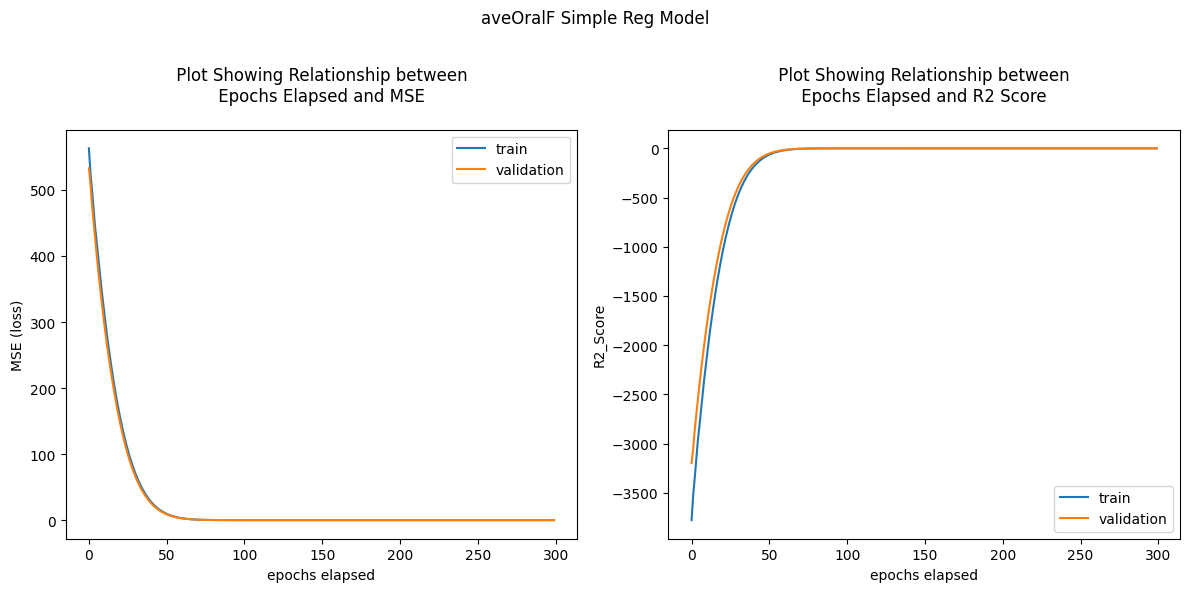

In [81]:
# list all data in history
#print(history.history.keys())
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

plt.suptitle("aveOralF Simple Reg Model");

# summarize history for mse
axs[0].plot(aveOralF_simple_history.history['mse'])
axs[0].plot(aveOralF_simple_history.history['val_mse'])
axs[0].set_title('\n Plot Showing Relationship between \n Epochs Elapsed and MSE \n')
axs[0].set_ylabel('MSE (loss)')
axs[0].set_xlabel('epochs elapsed')
axs[0].legend(['train', 'validation'])

# summarize history for r2score
axs[1].plot(aveOralF_simple_history.history["r2_score"])
axs[1].plot(aveOralF_simple_history.history["val_r2_score"])
axs[1].set_title('\n Plot Showing Relationship between \n Epochs Elapsed and R2 Score \n')
axs[1].set_ylabel('R2_Score')
axs[1].set_xlabel('epochs elapsed')
axs[1].legend(['train', 'validation'])

fig.tight_layout();

testFig = BytesIO();
plt.savefig(testFig, format='PNG', bbox_inches='tight');
plt.close();



display(Markdown("</br>"));
display(HTML(f"<center><img src='data:image/png;base64,{base64.b64encode(testFig.getvalue()).decode()}'></center>"))

r2_scores = {"Train": aveOralF_simple_history.history["r2_score"][-1],"Validation": aveOralF_simple_history.history["val_r2_score"][-1]}
mse = {"Train": aveOralF_simple_history.history["mse"][-1],"Validation": aveOralF_simple_history.history["val_mse"][-1]}

nn_reg_stats = pd.DataFrame([mse, r2_scores], index = ["MSE", "R2"]).transpose();

display(HTML(f"<div style='display:flex; justify-content:center'>{nn_reg_stats.to_html()}</div>"));

Similarily to the aveOralM model the simple neural network for aveOralF performs among the top scoring slightly under the LassoCV polynomial model with ~0.59 as oppossed to ~0.63. This model with be added for further testing against the test set.

In [82]:
# add neural network model for testing
best_models_reg_f["Multi"]["All"]["Neural_Network_No_Hidden"] = best_nn_reg_simple_f

###### E.2 - Neural Network - One Hidden

--- 

First a model will be developed to allow the selection of hyperparameters for the neural network using keras tuner. These parameters include the activation functions at each layer, weight initializers consisting of he initialization as the model will use relu derivative activation functions. In addition the weight of the l1 and l2 regularization will be explored. A more complicated model is created with a concatanate layer and non linear features. This is based on the finding in the previous sections of having certain top features having potentially polynomial relationships and linear relationships. By having a last concatenate layer both the input layers linear features and the transformed features by the neural network can be used in tandem for the final output.

**<center> aveOralM</center>**

First the parameters for the aveOralM model are tuned using keras tuner:

In [92]:
# Tune Model Hyperparameters using Keras Tuner

reg_tuner_poly_m = keras_tuner.RandomSearch(
    ResidualRegHyperModel(train_x_reg.to_numpy()),
    objective= keras_tuner.Objective('mse', direction='min'),
    max_trials=20,
    overwrite=True)

reg_tuner_poly_m.search(train_x_reg, 
             train_y_reg["aveOralM"], 
             epochs=70, 
             validation_data=(val_x_reg, val_y_reg["aveOralM"]), 
)

Trial 20 Complete [00h 00m 11s]
mse: 0.4458078145980835

Best mse So Far: 0.06475113332271576
Total elapsed time: 00h 03m 30s


In [93]:
# best hyperparameters - aveOralM poly model
reg_tuner_poly_m.get_best_hyperparameters()[0].values

{'units1': 16,
 'activation_function': 'tanh',
 'weight_init': 'he_uniform',
 'l1_kernel': 0.001,
 'l2_kernel': 0.1,
 'l1_bias': 0.01,
 'l2_bias': 0.01,
 'l1_kernel3': 0.01,
 'l2_kernel3': 1e-05,
 'l1_bias3': 0.01,
 'l2_bias3': 0.001}

In [85]:
# summary of best aveOralM poly model
best_nn_reg_poly_m = reg_tuner_poly_m.get_best_models()[0]
best_nn_reg_poly_m.summary();

/home/matve/ml-coursework/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ temperature_inputs  │ (None, 38)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 38)        │         77 │ temperature_inpu… │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 16)        │        624 │ normalization[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 54)        │          0 │ dense[0][0],      │
│ (Concatenate)       │                   │            │ normalization[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ temperature_predic… │ (None, 1)         │         55 │ concatenate[0][0] │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 756 (2.96 KB)

 Trainable params: 679 (2.65 KB)

 Non-trainable params: 77 (312.00 B)

--- 

**<center> aveOralF</center>**

Next, the hyperparameters are found for the aveOralF model:

In [97]:
# Tune aveOralF poly Model Hyperparameters using Keras Tuner

reg_tuner_poly_f = keras_tuner.RandomSearch(
    ResidualRegHyperModel(train_x_reg.to_numpy()),
    objective= keras_tuner.Objective('mse', direction='min'),
    max_trials=20,
    overwrite=True)

reg_tuner_poly_f.search(train_x_reg, 
             train_y_reg["aveOralF"], 
             epochs=50, 
             validation_data=(val_x_reg, val_y_reg["aveOralF"]), 
)

Trial 20 Complete [00h 00m 09s]
mse: 0.0881945937871933

Best mse So Far: 0.07294996827840805
Total elapsed time: 00h 02m 50s


In [87]:
# best hyperparameters - aveOralF poly model
reg_tuner_poly_f.get_best_hyperparameters()[0].values

{'units1': 16,
 'activation_function': 'selu',
 'weight_init': 'he_normal',
 'l1_kernel': 0.1,
 'l2_kernel': 0.1,
 'l1_bias': 0.1,
 'l2_bias': 0.001,
 'l1_kernel3': 0.0001,
 'l2_kernel3': 1e-05,
 'l1_bias3': 0.001,
 'l2_bias3': 1e-05}

In [88]:
# summary of best aveOralF poly model
best_nn_reg_poly_f = reg_tuner_poly_f.get_best_models()[0]
best_nn_reg_poly_f.summary();

/home/matve/ml-coursework/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ temperature_inputs  │ (None, 38)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 38)        │         77 │ temperature_inpu… │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 16)        │        624 │ normalization[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 54)        │          0 │ dense[0][0],      │
│ (Concatenate)       │                   │            │ normalization[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ temperature_predic… │ (None, 1)         │         55 │ concatenate[0][0] │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 756 (2.96 KB)

 Trainable params: 679 (2.65 KB)

 Non-trainable params: 77 (312.00 B)

--- 

**<center> aveOralM </center>**

Next the best hyperparameter models are trained further, till best MSE for aveOralM model:

In [94]:
# Train the aveOralM poly model for 100 Epochs
best_nn_reg_poly_m = reg_tuner_poly_m.get_best_models()[0]
best_nn_reg_poly_m.optimizer.learning_rate.assign(0.001)
keras.utils.set_random_seed(812)
history = best_nn_reg_poly_m.fit(train_x_reg,train_y_reg["aveOralM"], 
                    epochs = 15, 
                    verbose = 0, 
                    batch_size = 128, 
                    validation_data = (val_x_reg, val_y_reg["aveOralM"]),
                    
                    #callbacks= [keras.callbacks.EarlyStopping(monitor="mse", mode="min", patience=30)] #monitor=prMetric.name
               );
aveOralM_poly_history = history

/home/matve/ml-coursework/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))



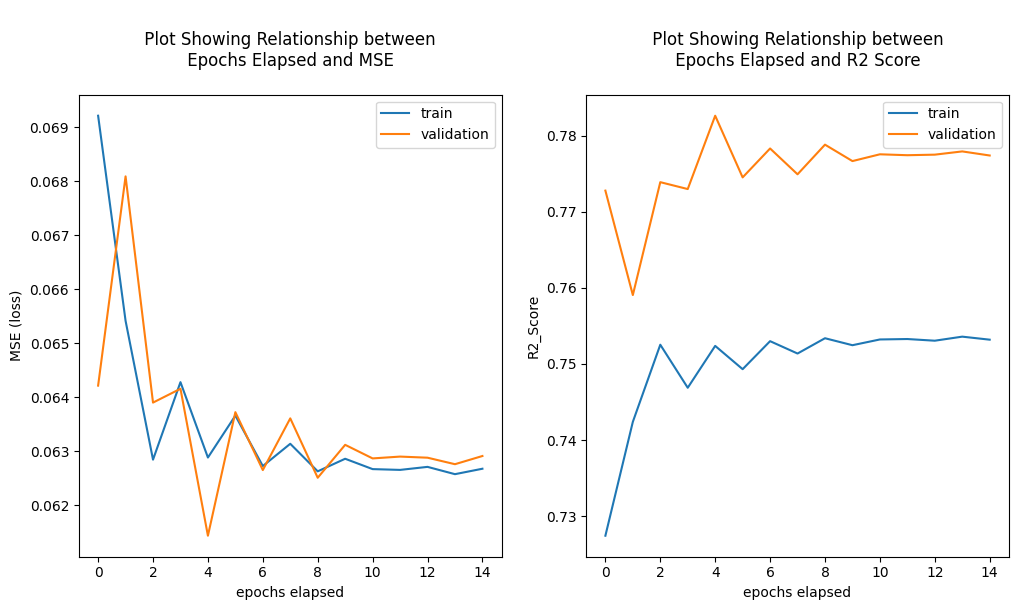

In [95]:
# list all data in history
#print(history.history.keys())

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# summarize history for mse
axs[0].plot(aveOralM_poly_history.history['mse'])
axs[0].plot(aveOralM_poly_history.history['val_mse'])
axs[0].set_title('\n Plot Showing Relationship between \n Epochs Elapsed and MSE \n')
axs[0].set_ylabel('MSE (loss)')
axs[0].set_xlabel('epochs elapsed')
axs[0].legend(['train', 'validation'])

# summarize history for r2score
axs[1].plot(aveOralM_poly_history.history["r2_score"])
axs[1].plot(aveOralM_poly_history.history["val_r2_score"])
axs[1].set_title('\n Plot Showing Relationship between \n Epochs Elapsed and R2 Score \n')
axs[1].set_ylabel('R2_Score')
axs[1].set_xlabel('epochs elapsed')
axs[1].legend(['train', 'validation'])

testFig = BytesIO();
plt.savefig(testFig, format='PNG', bbox_inches='tight');
plt.close();
display(HTML(f"<center><img src='data:image/png;base64,{base64.b64encode(testFig.getvalue()).decode()}'></center>"))

r2_scores = {"Train": aveOralM_poly_history.history["r2_score"][-1],"Validation": aveOralM_poly_history.history["val_r2_score"][-1]}
mse = {"Train": aveOralM_poly_history.history["mse"][-1],"Validation": aveOralM_poly_history.history["val_mse"][-1]}

nn_reg_stats = pd.DataFrame([mse, r2_scores], index = ["MSE", "R2"]).transpose();

display(HTML(f"<div style='display:flex; justify-content:center'>{nn_reg_stats.to_html()}</div>"));

As it can be seen from the table above the performance of this model is comparable to the simple neural network found in the previous section both achieving a ~0.75 R2 while others achieved ~0.73. Although the performance on the validation set is good the model will be added to be evaluated to be compared against the other more simple models.

In [98]:
# add neural network model for testing
best_models_reg_m["Multi"]["All"]["Neural_Network_One_Hidden"] = best_nn_reg_poly_m;

--- 

**<center> aveOralF </center>**

Next the aveOralF model is trained:

In [99]:
# Train the aveOralM poly model for 40 Epochs
best_nn_reg_poly_f = reg_tuner_poly_f.get_best_models()[0]
best_nn_reg_poly_f.optimizer.learning_rate.assign(0.01)
keras.utils.set_random_seed(462)
history = best_nn_reg_poly_f.fit(train_x_reg,train_y_reg["aveOralF"], 
                    epochs = 40, 
                    verbose = 0, 
                    batch_size = 128, 
                    validation_data = (val_x_reg, val_y_reg["aveOralF"]),
                    
                    #callbacks= [keras.callbacks.EarlyStopping(monitor="mse", mode="min", patience=30)] #monitor=prMetric.name
               );
aveOralF_poly_history = history

/home/matve/ml-coursework/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))



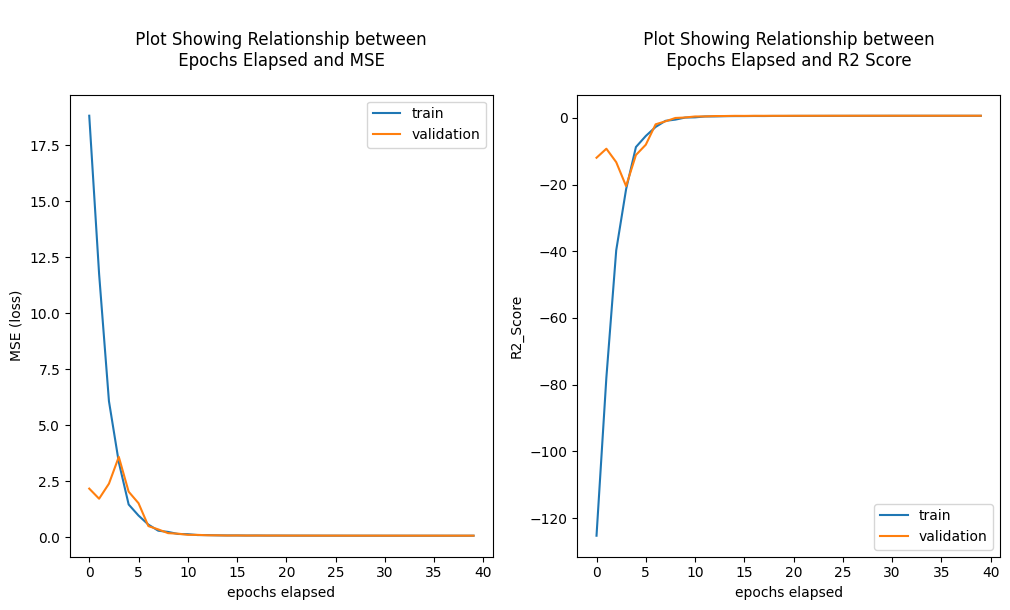

In [100]:
# list all data in history
#print(history.history.keys())

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# summarize history for mse
axs[0].plot(aveOralF_poly_history.history['mse'])
axs[0].plot(aveOralF_poly_history.history['val_mse'])
axs[0].set_title('\n Plot Showing Relationship between \n Epochs Elapsed and MSE \n')
axs[0].set_ylabel('MSE (loss)')
axs[0].set_xlabel('epochs elapsed')
axs[0].legend(['train', 'validation'])

# summarize history for r2score
axs[1].plot(aveOralF_poly_history.history["r2_score"])
axs[1].plot(aveOralF_poly_history.history["val_r2_score"])
axs[1].set_title('\n Plot Showing Relationship between \n Epochs Elapsed and R2 Score \n')
axs[1].set_ylabel('R2_Score')
axs[1].set_xlabel('epochs elapsed')
axs[1].legend(['train', 'validation'])

testFig = BytesIO();
plt.savefig(testFig, format='PNG', bbox_inches='tight');
plt.close();
display(HTML(f"<center><img src='data:image/png;base64,{base64.b64encode(testFig.getvalue()).decode()}'></center>"))

r2_scores = {"Train": aveOralF_poly_history.history["r2_score"][-1],"Validation": aveOralF_poly_history.history["val_r2_score"][-1]}
mse = {"Train": aveOralF_poly_history.history["mse"][-1],"Validation": aveOralF_poly_history.history["val_mse"][-1]}

nn_reg_stats = pd.DataFrame([mse, r2_scores], index = ["MSE", "R2"]).transpose();

display(HTML(f"<div style='display:flex; justify-content:center'>{nn_reg_stats.to_html()}</div>"));

Simillar to the aveOralM model the aveOralF model also experiences unstable training reaching lowest mse at epoch 40. Although the performance is comparable to the simpler model with 0.02 R2 improvement, the model will be evaluated on the test set on unseen data.  

In [101]:
# add neural network model for testing
best_models_reg_f["Multi"]["All"]["Neural_Network_One_Hidden"] = best_nn_reg_poly_f;

##### F - Random Forest

--- 

Random Forest was choosen as an ensemble method to investigate the effect of multiple desicion trees on the prediction of aveOralM and aveOralF temperatures. 

**<center> aveOralM </center>**

In [102]:
# Find best parameters for Random Forrest - aveOralM

param_grid_rf_reg_m = {
    'n_estimators': [50, 100, 200],            
    'max_depth': [None,5,10, 20],               
    'min_samples_split': [2, 5, 10],           
    'min_samples_leaf': [1, 2, 4, 8, 10],             
    'max_features': ['sqrt', 'log2'],  
}

rf_reg_m = RandomForestRegressor(random_state=42)

grid_search_reg_m = GridSearchCV(rf_reg_m, param_grid_rf_reg_m, 
                           cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_reg_m.fit(train_x_processed, train_y["aveOralM"])

rf_reg_best_m = grid_search_reg_m.best_estimator_;
rf_reg_best_m.fit(train_x_processed, train_y["aveOralM"]);

print(grid_search_reg_m.best_params_)

{'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}



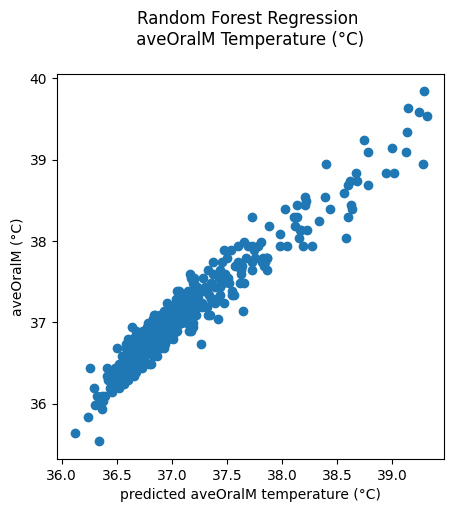

In [103]:
# Plot Random Forrest Predictions - aveOralM

plt.scatter(rf_reg_best_m.predict(train_x_processed), train_y["aveOralM"]);
plt.title(f"Random Forest Regression \n aveOralM Temperature (°C) \n")
plt.ylabel("aveOralM (°C)")
plt.xlabel(f"predicted aveOralM temperature (°C)");
testFig = BytesIO();
plt.savefig(testFig, format='PNG', bbox_inches='tight');
plt.close();

r2_score = sk.metrics.r2_score(train_y["aveOralM"],rf_reg_best_m.predict(train_x_processed))
mse = MSE(train_y["aveOralM"],rf_reg_best_m.predict(train_x_processed))

rf_reg_stats_m = pd.DataFrame([mse, r2_score], index = ["MSE", "R2"]).transpose();

display(HTML(f"<center><img src='data:image/png;base64,{base64.b64encode(testFig.getvalue()).decode()}'></center>"))
display(HTML(f"<center>{rf_reg_stats_m.to_html()}</center>"))

In [104]:
# add aveOralM - Random Forest for testing
best_models_reg_m["Multi"]["All"]["Random Forest"] = rf_reg_best_m;

--- 

**<center> aveOralF </center>**

In [105]:
# Find best parameters for Random Forrest - aveOralF

param_grid_rf_reg_f = {
    'n_estimators': [50, 100, 200],            
    'max_depth': [None,5,10, 20],               
    'min_samples_split': [2, 5, 10, 20],           
    'min_samples_leaf': [1, 2, 4, 8, 10],             
    'max_features': ['sqrt', 'log2'],  
}

rf_reg_f = RandomForestRegressor(random_state=42)

grid_search_reg_f = GridSearchCV(rf_reg_f, param_grid_rf_reg_f, 
                           cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_reg_f.fit(train_x_processed, train_y["aveOralF"])

rf_reg_best_f = grid_search_reg_f.best_estimator_;
rf_reg_best_f.fit(train_x_processed, train_y["aveOralF"]);

print(grid_search_reg_f.best_params_)

{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 20, 'n_estimators': 50}



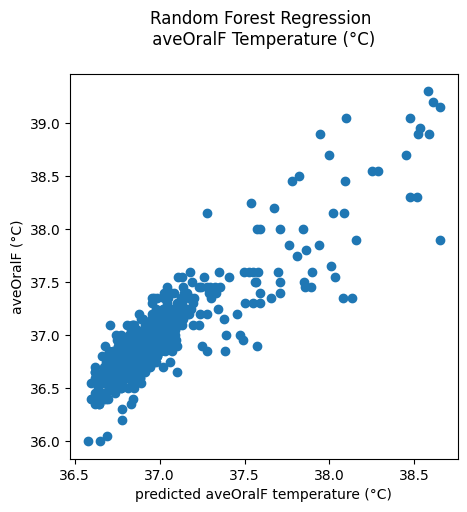

In [106]:
# Plot Random Forrest Predictions - aveOralF

plt.scatter(rf_reg_best_f.predict(train_x_processed), train_y["aveOralF"]);
plt.title(f"Random Forest Regression \n aveOralF Temperature (°C) \n")
plt.ylabel("aveOralF (°C)")
plt.xlabel(f"predicted aveOralF temperature (°C)");
testFig = BytesIO();
plt.savefig(testFig, format='PNG', bbox_inches='tight');
plt.close();

r2_score = sk.metrics.r2_score(train_y["aveOralF"],rf_reg_best_f.predict(train_x_processed))
mse = MSE(train_y["aveOralF"],rf_reg_best_f.predict(train_x_processed))

rf_reg_stats_f = pd.DataFrame([mse, r2_score], index = ["MSE", "R2"]).transpose();

display(HTML(f"<center><img src='data:image/png;base64,{base64.b64encode(testFig.getvalue()).decode()}'></center>"))
display(HTML(f"<center>{rf_reg_stats_f.to_html()}</center>"))

In [107]:
# add aveOralF - Random Forest for testing
best_models_reg_f["Multi"]["All"]["Random Forest"] = rf_reg_best_f;

#### 4.1.3 Model Evaluation
--- 

##### A - Predicting aveOralM
--- 

In [108]:
# Set up interval 37 Degrees
interval_test_y = test_y[(test_y["aveOralM"]>37)]
interval_test_x = test_x.loc[interval_test_y.index]

In [109]:
# predicting aveOralM MSE, R2 Table

test_set_models_stats_m = [];
best_model_reg_m = LinearRegression();
best_r2_reg_m = 0;

for featureTypes in best_models_reg_m:
    for feature in best_models_reg_m[featureTypes]:
        for modelName,model in best_models_reg_m[featureTypes][feature].items():
            
            model_stats_test = pd.DataFrame();

            if featureTypes == "Single":
                pred = model.predict(test_x[feature].to_numpy().reshape(-1,1));
                pred_interval = model.predict(test_x[feature].loc[interval_test_y.index].to_numpy().reshape(-1,1));
                
            elif featureTypes == "Multi":
                if feature == "All":
                    pred = model.predict(test_x_processed);
                    pred_interval = model.predict(test_x_processed.loc[interval_test_y.index]);
                    
            elif featureTypes == "MultiPoly":
                if feature == "Top5Features":
                    if "Neural" in modelName:
                        
                        poly_features = PolynomialFeatures(degree=2, include_bias=False);
                        poly_test = poly_features.fit_transform(test_x_processed[top5Features["reg_aveOralM"]]);
                        pred = model.predict(poly_test);
                        
                        
                        pred_interval = model.predict(poly_test.loc[interval_test_y.index]);
                        
                    else:
                        # model performs polynomial features as part of pipeline
                        pred = model.predict(test_x_processed[top5Features["reg_aveOralM"]]);
                        pred_interval = model.predict(test_x_processed[top5Features["reg_aveOralM"]].loc[interval_test_y.index]);
                        

      
            model_stats_test["MSE"] = [MSE(test_y["aveOralM"], pred)];
            model_stats_test["R2"] = [sk.metrics.r2_score(test_y["aveOralM"], pred)];

            model_stats_test["MSE_Interval"] = [MSE(interval_test_y["aveOralM"], pred_interval)];
            model_stats_test["R2_Interval"] = [sk.metrics.r2_score(interval_test_y["aveOralM"], pred_interval)];
            
            
            model_stats_test.index = [modelName];

            if best_r2_reg_m < model_stats_test["R2"].to_numpy():
                best_r2_reg_m = model_stats_test["R2"].to_numpy();
                best_model_reg_m = model;
            

            test_set_models_stats_m.append(model_stats_test);

                        
final_reg_model_stats_m = pd.concat(test_set_models_stats_m)
final_reg_model_stats_m = final_reg_model_stats_m.sort_values("R2", ascending= False)
display(HTML(f"<div style='display:flex; justify-content:center;'>{final_reg_model_stats_m.to_html()}</div>"));

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Most models achieved predictive power by beating the mean predicting baseline achieving $\text{R}^2$ ~0.66-0.75 beating the baseline showing predictive power, suggesting mostly appropriate model choices. The neural network with one hidden layer may have had an inappropriate architecture with the concatenate layer leading to overfitting, as the architecture of this network was too complicated for the problem at hand is at has been successfully captured by linear models. The simpler neural network with no hidden layers performs much better reaching an $\text{R}^2$ value ~0.70.

The best overall model in predicting aveOralM is a polynomial linear regression of degree 2 regularized via ElasticNet, as it achieves the highest  $\text{R}^2$ value ~0.75. Random Forest and the Single T_Max1 polynomial model both achieve a $\text{R}^2$ value ~0.74. The No Hidden Neural Network and Linear Regression with elastic net also have similar architectures and therefore achieve a $\text{R}^2$ score of ~0.70 and ~0.72 respectively. The T_Max1 single feature models perform equally well with the polynomial and linear regression achieving a $\text{R}^2$ score of ~0.69. Overall this suggests that the relationship between aveOralM and the features can be sufficiently captured by a linear model, as linear and polynomial models performed on par or better than more complicated neural networks during exploration of possible architectures. 

Furthermore the ElasticNet degree 2 had the best $\text{R}^2$ for predictions above 37 degrees which had much fewer examples due to being an imbalanced dataset. On the otherhand Random Forest performed worse on the interval compared to the single feature polynomial model with Degree 3 and all feature linear Regression with ElasticNet, further suggesting a linear relationship between the aveOralM target and the features.

The best model can also depend on the interpretability metric. If a model is required to be interpretable the single feature linear regression model achieves an appropriate MSE for a model that can be inferenced via one feature. Alternatively models such as the canthiMax1 model found in the previous section achieved above baseline $\text{R}^2$ and MSE metric scores allowing a model to be built from fewer facial temperature readings, as T_Max1 relies on the maximum of all readings. Alternatively for best MSE the polynomial ElasticNet degree 2 model provided the most consistent results in cross validation and test set.

##### B - Predicting aveOralF
--- 

In [110]:
# predicting aveOralF MSE, R2 Table

test_set_models_stats_f = [];

for featureTypes in best_models_reg_f:
    for feature in best_models_reg_f[featureTypes]:
        for modelName,model in best_models_reg_f[featureTypes][feature].items():
            
            model_stats_test = pd.DataFrame();

            if featureTypes == "Single":
                pred = model.predict(test_x[feature].to_numpy().reshape(-1,1));
                pred_interval = model.predict(test_x[feature].loc[interval_test_y.index].to_numpy().reshape(-1,1));
            elif featureTypes == "Multi":
                if feature == "All":
                    pred = model.predict(test_x_processed);
                    pred_interval = model.predict(test_x_processed.loc[interval_test_y.index]);
                    
            elif featureTypes == "MultiPoly":
                if feature == "Top5Features":
                    if "Neural" in modelName:
                        
                        poly_features = PolynomialFeatures(degree=2, include_bias=False);
                        poly_test = poly_features.fit_transform(test_x_processed[top5Features["reg_aveOralF"]]);
                        pred = model.predict(poly_test);

                        pred_interval = model.predict(poly_test.loc[interval_test_y.index]);
                        
                    else:
                        print(modelName)
                        pred = model.predict(test_x_processed[top5Features["reg_aveOralF"]]);
                        pred_interval = model.predict(test_x_processed[top5Features["reg_aveOralF"]].loc[interval_test_y.index]);
                        

            model_stats_test["MSE"] = [MSE(test_y["aveOralF"], pred)];
            model_stats_test["R2"] = [sk.metrics.r2_score(test_y["aveOralF"], pred)];

            model_stats_test["MSE_Interval"] = [MSE(interval_test_y["aveOralF"], pred_interval)];
            model_stats_test["R2_Interval"] = [sk.metrics.r2_score(interval_test_y["aveOralF"], pred_interval)];
            
            model_stats_test.index = [modelName];

            test_set_models_stats_f.append(model_stats_test);

                        
final_reg_model_stats_f = pd.concat(test_set_models_stats_f)
final_reg_model_stats_f = final_reg_model_stats_f.sort_values("R2", ascending= False)
display(HTML(f"<div style='display:flex; justify-content:center;'>{final_reg_model_stats_f.to_html()}</div>"));

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Polynomial_Regression_ElasticNetCV_Degree_2


Most models achieved predictive power with $\text{R}^2$ values falling in the range ~0.42-0.68. However the neural network with the hidden layer may have had a too complex architecture for the problem of capturing the simple linear relationship between aveOralF and the features achieving a $\text{R}^2$ of ~0.009 which is below the mean predicting baselines ~0.39 . The best model was the ElasticNet, degree 2 on all features followed by the linear regression with lasso, achieving  $\text{R}^2$ values of ~0.68 and ~0.61 respectively suggesting a linear relationship. Next the random forest proved effective at capturing the relationship however as with aveOralM, at temperatures above 37 degrees the model performs worse than the linear and polynomial models on all features.

In terms of model interpretability the simple T_Max1 Linear Regression also effectively captures the relationship performing better than both neural networks. However if a more accurate model is needed the Polynomial ElasticNet, degree 2 model consistently performs well on the > 37 interval $\text{R}^2$ ~0.67 and the whole test set $\text{R}^2$ ~0.68.

--- 

Overall for both aveOralM and aveOralF simpler linear models tended to perform better as opposed to their neural network counterparts with polynomial featues with ElasticNetCV Degree 2 achieving the best performance on  the test set.

### 4.2 Predicting Febrile Patients Based on aveOralM and aveOralF
--- 

In [111]:
# Dictionary Holding Best Classification Models
best_models_clf_m =  collections.defaultdict(lambda : collections.defaultdict(dict));
best_models_clf_f =  collections.defaultdict(lambda : collections.defaultdict(dict));

#### 4.2.1 Baseline Definition
--- 

Given that the fever classification problem consists of a binary classification problem an appropriate baseline would be to consider a random classifier that predicts a febrile patient 50% of the time. However since the dataset is imbalanced with only 10.88% of the patients being febrile, a more appropriate baseline is to consider a classifier that predicts a non febrile patient 100% of the time leading to an accuracy of 89.1% to beat aveOralM and 94.2% on aveOralF. This suggests that accuracy is not an appropriate metric for this imbalanced data set.

</br>


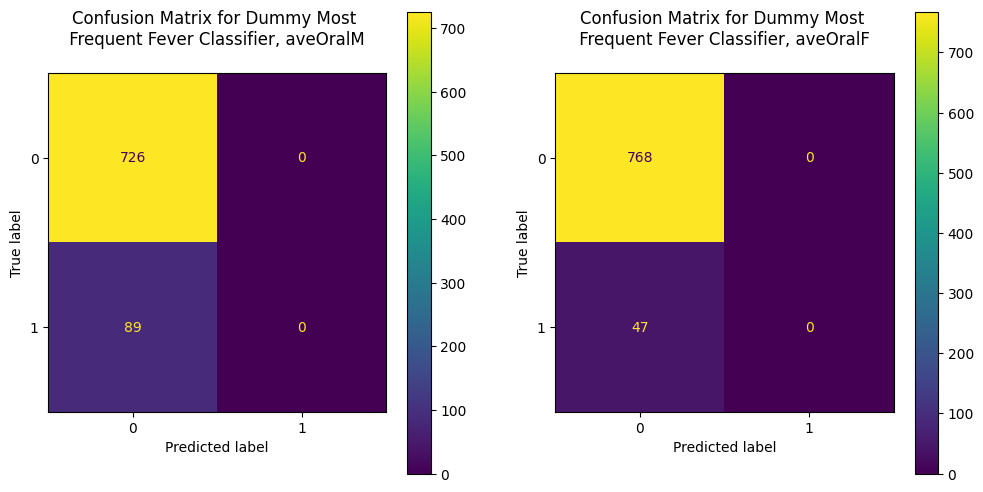

--- 
 </br>

In [112]:
# Create and Plot Dummy Classifier

from sklearn.dummy import DummyClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

classifierDummy = DummyClassifier(strategy="most_frequent");
classifierDummy.fit(train_x["T_Max1"], train_y["aveOralM_fever"])

ConfusionMatrixDisplay(confusion_matrix(train_y["aveOralM_fever"], classifierDummy.predict(train_x["T_Max1"]))).plot(ax=axs[0]);
axs[0].set_title("Confusion Matrix for Dummy Most \n Frequent Fever Classifier, aveOralM \n");



# --------------------------------------------------------------------------------------------------
                                                # aveOralF
#--------------------------------------------------------------------------------------------------

classifierDummy = DummyClassifier(strategy="most_frequent");
classifierDummy.fit(train_x["T_Max1"], train_y["aveOralF_fever"])

ConfusionMatrixDisplay(confusion_matrix(train_y["aveOralF_fever"], classifierDummy.predict(train_x["T_Max1"]))).plot(ax=axs[1]);
axs[1].set_title("Confusion Matrix for Dummy Most \n Frequent Fever Classifier, aveOralF \n");

testFig = BytesIO();
plt.savefig(testFig, format='PNG', bbox_inches='tight');
plt.close();


display(Markdown("</br>"))

display(HTML(f"<center><img src='data:image/png;base64,{base64.b64encode(testFig.getvalue()).decode()}'></center>"))

accText = "aveOralM: Accuracy: " + str(round(classifierDummy.score(train_x["T_Max1"],train_y["aveOralM_fever"]),3));
display(HTML(f"<center>{accText}</center>"));

accText = "aveOralF: Accuracy: " + str(round(classifierDummy.score(train_x["T_Max1"],train_y["aveOralF_fever"]),3));
display(HTML(f"<center>{accText}</center>"));
display(Markdown("--- \n </br>"))

As the model will be used to classify patients during an epidemic, it would be considered to maximise recall, as preventing the spread of disease is more important than the false positive count. The baseline model exhibits poor recall as it primarily classifies into the most frequent class, this will be addressed by the developed models.

AUC-PR Curve and F1 score will be used as metrics, because precision unlike specificity does not contain true negative measurements, which are impactful in a imbalanced dataset with a small positive class as there are only ~10% febrile patients in aveOralM and ~6% in aveOralF.

#### 4.2.2 Model Selection
--- 

##### A - K-Nearest Neighbor
--- 

A simple model for classifying febrile patients can be nearest neighbor as an instance based approach. A way to pick a starting neighbor value a rule of thumb can be used as the $\sqrt{n\_samples} = \sqrt{816} \approx 29$

In [113]:
np.sqrt(train_x.shape[0])

np.float64(28.548204847240395)

Grid Search will be used to find the optimum number of neighbors using a cross validation based approach.

###### A.1 - KNN - Single Feature
--- 

**<center> aveOralM </center>**

First a KNN model with a single feature is developed for aveOralM:

T_Max1, {'n_neighbors': np.int64(62)}
canthiMax1, {'n_neighbors': np.int64(34)}
T_OR_Max1, {'n_neighbors': np.int64(33)}



 --- 


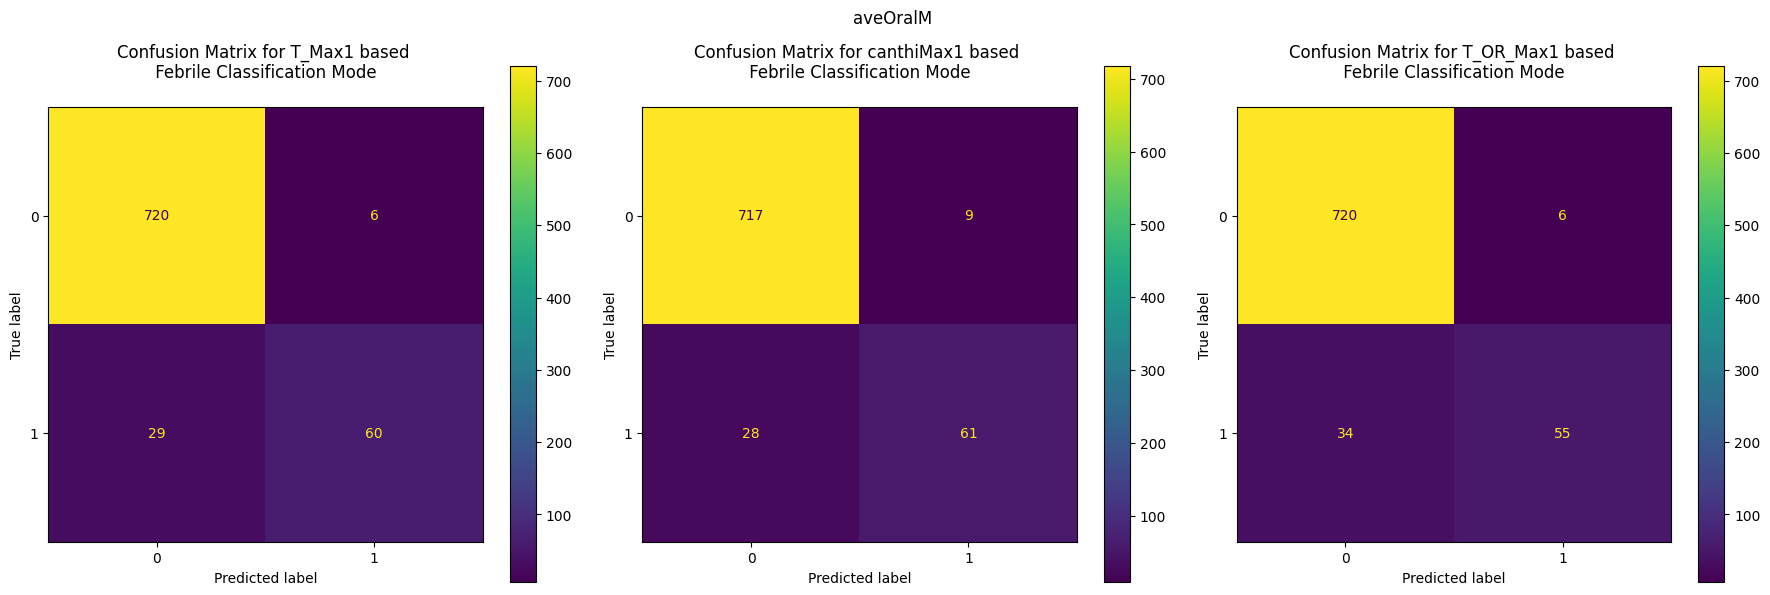


 --- 


T_Max1                                 canthiMax1  \
                   precision    recall  f1-score     support  precision   
score False         0.960053  0.993113  0.976303  726.000000   0.962466   
      True          0.921875  0.662921  0.771242   89.000000   0.884058   
      accuracy      0.957055  0.957055  0.957055    0.957055   0.955828   
      macro avg     0.940964  0.828017  0.873773  815.000000   0.923262   
      weighted avg  0.955884  0.957055  0.953910  815.000000   0.953904   

                                                   T_OR_Max1            \
                      recall  f1-score     support precision    recall   
score False         0.988981  0.975543  726.000000  0.953642  0.991736   
      True          0.685393  0.772152   89.000000  0.900000  0.606742   
      accuracy      0.955828  0.955828    0.955828  0.949693  0.949693   
      macro avg     0.837187  0.873848  815.000000  0.926821  0.799239   
      weighted avg  0.955828  0.953333  815.000000  0.947785  0.949693   

                                          
                    f1-score     support  
score False         0.972316  726.000000  
      True          0.724832   89.000000  
      accuracy      0.949693    0.949693  
      macro avg     0.848574  815.000000  
      weighted avg  0.945290  815.000000


 --- 


</br>


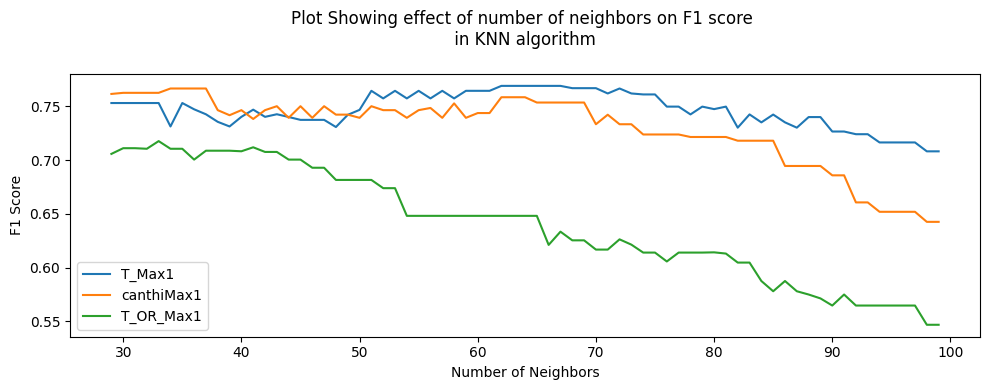


 --- 


In [114]:
# K Nearest Neighbor with GridSearchCV - for aveOralM models

from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

clf_model_dict_knn_m = {};
clf_knn_grid_results_m = {};

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

stat_tables_knn = pd.DataFrame();

for i,feature in enumerate(topFeatures_m):
    
    parameters = {'n_neighbors': np.arange(29,100,1)}

    knn_clf = KNeighborsClassifier();

    # find best parameters
    clf_grid_knn = GridSearchCV(knn_clf, parameters, scoring='f1', n_jobs = -1)
    clf_grid_knn.fit(train_x_processed[feature].to_numpy().reshape(-1,1), train_y["aveOralM_fever"].to_numpy());

    clf_knn_grid_results_m[feature] = clf_grid_knn.cv_results_

    # get best estimator
    knn_clf = clf_grid_knn.best_estimator_;
    print(f"{feature}, {clf_grid_knn.best_params_}")

    # perform 5-Fold Validation
    kfold = sk.model_selection.KFold(n_splits=5);

    avg_fold_stats = {};
    avg_fold_stats["confusion_matrix"] = [];
    for train, val in kfold.split(train_x_processed,train_y["aveOralM_fever"]):
        knn_clf_fold = sk.clone(knn_clf);
        knn_clf_fold.fit(train_x_processed.iloc[train][feature].to_numpy().reshape(-1,1), train_y.iloc[train]["aveOralM_fever"])
        avg_fold_stats["confusion_matrix"].append(
                                           confusion_matrix(
                                               train_y.iloc[val]["aveOralM_fever"], 
                                               knn_clf_fold.predict(train_x_processed.iloc[val][feature].to_numpy().reshape(-1,1)))
                                            )
    
    knn_clf.fit(train_x_processed.iloc[train][feature].to_numpy().reshape(-1,1), train_y.iloc[train]["aveOralM_fever"])
    ConfusionMatrixDisplay(np.sum(avg_fold_stats["confusion_matrix"], axis = 0)).plot(ax=axs[i]);
    axs[i].set_title(f"Confusion Matrix for {feature} based \n Febrile Classification Mode \n"); 
  

    stat_table_knn = pd.DataFrame(classification_report(train_y["aveOralM_fever"], knn_clf.predict(train_x_processed[feature].to_numpy().reshape(-1,1)),output_dict=True)).transpose();
    stat_table_knn.columns = pd.MultiIndex.from_product([[feature], stat_table_knn.columns])
    stat_table_knn.index = pd.MultiIndex.from_product([['score'], stat_table_knn.index])

    stat_tables_knn = pd.concat([stat_tables_knn, stat_table_knn], axis = 1);



    clf_model_dict_knn_m[feature] = knn_clf;

plt.suptitle("aveOralM \n");
fig.tight_layout();


display(Markdown("\n --- \n"));
plt.show();
display(Markdown("\n --- \n"));
display(stat_tables_knn)
display(Markdown("\n --- \n"));

fig = plt.figure(figsize=(10, 4))

for i,feature in enumerate(topFeatures_m):
    plt.plot([param["n_neighbors"] for param in clf_knn_grid_results_m[feature]["params"]],
             clf_knn_grid_results_m[feature]["mean_test_score"], label = feature)

plt.xlabel("Number of Neighbors");
plt.ylabel("F1 Score");
plt.legend();
plt.title("Plot Showing effect of number of neighbors on F1 score \n in KNN algorithm \n");

fig.tight_layout();


display(Markdown("</br>"));

testFig = BytesIO();
plt.savefig(testFig, format='PNG', bbox_inches='tight');
plt.close();
display(HTML(f"<center><img src='data:image/png;base64,{base64.b64encode(testFig.getvalue()).decode()}'></center>"))

display(Markdown("\n --- \n"));

From the graph it can be seen that F1 score performance begins to decrease with the addition of more neighbors for all features. For T_Max the optimum neighbor count was found to be 62, for canthiMax1 34 and for T_OR_Max1 33. The canthiMax1 model had the highest recall and F1 score at the default threshold, however alternative thresholds need to be investigated via AUC and PR-AUC curves.

--- 

Feature T_Max1, Best Threshold: 0.3548387096774194, F1-Score: 0.8160919540229884
Feature canthiMax1, Best Threshold: 0.4117647058823529, F1-Score: 0.7738095238095237
Feature T_OR_Max1, Best Threshold: 0.3333333333333333, F1-Score: 0.7485380116959065



 --- 


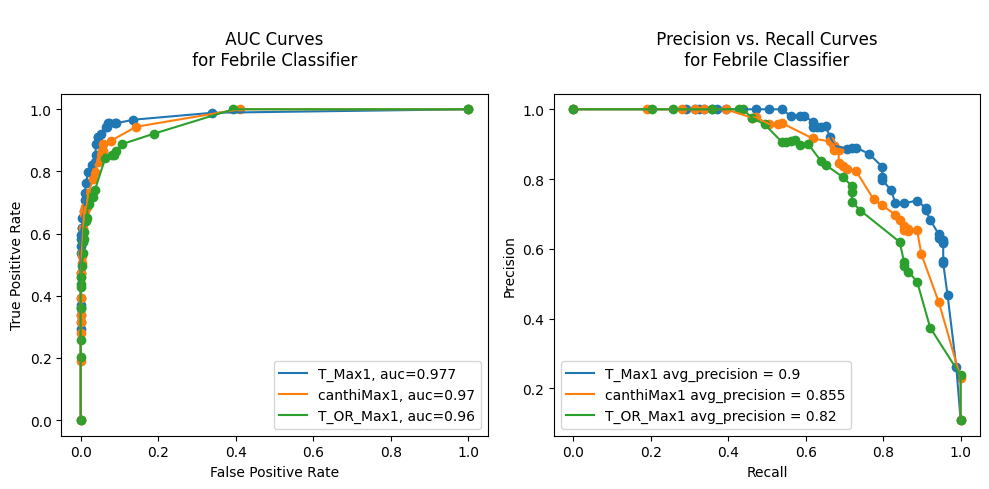


 --- 


In [206]:
# ROC, ROC-AUC, PR Curves for Nearest Neighbor - aveOralM

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

for feature, model in clf_model_dict_knn_m.items():
    
    preds = model.predict_proba(train_x_processed[feature].to_numpy().reshape(-1,1))[:,1]
    fpr, tpr, threshhold_auc  = sk.metrics.roc_curve(train_y["aveOralM_fever"], preds)
    
    auc = sk.metrics.roc_auc_score(train_y["aveOralM_fever"], preds)
    
    axs[0].scatter(fpr,tpr)
    axs[0].set_xlabel("False Positive Rate")
    axs[0].set_ylabel("True Posititve Rate")
    axs[0].set_title("\n AUC Curves \n for Febrile Classifier \n")
    axs[0].plot(fpr,tpr,label=f"{feature}, auc="+str(round(auc,3)))
    
    axs[0].legend(loc=4)


thresholds_knn_m = {};

for feature, model in clf_model_dict_knn_m.items():

    preds = model.predict_proba(train_x_processed[feature].to_numpy().reshape(-1,1))[:,1]
    pr_measure = sk.metrics.average_precision_score(train_y["aveOralM_fever"], preds)

    precision, recall, thresholds_pr = sk.metrics.precision_recall_curve(train_y["aveOralM_fever"], preds)

    # Selecting appropriate threshold
    f1_scores = 2*recall*precision / (recall+precision)
    best_f1_threshold = thresholds_pr[np.argmax(f1_scores)]

    thresholds_knn_m[feature] = best_f1_threshold;

    print(f"Feature {feature}, Best Threshold: {best_f1_threshold}, F1-Score: {f1_scores[np.argmax(f1_scores)]}");

    axs[1].scatter(recall,precision)
    axs[1].plot(recall,precision,label=f"{feature} avg_precision = {round(pr_measure,3)}")
    axs[1].set_xlabel("Recall");
    axs[1].set_ylabel("Precision");
    axs[1].set_title("\n Precision vs. Recall Curves \n for Febrile Classifier \n")
    axs[1].legend(loc=3)

fig.tight_layout();
display(Markdown("\n --- \n"));
plt.show()
display(Markdown("\n --- \n"));

#prt = pd.DataFrame([precision, recall, thresholds]).transpose().set_axis(["precision","recall", "thresholds"], axis=1)
#prt.sort_values(["recall","precision"], ascending = False)[prt["precision"]>0.2].head()

The best model for aveOralM is the T_Max1 model achieving the highest AUC-PR score with 0.9 with a threshold of ~0.354 achieving the best F1 Score of 0.816.

In [116]:
# add best model
best_models_clf_m["Single"]["T_Max1"]["KNN_T_Max1"] = {
                                                    "Model": clf_model_dict_knn_m["T_Max1"],
                                                    "Threshold": thresholds_knn_m["T_Max1"]
                                                }

--- 

**<center> aveOralF </center>**

Next Single Feature Clustering Models are trained for aveOralF consisting of T_Max1, T_OR1 and canthiMax1:

T_Max1, {'n_neighbors': np.int64(35)}
T_OR1, {'n_neighbors': np.int64(29)}
canthiMax1, {'n_neighbors': np.int64(29)}



 --- 


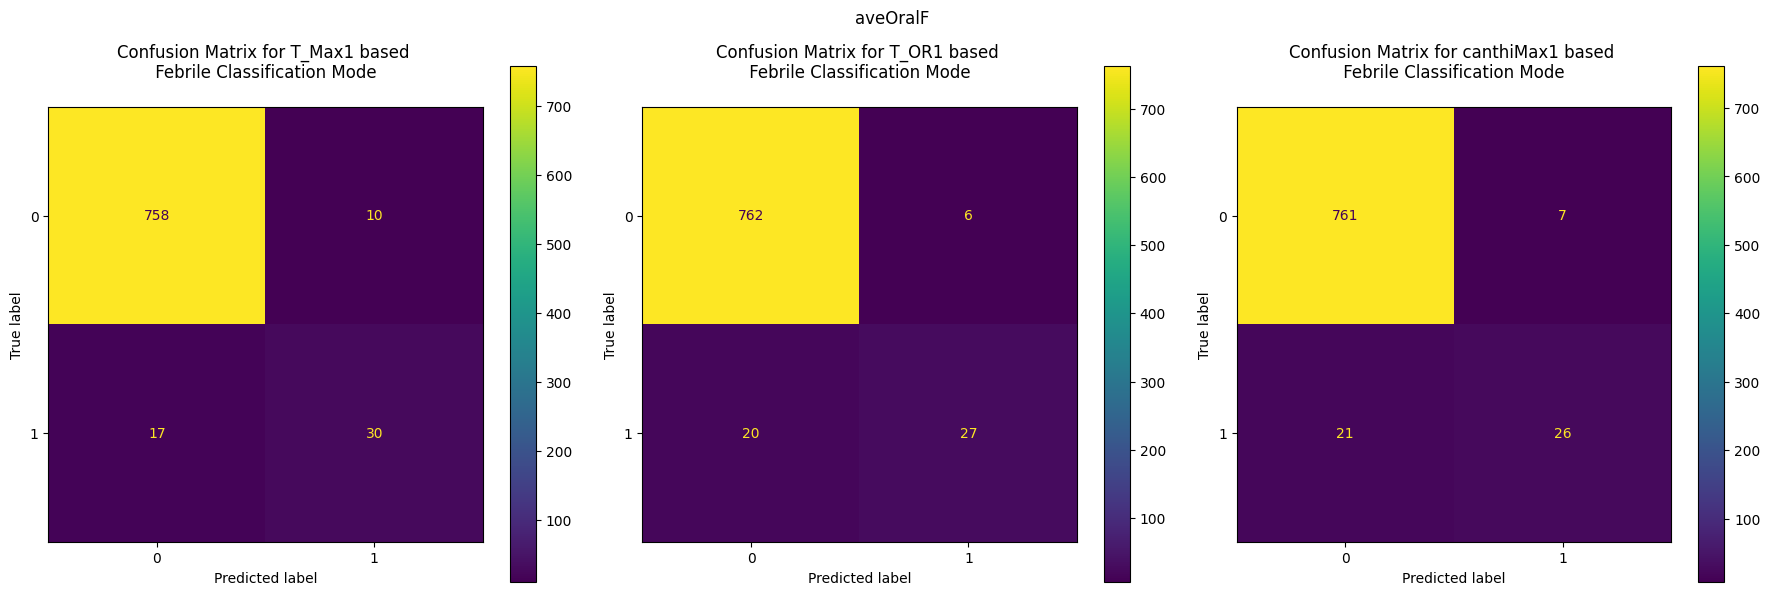


 --- 


T_Max1                                     T_OR1  \
                   precision    recall  f1-score     support precision   
score False         0.978065  0.986979  0.982502  768.000000  0.976893   
      True          0.750000  0.638298  0.689655   47.000000  0.805556   
      accuracy      0.966871  0.966871  0.966871    0.966871  0.969325   
      macro avg     0.864032  0.812639  0.836078  815.000000  0.891225   
      weighted avg  0.964912  0.966871  0.965614  815.000000  0.967013   

                                                   canthiMax1            \
                      recall  f1-score     support  precision    recall   
score False         0.990885  0.983840  768.000000   0.974392  0.990885   
      True          0.617021  0.698795   47.000000   0.794118  0.574468   
      accuracy      0.969325  0.969325    0.969325   0.966871  0.966871   
      macro avg     0.803953  0.841317  815.000000   0.884255  0.782677   
      weighted avg  0.969325  0.967402  815.000000   0.963996  0.966871   

                                          
                    f1-score     support  
score False         0.982569  768.000000  
      True          0.666667   47.000000  
      accuracy      0.966871    0.966871  
      macro avg     0.824618  815.000000  
      weighted avg  0.964352  815.000000


 --- 


</br>


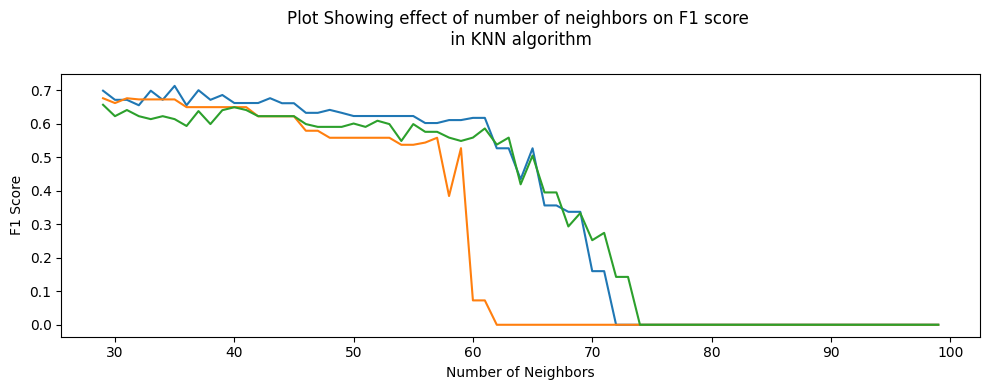


 --- 


In [117]:
# K Nearest Neighbor with GridSearchCV for aveOralF models

clf_model_dict_knn_f = {};

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

stat_tables_knn = pd.DataFrame();
clf_knn_grid_results_f = {};

for i,feature in enumerate(topFeatures_f):
    
    parameters = {'n_neighbors': np.arange(29,100,1)}

    knn_clf = KNeighborsClassifier();

    # find best parameters
    clf_grid_knn = GridSearchCV(knn_clf, parameters, scoring='f1', n_jobs = -1)
    clf_grid_knn.fit(train_x_processed[feature].to_numpy().reshape(-1,1), train_y["aveOralF_fever"].to_numpy());

    clf_knn_grid_results_f[feature] = clf_grid_knn.cv_results_
    print(f"{feature}, {clf_grid_knn.best_params_}")
    
    # get best estimator
    knn_clf = clf_grid_knn.best_estimator_;


    # perform 5-Fold Validation
    kfold = sk.model_selection.KFold(n_splits=5);

    avg_fold_stats = {};
    avg_fold_stats["confusion_matrix"] = [];
    for train, val in kfold.split(train_x_processed,train_y["aveOralF_fever"]):
        knn_clf_fold = sk.clone(knn_clf);
        knn_clf_fold.fit(train_x_processed.iloc[train][feature].to_numpy().reshape(-1,1), train_y.iloc[train]["aveOralF_fever"])
        avg_fold_stats["confusion_matrix"].append(
                                           confusion_matrix(
                                               train_y.iloc[val]["aveOralF_fever"], 
                                               knn_clf_fold.predict(train_x_processed.iloc[val][feature].to_numpy().reshape(-1,1)))
                                            )
    
    
    #ConfusionMatrixDisplay(confusion_matrix(train_y["aveOralM_fever"], knn_clf.predict(scaledTemps_test))).plot(ax=axs[i]);
    ConfusionMatrixDisplay(np.sum(avg_fold_stats["confusion_matrix"], axis = 0)).plot(ax=axs[i]);
    axs[i].set_title(f"Confusion Matrix for {feature} based \n Febrile Classification Mode \n"); 
  

    stat_table_knn = pd.DataFrame(classification_report(train_y["aveOralF_fever"], knn_clf.predict(train_x_processed[feature].to_numpy().reshape(-1,1)),output_dict=True)).transpose();
    stat_table_knn.columns = pd.MultiIndex.from_product([[feature], stat_table_knn.columns])
    stat_table_knn.index = pd.MultiIndex.from_product([['score'], stat_table_knn.index])

    stat_tables_knn = pd.concat([stat_tables_knn, stat_table_knn], axis = 1);
    #print("(Recall) Score: " + str(knn_clf.score(scaledTemps_test, test_set["aveOralM_fever"])))


    clf_model_dict_knn_f[feature] = knn_clf;

plt.suptitle("aveOralF \n");
fig.tight_layout();


display(Markdown("\n --- \n"));
plt.show();
display(Markdown("\n --- \n"));
display(stat_tables_knn)
display(Markdown("\n --- \n"));

fig = plt.figure(figsize=(10, 4))

for i,feature in enumerate(topFeatures_f):
    plt.plot([param["n_neighbors"] for param in clf_knn_grid_results_f[feature]["params"]],
             clf_knn_grid_results_f[feature]["mean_test_score"], label = feature)

plt.xlabel("Number of Neighbors");
plt.ylabel("F1 Score");
plt.title("Plot Showing effect of number of neighbors on F1 score \n in KNN algorithm \n");
fig.tight_layout();

display(Markdown("</br>"));

testFig = BytesIO();
plt.savefig(testFig, format='PNG', bbox_inches='tight');
plt.close();
display(HTML(f"<center><img src='data:image/png;base64,{base64.b64encode(testFig.getvalue()).decode()}'></center>"))

display(Markdown("\n --- \n"));

Similar to aveOralM from the graph it can be seen that F1 score performance begins to decrease with the addition of more neighbors for all features. For T_Max1 the optimum neighbor count was found to be 35, for T_OR1 29, and for canthiMax1 29. The T_OR1 model had the highest recall and F1 score at the default threshold, however alternative thresholds need to be investigated via AUC and PR-AUC curves.

--- 

Feature T_Max1, Best Threshold: 0.2857142857142857, F1 Score: 0.7499999999999999
Feature T_OR1, Best Threshold: 0.4482758620689655, F1 Score: 0.7441860465116279
Feature canthiMax1, Best Threshold: 0.3103448275862069, F1 Score: 0.689655172413793



 --- 


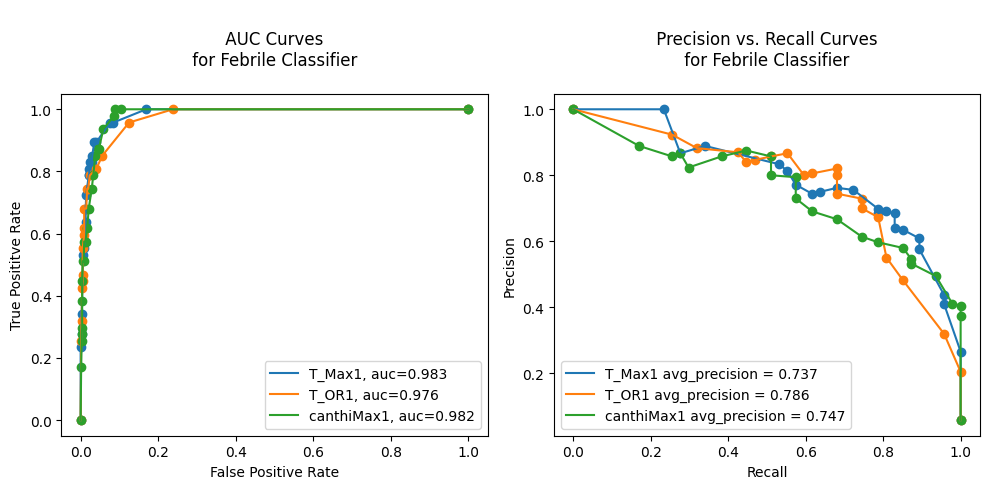


 --- 


In [207]:
# ROC, ROC-AUC, PR Curves for Nearest Neighbor - aveOralF

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

for feature, model in clf_model_dict_knn_f.items():
    
    preds = model.predict_proba(train_x_processed[feature].to_numpy().reshape(-1,1))[:,1]
    fpr, tpr, threshhold  = sk.metrics.roc_curve(train_y["aveOralF_fever"], preds)
    
    auc = sk.metrics.roc_auc_score(train_y["aveOralF_fever"], preds)
    
    axs[0].scatter(fpr,tpr)
    axs[0].set_xlabel("False Positive Rate")
    axs[0].set_ylabel("True Posititve Rate")
    axs[0].set_title("\n AUC Curves \n for Febrile Classifier \n")
    axs[0].plot(fpr,tpr,label=f"{feature}, auc="+str(round(auc,3)))
    
    axs[0].legend(loc=4)


thresholds_knn_f = {}

for feature, model in clf_model_dict_knn_f.items():

    pr_measure = sk.metrics.average_precision_score(train_y["aveOralF_fever"], preds)
    preds = model.predict_proba(train_x_processed[feature].to_numpy().reshape(-1,1))[:,1]
    precision, recall, thresholds = sk.metrics.precision_recall_curve(train_y["aveOralF_fever"], preds)

    # Selecting appropriate threshold
    f1_scores = 2*recall*precision / (recall+precision)
    best_f1_threshold = thresholds[np.argmax(f1_scores)]

    thresholds_knn_f[feature] = best_f1_threshold;

    print(f"Feature {feature}, Best Threshold: {best_f1_threshold}, F1 Score: {f1_scores[np.argmax(f1_scores)]}");
    
    axs[1].scatter(recall,precision)
    axs[1].plot(recall,precision,label=f"{feature} avg_precision = {round(pr_measure,3)}")
    axs[1].set_xlabel("Recall");
    axs[1].set_ylabel("Precision");
    axs[1].set_title("\n Precision vs. Recall Curves \n for Febrile Classifier \n")
    axs[1].legend(loc=3)

fig.tight_layout();
display(Markdown("\n --- \n"));
plt.show()
display(Markdown("\n --- \n"));

#prt = pd.DataFrame([precision, recall, thresholds]).transpose().set_axis(["precision","recall", "thresholds"], axis=1)
#prt.sort_values(["recall","precision"], ascending = False)[prt["precision"]>0.2].head()

The best model for aveOralM is the T_Max1 model achieving the highest F1 score with 0.75 with a threshold of ~0.286. This model is added for further testing.

In [119]:
# add best model
best_models_clf_f["Single"]["T_Max1"]["KNN_T_OR1"] = {
                                                    "Model": clf_model_dict_knn_f["T_OR1"],
                                                    "Threshold": thresholds_knn_f["T_OR1"]
                                                }

###### A.2 - KNN - Multiple Feature
--- 

Next K-Nearest Neighbor is performed on all the features found in the dataset to build a more comprehensive model. This will then be evaluated on the test against the single feature approach. Grid Search is used to find the optimum number of neighbors to maximize F1 score. 

**<center> aveOralM </center>**

Best Params, {'n_neighbors': np.int64(29)}



 --- 


</br>


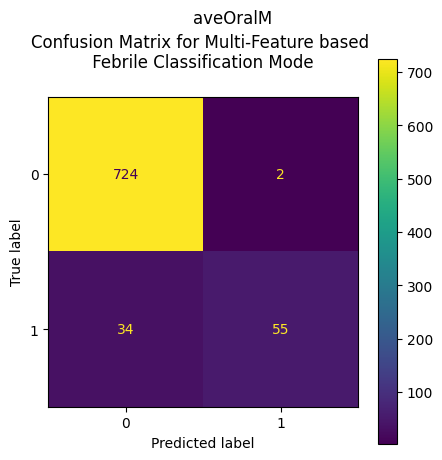
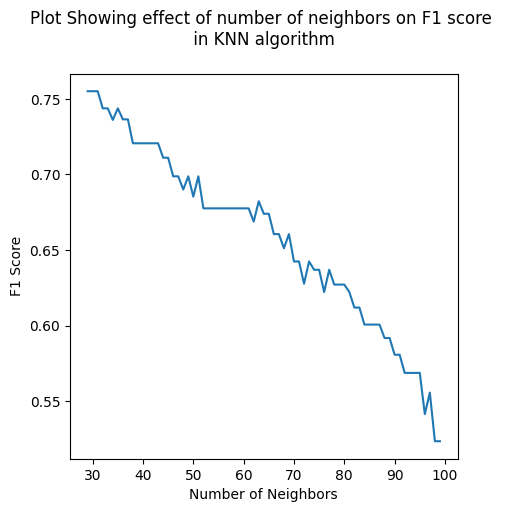


 --- 


In [120]:
# K Nearest Neighbor with GridSearchCV and multiple Features

from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV


stat_tables_knn = pd.DataFrame();


parameters = {'n_neighbors': np.arange(29,100,1)}

knn_clf = KNeighborsClassifier();

# find best parameters
clf_grid_knn = GridSearchCV(knn_clf, parameters, scoring='f1', n_jobs = -1)
clf_grid_knn.fit(train_x_processed, train_y["aveOralM_fever"].to_numpy());

# get best estimator
knn_clf_multi_m = clf_grid_knn.best_estimator_;
print(f"Best Params, {clf_grid_knn.best_params_}");

# perform 5-Fold Validation
kfold = sk.model_selection.KFold(n_splits=5);

avg_fold_stats = {};
avg_fold_stats["confusion_matrix"] = [];
for train, val in kfold.split(train_x_processed,train_y["aveOralM_fever"]):
    knn_clf_fold = sk.clone(knn_clf_multi_m);
    knn_clf_fold.fit(train_x_processed.iloc[train], train_y.iloc[train]["aveOralM_fever"])
    avg_fold_stats["confusion_matrix"].append(
                                       confusion_matrix(
                                           train_y.iloc[val]["aveOralM_fever"], 
                                           knn_clf_fold.predict(train_x_processed.iloc[val]))
                                        )


#ConfusionMatrixDisplay(confusion_matrix(train_y["aveOralM_fever"], knn_clf.predict(scaledTemps_test))).plot(ax=axs[i]);
ConfusionMatrixDisplay(np.sum(avg_fold_stats["confusion_matrix"], axis = 0)).plot();
plt.title(f"Confusion Matrix for Multi-Feature based \n Febrile Classification Mode \n"); 


stat_table_knn = pd.DataFrame(classification_report(train_y["aveOralM_fever"], knn_clf_multi_m.predict(train_x_processed),output_dict=True)).transpose();
stat_table_knn.index = pd.MultiIndex.from_product([['score'], stat_table_knn.index])

stat_tables_knn = pd.concat([stat_tables_knn, stat_table_knn], axis = 1);
#print("(Recall) Score: " + str(knn_clf.score(scaledTemps_test, test_set["aveOralM_fever"])))


plt.suptitle("aveOralM \n");
fig.tight_layout();

display(Markdown("\n --- \n"));

testFig = BytesIO();
plt.savefig(testFig, format='PNG', bbox_inches='tight');
plt.close();
confusion_matrix_html = f"<center><img src='data:image/png;base64,{base64.b64encode(testFig.getvalue()).decode()}'></center>"

#display(Markdown("\n --- \n"));
tableHTML = f"<div>{stat_tables_knn.to_html()}</div>"
#display(Markdown("\n --- \n"));


plt.plot([param["n_neighbors"] for param in clf_grid_knn.cv_results_["params"]],
         clf_grid_knn.cv_results_["mean_test_score"])

plt.xlabel("Number of Neighbors");
plt.ylabel("F1 Score");
plt.title("Plot Showing effect of number of neighbors on F1 score \n in KNN algorithm \n");


display(Markdown("</br>"));

testFig = BytesIO();
plt.savefig(testFig, format='PNG', bbox_inches='tight');
plt.close();
f1_score_graph_html = f"<center><img src='data:image/png;base64,{base64.b64encode(testFig.getvalue()).decode()}'></center>"


display(HTML(f"<div style='display:flex; flex-direction:row; align-items:center'>{confusion_matrix_html}{tableHTML}{f1_score_graph_html}</div>"))


display(Markdown("\n --- \n"));

Compared to the single feature model the multi feature model decreases in F1 score rapidly with added neighbors. The optimum count was found to be 29 which was the initial rule of thumb estimate. The models F1 score is ~0.79 which is above the single feature models with default thresholds. Next, the best threshold will be found using AUC-PR and AUC curves.

Best Threshold: 0.41379310344827586, F1 Score: 0.8129032258064516



 --- 


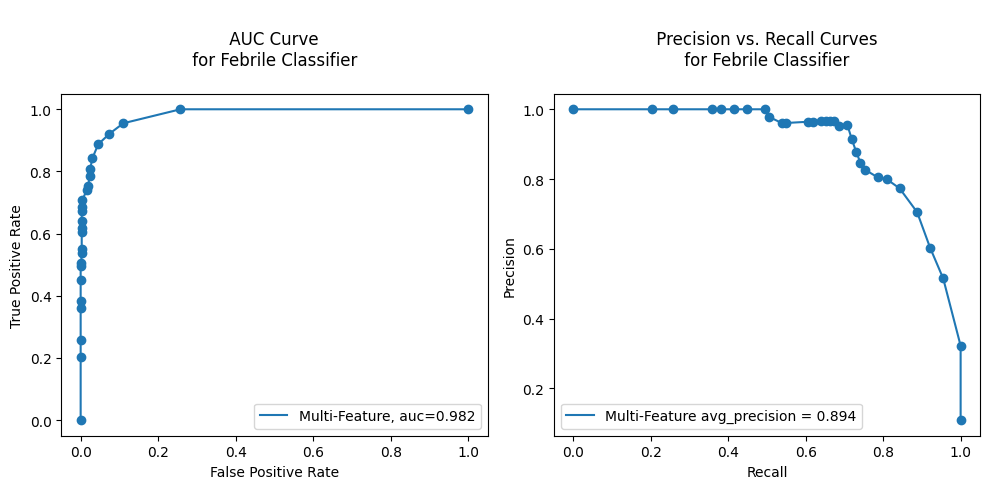


 --- 


In [231]:
# ROC, ROC-AUC, PR Curves for Nearest Neighbor with multiple features

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

preds = knn_clf_multi_m.predict_proba(train_x_processed)[:,1]
fpr, tpr, threshhold  = sk.metrics.roc_curve(train_y["aveOralM_fever"], preds)

auc = sk.metrics.roc_auc_score(train_y["aveOralM_fever"], preds)

axs[0].scatter(fpr,tpr)
axs[0].set_xlabel("False Positive Rate")
axs[0].set_ylabel("True Positive Rate")
axs[0].set_title("\n AUC Curve \n for Febrile Classifier \n")
axs[0].plot(fpr,tpr,label=f"Multi-Feature, auc="+str(round(auc,3)))

axs[0].legend(loc=4)


pr_measure = sk.metrics.average_precision_score(train_y["aveOralM_fever"], preds)
preds = knn_clf_multi_m.predict_proba(train_x_processed)[:,1]
precision, recall, thresholds = sk.metrics.precision_recall_curve(train_y["aveOralM_fever"], preds)


# Selecting appropriate threshold
f1_scores = 2*recall*precision / (recall+precision)
best_f1_threshold_knn_multi_m = thresholds[np.argmax(f1_scores)]

print(f"Best Threshold: {best_f1_threshold_knn_multi_m}, F1 Score: {f1_scores[np.argmax(f1_scores)]}");

axs[1].scatter(recall,precision)
axs[1].plot(recall,precision,label=f"Multi-Feature avg_precision = {round(pr_measure,3)}")
axs[1].set_xlabel("Recall");
axs[1].set_ylabel("Precision");
axs[1].set_title("\n Precision vs. Recall Curves \n for Febrile Classifier \n")
axs[1].legend(loc=3)

fig.tight_layout();
display(Markdown("\n --- \n"));
plt.show()
display(Markdown("\n --- \n"));

#prt = pd.DataFrame([precision, recall, thresholds]).transpose().set_axis(["precision","recall", "thresholds"], axis=1)
#prt.sort_values(["recall","precision"], ascending = False)[prt["precision"]>0.2].head()

The best threshold for the multivariate KNN models predicting aveOralM was ~0.41 with an F1 score of ~0.812. This is slightly under the single feature T_Max1 model which achieved an F1 score of ~0.816. This model will be compared on the test set with the single feature model.

In [122]:
# add best model
best_models_clf_m["Multi"]["All"]["KNN_All"] = {
                                                    "Model": knn_clf_multi_m,
                                                    "Threshold": best_f1_threshold_knn_multi_m
                                                }

---

**<center> aveOralF </center>**

Secondly, a multi-feature K-Nearest Neighbor model is also developed for the aveOralF measurements with grid search optimization for the optimum neighbour count.

Best Params, {'n_neighbors': np.int64(29)}



 --- 


</br>


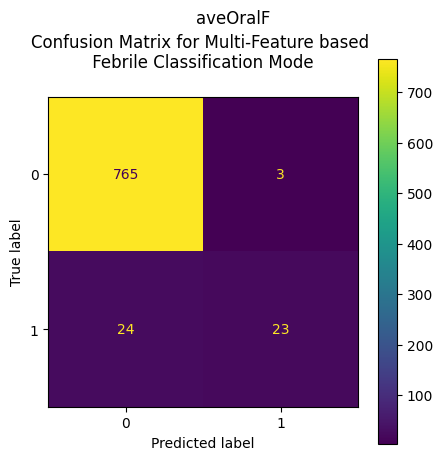
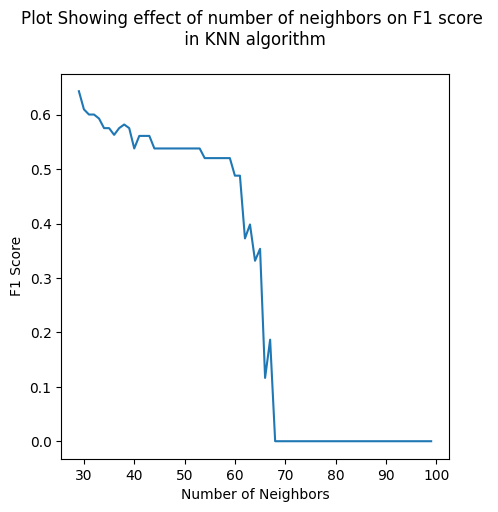


 --- 


In [123]:
# K Nearest Neighbor with GridSearchCV and multiple Features

scaler = StandardScaler()

outList = [];
clf_model_dict_nn = {};

stat_tables_knn = pd.DataFrame();

parameters = {'n_neighbors': np.arange(29,100,1)}

knn_clf = KNeighborsClassifier();

# find best parameters
clf_grid_knn = GridSearchCV(knn_clf, parameters, scoring='f1', n_jobs = -1)
clf_grid_knn.fit(train_x_processed, train_y["aveOralF_fever"].to_numpy());

# get best estimator
knn_clf_multi_f = clf_grid_knn.best_estimator_;
print(f"Best Params, {clf_grid_knn.best_params_}");

# perform 5-Fold Validation
kfold = sk.model_selection.KFold(n_splits=5);

avg_fold_stats = {};
avg_fold_stats["confusion_matrix"] = [];
for train, val in kfold.split(train_x_processed,train_y["aveOralF_fever"]):
    knn_clf_fold = sk.clone(knn_clf_multi_f);
    knn_clf_fold.fit(train_x_processed.iloc[train], train_y.iloc[train]["aveOralF_fever"])
    avg_fold_stats["confusion_matrix"].append(
                                       confusion_matrix(
                                           train_y.iloc[val]["aveOralF_fever"], 
                                           knn_clf_fold.predict(train_x_processed.iloc[val]))
                                        )


#ConfusionMatrixDisplay(confusion_matrix(train_y["aveOralM_fever"], knn_clf.predict(scaledTemps_test))).plot(ax=axs[i]);
ConfusionMatrixDisplay(np.sum(avg_fold_stats["confusion_matrix"], axis = 0)).plot();
plt.title(f"Confusion Matrix for Multi-Feature based \n Febrile Classification Mode \n"); 


stat_table_knn = pd.DataFrame(classification_report(train_y["aveOralF_fever"], knn_clf_multi_f.predict(train_x_processed),output_dict=True)).transpose();
stat_table_knn.columns = pd.MultiIndex.from_product([[feature], stat_table_knn.columns])
stat_table_knn.index = pd.MultiIndex.from_product([['score'], stat_table_knn.index])

stat_tables_knn = pd.concat([stat_tables_knn, stat_table_knn], axis = 1);
#print("(Recall) Score: " + str(knn_clf.score(scaledTemps_test, test_set["aveOralM_fever"])))


plt.suptitle("aveOralF \n");
fig.tight_layout();


display(Markdown("\n --- \n"));

testFig = BytesIO();
plt.savefig(testFig, format='PNG', bbox_inches='tight');
plt.close();
confusion_matrix_html = f"<center><img src='data:image/png;base64,{base64.b64encode(testFig.getvalue()).decode()}'></center>"

#display(Markdown("\n --- \n"));
tableHTML = f"<div>{stat_tables_knn.to_html()}</div>"
#display(Markdown("\n --- \n"));


plt.plot([param["n_neighbors"] for param in clf_grid_knn.cv_results_["params"]],
         clf_grid_knn.cv_results_["mean_test_score"])

plt.xlabel("Number of Neighbors");
plt.ylabel("F1 Score");
plt.title("Plot Showing effect of number of neighbors on F1 score \n in KNN algorithm \n");


display(Markdown("</br>"));

testFig = BytesIO();
plt.savefig(testFig, format='PNG', bbox_inches='tight');
plt.close();
f1_score_graph_html = f"<center><img src='data:image/png;base64,{base64.b64encode(testFig.getvalue()).decode()}'></center>"


display(HTML(f"<div style='display:flex; flex-direction:row; align-items:center'>{confusion_matrix_html}{tableHTML}{f1_score_graph_html}</div>"))


display(Markdown("\n --- \n"));

Similar to aveOralM, for aveOralF with the increase of neighbors the model obtains a significantly worse F1 score. The threshold unoptimized model has an F1 of ~0.632 which is substantially worse than the best single feature model which was T_OR1 with ~0.699 without threshold optimization. Next, the optimum threshold will be investigated.

Best Threshold: 0.2413793103448276, F1 Score: 0.7238095238095238



 --- 


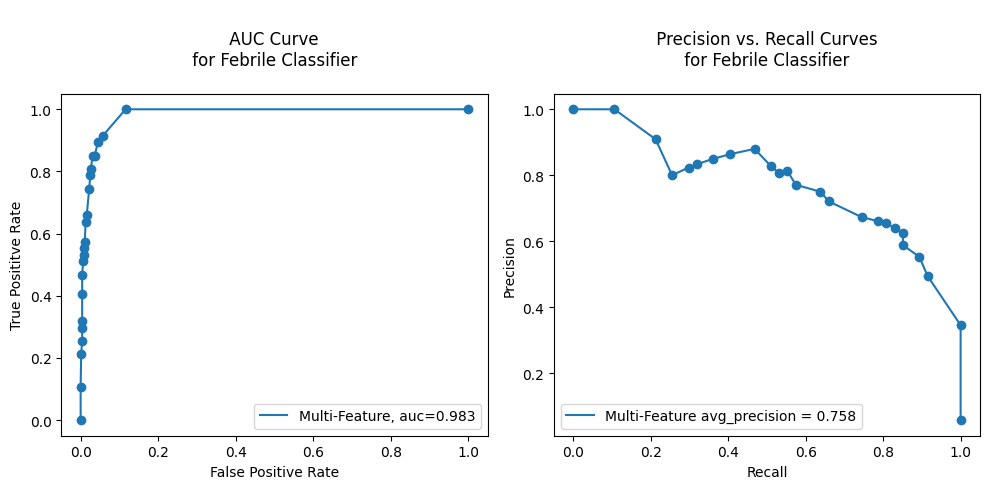


 --- 


In [230]:
# ROC, ROC-AUC, PR Curves for Nearest Neighbor with multiple features

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

preds = knn_clf_multi_f.predict_proba(train_x_processed)[:,1]
fpr, tpr, threshhold  = sk.metrics.roc_curve(train_y["aveOralF_fever"], preds)

auc = sk.metrics.roc_auc_score(train_y["aveOralF_fever"], preds)

axs[0].scatter(fpr,tpr)
axs[0].set_xlabel("False Positive Rate")
axs[0].set_ylabel("True Posititve Rate")
axs[0].set_title("\n AUC Curve \n for Febrile Classifier \n")
axs[0].plot(fpr,tpr,label=f"Multi-Feature, auc="+str(round(auc,3)))

axs[0].legend(loc=4)


pr_measure = sk.metrics.average_precision_score(train_y["aveOralF_fever"], preds)
preds = knn_clf_multi_f.predict_proba(train_x_processed)[:,1]
precision, recall, thresholds = sk.metrics.precision_recall_curve(train_y["aveOralF_fever"], preds)

# Selecting appropriate threshold
f1_scores = 2*recall*precision / (recall+precision)
best_f1_threshold_knn_multi_f = thresholds[np.argmax(f1_scores)]

print(f"Best Threshold: {best_f1_threshold_knn_multi_f}, F1 Score: {f1_scores[np.argmax(f1_scores)]}");

axs[1].scatter(recall,precision)
axs[1].plot(recall,precision,label=f"Multi-Feature avg_precision = {round(pr_measure,3)}")
axs[1].set_xlabel("Recall");
axs[1].set_ylabel("Precision");
axs[1].set_title("\n Precision vs. Recall Curves \n for Febrile Classifier \n")
axs[1].legend(loc=3)

fig.tight_layout();
display(Markdown("\n --- \n"));
plt.show()
display(Markdown("\n --- \n"));

#prt = pd.DataFrame([precision, recall, thresholds]).transpose().set_axis(["precision","recall", "thresholds"], axis=1)
#prt.sort_values(["recall","precision"], ascending = False)[prt["precision"]>0.2].head()

The best threshold for the aveOralF multifeature KNN model ~0.24 achieved a F1 Score of ~0.72 while the best single feature model for T_Max1 achieved ~0.75. Next the model will be compared to the single feature model on the test set during the evaluation.

In [125]:
# add best model
best_models_clf_f["Multi"]["All"]["KNN_All"] = {
                                                    "Model": knn_clf_multi_f,
                                                    "Threshold": best_f1_threshold_knn_multi_f
                                                }

##### B - Logistic Regression CV

--- 

Logistic regression was performed on one feature as a baseline for logistic regression based classification.

###### B.1 - Logistic Regression - Single Feature
--- 

**<center> aveOralM </center>**

First a model is developed based on a single feature as part of logistic regression to classify febrile patients based on aveOralM:

--- 
 <br/>

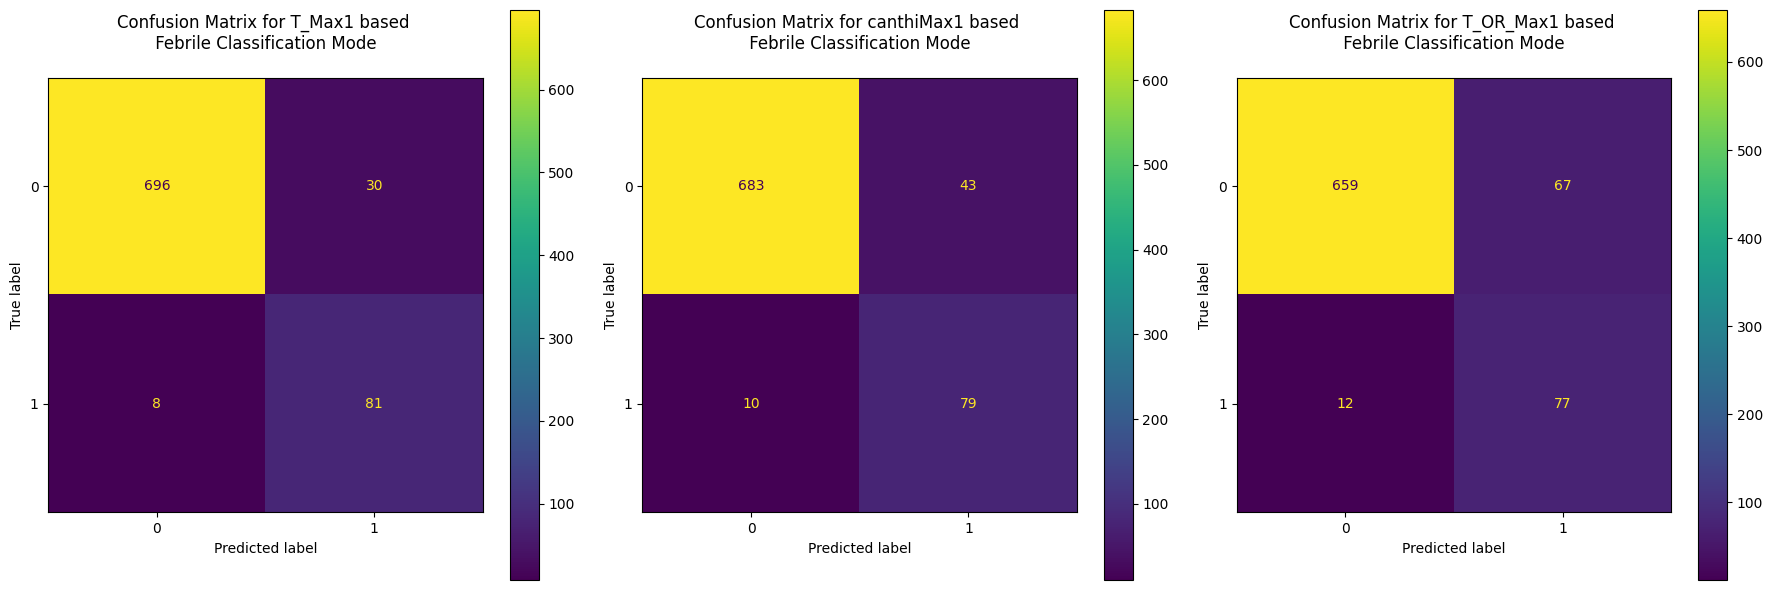


 --- 


T_Max1                                 canthiMax1  \
                   precision    recall  f1-score     support  precision   
score False         0.988571  0.953168  0.970547  726.000000   0.986938   
      True          0.704348  0.910112  0.794118   89.000000   0.634921   
      accuracy      0.948466  0.948466  0.948466    0.948466   0.932515   
      macro avg     0.846460  0.931640  0.882332  815.000000   0.810929   
      weighted avg  0.957534  0.948466  0.951280  815.000000   0.948496   

                                                   T_OR_Max1            \
                      recall  f1-score     support precision    recall   
score False         0.936639  0.961131  726.000000  0.982090  0.906336   
      True          0.898876  0.744186   89.000000  0.531034  0.865169   
      accuracy      0.932515  0.932515    0.932515  0.901840  0.901840   
      macro avg     0.917758  0.852658  815.000000  0.756562  0.885752   
      weighted avg  0.932515  0.937440  815.000000  0.932833  0.901840   

                                         
                    f1-score    support  
score False         0.942693  726.00000  
      True          0.658120   89.00000  
      accuracy      0.901840    0.90184  
      macro avg     0.800407  815.00000  
      weighted avg  0.911617  815.00000

In [126]:
# Logistic Regression with CV Search - aveOralM

from sklearn.linear_model import LogisticRegressionCV 

clf_model_dict_log_reg_m = {};

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

display(Markdown("--- \n <br/>"))

stat_tables_lr = pd.DataFrame();

log_reg_text = "";

for i,feature in enumerate(topFeatures_m):
       
    log_reg = LogisticRegressionCV(scoring="f1", 
                                   class_weight="balanced", 
                                   max_iter=500,
                                   penalty='elasticnet', 
                                   solver='saga',
                                   l1_ratios = [0.1,0.2,0.5,0.7],
                                   Cs = [0.01, 0.1, 5.0,10.0],
                                   n_jobs = -1,
                                   tol = 0.01
                                   
                                  ) 
    log_reg.fit(train_x_processed[feature].to_numpy().reshape(-1,1), train_y["aveOralM_fever"]);

    log_reg_text += f"<div style='display:flex; justify-content:center'> {feature}: Regularization Strength (Inverse): {log_reg.C_[0]}, L1_Ratio: {log_reg.l1_ratio_[0]} </div>"

    avg_fold_stats = {};
    avg_fold_stats["confusion_matrix"] = [];
    
    for train, val in kfold.split(train_x_processed,train_y["aveOralM_fever"]):
        
        log_reg_fold = sk.clone(log_reg);
        log_reg_fold.fit(train_x_processed.iloc[train][feature].to_numpy().reshape(-1,1), train_y.iloc[train]["aveOralM_fever"])
        avg_fold_stats["confusion_matrix"].append(
                                           confusion_matrix(
                                               train_y.iloc[val]["aveOralM_fever"], 
                                               log_reg_fold.predict(train_x_processed.iloc[val][feature].to_numpy().reshape(-1,1)))
                                            )

    log_reg.fit(train_x_processed[feature].to_numpy().reshape(-1,1), train_y["aveOralM_fever"])
    #outMatrix = ConfusionMatrixDisplay(confusion_matrix(train_y["aveOralM_fever"], log_reg.predict(train_x_processed[feature].to_numpy().reshape(-1,1)))).plot(ax=axs[i]);
    ConfusionMatrixDisplay(np.sum(avg_fold_stats["confusion_matrix"], axis = 0)).plot(ax=axs[i]);
    axs[i].set_title(f"Confusion Matrix for {feature} based \n Febrile Classification Mode \n");

    
    stat_table_lr = pd.DataFrame(classification_report(
                                    train_y["aveOralM_fever"], 
                                    log_reg.predict(train_x_processed[feature].to_numpy().reshape(-1,1)),
                                    output_dict=True)
                                ).transpose()

    stat_table_lr.columns = pd.MultiIndex.from_product([[feature], stat_table_lr.columns])
    stat_table_lr.index = pd.MultiIndex.from_product([['score'], stat_table_lr.index])

    stat_tables_lr = pd.concat([stat_tables_lr, stat_table_lr], axis = 1);
    
    
    #print("(Recall) Score: " + str(log_reg.score(test_set[feature].to_numpy().reshape(-1,1), test_set["aveOralM_fever"])))


    clf_model_dict_log_reg_m[feature] = log_reg;


# show 

display(HTML(f"<div style='display:flex; flex-direction:row'>{log_reg_text}</div>"));

fig.tight_layout();
plt.show();

display(Markdown("\n --- \n"))

display(stat_tables_lr)


--- 

Based on the initial threshold the best model for recall was the T_Max1 model achieving a recall of ~0.91 and an F1 score of ~0.8 which is on par with the best KNN models which also achieved an F1 score of ~0.81. Next, it will be investigated if the threshold can be further optimized.

--- 

Feature T_Max1, Best Threshold: 0.5828640909969598, F1 Score: 0.8352941176470587
Feature canthiMax1, Best Threshold: 0.5998640341022035, F1 Score: 0.783625730994152
Feature T_OR_Max1, Best Threshold: 0.6329121280947343, F1 Score: 0.7515151515151515


---

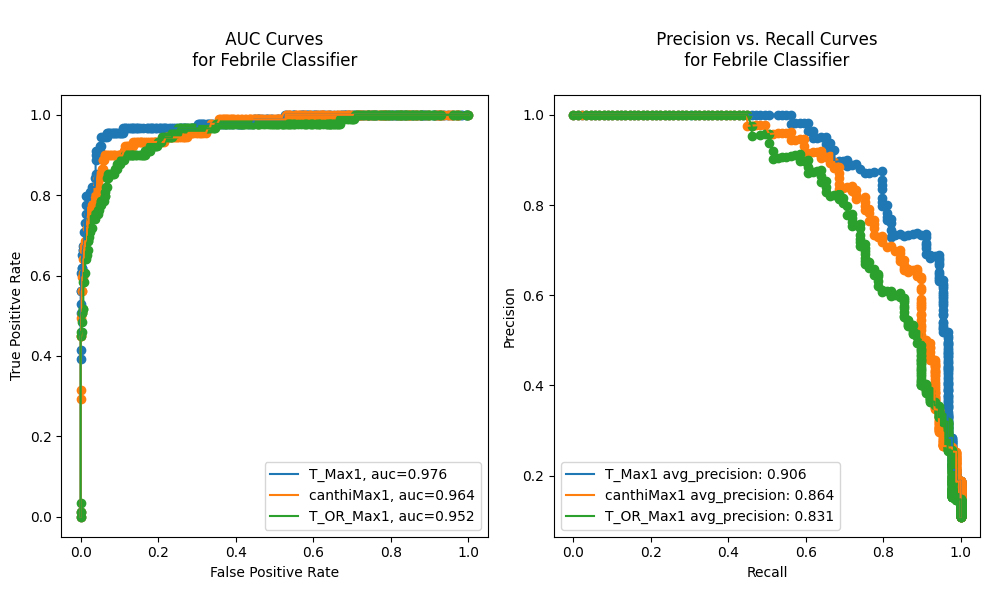

---

In [210]:
# ROC, ROC-AUC, PR Curves for Logistic Regression - aveOralM

fig, axs = plt.subplots(1, 2, figsize=(10, 6))

for feature, model in clf_model_dict_log_reg_m.items():
    
    preds = model.predict_proba(train_x_processed[feature].to_numpy().reshape(-1,1))[:,1]
    fpr, tpr, threshhold  = sk.metrics.roc_curve(train_y["aveOralM_fever"], preds)
    
    auc = sk.metrics.roc_auc_score(train_y["aveOralM_fever"], preds)
    
    axs[0].scatter(fpr,tpr)
    axs[0].set_xlabel("False Positive Rate")
    axs[0].set_ylabel("True Posititve Rate")
    axs[0].set_title("\n AUC Curves \n for Febrile Classifier \n")
    axs[0].plot(fpr,tpr,label=f"{feature}, auc="+str(round(auc,3)))
    axs[0].legend(loc=4)


log_reg_thresholds_m = {};

for feature, model in clf_model_dict_log_reg_m.items():
    
    preds = model.predict_proba(train_x_processed[feature].to_numpy().reshape(-1,1))[:,1]
    precision, recall, thresholds = sk.metrics.precision_recall_curve(train_y["aveOralM_fever"], preds)


    # Selecting appropriate threshold
    f1_scores = 2*recall*precision / (recall+precision)
    best_f1_threshold = thresholds[np.argmax(f1_scores)]
    
    print(f"Feature {feature}, Best Threshold: {best_f1_threshold}, F1 Score: {f1_scores[np.argmax(f1_scores)]}");

    log_reg_thresholds_m[feature] = best_f1_threshold;
    
    pr_measure = sk.metrics.average_precision_score(train_y["aveOralM_fever"], preds)
    axs[1].scatter(recall,precision)
    axs[1].plot(recall,precision,label=f"{feature} avg_precision: {round(pr_measure,3)}")
    axs[1].set_xlabel("Recall");
    axs[1].set_ylabel("Precision");
    axs[1].set_title("\n Precision vs. Recall Curves \n for Febrile Classifier \n")
    axs[1].legend(loc=3)

display(Markdown("---"));

fig.tight_layout();
plt.show()

display(Markdown("---"));

#prt = pd.DataFrame([precision, recall, thresholds]).transpose().set_axis(["precision","recall", "thresholds"], axis=1)
#prt.sort_values(["recall","precision"], ascending = False)[prt["precision"]>0.2].head()

From the AUC and AUC-PR cure it can be seen that T_Max1 based logistic regression has the greatest area under both curves and has the best F1 Score ~0.835 at threshold ~0.583. This models performance will be further investigated on the test set.

In [128]:
# add best model
best_models_clf_m["Single"]["T_Max1"]["Logistic_Regression_T_Max1"] = {
                                                    "Model": clf_model_dict_log_reg_m["T_Max1"],
                                                    "Threshold": log_reg_thresholds_m["T_Max1"]
                                                }

--- 

**<center> aveOralF </center>**

Next, a single feature logistic regression model is developed aveOralF:

--- 
 <br/>

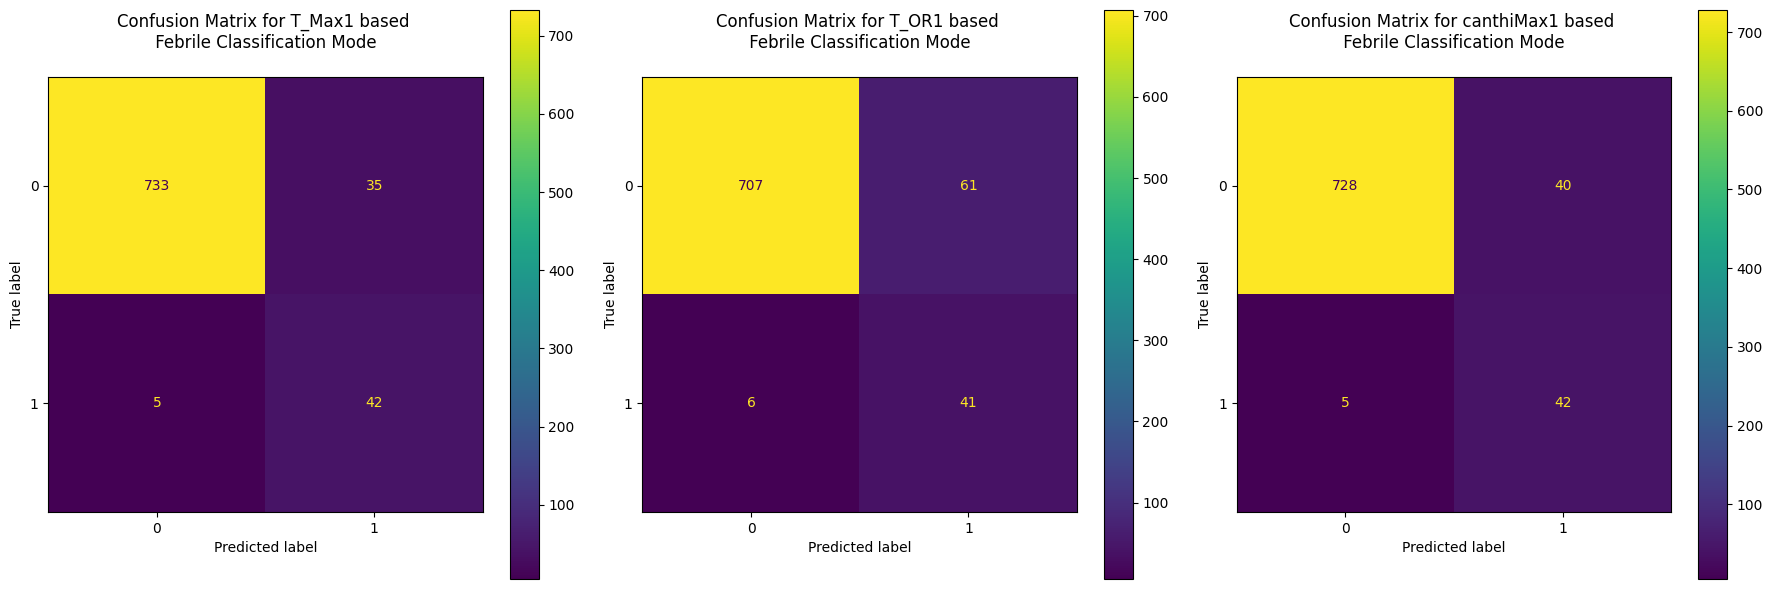


 --- 


T_Max1                                     T_OR1  \
                   precision    recall  f1-score     support precision   
score False         0.993280  0.962240  0.977513  768.000000  0.988764   
      True          0.591549  0.893617  0.711864   47.000000  0.378641   
      accuracy      0.958282  0.958282  0.958282    0.958282  0.911656   
      macro avg     0.792414  0.927928  0.844689  815.000000  0.683702   
      weighted avg  0.970112  0.958282  0.962194  815.000000  0.953579   

                                                   canthiMax1            \
                      recall  f1-score     support  precision    recall   
score False         0.916667  0.951351  768.000000   0.994536  0.947917   
      True          0.829787  0.520000   47.000000   0.518072  0.914894   
      accuracy      0.911656  0.911656    0.911656   0.946012  0.946012   
      macro avg     0.873227  0.735676  815.000000   0.756304  0.931405   
      weighted avg  0.911656  0.926476  815.000000   0.967058  0.946012   

                                          
                    f1-score     support  
score False         0.970667  768.000000  
      True          0.661538   47.000000  
      accuracy      0.946012    0.946012  
      macro avg     0.816103  815.000000  
      weighted avg  0.952840  815.000000

In [129]:
# Logistic Regression with CV Search - aveOralF

from sklearn.linear_model import LogisticRegressionCV 

clf_model_dict_log_reg_f = {};

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

display(Markdown("--- \n <br/>"))

stat_tables_lr = pd.DataFrame();

log_reg_text = "";

for i,feature in enumerate(topFeatures_f):
       
    log_reg = LogisticRegressionCV(scoring="f1", 
                                   class_weight="balanced", 
                                   max_iter=500,
                                   penalty='elasticnet', 
                                   solver='saga',
                                   l1_ratios = [0.1,0.2,0.5,0.7, 0.9],
                                   Cs = [0.01, 0.1, 5.0,10.0],
                                   n_jobs = -1,
                                   tol = 0.01
                                   
                                  ) 
    log_reg.fit(train_x_processed[feature].to_numpy().reshape(-1,1), train_y["aveOralF_fever"]);

    log_reg_text += f"<div style='display:flex; justify-content:center'> {feature}: Regularization Strength (Inverse): {log_reg.C_[0]}, L1_Ratio: {log_reg.l1_ratio_[0]} </div>"

    avg_fold_stats = {};
    avg_fold_stats["confusion_matrix"] = [];
    
    for train, val in kfold.split(train_x_processed,train_y["aveOralF_fever"]):
        
        log_reg_fold = sk.clone(log_reg);
        log_reg_fold.fit(train_x_processed.iloc[train][feature].to_numpy().reshape(-1,1), train_y.iloc[train]["aveOralF_fever"])
        avg_fold_stats["confusion_matrix"].append(
                                           confusion_matrix(
                                               train_y.iloc[val]["aveOralF_fever"], 
                                               log_reg_fold.predict(train_x_processed.iloc[val][feature].to_numpy().reshape(-1,1)))
                                            )

    
    #outMatrix = ConfusionMatrixDisplay(confusion_matrix(train_y["aveOralM_fever"], log_reg.predict(train_x_processed[feature].to_numpy().reshape(-1,1)))).plot(ax=axs[i]);
    ConfusionMatrixDisplay(np.sum(avg_fold_stats["confusion_matrix"], axis = 0)).plot(ax=axs[i]);
    axs[i].set_title(f"Confusion Matrix for {feature} based \n Febrile Classification Mode \n");

    
    stat_table_lr = pd.DataFrame(classification_report(
                                    train_y["aveOralF_fever"], 
                                    log_reg.predict(train_x_processed[feature].to_numpy().reshape(-1,1)),
                                    output_dict=True)
                                ).transpose()

    stat_table_lr.columns = pd.MultiIndex.from_product([[feature], stat_table_lr.columns])
    stat_table_lr.index = pd.MultiIndex.from_product([['score'], stat_table_lr.index])

    stat_tables_lr = pd.concat([stat_tables_lr, stat_table_lr], axis = 1);
    
    
    #print("(Recall) Score: " + str(log_reg.score(test_set[feature].to_numpy().reshape(-1,1), test_set["aveOralM_fever"])))


    clf_model_dict_log_reg_f[feature] = log_reg;


# show 

display(HTML(f"<div style='display:flex; flex-direction:row'>{log_reg_text}</div>"));

fig.tight_layout();
plt.show();

display(Markdown("\n --- \n"))

display(stat_tables_lr)


--- 

The best model above without threshold optimization for aveOralF is also the T_Max1 model achieving an F1 Score of ~0.71 and recall of ~0.89. This also compares to the best KNN models which achieved an F1 Score of ~0.70-0.75. Next the optimum threshold will be investigated.

--- 

Feature T_Max1, Best Threshold: 0.6527193559972836, F1 Score: 0.7708333333333333
Feature T_OR1, Best Threshold: 0.7060564224138333, F1 Score: 0.7441860465116279
Feature canthiMax1, Best Threshold: 0.6059988335412037, F1 Score: 0.7027027027027027


---

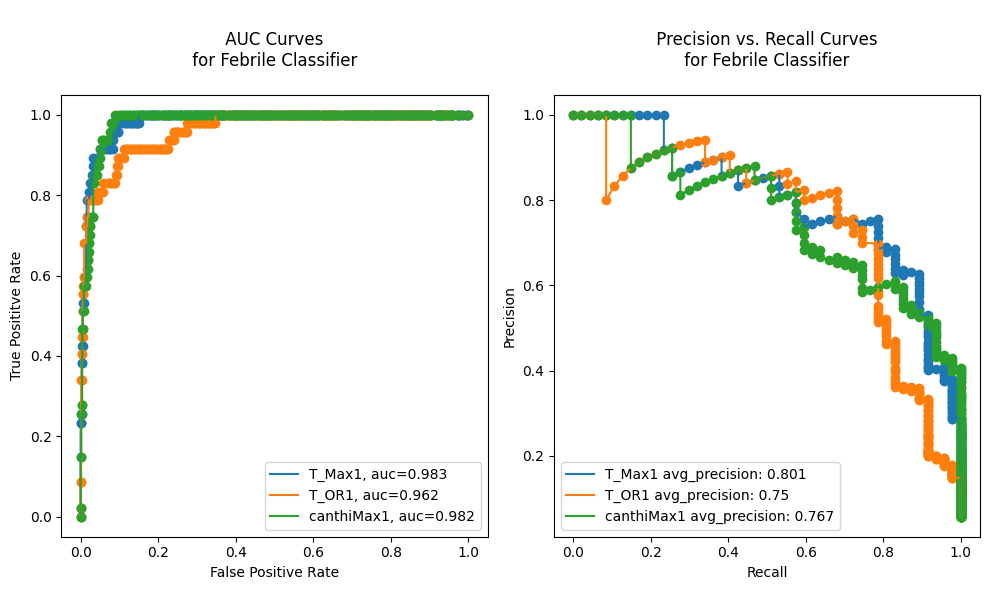

---

In [229]:
# ROC, ROC-AUC, PR Curves for Logistic Regression - aveOralF

fig, axs = plt.subplots(1, 2, figsize=(10, 6))

for feature, model in clf_model_dict_log_reg_f.items():
    
    preds = model.predict_proba(train_x_processed[feature].to_numpy().reshape(-1,1))[:,1]
    fpr, tpr, threshhold  = sk.metrics.roc_curve(train_y["aveOralF_fever"], preds)
    
    auc = sk.metrics.roc_auc_score(train_y["aveOralF_fever"], preds)
    
    axs[0].scatter(fpr,tpr)
    axs[0].set_xlabel("False Positive Rate")
    axs[0].set_ylabel("True Posititve Rate")
    axs[0].set_title("\n AUC Curves \n for Febrile Classifier \n")
    axs[0].plot(fpr,tpr,label=f"{feature}, auc="+str(round(auc,3)))
    axs[0].legend(loc=4)


log_reg_thresholds_f = {};
for feature, model in clf_model_dict_log_reg_f.items():
    
    preds = model.predict_proba(train_x_processed[feature].to_numpy().reshape(-1,1))[:,1]
    precision, recall, thresholds = sk.metrics.precision_recall_curve(train_y["aveOralF_fever"], preds)

    # Selecting appropriate threshold
    f1_scores = 2*recall*precision / (recall+precision)
    best_f1_threshold = thresholds[np.argmax(f1_scores)]
    
    print(f"Feature {feature}, Best Threshold: {best_f1_threshold}, F1 Score: {f1_scores[np.argmax(f1_scores)]}");

    log_reg_thresholds_f[feature] = best_f1_threshold;

    pr_measure = sk.metrics.average_precision_score(train_y["aveOralF_fever"], preds)
    axs[1].scatter(recall,precision)
    axs[1].plot(recall,precision,label=f"{feature} avg_precision: {round(pr_measure,3)}")
    axs[1].set_xlabel("Recall");
    axs[1].set_ylabel("Precision");
    axs[1].set_title("\n Precision vs. Recall Curves \n for Febrile Classifier \n")
    axs[1].legend(loc=3)

fig.tight_layout();

display(Markdown("---"));

plt.show()

display(Markdown("---"));

#prt = pd.DataFrame([precision, recall, thresholds]).transpose().set_axis(["precision","recall", "thresholds"], axis=1)
#prt.sort_values(["recall","precision"], ascending = False)[prt["precision"]>0.2].head()

The best aveOralF model for single feature logistic regression was the T_Max1 model which performed better than the optimized KNN models achieving an F1 Score of ~0.77 with threshold ~0.65 while the best KNN model achieved an F1 score of ~0.75. This model will be investigated on the test set.

In [131]:
# add best model
best_models_clf_f["Single"]["T_Max1"]["Logistic_Regression_T_Max1"] = {
                                                    "Model": clf_model_dict_log_reg_f["T_Max1"],
                                                    "Threshold": log_reg_thresholds_f["T_Max1"]
                                                }

###### B.2 - Logistic Regression - Multiple Feature
--- 

More complex logistic regression models where developed for aveOralM and aveOralF using all the features in the dataset along with model regularization to make the model more stable and prevent overfitting. In order to regularize the model ElasticNet was used using a parameter search with LogisticRegressionCV. 

---

**<center> aveOralM </center>**

--- 
 <br/>

</br>


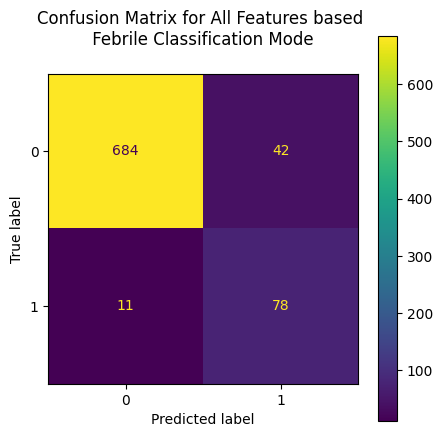


 --- 


In [132]:
# Logistic Regression with CV Search Multiple Features - aveOralM

from sklearn.linear_model import LogisticRegressionCV 

clf_model_dict = {};

display(Markdown("--- \n <br/>"))

stat_tables_lr = pd.DataFrame();


log_reg_multi_m = LogisticRegressionCV(scoring="f1", 
                                   class_weight="balanced", 
                                   max_iter=500,
                                   penalty='elasticnet', 
                                   solver='saga',
                                   l1_ratios = np.arange(0,1,0.1),
                                   Cs = [0.01, 0.1, 5.0,10.0],
                                   n_jobs = -1,
                                   tol = 0.01
                                   
                                  ) 

log_reg_multi_m.fit(train_x_processed, train_y["aveOralM_fever"]);
display(HTML(f"<div style='display:flex; justify-content:center'> Regularization Strength (Inverse): {log_reg_multi_m.C_[0]}, L1_Ratio: {log_reg_multi_m.l1_ratio_[0]} </div>"))
avg_fold_stats = {}
avg_fold_stats["confusion_matrix"] = [];
for train, val in kfold.split(train_x_processed,train_y["aveOralM_fever"]):
    
    log_reg_fold = sk.clone(log_reg_multi_m);
    log_reg_fold.fit(train_x_processed.iloc[train][feature].to_numpy().reshape(-1,1), train_y.iloc[train]["aveOralM_fever"])
    avg_fold_stats["confusion_matrix"].append(
                                       confusion_matrix(
                                           train_y.iloc[val]["aveOralM_fever"], 
                                           log_reg_fold.predict(train_x_processed.iloc[val][feature].to_numpy().reshape(-1,1)))
                                        )


#outMatrix = ConfusionMatrixDisplay(confusion_matrix(train_y["aveOralM_fever"], log_reg_multi_m.predict(train_x).plot(ax=axs[i]);
ConfusionMatrixDisplay(np.sum(avg_fold_stats["confusion_matrix"], axis = 0)).plot();
plt.title(f"Confusion Matrix for All Features based \n Febrile Classification Mode \n"); 

stat_table_lr = pd.DataFrame(classification_report(train_y["aveOralM_fever"], log_reg_multi_m.predict(train_x_processed),output_dict=True)).transpose()

stat_table_lr.index = pd.MultiIndex.from_product([['score'], stat_table_lr.index])

stat_tables_lr = pd.concat([stat_tables_lr, stat_table_lr], axis = 1);

#print("(Recall) Score: " + str(log_reg.score(test_set[feature].to_numpy().reshape(-1,1), test_set["aveOralM_fever"])))


clf_model_dict[feature] = log_reg;

fig.tight_layout();

display(Markdown("</br>"));

testFig = BytesIO();
plt.savefig(testFig, format='PNG', bbox_inches='tight');
plt.close();
display(HTML(f'''<div style="display:flex; flex-direction: row; align-items: center; justify-content: center">
                    <div style:"margin: 10px">{stat_tables_lr.to_html()}</div>
                    <div style:"margin: 10px"><img src='data:image/png;base64,{base64.b64encode(testFig.getvalue()).decode()}'></div>
                </div>'''))

display(Markdown("\n --- \n"))

#display(HTML(f"<div style='display:flex; justify-content:center'>{stat_tables_lr.to_html()}</div>"))


The multiple feature logistic regression model for aveOralM without threshold optimization achieved an F1 Score of ~0.81 which is on par with the best KNN models and single feature T_Max1 logistic regression which scored ~0.81. The resulting regularization strength was 0.01 signifying a large regularization strengths, with a larger emphasis on l1 regularization to encourage weight sparsity. Next the optimum threshold for the model will be found to maximize the F1 Score.

Best Threshold: 0.5132492693013018, F1 Score: 0.8241206030150754


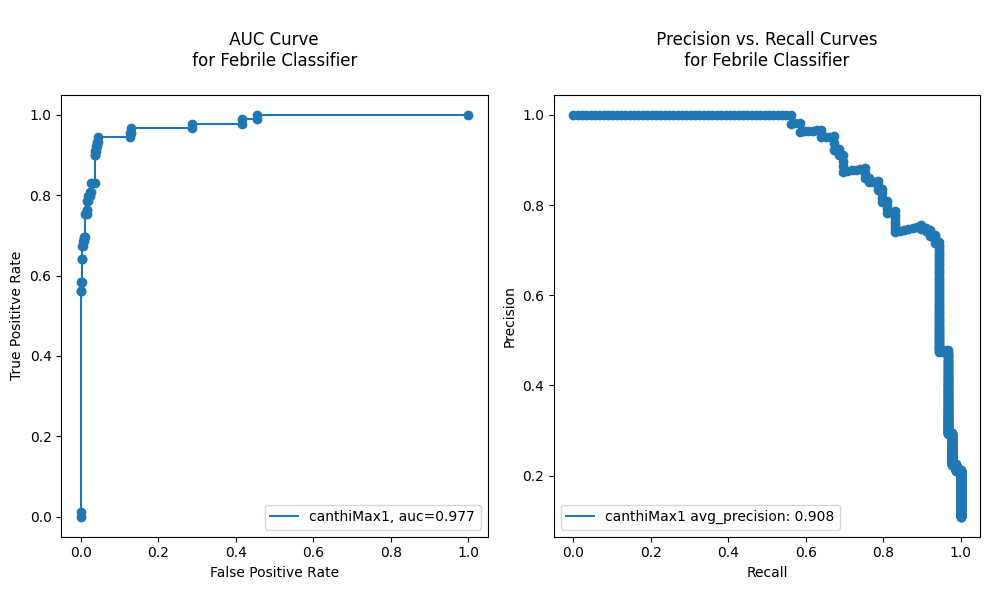

In [227]:
# ROC, ROC-AUC, PR Curves for Logistic Regression MultiFeature - aveOralM

fig, axs = plt.subplots(1, 2, figsize=(10, 6))

# ROC Curve

preds = log_reg_multi_m.predict_proba(train_x_processed)[:,1]
fpr, tpr, threshhold  = sk.metrics.roc_curve(train_y["aveOralM_fever"], preds)

auc = sk.metrics.roc_auc_score(train_y["aveOralM_fever"], preds)

axs[0].scatter(fpr,tpr)
axs[0].set_xlabel("False Positive Rate")
axs[0].set_ylabel("True Posititve Rate")
axs[0].set_title("\n AUC Curve \n for Febrile Classifier \n")
axs[0].plot(fpr,tpr,label=f"{feature}, auc="+str(round(auc,3)))
axs[0].legend(loc=4)


# PR - AUC    
preds = log_reg_multi_m.predict_proba(train_x_processed)[:,1]
precision, recall, thresholds = sk.metrics.precision_recall_curve(train_y["aveOralM_fever"], preds)

# Selecting appropriate threshold
f1_scores = 2*recall*precision / (recall+precision)
best_f1_threshold_log_reg_multi_m = thresholds[np.argmax(f1_scores)]

print(f"Best Threshold: {best_f1_threshold_log_reg_multi_m}, F1 Score: {f1_scores[np.argmax(f1_scores)]}");

pr_measure = sk.metrics.average_precision_score(train_y["aveOralM_fever"], preds)
axs[1].scatter(recall,precision)
axs[1].plot(recall,precision,label=f"{feature} avg_precision: {round(pr_measure,3)}")
axs[1].set_xlabel("Recall");
axs[1].set_ylabel("Precision");
axs[1].set_title("\n Precision vs. Recall Curves \n for Febrile Classifier \n")
axs[1].legend(loc=3)

fig.tight_layout();
plt.show()

#prt = pd.DataFrame([precision, recall, thresholds]).transpose().set_axis(["precision","recall", "thresholds"], axis=1)
#prt.sort_values(["recall","precision"], ascending = False)[prt["precision"]>0.2].head()

The optimum threshold for the aveOralM logistic regression model is ~0.51 which achieves and F1 Score of ~0.82 which  beats the performance of the KNN and single feature T_Max1 models. Next this model will be added to be evaluated on the test set.

In [134]:
# add best model
best_models_clf_m["Multi"]["All"]["Logistic_Regression_Multi"] = {
                                                    "Model": log_reg_multi_m,
                                                    "Threshold": best_f1_threshold_log_reg_multi_m
                                                }

--- 

**<center> aveOralF </center>**

Now a multifeature logistic regression will be developed for the classification of aveOralF febrile patients.

--- 
 <br/>

</br>


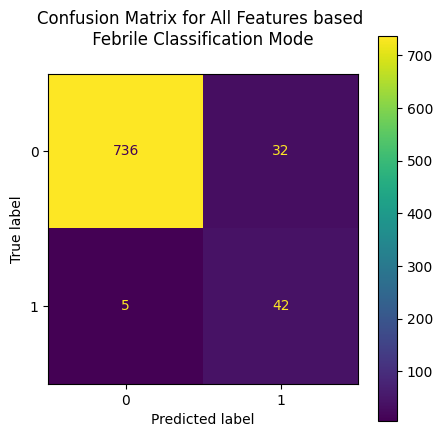


 --- 


In [135]:
# Logistic Regression with CV Search Multiple Features - aveOralF

from sklearn.linear_model import LogisticRegressionCV 

clf_model_dict = {};

display(Markdown("--- \n <br/>"))

stat_tables_lr = pd.DataFrame();


log_reg_multi_f = LogisticRegressionCV(scoring="f1", 
                                   class_weight="balanced", 
                                   max_iter=500,
                                   penalty='elasticnet', 
                                   solver='saga',
                                   l1_ratios = np.arange(0,1,0.1),
                                   Cs = [0.01,0.1,1,10],
                                   n_jobs = -1,
                                   tol = 0.01
                                   
                                  ) 

log_reg_multi_f.fit(train_x_processed, train_y["aveOralF_fever"]);
display(HTML(f"<div style='display:flex; justify-content:center'> Regularization Strength (Inverse): {log_reg_multi_f.C_[0]}, L1_Ratio: {log_reg_multi_f.l1_ratio_[0]} </div>"))
avg_fold_stats = {}
avg_fold_stats["confusion_matrix"] = [];
for train, val in kfold.split(train_x_processed,train_y["aveOralF_fever"]):
    
    log_reg_fold = sk.clone(log_reg_multi_f);
    log_reg_fold.fit(train_x_processed.iloc[train], train_y.iloc[train]["aveOralF_fever"])
    avg_fold_stats["confusion_matrix"].append(
                                       confusion_matrix(
                                           train_y.iloc[val]["aveOralF_fever"], 
                                           log_reg_fold.predict(train_x_processed.iloc[val]))
                                        )


#outMatrix = ConfusionMatrixDisplay(confusion_matrix(train_y["aveOralM_fever"], log_reg_multi_f.predict(train_x).plot(ax=axs[i]);
ConfusionMatrixDisplay(np.sum(avg_fold_stats["confusion_matrix"], axis = 0)).plot();
plt.title(f"Confusion Matrix for All Features based \n Febrile Classification Mode \n"); 

stat_table_lr = pd.DataFrame(classification_report(train_y["aveOralF_fever"], log_reg_multi_f.predict(train_x_processed),output_dict=True)).transpose()

stat_table_lr.index = pd.MultiIndex.from_product([['score'], stat_table_lr.index])

stat_tables_lr = pd.concat([stat_tables_lr, stat_table_lr], axis = 1);

#print("(Recall) Score: " + str(log_reg.score(test_set[feature].to_numpy().reshape(-1,1), test_set["aveOralM_fever"])))


clf_model_dict[feature] = log_reg;

fig.tight_layout();

display(Markdown("</br>"));

testFig = BytesIO();
plt.savefig(testFig, format='PNG', bbox_inches='tight');
plt.close();
display(HTML(f'''<div style="display:flex; flex-direction: row; align-items: center; justify-content: center">
                    <div style:"margin: 10px">{stat_tables_lr.to_html()}</div>
                    <div style:"margin: 10px"><img src='data:image/png;base64,{base64.b64encode(testFig.getvalue()).decode()}'></div>
                </div>'''))


display(Markdown("\n --- \n"))

For aveOralF the multi feature logistic regression model achieves an F1 Score of 0.72 without feature optimization, which is comparitive to the performance of the KNN models and single feature logistic regression ~0.7-0.75. This model on the other hand benefited from a balance of L1 and L2 reguralization as the L1 Ratio was 0.4 and weaker regularization strength 10. Next the models threshold will be optimized to maximize F1 Score. 

Best Threshold: 0.7415566379198186, F1 Score: 0.7927927927927927


---

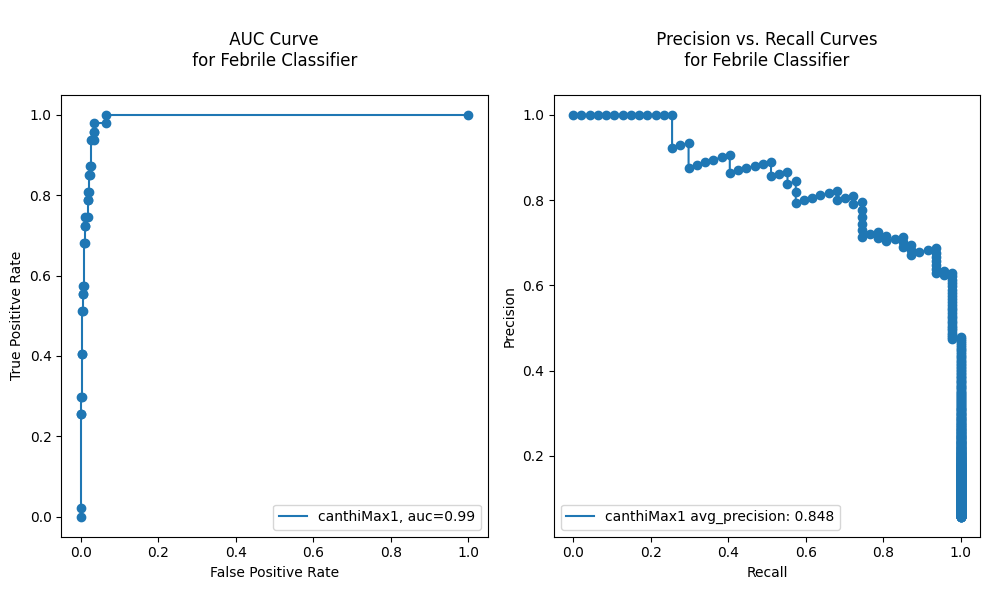

---

In [226]:
# ROC, ROC-AUC, PR Curves for Logistic Regression MultiFeature - aveOralF

fig, axs = plt.subplots(1, 2, figsize=(10, 6))

# ROC Curve

preds = log_reg_multi_f.predict_proba(train_x_processed)[:,1]
fpr, tpr, threshhold  = sk.metrics.roc_curve(train_y["aveOralF_fever"], preds)

auc = sk.metrics.roc_auc_score(train_y["aveOralF_fever"], preds)

axs[0].scatter(fpr,tpr)
axs[0].set_xlabel("False Positive Rate")
axs[0].set_ylabel("True Posititve Rate")
axs[0].set_title("\n AUC Curve \n for Febrile Classifier \n")
axs[0].plot(fpr,tpr,label=f"{feature}, auc="+str(round(auc,3)))
axs[0].legend(loc=4)


# PR - AUC    
preds = log_reg_multi_f.predict_proba(train_x_processed)[:,1]
precision, recall, thresholds = sk.metrics.precision_recall_curve(train_y["aveOralF_fever"], preds)

# Selecting appropriate threshold
f1_scores = 2*recall*precision / (recall+precision)
best_f1_threshold_log_reg_multi_f = thresholds[np.argmax(f1_scores)]

print(f"Best Threshold: {best_f1_threshold_log_reg_multi_f}, F1 Score: {f1_scores[np.argmax(f1_scores)]}");

pr_measure = sk.metrics.average_precision_score(train_y["aveOralF_fever"], preds)
axs[1].scatter(recall,precision)
axs[1].plot(recall,precision,label=f"{feature} avg_precision: {round(pr_measure,3)}")
axs[1].set_xlabel("Recall");
axs[1].set_ylabel("Precision");
axs[1].set_title("\n Precision vs. Recall Curves \n for Febrile Classifier \n")
axs[1].legend(loc=3)

fig.tight_layout();

display(Markdown("---"));

plt.show()

display(Markdown("---"));
#prt = pd.DataFrame([precision, recall, thresholds]).transpose().set_axis(["precision","recall", "thresholds"], axis=1)
#prt.sort_values(["recall","precision"], ascending = False)[prt["precision"]>0.2].head()

The model above achieved the best F1 Score out of the KNN and Logistic Regression models, achieving a F1 Score of ~0.79 with a threshold of ~0.74. This model will be further investigated on the test set.

In [137]:
# add best model
best_models_clf_f["Multi"]["All"]["Logistic_Regression_Multi"] = {
                                                    "Model": log_reg_multi_f,
                                                    "Threshold": best_f1_threshold_log_reg_multi_f
                                                }

##### C - Neural Network
--- 

Neural Networks will be used as more complex models to learn non linear relationships. The models will be developed in order of complexity starting with a simple single layer network in sk-learn. Then a no hidden layer network in keras seeking to capture the linear nature found in the regression task and finally a single hidden layer network with a concatanate layer to capture both the linear inputs and the non linear transformations thereof.

###### C.1 - Neural Network - SK-Learn - One Hidden

--- 

First a single layer network is developed in sk-learn for aveOralM.

**<center> aveOralM </center>**

In [138]:
# Grid Search for best parameters using Sklearn - aveOralM

from sklearn.neural_network import MLPClassifier

mlp_clf_m = MLPClassifier(random_state=42);

param_grid = {
    'hidden_layer_sizes': [(32,), (64,), (128,)],
    'activation': ['relu','tanh'],
    'solver': ['adam'],
    'alpha': [1,0.5,0.1],
    'learning_rate_init': [0.01,0.001],
    'momentum': [0.9, 0.95],
    'max_iter': [1000],
    'learning_rate': ['constant', 'adaptive'],
}

grid_srch = GridSearchCV(mlp_clf_m, param_grid, cv=5, n_jobs=-1, scoring="f1")

grid_srch.fit(train_x_processed, train_y["aveOralM_fever"]);
mlp_clf_m = grid_srch.best_estimator_;

mlp_clf_m.fit(train_x_processed, train_y["aveOralM_fever"]);
print(grid_srch.best_params_)

{'activation': 'relu', 'alpha': 1, 'hidden_layer_sizes': (128,), 'learning_rate': 'constant', 'learning_rate_init': 0.01, 'max_iter': 1000, 'momentum': 0.9, 'solver': 'adam'}


--- 



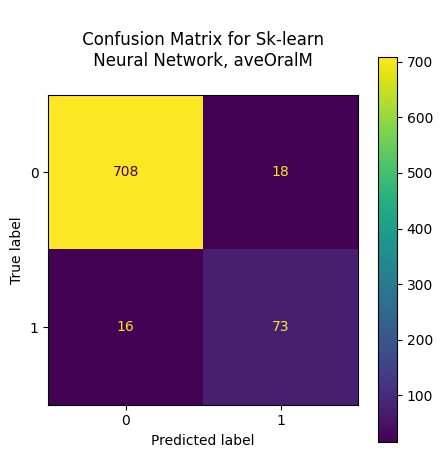


 ---

In [139]:
# confusion matrix for Sk-Learn Neural Network - aveOralM

ConfusionMatrixDisplay(confusion_matrix(train_y["aveOralM_fever"], mlp_clf_m.predict(train_x_processed))).plot();

stat_table_mlp_m = pd.DataFrame(classification_report(train_y["aveOralM_fever"], mlp_clf_m.predict(train_x_processed),output_dict=True)).transpose()

plt.title("\n Confusion Matrix for Sk-learn \n Neural Network, aveOralM \n");
fig.tight_layout();

display(Markdown("--- \n"));

testFig = BytesIO();
plt.savefig(testFig, format='PNG', bbox_inches='tight');
plt.close();

display(HTML(f'''<div style="display:flex; flex-direction: row; align-items: center; justify-content: center">
                    <div style:"margin: 10px">{stat_table_mlp_m.to_html()}</div>
                    <div style:"margin: 10px"><img src='data:image/png;base64,{base64.b64encode(testFig.getvalue()).decode()}'></div>
                </div>'''))



display(Markdown("\n ---"));

The best hyper parameters for the aveOralM neural network included a hidden layer size of 128 with a starting learning rate of 0.01, and momentum 0.9, with relu activation functions. There was a high degree of regularization as the optimum alpha value was 1.0. The network performed compartively well to the other models achieving a F1 Score of ~0.81 where are the best models from KNN and Logistic Regression averaged ~0.82. Next the best threshold will be found.

Best Threshold: 0.4456490713469666, F1 Score: 0.8432432432432433


--- 


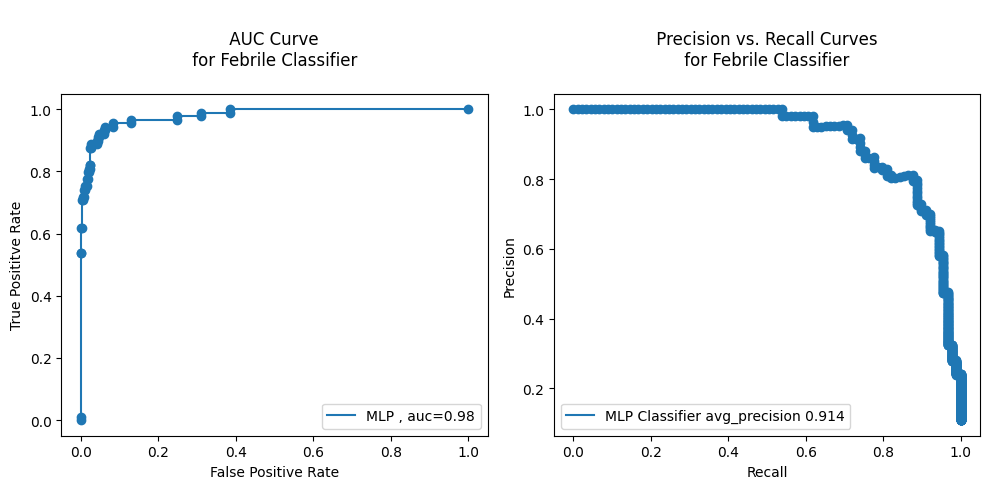


 ---

In [225]:
# ROC, ROC-AUC, PR Curves for Sk-Learn Neural Network - aveOralM

fig, axs = plt.subplots(1, 2, figsize=(10, 5));

scaler = StandardScaler()
train_x_norm = train_x_processed;

preds = mlp_clf_m.predict_proba(train_x_norm)[:,1];
fpr, tpr, threshhold  = sk.metrics.roc_curve(train_y["aveOralM_fever"], preds);

auc = sk.metrics.roc_auc_score(train_y["aveOralM_fever"], preds);

axs[0].scatter(fpr,tpr);
axs[0].set_xlabel("False Positive Rate");
axs[0].set_ylabel("True Posititve Rate");
axs[0].set_title("\n AUC Curve \n for Febrile Classifier \n");
axs[0].plot(fpr,tpr,label=f"MLP , auc="+str(round(auc,3)));   
axs[0].legend(loc=4);

preds = mlp_clf_m.predict_proba(train_x_norm)[:,1];
precision, recall, thresholds = sk.metrics.precision_recall_curve(train_y["aveOralM_fever"], preds);

# Selecting appropriate threshold
f1_scores = 2*recall*precision / (recall+precision)
best_f1_threshold_mlp_clf_m = thresholds[np.argmax(f1_scores)]

print(f"Best Threshold: {best_f1_threshold_mlp_clf_m}, F1 Score: {f1_scores[np.argmax(f1_scores)]}");


pr_measure = sk.metrics.average_precision_score(train_y["aveOralM_fever"], preds);

axs[1].scatter(recall,precision);
axs[1].plot(recall,precision,label=f"MLP Classifier avg_precision {round(pr_measure,3)}");
axs[1].set_xlabel("Recall");
axs[1].set_ylabel("Precision");
axs[1].set_title("\n Precision vs. Recall Curves \n for Febrile Classifier \n");

axs[1].legend(loc=3);

fig.tight_layout();

display(Markdown("--- \n"));

plt.show()

display(Markdown("\n ---"));

#prt = pd.DataFrame([precision, recall, thresholds]).transpose().set_axis(["precision","recall", "thresholds"], axis=1)
#prt.sort_values(["recall","precision"], ascending = False)[prt["precision"]>0.2].head()

The best threshold was found to be ~0.446 with an F1 Score of ~0.843 leading to toi the best performance above the multifeature logistic regression model with an F1 Score of ~0.83. This model will be further evaluated on the test set.

In [141]:
# add best model
best_models_clf_m["Multi"]["All"]["Neural_Network_Sk_Learn"] = {
                                                    "Model": mlp_clf_m,
                                                    "Threshold": best_f1_threshold_mlp_clf_m
                                                }

--- 

**<center> aveOralF </center>**

Next, a simple neural network with one hidden layer is developed in Sk-Learn for classification, with grid search to find the optimum hyper parameters. 

In [142]:
# Grid Search for best parameters using Sklearn - aveOralF

mlp_clf_f = MLPClassifier(random_state=42);

param_grid = {
    'hidden_layer_sizes': [(32,), (64,), (128,)],
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [1,0.5,0.1],
    'learning_rate_init': [0.01,0.001],
    'momentum': [0.9, 0.95],
    'max_iter': [1000],
    'learning_rate': ['constant', 'adaptive'],
}
grid_srch = GridSearchCV(mlp_clf_f, param_grid, cv=5, n_jobs=-1, scoring="f1")

grid_srch.fit(train_x_processed, train_y["aveOralF_fever"]);
mlp_clf_f = grid_srch.best_estimator_;

mlp_clf_f.fit(train_x_processed, train_y["aveOralF_fever"]);
print(grid_srch.best_params_)

{'activation': 'relu', 'alpha': 1, 'hidden_layer_sizes': (32,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_iter': 1000, 'momentum': 0.9, 'solver': 'adam'}


--- 



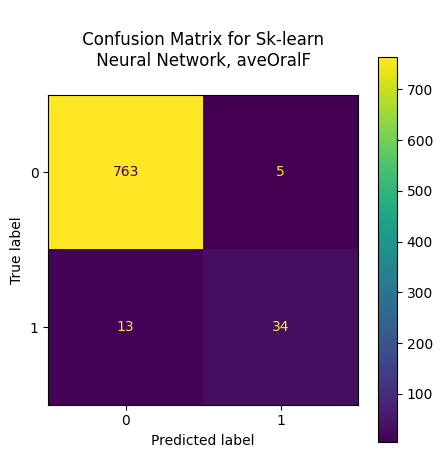


 ---

In [143]:
# confusion matrix for Sk-Learn Neural Network - aveOralF

ConfusionMatrixDisplay(confusion_matrix(train_y["aveOralF_fever"], mlp_clf_f.predict(train_x_processed))).plot();

stat_table_mlp_f = pd.DataFrame(classification_report(train_y["aveOralF_fever"], mlp_clf_f.predict(train_x_processed),output_dict=True)).transpose()

plt.title("\n Confusion Matrix for Sk-learn \n Neural Network, aveOralF \n");
fig.tight_layout();

display(Markdown("--- \n"));

testFig = BytesIO();
plt.savefig(testFig, format='PNG', bbox_inches='tight');
plt.close();
display(HTML(f'''<div style="display:flex; flex-direction: row; align-items: center; justify-content: center">
                    <div style:"margin: 10px">{stat_table_mlp_f.to_html()}</div>
                    <div style:"margin: 10px"><img src='data:image/png;base64,{base64.b64encode(testFig.getvalue()).decode()}'></div>
                </div>'''))

display(Markdown("\n ---"));

The aveOralF sklearn based network achieved an F1 Score of ~0.79 without threshold optimization which comperable to the best models which achieved scores of ~0.7-0.75. The best hyperparameters for the neural network included relu activation functions, a hidden layer size of 32 with a 0.001 starting learning rate. Next the optimum threshold will be found for the model to maximize the F1 Score.

Best Threshold: 0.5045545400896925, F1 Score: 0.7906976744186047


--- 


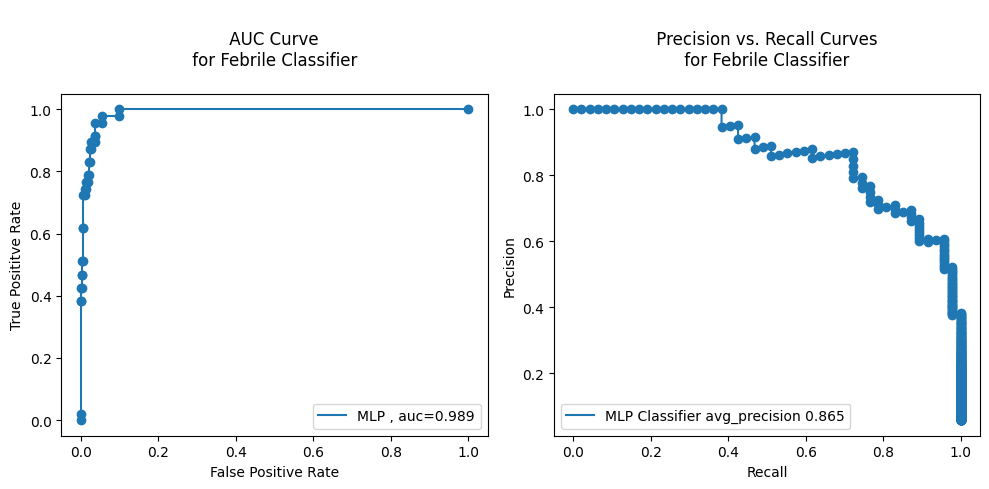


 ---

In [224]:
# ROC, ROC-AUC, PR Curves for Sk-Learn Neural Network - aveOralF

fig, axs = plt.subplots(1, 2, figsize=(10, 5));

scaler = StandardScaler()
train_x_norm = train_x_processed;

preds = mlp_clf_f.predict_proba(train_x_norm)[:,1];
fpr, tpr, threshhold  = sk.metrics.roc_curve(train_y["aveOralF_fever"], preds);

auc = sk.metrics.roc_auc_score(train_y["aveOralF_fever"], preds);

axs[0].scatter(fpr,tpr);
axs[0].set_xlabel("False Positive Rate");
axs[0].set_ylabel("True Posititve Rate");
axs[0].set_title("\n AUC Curve \n for Febrile Classifier \n");
axs[0].plot(fpr,tpr,label=f"MLP , auc="+str(round(auc,3)));   
axs[0].legend(loc=4);

preds = mlp_clf_f.predict_proba(train_x_norm)[:,1];
precision, recall, thresholds = sk.metrics.precision_recall_curve(train_y["aveOralF_fever"], preds);

# Selecting appropriate threshold
f1_scores = 2*recall*precision / (recall+precision)

best_f1_threshold_mlp_clf_f = thresholds[np.argmax(f1_scores)]

print(f"Best Threshold: {best_f1_threshold_mlp_clf_f}, F1 Score: {f1_scores[np.argmax(f1_scores)]}");

pr_measure = sk.metrics.average_precision_score(train_y["aveOralF_fever"], preds);

axs[1].scatter(recall,precision);
axs[1].plot(recall,precision,label=f"MLP Classifier avg_precision {round(pr_measure,3)}");
axs[1].set_xlabel("Recall");
axs[1].set_ylabel("Precision");
axs[1].set_title("\n Precision vs. Recall Curves \n for Febrile Classifier \n");

axs[1].legend(loc=3);

fig.tight_layout();

display(Markdown("--- \n"));

plt.show()

display(Markdown("\n ---"));

#prt = pd.DataFrame([precision, recall, thresholds]).transpose().set_axis(["precision","recall", "thresholds"], axis=1)
#prt.sort_values(["recall","precision"], ascending = False)[prt["precision"]>0.2].head()

The aveOralF network achieved the same F1 Score as its unoptimized threshold counterpart with a F1 Score of ~0.79 with a threshold of 0.504. Next this model will be added to be evaluated on the test.

In [145]:
# add best model
best_models_clf_f["Multi"]["All"]["Neural_Network_Sk_Learn"] = {
                                                    "Model": mlp_clf_f,
                                                    "Threshold": best_f1_threshold_mlp_clf_f
                                                }

###### C.2 - Neural Network - Keras - No Hidden

---

In [146]:
# Create Simple - No Hidden Layer Classification Model

# build model
class SimpleClassificationHyperModel(keras_tuner.HyperModel):
    def __init__(self, train_x):
        
        self.train_x = train_x
        
    def build(self, hp):
        
        inputs = keras.Input(shape=(38,), name = "temperature_inputs")
        adapt_data = self.train_x;
        
        normalizer = keras.layers.Normalization(axis=-1)
        normalizer.adapt(adapt_data)
    
        norm_inputs = normalizer(inputs)
        
        outputs = keras.layers.Dense(1, 
                                     activation="sigmoid", 
                                     name="febrile_classification_output",
                                     kernel_initializer=hp.Choice('weight_init3', ['he_normal', 'he_uniform']), #,'he_normal','he_uniform'])
                                     kernel_regularizer=keras.regularizers.L1L2(l1=hp.Choice('l1_kernel3', [0.001,0.01, 0.1]), l2=hp.Choice('l2_kernel3', [0.001,0.01, 0.1])),
                                     bias_regularizer=keras.regularizers.L1L2(l1=hp.Choice('l1_bias3', [0.001,0.01, 0.1]), l2=hp.Choice('l2_bias3', [0.001,0.01, 0.1])),
                                    )(norm_inputs)
        
        model = keras.Model(inputs=inputs, 
                            outputs=outputs, 
                            #output_bias=initial_bias
                           )
        
        model.compile(optimizer = keras.optimizers.Adam(learning_rate=0.01),
                      loss='binary_crossentropy', 
                      metrics = ['accuracy', metrics.AUC(curve='PR'), keras.metrics.Recall()]);
        
        return model;
    

In [147]:
# Test - Validation Split Neural Network
train_x_clf, train_x_val_clf, train_y_clf, train_y_val_clf = train_test_split(train_x_processed, 
                                                                              train_y, 
                                                                              test_size=0.2, 
                                                                              random_state = 42, 
                                                                              stratify = train_y[["aveOralF_fever","aveOralM_fever"]]
                                                                             )

**<center> aveOralM </center>**

In [148]:
# Tune Model Hyperparameters using Keras Tuner - aveOralM

clf_tuner_simple_m = keras_tuner.RandomSearch(
    SimpleClassificationHyperModel(train_x_clf.to_numpy()),
    objective= keras_tuner.Objective('val_auc', direction='max'),
    max_trials=10,
    overwrite=True)

clf_tuner_simple_m.search(train_x_clf, 
             train_y_clf["aveOralM_fever"], 
             epochs=50, 
             validation_data=(train_x_val_clf, train_y_val_clf["aveOralM_fever"]), 
)


Trial 10 Complete [00h 00m 08s]
val_auc: 0.8783382773399353

Best val_auc So Far: 0.905838131904602
Total elapsed time: 00h 01m 29s


In [149]:
# Get Best Hyper Parameters from Keras Tuner - aveOralM (Simple Model)
clf_tuner_simple_m.get_best_hyperparameters()[0].values

{'weight_init3': 'he_uniform',
 'l1_kernel3': 0.1,
 'l2_kernel3': 0.01,
 'l1_bias3': 0.1,
 'l2_bias3': 0.1}

In [150]:
# Get best Model from Keras Tuner - aveOralM (Simple Model)
clf_simple_m = clf_tuner_simple_m.get_best_models()[0]
clf_simple_m.summary()

/home/matve/ml-coursework/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ temperature_inputs (InputLayer) │ (None, 38)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ normalization (Normalization)   │ (None, 38)             │            77 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ febrile_classification_output   │ (None, 1)              │            39 │
│ (Dense)                         │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 116 (468.00 B)

 Trainable params: 39 (156.00 B)

 Non-trainable params: 77 (312.00 B)

--- 

**<center> aveOralF </center>**

Find best parameters for aveOralF:

In [151]:
# Tune Model Hyperparameters using Keras Tuner - aveOralF

clf_tuner_simple_f = keras_tuner.RandomSearch(
    SimpleClassificationHyperModel(train_x_clf.to_numpy()),
    objective= keras_tuner.Objective('val_auc', direction='max'),
    max_trials=20,
    overwrite=True)

clf_tuner_simple_f.search(train_x_clf, 
             train_y_clf["aveOralF_fever"], 
             epochs=50, 
             validation_data=(train_x_val_clf, train_y_val_clf["aveOralF_fever"]), 
)

Trial 20 Complete [00h 00m 10s]
val_auc: 0.8300783038139343

Best val_auc So Far: 0.8445349335670471
Total elapsed time: 00h 02m 57s


In [152]:
# Get Best Hyper Parameters from Keras Tuner - aveOralF (Simple Model)
clf_tuner_simple_f.get_best_hyperparameters()[0].values

{'weight_init3': 'he_normal',
 'l1_kernel3': 0.01,
 'l2_kernel3': 0.01,
 'l1_bias3': 0.001,
 'l2_bias3': 0.1}

In [153]:
# Get best Model from Keras Tuner - aveOralF (Simple Model)
clf_simple_f = clf_tuner_simple_m.get_best_models()[0]
clf_simple_f.summary()

/home/matve/ml-coursework/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ temperature_inputs (InputLayer) │ (None, 38)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ normalization (Normalization)   │ (None, 38)             │            77 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ febrile_classification_output   │ (None, 1)              │            39 │
│ (Dense)                         │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 116 (468.00 B)

 Trainable params: 39 (156.00 B)

 Non-trainable params: 77 (312.00 B)

--- 

**<center> aveOralM </center>**

Train the aveOralM model on and track metrics:

In [154]:
# Fit Neural Network - aveOralM (Simple)

keras.utils.set_random_seed(812)
clf_simple_m = clf_tuner_simple_m.get_best_models()[0]

clf_simple_m.optimizer.learning_rate.assign(0.001)
history = clf_simple_m.fit(train_x_clf,train_y_clf["aveOralM_fever"], 
                    epochs = 25, 
                    verbose = 0, 
                    batch_size = 32, 
                    validation_data = (train_x_val_clf, train_y_val_clf["aveOralM_fever"]),
                    #callbacks= [keras.callbacks.EarlyStopping(monitor="val_recall", mode="max", patience=30)] #monitor=prMetric.name
               );

clf_simple_history_m = history;

--- 


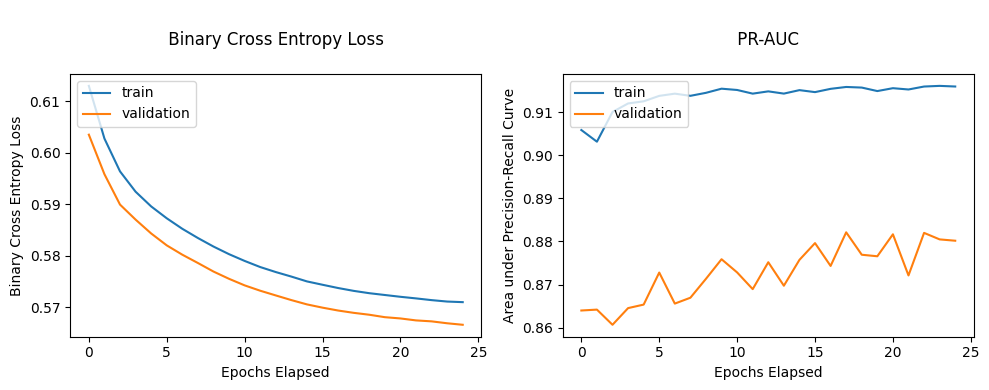


 ---

In [155]:
# Plot Cross Entropy Loss and PR-AUC - aveOralM (Simple)

fig, axs = plt.subplots(1, 2, figsize=(10, 4));

# print(history.history.keys())

# summarize history for Binary Cross Entropy loss

axs[0].plot(clf_simple_history_m.history['loss'])
axs[0].plot(clf_simple_history_m.history['val_loss'])
axs[0].set_title('\n Binary Cross Entropy Loss \n')
axs[0].set_ylabel('Binary Cross Entropy Loss')
axs[0].set_xlabel('Epochs Elapsed')
axs[0].legend(['train', 'validation'], loc='upper left')


# summarize history for PR-AUC

axs[1].plot(clf_simple_history_m.history["auc"])
axs[1].plot(clf_simple_history_m.history["val_auc"])
axs[1].set_title('\n PR-AUC \n')
axs[1].set_ylabel('Area under Precision-Recall Curve')
axs[1].set_xlabel('Epochs Elapsed')
axs[1].legend(['train', 'validation'], loc='upper left')

fig.tight_layout();

display(Markdown("--- \n")) 
plt.show()

display(Markdown("\n ---")) 

26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step
Best Threshold: 0.4193565845489502, F1 Score: 0.826530612244898


--- 



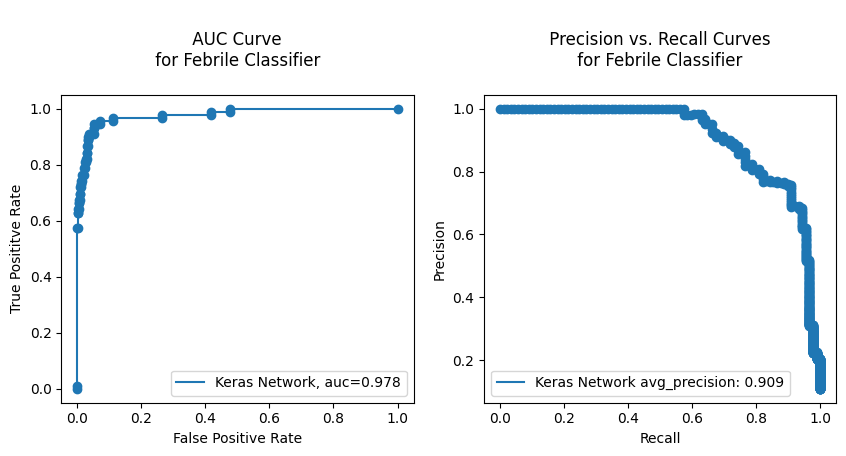


 ---

In [223]:
# ROC, ROC-AUC, PR Curves for Neural Network Classification - aveOralM (Simple)

fig, axs = plt.subplots(1, 2, figsize=(10, 4));

preds =  clf_simple_m.predict(train_x_processed)
fpr, tpr, threshhold  = sk.metrics.roc_curve(train_y["aveOralM_fever"].to_numpy().astype(int), preds)

auc = sk.metrics.roc_auc_score(train_y["aveOralM_fever"], preds)

axs[0].scatter(fpr,tpr)
axs[0].set_xlabel("False Positive Rate")
axs[0].set_ylabel("True Posititve Rate")
axs[0].set_title("\n AUC Curve \n for Febrile Classifier \n")
axs[0].plot(fpr,tpr,label=f"Keras Network, auc={round(auc,3)}")
axs[0].legend(loc=4)

preds = clf_simple_m.predict(train_x_processed)

pr_measure = sk.metrics.average_precision_score(train_y["aveOralM_fever"], preds)

precision, recall, thresholds = sk.metrics.precision_recall_curve(train_y["aveOralM_fever"].to_numpy().astype(int), preds)

# Selecting appropriate threshold
f1_scores = 2*recall*precision / (recall+precision)
best_f1_threshold_clf_simple_m = thresholds[np.argmax(f1_scores)]

print(f"Best Threshold: {best_f1_threshold_clf_simple_m}, F1 Score: {f1_scores[np.argmax(f1_scores)]}")

axs[1].scatter(recall,precision)
axs[1].plot(recall,precision,label=f"Keras Network avg_precision: {round(pr_measure,3)}")
axs[1].set_xlabel("Recall");
axs[1].set_ylabel("Precision");
axs[1].set_title("\n Precision vs. Recall Curves \n for Febrile Classifier \n")
axs[1].legend(loc=3)

testFig = BytesIO();
plt.savefig(testFig, format='PNG', bbox_inches='tight');
plt.close();

display(Markdown("--- \n"));
display(HTML(f"<center><img src='data:image/png;base64,{base64.b64encode(testFig.getvalue()).decode()}'></center>"))
display(Markdown("\n ---"));

#prt = pd.DataFrame([precision, recall, thresholds]).transpose().set_axis(["precision","recall", "thresholds"], axis=1)
#prt.sort_values(["recall","precision"], ascending = False)[prt["precision"]>0.2].head()

The best treshold for the simple neural network was ~0.42 with an F1 Score of ~0.83 which is comperable to the sklearn model which achieved an F1 score of ~0.84. Based on this new threshold the resulting correlation matrix was developed.

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 



 --- 



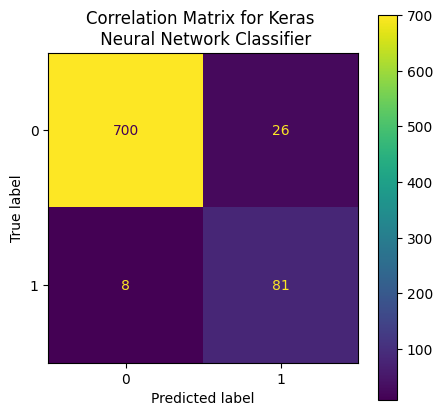


 --- 


In [157]:
# Confusion Matrix For Neural Network Classifier - aveOralM (Simple)

ConfusionMatrixDisplay(confusion_matrix(train_y["aveOralM_fever"], clf_simple_m.predict(train_x_processed) >= best_f1_threshold_clf_simple_m)).plot();
plt.title("Correlation Matrix for Keras \n Neural Network Classifier");
stat_table_simple_clf_m = pd.DataFrame(classification_report(train_y["aveOralM_fever"], clf_simple_m.predict(train_x_processed) >= best_f1_threshold_clf_simple_m,output_dict=True)).transpose()

testFig = BytesIO();
plt.savefig(testFig, format='PNG', bbox_inches='tight');
plt.close();

display(Markdown("\n --- \n"))
display(HTML(f'''<div style="display:flex; flex-direction: row; align-items: center; justify-content: center">
                    <div style:"margin: 10px">{stat_table_simple_clf_m.to_html()}</div>
                    <div style:"margin: 10px"><img src='data:image/png;base64,{base64.b64encode(testFig.getvalue()).decode()}'></div>
                </div>'''))
display(Markdown("\n --- \n"))

This no hidden layer Neural Network for aveOralM will be added to be evaluated on the test set and compared to the other models.

In [158]:
# add best model
best_models_clf_m["Multi"]["All"]["Neural_Network_No_Hidden"] = {
                                                    "Model": clf_simple_m,
                                                    "Threshold": best_f1_threshold_clf_simple_m
                                                }

--- 

**<center> aveOralF </center>**

Train the aveOralF model and track metrics:

In [159]:
# Fit Neural Network - aveOralF (Simple)

keras.utils.set_random_seed(812)
clf_simple_f = clf_tuner_simple_f.get_best_models()[0]
history = clf_simple_f.fit(train_x_clf,train_y_clf["aveOralF_fever"], 
                    epochs = 60, 
                    verbose = 0, 
                    batch_size = 128, 
                    validation_data = (train_x_val_clf, train_y_val_clf["aveOralF_fever"]),
                    #callbacks= [keras.callbacks.EarlyStopping(monitor="val_recall", mode="max", patience=30)] #monitor=prMetric.name
               );

clf_simple_history_f = history;

/home/matve/ml-coursework/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


--- 


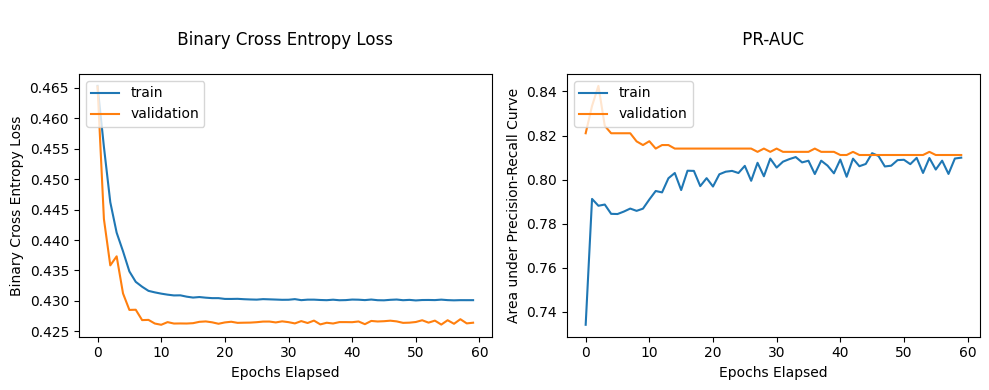


 ---

In [160]:
# Plot Cross Entropy Loss and PR-AUC - aveOralF (Simple)

fig, axs = plt.subplots(1, 2, figsize=(10, 4));

# print(history.history.keys())

# summarize history for Binary Cross Entropy loss

axs[0].plot(clf_simple_history_f.history['loss'])
axs[0].plot(clf_simple_history_f.history['val_loss'])
axs[0].set_title('\n Binary Cross Entropy Loss \n')
axs[0].set_ylabel('Binary Cross Entropy Loss')
axs[0].set_xlabel('Epochs Elapsed')
axs[0].legend(['train', 'validation'], loc='upper left')


# summarize history for PR-AUC

axs[1].plot(clf_simple_history_f.history["auc"])
axs[1].plot(clf_simple_history_f.history["val_auc"])
axs[1].set_title('\n PR-AUC \n')
axs[1].set_ylabel('Area under Precision-Recall Curve')
axs[1].set_xlabel('Epochs Elapsed')
axs[1].legend(['train', 'validation'], loc='upper left')

fig.tight_layout();

display(Markdown("--- \n")) 
plt.show()

display(Markdown("\n ---")) 

26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step
Best Threshold: 0.5074317455291748, F1 Score: 0.761904761904762


--- 



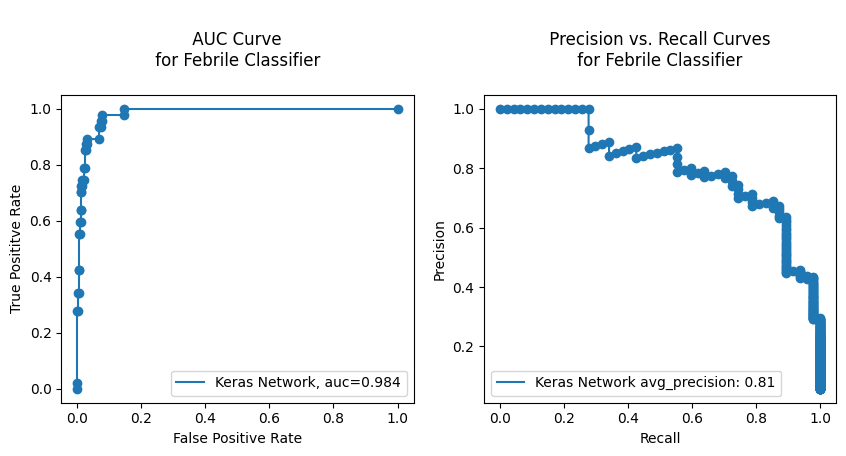


 ---

In [222]:
# ROC, ROC-AUC, PR Curves for Neural Network Classification - aveOralF (Simple)

fig, axs = plt.subplots(1, 2, figsize=(10, 4));

preds =  clf_simple_f.predict(train_x_processed)
fpr, tpr, threshhold  = sk.metrics.roc_curve(train_y["aveOralF_fever"].to_numpy().astype(int), preds)

auc = sk.metrics.roc_auc_score(train_y["aveOralF_fever"], preds)

axs[0].scatter(fpr,tpr)
axs[0].set_xlabel("False Positive Rate")
axs[0].set_ylabel("True Posititve Rate")
axs[0].set_title("\n AUC Curve \n for Febrile Classifier \n")
axs[0].plot(fpr,tpr,label=f"Keras Network, auc={round(auc,3)}")
axs[0].legend(loc=4)

preds = clf_simple_f.predict(train_x_processed)

pr_measure = sk.metrics.average_precision_score(train_y["aveOralF_fever"], preds)

precision, recall, thresholds = sk.metrics.precision_recall_curve(train_y["aveOralF_fever"].to_numpy().astype(int), preds)

# Selecting appropriate threshold
f1_scores = 2*recall*precision / (recall+precision)
best_f1_threshold_clf_simple_f = thresholds[np.argmax(f1_scores)]

print(f"Best Threshold: {best_f1_threshold_clf_simple_f}, F1 Score: {f1_scores[np.argmax(f1_scores)]}")

axs[1].scatter(recall,precision)
axs[1].plot(recall,precision,label=f"Keras Network avg_precision: {round(pr_measure,3)}")
axs[1].set_xlabel("Recall");
axs[1].set_ylabel("Precision");
axs[1].set_title("\n Precision vs. Recall Curves \n for Febrile Classifier \n")
axs[1].legend(loc=3)

testFig = BytesIO();
plt.savefig(testFig, format='PNG', bbox_inches='tight');
plt.close();

display(Markdown("--- \n"));
display(HTML(f"<center><img src='data:image/png;base64,{base64.b64encode(testFig.getvalue()).decode()}'></center>"))
display(Markdown("\n ---"));

#prt = pd.DataFrame([precision, recall, thresholds]).transpose().set_axis(["precision","recall", "thresholds"], axis=1)
#prt.sort_values(["recall","precision"], ascending = False)[prt["precision"]>0.2].head()

The best threshold for the aveOralF model with a no hidden layer was ~0.51 with an F1 Score of ~0.77 slightly less than the F1 Score of the sklearn neural network ~0.79. 

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 



 --- 



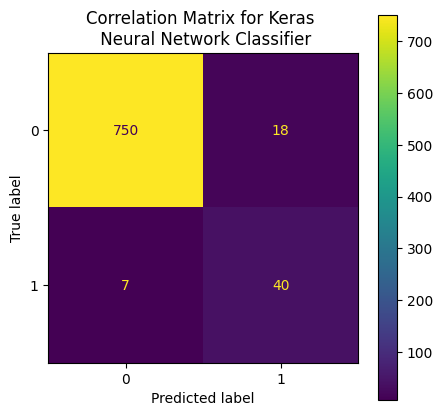


 --- 


In [162]:
# Confusion Matrix For Neural Network Classifier - aveOralF (Simple)


stat_table_simple_clf_f = pd.DataFrame(classification_report(train_y["aveOralF_fever"], clf_simple_m.predict(train_x_processed) >= best_f1_threshold_clf_simple_m,output_dict=True)).transpose()

ConfusionMatrixDisplay(confusion_matrix(train_y["aveOralF_fever"], clf_simple_f.predict(train_x_processed) >= best_f1_threshold_clf_simple_f)).plot();
plt.title("Correlation Matrix for Keras \n Neural Network Classifier");

testFig = BytesIO();
plt.savefig(testFig, format='PNG', bbox_inches='tight');
plt.close();

display(Markdown("\n --- \n"))
display(HTML(f'''<div style="display:flex; flex-direction: row; align-items: center; justify-content: center">
                    <div style:"margin: 10px">{stat_table_simple_clf_f.to_html()}</div>
                    <div style:"margin: 10px"><img src='data:image/png;base64,{base64.b64encode(testFig.getvalue()).decode()}'></div>
                </div>'''))
display(Markdown("\n --- \n"))

The model will be added for further evaluation on the test set.

In [163]:
# add best model
best_models_clf_f["Multi"]["All"]["Neural_Network_No_Hidden"] = {
                                                    "Model": clf_simple_f,
                                                    "Threshold": best_f1_threshold_clf_simple_f
                                                }

###### C.3 - Neural Network - Keras - 1 Hidden

--- 

Next a more complicated model is developed comperable to the sklearn network, however this network features a concatanate layer to capture the linear nature of the input features, as well as the non linear transformations of the hidden layer.

In [164]:
# Create Tunable Hyper Model for Keras Tuner - One Hidden Layer

# build model
class OneHiddenClassificationHyperModel(keras_tuner.HyperModel):
    def __init__(self, train_x):
        
        self.train_x = train_x
        
    def build(self, hp):
        
        inputs = keras.Input(shape=(38,), name = "temperature_inputs")
        adapt_data = self.train_x;

        normalizer = keras.layers.Normalization(axis=-1)
        normalizer.adapt(adapt_data)
    
        norm_inputs = normalizer(inputs)

        #x = inputs
        
        x = keras.layers.Dense(hp.Choice('units1', [32,64,128]), #[8,16,32,64]), 
                               activation=hp.Choice('activation_function', ["relu","elu","selu", "linear"]), #, "elu","selu"]), 
                               kernel_initializer=hp.Choice('weight_init', ['he_normal', 'he_uniform']), #,'he_normal','he_uniform'])
                               kernel_regularizer=keras.regularizers.L1L2(l1=hp.Choice('l1_kernel', [0.001,0.01, 0.1]), l2=hp.Choice('l2_kernel', [0.001,0.01, 0.1])),
                               bias_regularizer=keras.regularizers.L1L2(l1=hp.Choice('l1_bias', [0.001,0.01, 0.1]), l2=hp.Choice('l2_bias', [0.001,0.01, 0.1])),
                               #activity_regularizer=keras.regularizers.L1L2(l1=hp.Choice('l1_activity', [0.001,0.01, 0.1]), l2=hp.Choice('l2_activity', [0.001,0.01, 0.1])),
                              )(norm_inputs)
        
        #x = keras.layers.Dropout(0.5)(x); # add dropout to reduce overfitting

        # x = keras.layers.Dense(hp.Choice('units2', [2,4,8]), 
        #                        activation=hp.Choice('activation_function', ["relu", "tanh"]), 
        #                        kernel_initializer='glorot_uniform',
        #                        #kernel_regularizer=keras.regularizers.L1L2(l1=hp.Choice('l1_kernel', [0.001,0.01, 0.1]), l2=hp.Choice('l2_kernel', [0.001,0.01, 0.1])),
        #                        #bias_regularizer=keras.regularizers.L1L2(l1=hp.Choice('l1_bias', [0.001,0.01, 0.1]), l2=hp.Choice('l2_bias', [0.001,0.01, 0.1])),
        #                        #activity_regularizer=keras.regularizers.L1L2(l1=hp.Choice('l1_activity', [0.001,0.01, 0.1]), l2=hp.Choice('l2_activity', [0.001,0.01, 0.1])),
        #                       )(x)

        # x = keras.layers.Dense(26, activation=hp.Choice('activation_function', ["relu", "tanh"]), kernel_initializer='glorot_uniform')(x)
        x = keras.layers.Concatenate(axis=-1)([x,norm_inputs])

        
        outputs = keras.layers.Dense(1, 
                                     activation="sigmoid", 
                                     name="febrile_classification_output",
                                     kernel_initializer=hp.Choice('weight_init3', ['he_normal', 'he_uniform']), #,'he_normal','he_uniform'])
                                     kernel_regularizer=keras.regularizers.L1L2(l1=hp.Choice('l1_kernel3', [0.001,0.01, 0.1]), l2=hp.Choice('l2_kernel3', [0.001,0.01, 0.1])),
                                     bias_regularizer=keras.regularizers.L1L2(l1=hp.Choice('l1_bias3', [0.001,0.01, 0.1]), l2=hp.Choice('l2_bias3', [0.001,0.01, 0.1])),
                                    )(x)
        
        model = keras.Model(inputs=inputs, 
                            outputs=outputs, 
                            #output_bias=initial_bias
                           )
        
        model.compile(optimizer = keras.optimizers.Adam(learning_rate=0.01),
                      loss='binary_crossentropy', 
                      metrics = ['accuracy', metrics.AUC(curve='PR'), keras.metrics.Recall()]);
        
        return model;
    

The models for aveOralM and aveOralF febrile patient classification will be developed by first searching for the best hyperparameters using keras tuner, such as the L1 and L2 regularization. 

**<center> aveOralM </center>**

In [193]:
# Tune Model Hyperparameters using Keras Tuner - aveOralM (Hidden Model)
K.clear_session()

clf_tuner_hidden_m = keras_tuner.RandomSearch(
    OneHiddenClassificationHyperModel(train_x_clf.to_numpy()),
    objective= keras_tuner.Objective('val_auc', direction='max'),
    max_trials=10,
    overwrite=True)

clf_tuner_hidden_m.search(train_x_clf, 
             train_y_clf["aveOralM_fever"], 
             epochs=50, 
             validation_data=(train_x_val_clf, train_y_val_clf["aveOralM_fever"]), 
)


Trial 10 Complete [00h 00m 09s]
val_auc: 0.8825920224189758

Best val_auc So Far: 0.9029631018638611
Total elapsed time: 00h 01m 46s


In [194]:
# Get Best Hyper Parameters from Keras Tuner - aveOralM (Hidden Model)
clf_tuner_hidden_m.get_best_hyperparameters()[0].values

{'units1': 64,
 'activation_function': 'selu',
 'weight_init': 'he_normal',
 'l1_kernel': 0.1,
 'l2_kernel': 0.1,
 'l1_bias': 0.01,
 'l2_bias': 0.001,
 'weight_init3': 'he_uniform',
 'l1_kernel3': 0.1,
 'l2_kernel3': 0.01,
 'l1_bias3': 0.01,
 'l2_bias3': 0.01}

In [195]:
# Get best Model from Keras Tuner - aveOralM (Hidden Model)
clf_hidden_m = clf_tuner_hidden_m.get_best_models()[0]
clf_hidden_m.summary()

/home/matve/ml-coursework/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ temperature_inputs  │ (None, 38)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 38)        │         77 │ temperature_inpu… │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 64)        │      2,496 │ normalization[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 102)       │          0 │ dense[0][0],      │
│ (Concatenate)       │                   │            │ normalization[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ febrile_classifica… │ (None, 1)         │        103 │ concatenate[0][0] │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,676 (10.46 KB)

 Trainable params: 2,599 (10.15 KB)

 Non-trainable params: 77 (312.00 B)

--- 

**<center> aveOralF </center>**

In [175]:
# Tune Model Hyperparameters using Keras Tuner - aveOralF (Hidden Model)
K.clear_session()

clf_tuner_hidden_f = keras_tuner.RandomSearch(
    OneHiddenClassificationHyperModel(train_x_clf.to_numpy()),
    objective= keras_tuner.Objective('val_auc', direction='max'),
    max_trials=10,
    overwrite=True)

clf_tuner_hidden_f.search(train_x_clf, 
             train_y_clf["aveOralF_fever"], 
             epochs=50, 
             validation_data=(train_x_val_clf, train_y_val_clf["aveOralF_fever"]), 
)

Trial 10 Complete [00h 00m 10s]
val_auc: 0.8153111934661865

Best val_auc So Far: 0.837712824344635
Total elapsed time: 00h 01m 40s


In [191]:
# Get Best Hyper Parameters from Keras Tuner - aveOralF (Hidden Model)
clf_tuner_hidden_f.get_best_hyperparameters()[0].values

{'units1': 64,
 'activation_function': 'linear',
 'weight_init': 'he_uniform',
 'l1_kernel': 0.001,
 'l2_kernel': 0.001,
 'l1_bias': 0.1,
 'l2_bias': 0.01,
 'weight_init3': 'he_uniform',
 'l1_kernel3': 0.1,
 'l2_kernel3': 0.1,
 'l1_bias3': 0.001,
 'l2_bias3': 0.01}

In [192]:
# Get best Model from Keras Tuner - aveOralF (Hidden Model)
clf_hidden_f = clf_tuner_hidden_f.get_best_models()[0]
clf_hidden_f.summary()

/home/matve/ml-coursework/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ temperature_inputs  │ (None, 38)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 38)        │         77 │ temperature_inpu… │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 64)        │      2,496 │ normalization[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 102)       │          0 │ dense[0][0],      │
│ (Concatenate)       │                   │            │ normalization[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ febrile_classifica… │ (None, 1)         │        103 │ concatenate[0][0] │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,676 (10.46 KB)

 Trainable params: 2,599 (10.15 KB)

 Non-trainable params: 77 (312.00 B)

--- 

Next the models will be trained and performance metrics such as binary cross entropy loss and PR-AUC monitored.

**<center> aveOralM </center>**

Train the aveOralM model and track metrics:

In [196]:
# Fit Neural Network - aveOralM (Hidden)

keras.utils.set_random_seed(812)
clf_hidden_m = clf_tuner_hidden_m.get_best_models()[0]
history = clf_hidden_m.fit(train_x_clf,train_y_clf["aveOralM_fever"], 
                    epochs = 15, 
                    verbose = 0, 
                    batch_size = 128, 
                    validation_data = (train_x_val_clf, train_y_val_clf["aveOralM_fever"]),
                    #callbacks= [keras.callbacks.EarlyStopping(monitor="val_recall", mode="max", patience=30)] #monitor=prMetric.name
               );

clf_hidden_history_m = history;

--- 


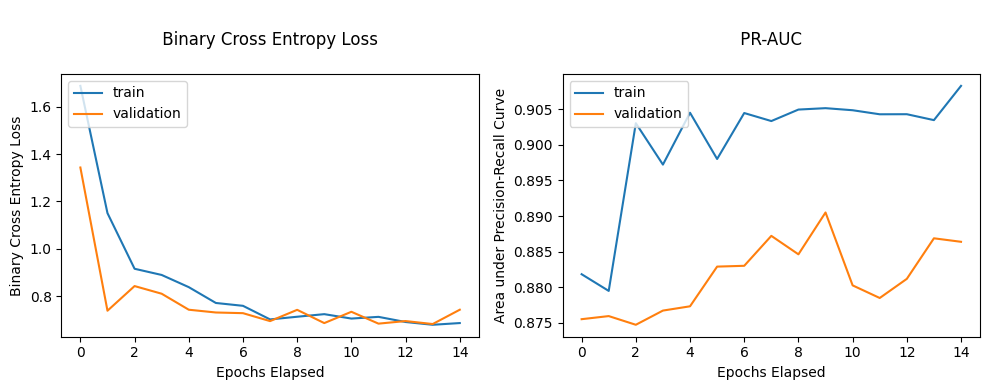


 ---

In [197]:
# Plot Cross Entropy Loss and PR-AUC - aveOralM (Hidden)

fig, axs = plt.subplots(1, 2, figsize=(10, 4));

# print(history.history.keys())

# summarize history for Binary Cross Entropy loss

axs[0].plot(clf_hidden_history_m.history['loss'])
axs[0].plot(clf_hidden_history_m.history['val_loss'])
axs[0].set_title('\n Binary Cross Entropy Loss \n')
axs[0].set_ylabel('Binary Cross Entropy Loss')
axs[0].set_xlabel('Epochs Elapsed')
axs[0].legend(['train', 'validation'], loc='upper left')


# summarize history for PR-AUC

axs[1].plot(clf_hidden_history_m.history["auc"])
axs[1].plot(clf_hidden_history_m.history["val_auc"])
axs[1].set_title('\n PR-AUC \n')
axs[1].set_ylabel('Area under Precision-Recall Curve')
axs[1].set_xlabel('Epochs Elapsed')
axs[1].legend(['train', 'validation'], loc='upper left')

fig.tight_layout();

display(Markdown("--- \n")) 
plt.show()

display(Markdown("\n ---")) 

26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step
Best Threshold: 0.24715757369995117, F1 Score: 0.8128342245989305


--- 



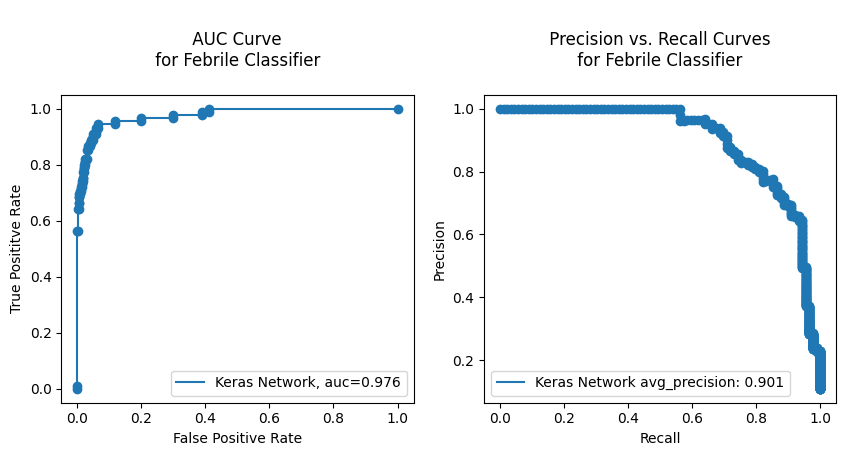


 ---

In [221]:
# ROC, ROC-AUC, PR Curves for Neural Network Classification - aveOralM (Hidden)

fig, axs = plt.subplots(1, 2, figsize=(10, 4));

preds =  clf_hidden_m.predict(train_x_processed)
fpr, tpr, threshhold  = sk.metrics.roc_curve(train_y["aveOralM_fever"].to_numpy().astype(int), preds)

auc = sk.metrics.roc_auc_score(train_y["aveOralM_fever"], preds)

axs[0].scatter(fpr,tpr)
axs[0].set_xlabel("False Positive Rate")
axs[0].set_ylabel("True Posititve Rate")
axs[0].set_title("\n AUC Curve \n for Febrile Classifier \n")
axs[0].plot(fpr,tpr,label=f"Keras Network, auc={round(auc,3)}")
axs[0].legend(loc=4)

preds = clf_hidden_m.predict(train_x_processed)

pr_measure = sk.metrics.average_precision_score(train_y["aveOralM_fever"], preds)

precision, recall, thresholds = sk.metrics.precision_recall_curve(train_y["aveOralM_fever"].to_numpy().astype(int), preds)

# Selecting appropriate threshold
f1_scores = 2*recall*precision / (recall+precision)
best_f1_threshold_clf_hidden_m = thresholds[np.argmax(f1_scores)]

print(f"Best Threshold: {best_f1_threshold_clf_hidden_m}, F1 Score: {f1_scores[np.argmax(f1_scores)]}")

axs[1].scatter(recall,precision)
axs[1].plot(recall,precision,label=f"Keras Network avg_precision: {round(pr_measure,3)}")
axs[1].set_xlabel("Recall");
axs[1].set_ylabel("Precision");
axs[1].set_title("\n Precision vs. Recall Curves \n for Febrile Classifier \n")
axs[1].legend(loc=3)

testFig = BytesIO();
plt.savefig(testFig, format='PNG', bbox_inches='tight');
plt.close();

display(Markdown("--- \n"));
display(HTML(f"<center><img src='data:image/png;base64,{base64.b64encode(testFig.getvalue()).decode()}'></center>"))
display(Markdown("\n ---"));

#prt = pd.DataFrame([precision, recall, thresholds]).transpose().set_axis(["precision","recall", "thresholds"], axis=1)
#prt.sort_values(["recall","precision"], ascending = False)[prt["precision"]>0.2].head()

The best threshold for the hidden layer aveOralM model is ~0.247 with an F1 Score of ~0.813. This is among the best models which also achieved ~0.81-0.84.

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 



 --- 



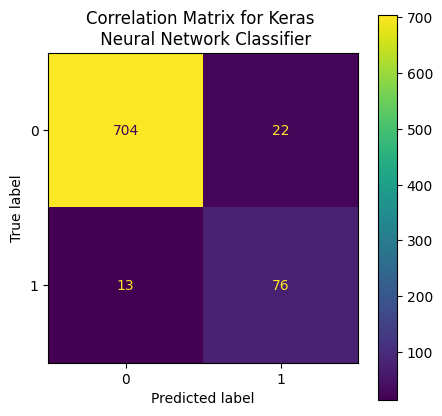


 --- 


In [199]:
# Confusion Matrix For Neural Network Classifier - aveOralM (Hidden)

ConfusionMatrixDisplay(confusion_matrix(train_y["aveOralM_fever"], clf_hidden_m.predict(train_x_processed) >=  best_f1_threshold_clf_hidden_m)).plot();
stat_table_hidden_clf_m = pd.DataFrame(classification_report(train_y["aveOralM_fever"], clf_hidden_m.predict(train_x_processed) >= best_f1_threshold_clf_hidden_m,output_dict=True)).transpose()

plt.title("Correlation Matrix for Keras \n Neural Network Classifier");

testFig = BytesIO();
plt.savefig(testFig, format='PNG', bbox_inches='tight');
plt.close();

display(Markdown("\n --- \n"))
display(HTML(f'''<div style="display:flex; flex-direction: row; align-items: center; justify-content: center">
                    <div style:"margin: 10px">{stat_table_hidden_clf_m.to_html()}</div>
                    <div style:"margin: 10px"><img src='data:image/png;base64,{base64.b64encode(testFig.getvalue()).decode()}'></div>
                </div>'''))
display(Markdown("\n --- \n"))

This model for aveOralM will be added to be evaluated on the test set.

In [200]:
# add best model
best_models_clf_m["Multi"]["All"]["Neural_Network_Single_Hidden"] = {
                                                    "Model": clf_hidden_m,
                                                    "Threshold": best_f1_threshold_clf_hidden_m
                                                }

--- 

**<center> aveOralF </center>**

Train the aveOralF model and track metrics:

In [176]:
# Fit Neural Network - aveOralF (Hidden)

keras.utils.set_random_seed(812)
clf_hidden_f = clf_tuner_hidden_f.get_best_models()[0]
history = clf_hidden_f.fit(train_x_clf,train_y_clf["aveOralF_fever"], 
                    epochs = 60, 
                    verbose = 0, 
                    batch_size = 128, 
                    validation_data = (train_x_val_clf, train_y_val_clf["aveOralF_fever"]),
                    #callbacks= [keras.callbacks.EarlyStopping(monitor="val_recall", mode="max", patience=30)] #monitor=prMetric.name
               );

clf_hidden_history_f = history;

/home/matve/ml-coursework/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


--- 


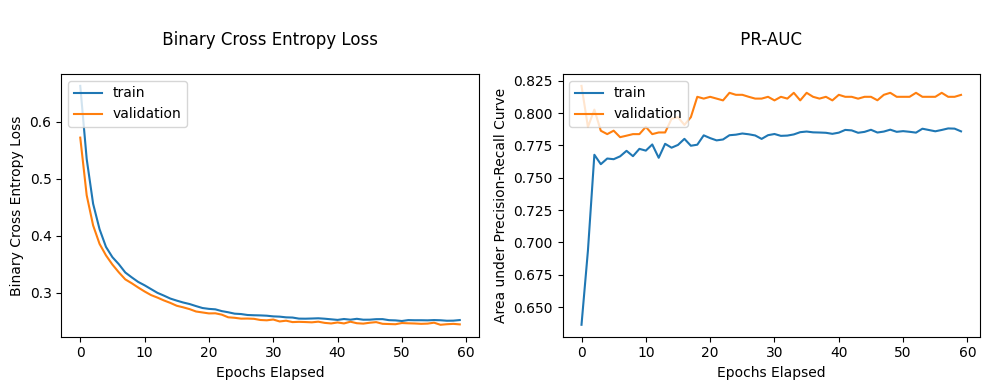


 ---

In [177]:
# Plot Cross Entropy Loss and PR-AUC - aveOralF (Hidden)

fig, axs = plt.subplots(1, 2, figsize=(10, 4));

# print(history.history.keys())

# summarize history for Binary Cross Entropy loss

axs[0].plot(clf_hidden_history_f.history['loss'])
axs[0].plot(clf_hidden_history_f.history['val_loss'])
axs[0].set_title('\n Binary Cross Entropy Loss \n')
axs[0].set_ylabel('Binary Cross Entropy Loss')
axs[0].set_xlabel('Epochs Elapsed')
axs[0].legend(['train', 'validation'], loc='upper left')


# summarize history for PR-AUC

axs[1].plot(clf_hidden_history_f.history["auc"])
axs[1].plot(clf_hidden_history_f.history["val_auc"])
axs[1].set_title('\n PR-AUC \n')
axs[1].set_ylabel('Area under Precision-Recall Curve')
axs[1].set_xlabel('Epochs Elapsed')
axs[1].legend(['train', 'validation'], loc='upper left')

fig.tight_layout();

display(Markdown("--- \n")) 
plt.show()

display(Markdown("\n ---")) 

26/26 ━━━━━━━━━━━━━━━━━━━━ 34s 446ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step
Best Threshold: 0.3837946057319641, F1 Score: 0.7476635514018691


--- 



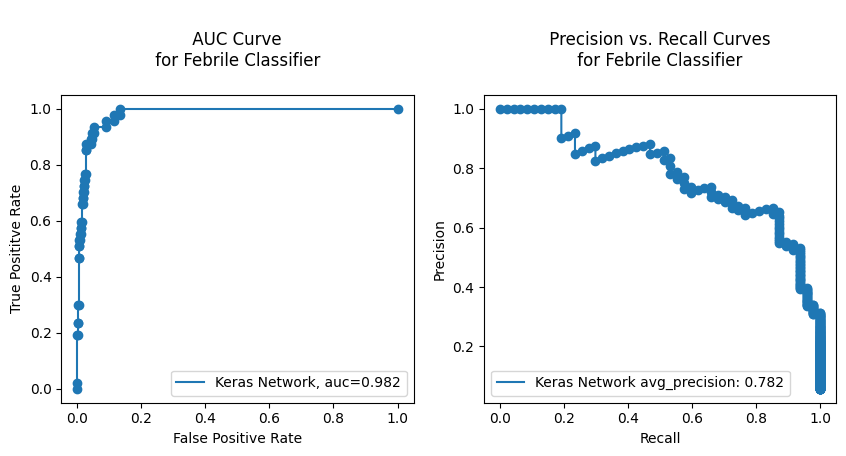


 ---

In [220]:
# ROC, ROC-AUC, PR Curves for Neural Network Classification - aveOralF (Hidden)

fig, axs = plt.subplots(1, 2, figsize=(10, 4));

preds =  clf_hidden_f.predict(train_x_processed)
fpr, tpr, threshhold  = sk.metrics.roc_curve(train_y["aveOralF_fever"].to_numpy().astype(int), preds)

auc = sk.metrics.roc_auc_score(train_y["aveOralF_fever"], preds)

axs[0].scatter(fpr,tpr)
axs[0].set_xlabel("False Positive Rate")
axs[0].set_ylabel("True Posititve Rate")
axs[0].set_title("\n AUC Curve \n for Febrile Classifier \n")
axs[0].plot(fpr,tpr,label=f"Keras Network, auc={round(auc,3)}")
axs[0].legend(loc=4)

preds = clf_hidden_f.predict(train_x_processed)

pr_measure = sk.metrics.average_precision_score(train_y["aveOralF_fever"], preds)

precision, recall, thresholds = sk.metrics.precision_recall_curve(train_y["aveOralF_fever"].to_numpy().astype(int), preds)

# Selecting appropriate threshold
f1_scores = 2*recall*precision / (recall+precision)
best_f1_threshold_clf_hidden_f = thresholds[np.argmax(f1_scores)]

print(f"Best Threshold: {best_f1_threshold_clf_hidden_f}, F1 Score: {f1_scores[np.argmax(f1_scores)]}")

axs[1].scatter(recall,precision)
axs[1].plot(recall,precision,label=f"Keras Network avg_precision: {round(pr_measure,3)}")
axs[1].set_xlabel("Recall");
axs[1].set_ylabel("Precision");
axs[1].set_title("\n Precision vs. Recall Curves \n for Febrile Classifier \n")
axs[1].legend(loc=3)

testFig = BytesIO();
plt.savefig(testFig, format='PNG', bbox_inches='tight');
plt.close();

display(Markdown("--- \n"));
display(HTML(f"<center><img src='data:image/png;base64,{base64.b64encode(testFig.getvalue()).decode()}'></center>"))
display(Markdown("\n ---"));

The best threshold for the aveOralF model is ~0.38 which achieved an F1 Score of ~0.748. This performance is among the best models achieving an F1 score slightly less than the sklearn model ~0.79. A classification matrix was developed using this threshold.

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 



 --- 



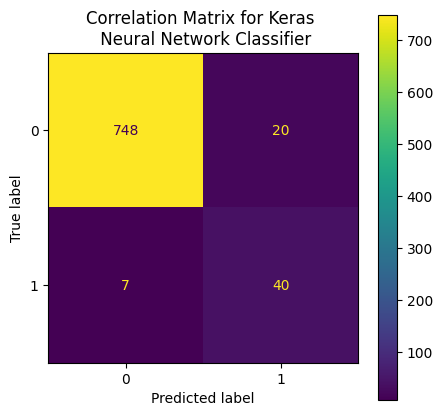


 --- 


In [179]:
# Confusion Matrix For Neural Network Classifier - aveOralF (Hidden)

ConfusionMatrixDisplay(confusion_matrix(train_y["aveOralF_fever"], clf_hidden_f.predict(train_x_processed) >= best_f1_threshold_clf_hidden_f)).plot();
stat_table_hidden_clf_f = pd.DataFrame(classification_report(train_y["aveOralF_fever"], clf_hidden_f.predict(train_x_processed)>= best_f1_threshold_clf_hidden_f,output_dict=True)).transpose()

plt.title("Correlation Matrix for Keras \n Neural Network Classifier");

testFig = BytesIO();
plt.savefig(testFig, format='PNG', bbox_inches='tight');
plt.close();

display(Markdown("\n --- \n"))
display(HTML(f'''<div style="display:flex; flex-direction: row; align-items: center; justify-content: center">
                    <div style:"margin: 10px">{stat_table_hidden_clf_f.to_html()}</div>
                    <div style:"margin: 10px"><img src='data:image/png;base64,{base64.b64encode(testFig.getvalue()).decode()}'></div>
                </div>'''))
display(Markdown("\n --- \n"))

This aveOralF model has been added to be evaluated on the test set.

In [180]:
# add best model
best_models_clf_f["Multi"]["All"]["Neural_Network_Single_Hidden"] = {
                                                    "Model": clf_hidden_f,
                                                    "Threshold": best_f1_threshold_clf_hidden_f
                                                }

--- 

##### D - Random Forest

--- 

Random forrest has been choosen as an ensemble based method for classification to test the performance of multiple models on the predicting febrile patients. By utilizing multiple models will help mitigate overfitting and develop a more performant model. The hyperparameters for the random forest have been tuned using GridSearchCV.

**<center> aveOralM </center>**

--- 

In [181]:
param_grid_rf_clf_m = {
    'n_estimators': [50, 100, 200],            
    'max_depth': [None,5,10, 20],               
    'min_samples_split': [2, 5, 10],           
    'min_samples_leaf': [1, 2, 4, 8, 10],             
    'max_features': ['sqrt', 'log2'],  
}

rf_clf_m = RandomForestClassifier(class_weight='balanced', random_state=42)

grid_search_clf_m = GridSearchCV(rf_clf_m, param_grid_rf_clf_m, 
                           cv=5, scoring='f1', n_jobs=-1)
grid_search_clf_m.fit(train_x_processed, train_y["aveOralM_fever"])

rf_clf_best_m = grid_search_clf_m.best_estimator_;
rf_clf_best_m.fit(train_x_processed, train_y["aveOralM_fever"]);

print(grid_search_clf_m.best_params_)

{'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 8, 'min_samples_split': 2, 'n_estimators': 200}



 --- 



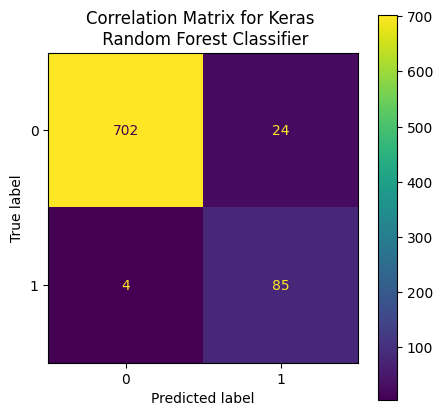


 --- 


In [182]:
# Confusion Matrix For Random Forrest Classifier - aveOralM

ConfusionMatrixDisplay(confusion_matrix(train_y["aveOralM_fever"], rf_clf_best_m.predict(train_x_processed))).plot();
stat_table_rf_clf_m = pd.DataFrame(classification_report(train_y["aveOralM_fever"], rf_clf_best_m.predict(train_x_processed),output_dict=True)).transpose()

plt.title("Correlation Matrix for Keras \n Random Forest Classifier");

testFig = BytesIO();
plt.savefig(testFig, format='PNG', bbox_inches='tight');
plt.close();

display(Markdown("\n --- \n"))
display(HTML(f'''<div style="display:flex; flex-direction: row; align-items: center; justify-content: center">
                    <div style:"margin: 10px">{stat_table_rf_clf_m.to_html()}</div>
                    <div style:"margin: 10px"><img src='data:image/png;base64,{base64.b64encode(testFig.getvalue()).decode()}'></div>
                </div>'''))
display(Markdown("\n --- \n"))

Best Threshold: 0.6338248508657385, F1 Score: 0.8704663212435233


--- 



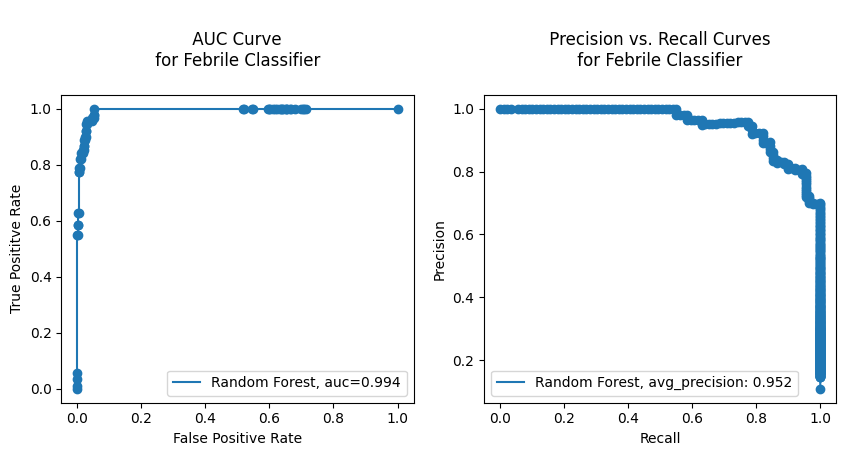


 ---

In [218]:
# ROC, ROC-AUC, PR Curves for Random Forrest Classification - aveOralM Random Forrest

fig, axs = plt.subplots(1, 2, figsize=(10, 4));

preds =  rf_clf_best_m.predict_proba(train_x_processed)[:,1]
fpr, tpr, threshhold  = sk.metrics.roc_curve(train_y["aveOralM_fever"].to_numpy().astype(int), preds)

auc = sk.metrics.roc_auc_score(train_y["aveOralM_fever"], preds)

axs[0].scatter(fpr,tpr)
axs[0].set_xlabel("False Positive Rate")
axs[0].set_ylabel("True Posititve Rate")
axs[0].set_title("\n AUC Curve \n for Febrile Classifier \n")
axs[0].plot(fpr,tpr,label=f"Random Forest, auc={round(auc,3)}")
axs[0].legend(loc=4)

preds = rf_clf_best_m.predict_proba(train_x_processed)[:,1]

pr_measure = sk.metrics.average_precision_score(train_y["aveOralM_fever"], preds)

precision, recall, thresholds = sk.metrics.precision_recall_curve(train_y["aveOralM_fever"].to_numpy().astype(int), preds)

# Selecting appropriate threshold
f1_scores = 2*recall*precision / (recall+precision)
best_f1_threshold_clf_rf_m = thresholds[np.argmax(f1_scores)]

print(f"Best Threshold: {best_f1_threshold_clf_rf_m}, F1 Score: {f1_scores[np.argmax(f1_scores)]}")

axs[1].scatter(recall,precision)
axs[1].plot(recall,precision,label=f"Random Forest, avg_precision: {round(pr_measure,3)}")
axs[1].set_xlabel("Recall");
axs[1].set_ylabel("Precision");
axs[1].set_title("\n Precision vs. Recall Curves \n for Febrile Classifier \n")
axs[1].legend(loc=3)

testFig = BytesIO();
plt.savefig(testFig, format='PNG', bbox_inches='tight');
plt.close();

display(Markdown("--- \n"));
display(HTML(f"<center><img src='data:image/png;base64,{base64.b64encode(testFig.getvalue()).decode()}'></center>"))
display(Markdown("\n ---"));

The best threshold for the random forrest was found to be ~0.633 with an F1 Score of 0.87 which is the best performance so far. This model is added for further evaluation on the test set below.

In [184]:
# add best model
best_models_clf_m["Multi"]["All"]["Random Forest"] = {
                                                    "Model": rf_clf_best_m,
                                                    "Threshold": best_f1_threshold_clf_rf_m
                                                }

--- 

**<center> aveOralF </center>**

In [185]:
param_grid_rf_clf_f = {
    'n_estimators': [50, 100, 200],            
    'max_depth': [None,5,10, 20],               
    'min_samples_split': [2, 5, 10],           
    'min_samples_leaf': [1, 2, 4, 8, 10],             
    'max_features': ['sqrt', 'log2'],  
}

rf_clf_f = RandomForestClassifier(class_weight='balanced', random_state=42)

grid_search_clf_f = GridSearchCV(rf_clf_f, param_grid_rf_clf_f, 
                           cv=5, scoring='f1', n_jobs=-1)
grid_search_clf_f.fit(train_x_processed, train_y["aveOralF_fever"])

rf_clf_best_f = grid_search_clf_f.best_estimator_;
rf_clf_best_f.fit(train_x_processed, train_y["aveOralF_fever"]);

print(grid_search_clf_f.best_params_)

{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}



 --- 



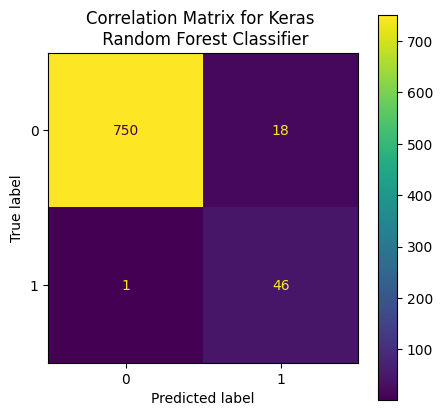


 --- 


In [186]:
# Confusion Matrix For Random Forrest Classifier - aveOralF

ConfusionMatrixDisplay(confusion_matrix(train_y["aveOralF_fever"], rf_clf_best_f.predict(train_x_processed))).plot();
stat_table_rf_clf_f = pd.DataFrame(classification_report(train_y["aveOralF_fever"], rf_clf_best_f.predict(train_x_processed),output_dict=True)).transpose()

plt.title("Correlation Matrix for Keras \n Random Forest Classifier");

testFig = BytesIO();
plt.savefig(testFig, format='PNG', bbox_inches='tight');
plt.close();

display(Markdown("\n --- \n"))
display(HTML(f'''<div style="display:flex; flex-direction: row; align-items: center; justify-content: center">
                    <div style:"margin: 10px">{stat_table_rf_clf_f.to_html()}</div>
                    <div style:"margin: 10px"><img src='data:image/png;base64,{base64.b64encode(testFig.getvalue()).decode()}'></div>
                </div>'''))
display(Markdown("\n --- \n"))

Best Threshold: 0.7584142921964517, F1 Score: 0.8936170212765957


--- 



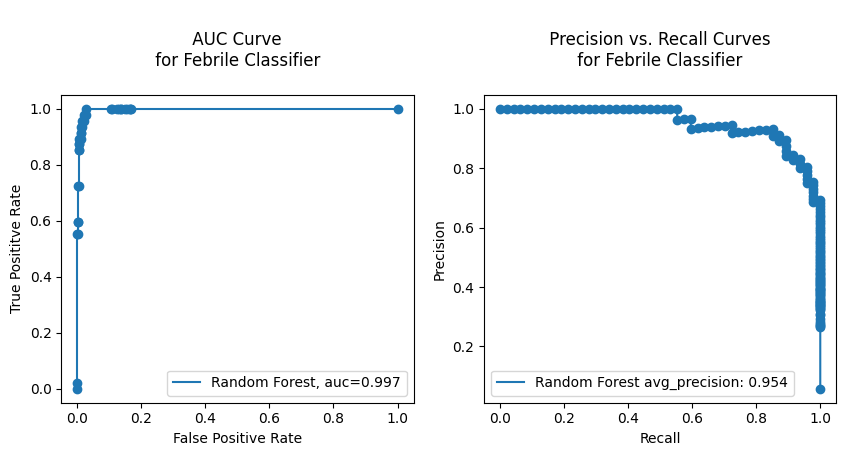


 ---

In [219]:
# ROC, ROC-AUC, PR Curves for Neural Network Classification - aveOralF Random Forrest

fig, axs = plt.subplots(1, 2, figsize=(10, 4));

preds =  rf_clf_best_f.predict_proba(train_x_processed)[:,1]
fpr, tpr, threshhold  = sk.metrics.roc_curve(train_y["aveOralF_fever"].to_numpy().astype(int), preds)

auc = sk.metrics.roc_auc_score(train_y["aveOralF_fever"], preds)

axs[0].scatter(fpr,tpr)
axs[0].set_xlabel("False Positive Rate")
axs[0].set_ylabel("True Posititve Rate")
axs[0].set_title("\n AUC Curve \n for Febrile Classifier \n")
axs[0].plot(fpr,tpr,label=f"Random Forest, auc={round(auc,3)}")
axs[0].legend(loc=4)

preds = rf_clf_best_f.predict_proba(train_x_processed)[:,1]

pr_measure = sk.metrics.average_precision_score(train_y["aveOralF_fever"], preds)

precision, recall, thresholds = sk.metrics.precision_recall_curve(train_y["aveOralF_fever"].to_numpy().astype(int), preds)

# Selecting appropriate threshold
f1_scores = 2*recall*precision / (recall+precision)
best_f1_threshold_clf_rf_f = thresholds[np.argmax(f1_scores)]

print(f"Best Threshold: {best_f1_threshold_clf_rf_f}, F1 Score: {f1_scores[np.argmax(f1_scores)]}")

axs[1].scatter(recall,precision)
axs[1].plot(recall,precision,label=f"Random Forest avg_precision: {round(pr_measure,3)}")
axs[1].set_xlabel("Recall");
axs[1].set_ylabel("Precision");
axs[1].set_title("\n Precision vs. Recall Curves \n for Febrile Classifier \n")
axs[1].legend(loc=3)

testFig = BytesIO();
plt.savefig(testFig, format='PNG', bbox_inches='tight');
plt.close();

display(Markdown("--- \n"));
display(HTML(f"<center><img src='data:image/png;base64,{base64.b64encode(testFig.getvalue()).decode()}'></center>"))
display(Markdown("\n ---"));

Similarily to aveOralM, the aveOralF random forest model achieves the highest F1 Score of ~0.89, with a threshold of ~0.76. This model will be added for further evaluation on the test set.

In [188]:
# add best model
best_models_clf_f["Multi"]["All"]["Random Forest"] = {
                                                    "Model": rf_clf_best_f,
                                                    "Threshold": best_f1_threshold_clf_rf_f
                                                }

#### 4.2.3 Model Evaluation
--- 

##### A - Predicting Febrile Patients based on aveOralM
--- 

In [201]:
# predicting febrile patients based on aveOralM

test_set_models_stats_m = [];
display(Markdown("\n --- \n"))

for featureTypes in best_models_clf_m:
    for feature in best_models_clf_m[featureTypes]:
        for modelName,modelDict in best_models_clf_m[featureTypes][feature].items():

            model = modelDict["Model"];
            
            model_stats_test = pd.DataFrame();

            if featureTypes == "Single":
                pred_proba = model.predict_proba(test_x_processed[feature].to_numpy().reshape(-1,1))[:,1];
                
            elif featureTypes == "Multi":
                if feature == "All":

                    if "Neural" in modelName: 
                        pred_proba = model.predict(test_x_processed);
                    else:
                        pred_proba = model.predict_proba(test_x_processed)[:,1];

            pred = pred_proba >= modelDict["Threshold"];


            model_stats_test["F1"] = [sk.metrics.f1_score(test_y["aveOralM_fever"],pred)];
            model_stats_test["Recall"] = [sk.metrics.recall_score(test_y["aveOralM_fever"],pred)];
            model_stats_test["Accuracy"] = [sk.metrics.accuracy_score(test_y["aveOralM_fever"],pred)];
            model_stats_test.index = [modelName];


            test_set_models_stats_m.append(model_stats_test);
            
            # ConfusionMatrixDisplay((confusion_matrix(test_y["aveOralM_fever"], pred))).plot()
            # plt.title(f"Correlation Matrix for Keras \n {modelName} Classifier \n");

            # testFig = BytesIO();
            # plt.savefig(testFig, format='PNG', bbox_inches='tight');
            # plt.close();
            

            # reportTable = pd.DataFrame(classification_report(test_y["aveOralM_fever"], pred, output_dict=True)).transpose();
            # display(HTML(f'''<div style="display:flex; flex-direction:row; align-items:center; justify-content:center">
            #                         <div style="margin:10px">{reportTable.to_html()}</div>
            #                         <div style="margin:10px"><img src='data:image/png;base64,{base64.b64encode(testFig.getvalue()).decode()}'></div>
            #                 </div>                        
                                    
            # '''))
            #display(HTML(f"<div style='display:flex; justify-content:center;'>{final_reg_model_stats_m.to_html()}</div>"));

            
            #display(Markdown("\n --- \n"))

fig.tight_layout()


test_clf_model_stats_m = pd.concat(test_set_models_stats_m).sort_values(["Recall","F1"], ascending = False)
display(HTML(f"<center>{test_clf_model_stats_m.to_html()}</center>"));
                        


 --- 


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


The top performing models where the sklearn and random forest as it has the highest F1, recall and accuracy on the test set
~0.85, ~0.90 and ~0.97 respectively. Next the single hidden neural network which achieved just slightly worse accuracy ~0.96 and F1 score ~0.83 than the sklearn based network and random forest. The logistic regression with multiple features has slightly worse performance, achieving the same recall but worse F1 Score, signifying more false positives. The no hidden neural network performerd quite similiarily however it had slightly worse F1 and worse recall. For aveOralM as there were more examples of the positive class than aveOralF, all models achieved a higher score than the most frequent class baseline which achieved an accuracy of 0.89.

--- 

##### B - Predicting Febrile Patients based on aveOralF
--- 

In [202]:
# predicting febrile patients based on aveOralF

test_set_models_stats_f = [];
display(Markdown("\n --- \n"))

for featureTypes in best_models_clf_f:
    for feature in best_models_clf_f[featureTypes]:
        for modelName,modelDict in best_models_clf_f[featureTypes][feature].items():

            model = modelDict["Model"];
            
            model_stats_test = pd.DataFrame();

            if featureTypes == "Single":
                pred_proba = model.predict_proba(test_x_processed[feature].to_numpy().reshape(-1,1))[:,1];
                
            elif featureTypes == "Multi":
                if feature == "All":

                    if "Neural" in modelName and not ("Sk" in modelName): 
                        pred_proba = model.predict(test_x_processed);
                    else:
                        pred_proba = model.predict_proba(test_x_processed)[:,1];

            pred = pred_proba >= modelDict["Threshold"];

            model_stats_test["F1"] = [sk.metrics.f1_score(test_y["aveOralF_fever"],pred)];
            model_stats_test["Recall"] = [sk.metrics.recall_score(test_y["aveOralF_fever"],pred)];
            model_stats_test["Accuracy"] = [sk.metrics.accuracy_score(test_y["aveOralF_fever"],pred)];
            model_stats_test.index = [modelName];


            test_set_models_stats_f.append(model_stats_test);
            
            
            # ConfusionMatrixDisplay((confusion_matrix(test_y["aveOralF_fever"], pred))).plot()
            # plt.title(f"Correlation Matrix for Keras \n {modelName} Classifier \n");

            # testFig = BytesIO();
            # plt.savefig(testFig, format='PNG', bbox_inches='tight');
            # plt.close();
            

            # reportTable = pd.DataFrame(classification_report(test_y["aveOralF_fever"], pred, output_dict=True)).transpose();
            # display(HTML(f'''<div style="display:flex; flex-direction:row; align-items:center; justify-content:center">
            #                         <div style="margin:10px">{reportTable.to_html()}</div>
            #                         <div style="margin:10px"><img src='data:image/png;base64,{base64.b64encode(testFig.getvalue()).decode()}'></div>
            #                 </div>                        
                                    
            # '''))
            # #display(HTML(f"<div style='display:flex; justify-content:center;'>{final_reg_model_stats_m.to_html()}</div>"));

            # display()

            
            # display(Markdown("\n --- \n"))

fig.tight_layout()


test_clf_model_stats_f = pd.concat(test_set_models_stats_f).sort_values(["Recall","F1"], ascending = False)
display(HTML(f"<center>{test_clf_model_stats_f.to_html()}</center>"));


 --- 


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


<br>
The best network for aveOralF classifaction where the keras no hidden and single hidden layer achieving a F1 score of 0.72. Then nearest neighbours on all the features as well as multiple logistic regression. The sklearn neural network in this instance performed worse, maybe due to issues with hyperparamter optimization, or the archtitecture not being appropriate for the aveOralF data. 

As the dataset was imbalanced the importance of techniques such as balancing weights, and oversampling and undersampling needs to be highlighted for future work in order to have more stable training.

--- 

Overall classification benefited from more complicated models than regression, likely due to non linear desicion boundaries requiring a more complex model architecture for both aveOralM and aveOralF.

--- 

## 5. Conclusion
--- 

### 5.1 Evaluation
---

Regression task provided insight into the nature of the data, namely that it is able to be effectively captured by linear models with polynomial features. Classification on the otherhand, benefited from threshold optimization, and models with more degrees of freedom such as neural networks and random forest. However logistic regression on all the features with regularization provided comparative performance in a more interpretable model. Therefore, depending on the application's specification a more interpretable model may be preferred and would require investigation of the interpretability vs. complexity trade-off.

Overall the investigation was able to produce both the regression and classification models where able to beat the baseline models for both aveOralM and aveOralF suggesting that the developed final models have predictive power. The results for aveOralM and aveOralF where quite similar although aveOralF regression models had lower $\text{R}^2$ scores and classication models lower $\text{F1}$ scores. This can be explained by the fact that monitor mode measurements are more stable than aveOralF and where the primary target in the reference paper by Wang et. Al, 2022. Additionally, aveOralF had twice less examples of febrile patients than aveOralM, leading to a significantly more imbalanced data set, with ~6% febrile patients as oppose to ~10%.

A major drawback of the study was the lack of diverse data within the dataset. Firstly, as found in the exploratory analysis, there was not sufficient representation of different ethnic groups, likely impacting the generalisation of the model, as a temperature predicting application should be able to predict for a variety of ethnic groups. Similarly, the age range had nearly 90% be around 18-30 range, significantly misreperesenting the wider population. 

Another problem with the data was that it failed  to account for factors such as circadian rhythm as the temperatures where not measured at similar times throughout the day (Wang et. al, 2022). Another issue was the lack of febrile patients which affected the training of the classification models , leading to an imbalanced dataset. Additionaly effects of subject height and weight on core body temperature where not investigated as part of the subjects temperature, which may have affect on determining whether the subjects core body temperature is elevated.

In conclusion, the models provide some insights into the prediction of aveOralM and aveOralF, but need to be further evaluated for generalization on other datasets and additional data, due to limitations within the dataset as well as investigate potentially other models for regression and classification.

### 5.2 Future Work
---

Future work could consist of cross-validating the data found in this study with other papers and exploring the predictive capabilities of the developed models. This would ensure the models have an appropriate degree of generalization beyond the Infrared Thermography Temperature Dataset from UCIrvene (Wang et. Al, 2022)

Additionally the models can be integrated into a real-world setting allowing the thermograph temperature to be directly converted into oral temperatures. Further research could be conducted on the effect of gender, ethnicity and age on body temperature to develop domain knowledge and allow for more insightful feature selection. 

## 6. References
--- 

&emsp;&emsp; International Organisation for Standardisation. ‘Medical Electrical Equipment — Deployment, Implementation and Operational Guidelines for Identifying Febrile Humans Using a Screening Thermograph’, 2017.

&emsp;&emsp;Wang, Quanzeng, Yangling Zhou, Pejman Ghassemi, David McBride, Jon P. Casamento, and T. Joshua Pfefer. 2022. "Infrared Thermography for Measuring Elevated Body Temperature: Clinical Accuracy, Calibration, and Evaluation" Sensors 22, no. 1: 215. https://doi.org/10.3390/s22010215

&emsp;&emsp;Zhou, Yangling, Pejman Ghassemi, Michelle Chen, David Mcbride, Jon Casamento, Joshua Pfefer, and Quanzeng Wang. ‘Clinical Evaluation of Fever-Screening Thermography: Impact of Consensus Guidelines and Facial Measurement Location’. Journal of Biomedical Optics 25, no. 09 (12 September 2020). https://doi.org/10.1117/1.JBO.25.9.097002.
